In [114]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
import keras
import warnings
from nltk.stem import PorterStemmer
from nltk import word_tokenize, sent_tokenize


from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import validation_curve
import sklearn_evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
%matplotlib inline  
warnings.filterwarnings("ignore")

In [115]:
wine_red = pd.read_csv('winequality-red.csv',sep=';')
wine_white = pd.read_csv('winequality-white.csv',sep=';')
wine = pd.concat([wine_red, wine_white])
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   alcohol  quality  
0  9.4      5        
1  9.8      5        
2  9.8      5        
3  9.8      6        
4  9.4      5

In [116]:
wine['quality'][wine['quality']<7] = 0
wine['quality'][wine['quality']>=7] = 1

In [117]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   alcohol  quality  
0  9.4      0        
1  9.8      0        
2  9.8      0        
3  9.8      0        
4  9.4      0

In [118]:
wine['quality'].value_counts()

0    5220
1    1277
Name: quality, dtype: int64

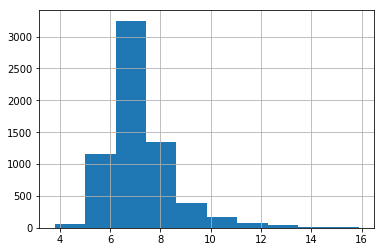

In [119]:
wine['fixed acidity'].hist()

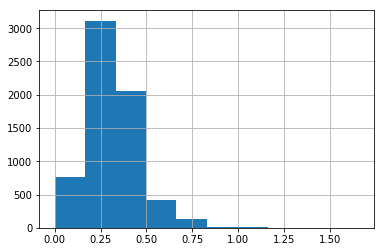

In [120]:
wine['citric acid'].hist()

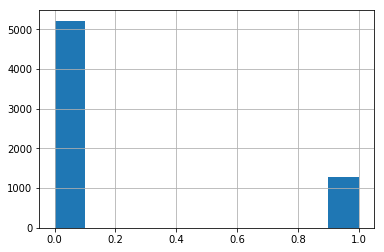

In [121]:
wine_quality = wine['quality']
wine_quality.hist()
del wine['quality']

In [122]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count  6497.000000    6497.000000       6497.000000  6497.000000      
mean   7.215307       0.339666          0.318633     5.443235         
std    1.296434       0.164636          0.145318     4.757804         
min    3.800000       0.080000          0.000000     0.600000         
25%    6.400000       0.230000          0.250000     1.800000         
50%    7.000000       0.290000          0.310000     3.000000         
75%    7.700000       0.400000          0.390000     8.100000         
max    15.900000      1.580000          1.660000     65.800000        

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000  6497.000000          6497.000000           6497.000000   
mean   0.056034     30.525319            115.744574            0.994697      
std    0.035034     17.749400            56.521855             0.002999      
min    0.009000     1.000000             6.000000              0.987110      
25%    0.038000     17.000000            77.000000             0.992340      
50%    0.047000     29.000000            118.000000            0.994890      
75%    0.065000     41.000000            156.000000            0.996990      
max    0.611000     289.000000           440.000000            1.038980      

                pH    sulphates      alcohol  
count  6497.000000  6497.000000  6497.000000  
mean   3.218501     0.531268     10.491801    
std    0.160787     0.148806     1.192712     
min    2.720000     0.220000     8.000000     
25%    3.110000     0.430000     9.500000     
50%    3.210000     0.510000     10.300000    
75%    3.320000     0.600000     11.300000    
max    4.010000     2.000000     14.900000

In [123]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   alcohol  
0  9.4      
1  9.8      
2  9.8      
3  9.8      
4  9.4

In [124]:
wine.shape

(6497, 11)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(wine, wine_quality, test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(wine.values)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [126]:
print("Train Rows:" + str(x_train.shape))
print("Train Labels:" + str(y_train.shape))
print("Test Rows:" + str(x_test.shape))
print("Test Labels" + str(y_test.shape))

Train Rows:(4547, 11)
Train Labels:(4547,)
Test Rows:(1950, 11)
Test Labels(1950,)


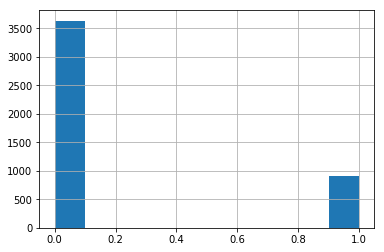

In [127]:
y_train.hist()

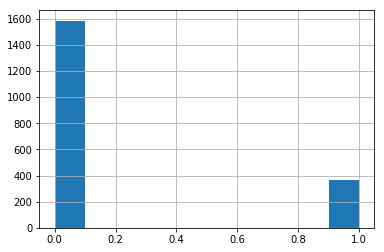

In [128]:
y_test.hist()

In [129]:
#baseline
import random
baseline = random.choices(population=[0,1],weights=[0.87, 0.13],k=x_train.shape[0])
print("Baseline Accuracy:" + str(sklearn.metrics.accuracy_score(y_train, baseline)))
print("Baseline Precision:" + str(sklearn.metrics.precision_score(y_train, baseline)))
print("Baseline Recall:" + str(sklearn.metrics.recall_score(y_train, baseline)))
print("Baseline F1 Score:" + str(sklearn.metrics.f1_score(y_train, baseline)))

Baseline Accuracy:0.7162964592038706
Baseline Precision:0.19218241042345277
Baseline Recall:0.12938596491228072
Baseline F1 Score:0.15465268676277852


In [130]:
def plot_model_complexity(grid_search_results, param_name):
    param = 'param_'+str(param_name)
    means_train = grid_search_results.groupby([param])['mean_train_score'].mean().reset_index()
    means_cv = grid_search_results.groupby([param])['mean_test_score'].mean().reset_index()
    #means_train.sort_values(by=[param], inplace=True)
    #means_cv.sort_values(by=[param], inplace=True)
    #means_train[param] = means_train[param].astype(str)
    #means_cv[param] = means_cv[param].astype(str)
    
    param_values = list(means_train[param])
    #param_values = ['val: ' + str(i) for i in param_values]
    
    plt.figure(figsize=(8, 8))
    plt.plot(param_values, means_train['mean_train_score'], 'r')
    plt.plot(param_values, means_cv['mean_test_score'], 'b')
    plt.title(param_name + " vs F1 Score")
    plt.xlabel(param_name)
    plt.ylabel('F1 Score')
    plt.ylim(means_cv['mean_test_score'].min()-0.1)
    plt.legend()
    plt.show()

In [131]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [132]:
#Decisison Tree Grid Search
dt_parameters = {'min_samples_leaf':[1,5, 10, 20, 25,50]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, dt_parameters,cv=cv, scoring = 'f1')
dt_clf.fit(x_train, y_train)
dt_grid_search_results = pd.DataFrame(dt_clf.cv_results_).sort_values(by='rank_test_score')

In [133]:
dt_grid_search_results = pd.DataFrame(dt_clf.cv_results_).sort_values(by='rank_test_score')

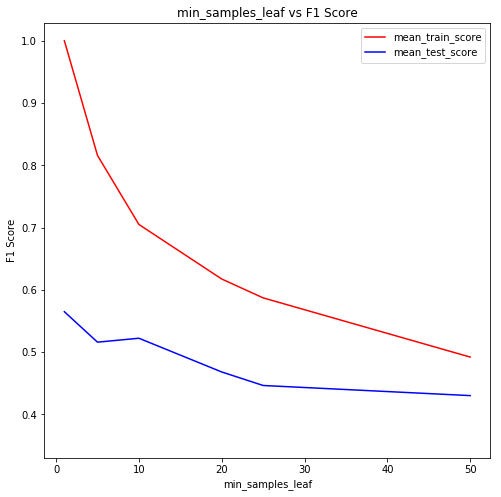

In [134]:
plot_model_complexity(dt_grid_search_results, 'min_samples_leaf')

In [135]:
#Decisison Tree Grid Search
dt_parameters = {'max_depth':[1, 5, 10, 20, 25,50]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, dt_parameters,cv=cv, scoring = 'f1')
dt_clf.fit(x_train, y_train)
dt_grid_search_results = pd.DataFrame(dt_clf.cv_results_).sort_values(by='rank_test_score')

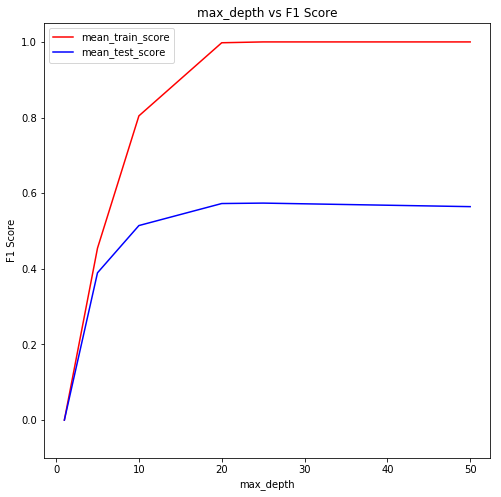

In [136]:
plot_model_complexity(dt_grid_search_results, 'max_depth')

In [137]:
#Decisison Tree Grid Search
dt_parameters = {'max_depth':[5,10,15,25,50], 'min_samples_leaf':[1, 5, 10, 20, 25, 50]}
dt = DecisionTreeClassifier()
dt_clf = GridSearchCV(dt, dt_parameters,cv=cv, scoring = 'f1')
dt_clf.fit(x_train, y_train)
dt_grid_search_results = pd.DataFrame(dt_clf.cv_results_).sort_values(by='rank_test_score')

# View the best parameters for the model found using grid search
print('Best score:', dt_clf.best_score_) 
print('Best Max Depth:',dt_clf.best_estimator_.max_depth) 
print('Best Min Leaf Samples:',dt_clf.best_estimator_.min_samples_leaf)

Best score: 0.5636580562735622
Best Max Depth: 50
Best Min Leaf Samples: 1


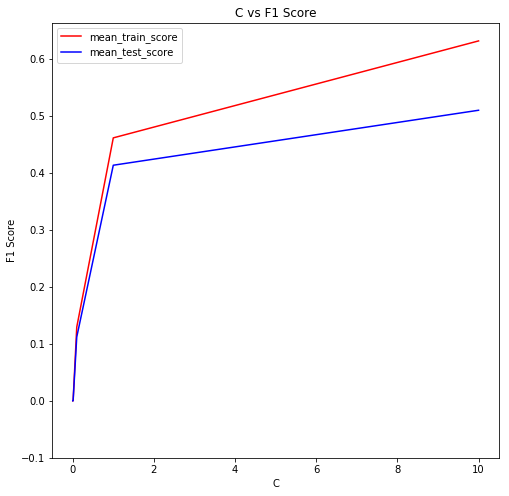

In [138]:
#SVM C Search
parameters = {'C':[0.001,0.01,0.1,1,10]}
svm = SVC(verbose =0, kernel='rbf')
svm_clf = GridSearchCV(svm, parameters, cv= cv, scoring = 'f1')
svm_clf.fit(x_train, y_train)
svm_grid_search_results = pd.DataFrame(svm_clf.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(svm_grid_search_results, 'C')

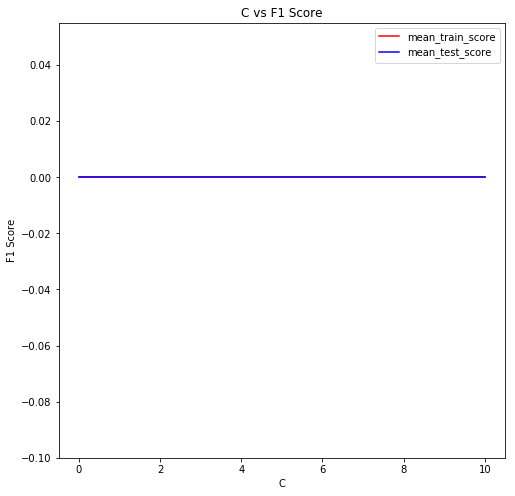

In [254]:
#SVM C Search
parameters = {'C':[0.001,0.01,0.1,1,10]}
svm = SVC(verbose =0, kernel='linear')
svm_clf = GridSearchCV(svm, parameters, cv= cv, scoring = 'f1')
svm_clf.fit(x_train, y_train)
svm_grid_search_results = pd.DataFrame(svm_clf.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(svm_grid_search_results, 'C')

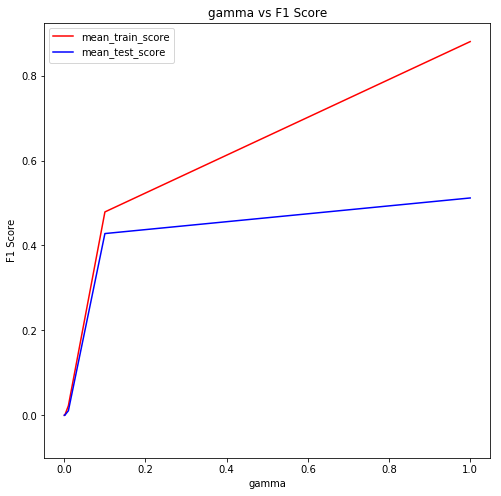

In [139]:
#SVM gamma Search
parameters = {'gamma':[0.0001, 0.001, 0.01, 0.1, 1]}
svm = SVC(verbose =0, kernel='rbf')
svm_clf = GridSearchCV(svm, parameters, cv= cv, scoring = 'f1')
svm_clf.fit(x_train, y_train)
svm_grid_search_results = pd.DataFrame(svm_clf.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(svm_grid_search_results, 'gamma')

In [140]:
#SVM Grid Search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
parameters = {'C':[0.1,1,5,10], 'gamma':[0.01, 0.1, 0.2, 0.3], 'kernel':['rbf','linear']}
svm = SVC(verbose=2)
svm_clf = GridSearchCV(svm, parameters, cv= cv, scoring = 'f1')
svm_clf.fit(x_train, y_train)

svm_grid_search_results = pd.DataFrame(svm_clf.cv_results_).sort_values(by='rank_test_score')
# View the best parameters for the model found using grid search
print('Best score for data1:', svm_clf.best_score_) 
print('Best Estimators:',svm_clf.best_estimator_.gamma) 
print('Best C:',svm_clf.best_estimator_.C)
print('Best Kernel:',svm_clf.best_estimator_.kernel)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [141]:
#GBM Grid Search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
parameters = {'learning_rate':[0.001, 0.01, 0.1, 0.3, 0.5], 'n_estimators':[10,100,250,500,1000], 'max_depth':[1,3,5,7,10]}
gbm = GradientBoostingClassifier(verbose =1)
gbm_clf = GridSearchCV(gbm, parameters, cv= cv, scoring = 'f1')
gbm_clf.fit(x_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0018            0.02s
         2           1.0015            0.01s
         3           1.0012            0.01s
         4           1.0010            0.01s
         5           1.0007            0.01s
         6           1.0004            0.01s
         7           1.0002            0.00s
         8           0.9999            0.00s
         9           0.9996            0.00s
        10           0.9994            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0018            0.02s
         2           1.0015            0.01s
         3           1.0013            0.01s
         4           1.0010            0.01s
         5           1.0008            0.01s
         6           1.0005            0.01s
         7           1.0002            0.00s
         8           1.0000            0.00s
         9           0.9997            0.00s
        10           0.9995            0.00s
      It

       200           0.9607            0.04s
      Iter       Train Loss   Remaining Time 
         1           1.0024            0.23s
         2           1.0021            0.23s
         3           1.0018            0.22s
         4           1.0016            0.21s
         5           1.0013            0.21s
         6           1.0010            0.21s
         7           1.0008            0.20s
         8           1.0005            0.20s
         9           1.0002            0.20s
        10           1.0000            0.20s
        20           0.9974            0.18s
        30           0.9948            0.17s
        40           0.9923            0.16s
        50           0.9899            0.15s
        60           0.9875            0.14s
        70           0.9852            0.14s
        80           0.9829            0.13s
        90           0.9807            0.12s
       100           0.9785            0.11s
       200           0.9588            0.04s
      Ite

        60           0.9871            0.72s
        70           0.9849            0.73s
        80           0.9826            0.90s
        90           0.9804            0.87s
       100           0.9783            0.85s
       200           0.9590            0.66s
       300           0.9428            0.55s
       400           0.9293            0.48s
       500           0.9179            0.40s
       600           0.9082            0.32s
       700           0.9000            0.24s
       800           0.8929            0.16s
       900           0.8867            0.08s
      1000           0.8814            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0018            1.42s
         2           1.0015            1.34s
         3           1.0013            1.29s
         4           1.0010            1.44s
         5           1.0008            1.61s
         6           1.0005            1.60s
         7           1.0002            1.58s
         

        30           0.9897            0.16s
        40           0.9858            0.14s
        50           0.9820            0.12s
        60           0.9782            0.09s
        70           0.9746            0.07s
        80           0.9710            0.04s
        90           0.9674            0.02s
       100           0.9640            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0016            0.22s
         2           1.0012            0.22s
         3           1.0008            0.21s
         4           1.0004            0.21s
         5           1.0000            0.21s
         6           0.9996            0.21s
         7           0.9991            0.21s
         8           0.9987            0.21s
         9           0.9983            0.21s
        10           0.9979            0.21s
        20           0.9940            0.20s
        30           0.9901            0.18s
        40           0.9863            0.15s
        5

        30           0.9901            0.50s
        40           0.9861            0.48s
        50           0.9822            0.46s
        60           0.9784            0.44s
        70           0.9747            0.43s
        80           0.9710            0.40s
        90           0.9674            0.37s
       100           0.9638            0.35s
       200           0.9323            0.11s
      Iter       Train Loss   Remaining Time 
         1           1.0016            1.25s
         2           1.0012            1.17s
         3           1.0008            1.14s
         4           1.0003            1.16s
         5           0.9999            1.15s
         6           0.9995            1.13s
         7           0.9991            1.11s
         8           0.9987            1.12s
         9           0.9982            1.11s
        10           0.9978            1.12s
        20           0.9937            1.07s
        30           0.9897            1.02s
        4

       600           0.8563            0.93s
       700           0.8430            0.70s
       800           0.8305            0.47s
       900           0.8195            0.23s
      1000           0.8096            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0022            2.20s
         2           1.0018            2.20s
         3           1.0014            2.19s
         4           1.0009            2.18s
         5           1.0005            2.22s
         6           1.0001            2.22s
         7           0.9997            2.22s
         8           0.9993            2.21s
         9           0.9989            2.21s
        10           0.9984            2.22s
        20           0.9943            2.18s
        30           0.9904            2.14s
        40           0.9865            2.12s
        50           0.9826            2.09s
        60           0.9788            2.19s
        70           0.9751            2.18s
        8

        50           0.9740            0.25s
        60           0.9687            0.20s
        70           0.9636            0.15s
        80           0.9586            0.10s
        90           0.9537            0.05s
       100           0.9490            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0020            0.48s
         2           1.0014            0.48s
         3           1.0008            0.51s
         4           1.0002            0.51s
         5           0.9996            0.51s
         6           0.9989            0.50s
         7           0.9983            0.50s
         8           0.9977            0.49s
         9           0.9971            0.47s
        10           0.9965            0.47s
        20           0.9906            0.39s
        30           0.9849            0.34s
        40           0.9793            0.29s
        50           0.9739            0.25s
        60           0.9686            0.20s
        7

        50           0.9732            2.08s
        60           0.9678            2.04s
        70           0.9625            1.99s
        80           0.9574            1.98s
        90           0.9524            1.93s
       100           0.9476            1.89s
       200           0.9040            1.43s
       300           0.8681            0.96s
       400           0.8378            0.48s
       500           0.8113            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0014            2.34s
         2           1.0008            2.34s
         3           1.0002            2.35s
         4           0.9996            2.35s
         5           0.9990            2.38s
         6           0.9984            2.37s
         7           0.9978            2.36s
         8           0.9973            2.35s
         9           0.9967            2.34s
        10           0.9961            2.34s
        20           0.9903            2.27s
        3

       200           0.9042            3.99s
       300           0.8672            3.46s
       400           0.8357            2.95s
       500           0.8083            2.45s
       600           0.7841            1.96s
       700           0.7624            1.47s
       800           0.7426            0.98s
       900           0.7242            0.49s
      1000           0.7081            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0020            4.79s
         2           1.0014            4.81s
         3           1.0008            4.85s
         4           1.0001            4.84s
         5           0.9995            4.82s
         6           0.9989            4.83s
         7           0.9983            4.84s
         8           0.9977            4.83s
         9           0.9971            4.91s
        10           0.9965            5.21s
        20           0.9905            5.29s
        30           0.9847            5.30s
        4

        20           0.9856            1.00s
        30           0.9775            0.95s
        40           0.9696            0.78s
        50           0.9620            0.65s
        60           0.9546            0.51s
        70           0.9473            0.39s
        80           0.9403            0.25s
        90           0.9334            0.13s
       100           0.9267            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0017            0.90s
         2           1.0007            0.89s
         3           0.9998            0.88s
         4           0.9989            0.87s
         5           0.9979            0.86s
         6           0.9970            0.85s
         7           0.9961            0.84s
         8           0.9951            0.84s
         9           0.9942            0.83s
        10           0.9933            0.87s
        20           0.9843            0.83s
        30           0.9756            0.77s
        4

        20           0.9859            4.79s
        30           0.9779            4.58s
        40           0.9700            4.55s
        50           0.9623            4.51s
        60           0.9550            4.53s
        70           0.9477            4.42s
        80           0.9406            4.29s
        90           0.9337            4.19s
       100           0.9269            4.08s
       200           0.8671            3.03s
       300           0.8161            2.09s
       400           0.7686            1.06s
       500           0.7265            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0018            4.65s
         2           1.0009            4.87s
         3           1.0000            4.85s
         4           0.9991            4.98s
         5           0.9983            4.93s
         6           0.9974            4.86s
         7           0.9965            4.81s
         8           0.9957            4.76s
         

         5           0.9979           12.54s
         6           0.9970           12.03s
         7           0.9961           11.68s
         8           0.9951           11.48s
         9           0.9942           11.32s
        10           0.9933           11.11s
        20           0.9843           10.02s
        30           0.9756            9.83s
        40           0.9671            9.62s
        50           0.9587            9.43s
        60           0.9506            9.45s
        70           0.9427            9.25s
        80           0.9350            9.26s
        90           0.9276            9.13s
       100           0.9204            9.09s
       200           0.8595            8.24s
       300           0.8055            7.13s
       400           0.7597            6.11s
       500           0.7199            5.09s
       600           0.6859            4.09s
       700           0.6548            3.06s
       800           0.6263            2.04s
       900

        10           0.9888            4.38s
        20           0.9759            4.20s
        30           0.9635            4.01s
        40           0.9514            3.84s
        50           0.9397            3.71s
        60           0.9283            3.58s
        70           0.9172            3.38s
        80           0.9065            3.22s
        90           0.8961            3.17s
       100           0.8860            3.22s
       200           0.7985            1.30s
      Iter       Train Loss   Remaining Time 
         1           1.0007            5.10s
         2           0.9993            4.65s
         3           0.9980            4.49s
         4           0.9966            4.35s
         5           0.9953            4.29s
         6           0.9939            4.24s
         7           0.9926            4.19s
         8           0.9913            4.16s
         9           0.9900            4.13s
        10           0.9887            4.11s
        2

        60           0.9310            9.98s
        70           0.9206            9.51s
        80           0.9104            9.19s
        90           0.9004            9.16s
       100           0.8906            8.91s
       200           0.8051            6.36s
       300           0.7338            4.48s
       400           0.6727            2.28s
       500           0.6169            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0012           10.76s
         2           0.9997           10.12s
         3           0.9982            9.97s
         4           0.9968            9.89s
         5           0.9953           11.70s
         6           0.9939           11.38s
         7           0.9924           11.03s
         8           0.9910           10.90s
         9           0.9896           10.70s
        10           0.9881           10.61s
        20           0.9742           10.45s
        30           0.9608           10.13s
        4

        80           0.8926            0.02s
        90           0.8865            0.01s
       100           0.8811            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9995            0.28s
         2           0.9970            0.21s
         3           0.9946            0.17s
         4           0.9922            0.15s
         5           0.9899            0.14s
         6           0.9876            0.13s
         7           0.9854            0.12s
         8           0.9833            0.12s
         9           0.9811            0.12s
        10           0.9791            0.12s
        20           0.9604            0.10s
        30           0.9450            0.08s
        40           0.9319            0.07s
        50           0.9210            0.06s
        60           0.9116            0.04s
        70           0.9036            0.03s
        80           0.8969            0.02s
        90           0.8913            0.01s
       10

       200           0.8424            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.9993            0.59s
         2           0.9967            0.54s
         3           0.9942            0.53s
         4           0.9918            0.52s
         5           0.9894            0.51s
         6           0.9870            0.51s
         7           0.9848            0.50s
         8           0.9825            0.55s
         9           0.9803            0.55s
        10           0.9781            0.55s
        20           0.9588            0.50s
        30           0.9425            0.47s
        40           0.9290            0.44s
        50           0.9177            0.42s
        60           0.9079            0.46s
        70           0.8996            0.43s
        80           0.8926            0.41s
        90           0.8865            0.39s
       100           0.8811            0.37s
       200           0.8503            0.25s
       30

       200           0.8464            0.90s
       300           0.8274            0.84s
       400           0.8146            0.77s
       500           0.8053            0.62s
       600           0.7975            0.52s
       700           0.7909            0.37s
       800           0.7850            0.24s
       900           0.7797            0.12s
      1000           0.7747            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9999            1.28s
         2           0.9973            1.56s
         3           0.9947            2.27s
         4           0.9922            2.27s
         5           0.9897            2.09s
         6           0.9873            2.06s
         7           0.9849            3.28s
         8           0.9826            3.07s
         9           0.9804            3.00s
        10           0.9781            2.97s
        20           0.9583            2.35s
        30           0.9419            3.59s
        4

        40           0.8859            0.14s
        50           0.8674            0.12s
        60           0.8515            0.09s
        70           0.8380            0.07s
        80           0.8261            0.05s
        90           0.8155            0.02s
       100           0.8057            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9983            0.23s
         2           0.9941            0.23s
         3           0.9900            0.23s
         4           0.9860            0.22s
         5           0.9821            0.22s
         6           0.9783            0.23s
         7           0.9745            0.25s
         8           0.9708            0.25s
         9           0.9672            0.26s
        10           0.9636            0.27s
        20           0.9319            0.22s
        30           0.9059            0.18s
        40           0.8841            0.16s
        50           0.8656            0.13s
        6

        80           0.8221            0.95s
        90           0.8112            0.92s
       100           0.8016            0.90s
       200           0.7353            0.67s
       300           0.6990            0.45s
       400           0.6760            0.23s
       500           0.6574            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9984            1.14s
         2           0.9942            1.12s
         3           0.9902            1.11s
         4           0.9862            1.11s
         5           0.9823            2.23s
         6           0.9785            2.08s
         7           0.9748            1.93s
         8           0.9712            1.82s
         9           0.9676            1.74s
        10           0.9642            1.68s
        20           0.9328            1.35s
        30           0.9072            1.21s
        40           0.8859            1.14s
        50           0.8674            1.08s
        6

        90           0.8129            2.17s
       100           0.8031            2.24s
       200           0.7324            2.09s
       300           0.6955            2.03s
       400           0.6708            1.61s
       500           0.6536            1.33s
       600           0.6366            1.02s
       700           0.6214            0.74s
       800           0.6092            0.49s
       900           0.5983            0.25s
      1000           0.5885            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9959            0.07s
         2           0.9901            0.05s
         3           0.9843            0.05s
         4           0.9785            0.04s
         5           0.9731            0.03s
         6           0.9676            0.02s
         7           0.9623            0.02s
         8           0.9571            0.01s
         9           0.9520            0.01s
        10           0.9472            0.00s
      Ite

        80           0.7459            0.84s
        90           0.7280            0.82s
       100           0.7122            0.77s
       200           0.5979            0.27s
      Iter       Train Loss   Remaining Time 
         1           0.9960            1.15s
         2           0.9902            1.18s
         3           0.9846            1.20s
         4           0.9791            1.21s
         5           0.9738            1.20s
         6           0.9686            1.20s
         7           0.9633            1.21s
         8           0.9582            1.20s
         9           0.9534            1.19s
        10           0.9485            1.20s
        20           0.9065            1.26s
        30           0.8697            1.16s
        40           0.8384            1.09s
        50           0.8107            1.06s
        60           0.7876            1.03s
        70           0.7665            0.98s
        80           0.7471            0.92s
        9

       400           0.5042            0.47s
       500           0.4752            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9963            2.38s
         2           0.9902            2.41s
         3           0.9841            2.42s
         4           0.9782            2.44s
         5           0.9726            2.43s
         6           0.9669            2.43s
         7           0.9615            2.43s
         8           0.9562            2.42s
         9           0.9510            2.41s
        10           0.9459            2.38s
        20           0.9005            2.43s
        30           0.8625            2.32s
        40           0.8308            2.26s
        50           0.8027            2.19s
        60           0.7771            2.13s
        70           0.7550            2.11s
        80           0.7348            2.05s
        90           0.7169            1.99s
       100           0.7018            1.93s
       20

         4           0.9701            0.05s
         5           0.9628            0.04s
         6           0.9556            0.04s
         7           0.9487            0.03s
         8           0.9419            0.02s
         9           0.9354            0.01s
        10           0.9289            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9941            0.08s
         2           0.9856            0.07s
         3           0.9776            0.09s
         4           0.9698            0.08s
         5           0.9619            0.07s
         6           0.9547            0.05s
         7           0.9472            0.04s
         8           0.9403            0.02s
         9           0.9333            0.01s
        10           0.9266            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9939            0.08s
         2           0.9854            0.07s
         3           0.9773            0.06s
        

      Iter       Train Loss   Remaining Time 
         1           0.9941            2.78s
         2           0.9856            2.53s
         3           0.9776            2.46s
         4           0.9698            2.41s
         5           0.9619            2.40s
         6           0.9547            2.41s
         7           0.9472            2.42s
         8           0.9403            2.39s
         9           0.9333            2.38s
        10           0.9266            2.36s
        20           0.8660            2.24s
        30           0.8143            2.19s
        40           0.7670            2.10s
        50           0.7246            2.05s
        60           0.6877            1.95s
        70           0.6557            1.84s
        80           0.6272            1.75s
        90           0.6010            1.64s
       100           0.5759            1.57s
       200           0.4204            0.53s
      Iter       Train Loss   Remaining Time 
        

       500           0.2359            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9935            8.75s
         2           0.9852            9.41s
         3           0.9772            9.08s
         4           0.9695            8.82s
         5           0.9620            8.72s
         6           0.9548            8.73s
         7           0.9478            9.07s
         8           0.9407            9.64s
         9           0.9341           10.13s
        10           0.9277           10.00s
        20           0.8659            9.43s
        30           0.8135            9.27s
        40           0.7677            9.43s
        50           0.7278            9.30s
        60           0.6919            9.36s
        70           0.6597            9.24s
        80           0.6310            9.14s
        90           0.6027            9.12s
       100           0.5777            9.00s
       200           0.4222            7.88s
       30

         8           0.9092            0.03s
         9           0.8992            0.02s
        10           0.8894            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9879            0.17s
         2           0.9738            0.15s
         3           0.9604            0.13s
         4           0.9474            0.11s
         5           0.9344            0.10s
         6           0.9219            0.08s
         7           0.9099            0.06s
         8           0.8981            0.04s
         9           0.8866            0.02s
        10           0.8761            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9886            2.16s
         2           0.9757            1.89s
         3           0.9631            1.81s
         4           0.9510            1.76s
         5           0.9393            1.72s
         6           0.9279            1.69s
         7           0.9166            1.67s
        

        20           0.8032            4.32s
        30           0.7293            4.20s
        40           0.6646            4.27s
        50           0.6035            4.30s
        60           0.5535            4.20s
        70           0.5070            4.09s
        80           0.4682            3.94s
        90           0.4334            3.86s
       100           0.4036            3.80s
       200           0.2098            1.48s
      Iter       Train Loss   Remaining Time 
         1           0.9879            4.80s
         2           0.9738            4.86s
         3           0.9604            4.95s
         4           0.9474            4.97s
         5           0.9344            5.21s
         6           0.9219            5.28s
         7           0.9098            5.28s
         8           0.8980            5.77s
         9           0.8866            5.70s
        10           0.8761            5.62s
        20           0.7807            5.66s
        3

        20           0.7942           19.29s
        30           0.7210           19.51s
        40           0.6547           20.64s
        50           0.5998           22.17s
        60           0.5514           22.74s
        70           0.5066           23.06s
        80           0.4648           23.55s
        90           0.4289           25.90s
       100           0.3971           27.33s
       200           0.1988           24.72s
       300           0.1083           21.68s
       400           0.0656           18.57s
       500           0.0442           14.90s
       600           0.0318           11.76s
       700           0.0234            8.43s
       800           0.0163            5.47s
       900           0.0117            2.67s
      1000           0.0082            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9894           27.39s
         2           0.9767           24.69s
         3           0.9644           23.10s
         

        50           0.8118            0.04s
        60           0.8051            0.03s
        70           0.7994            0.03s
        80           0.7944            0.02s
        90           0.7897            0.01s
       100           0.7853            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9770            0.09s
         2           0.9568            0.08s
         3           0.9391            0.08s
         4           0.9261            0.08s
         5           0.9135            0.08s
         6           0.9035            0.08s
         7           0.8963            0.07s
         8           0.8886            0.07s
         9           0.8817            0.07s
        10           0.8775            0.07s
        20           0.8443            0.06s
        30           0.8251            0.05s
        40           0.8126            0.05s
        50           0.8034            0.04s
        60           0.7953            0.03s
        7

       300           0.7237            0.16s
       400           0.7099            0.08s
       500           0.7000            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9778            0.44s
         2           0.9588            0.41s
         3           0.9424            0.40s
         4           0.9297            0.40s
         5           0.9179            0.39s
         6           0.9095            0.39s
         7           0.9009            0.41s
         8           0.8951            0.42s
         9           0.8888            0.45s
        10           0.8847            0.46s
        20           0.8521            0.40s
        30           0.8336            0.38s
        40           0.8210            0.36s
        50           0.8118            0.35s
        60           0.8051            0.34s
        70           0.7994            0.33s
        80           0.7944            0.32s
        90           0.7897            0.31s
       10

       700           0.6880            0.25s
       800           0.6828            0.16s
       900           0.6783            0.08s
      1000           0.6742            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9768            1.00s
         2           0.9563            1.09s
         3           0.9390            1.34s
         4           0.9260            1.32s
         5           0.9134            1.24s
         6           0.9047            1.17s
         7           0.8955            1.11s
         8           0.8880            1.07s
         9           0.8828            1.04s
        10           0.8787            1.01s
        20           0.8465            0.92s
        30           0.8289            0.90s
        40           0.8166            0.85s
        50           0.8068            0.82s
        60           0.7997            0.79s
        70           0.7937            0.77s
        80           0.7880            0.75s
        9

        70           0.6268            0.07s
        80           0.6095            0.05s
        90           0.5969            0.02s
       100           0.5855            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9615            0.26s
         2           0.9282            0.33s
         3           0.9023            0.31s
         4           0.8802            0.29s
         5           0.8607            0.27s
         6           0.8453            0.26s
         7           0.8311            0.25s
         8           0.8196            0.24s
         9           0.8102            0.25s
        10           0.7989            0.25s
        20           0.7312            0.20s
        30           0.6957            0.19s
        40           0.6730            0.15s
        50           0.6549            0.12s
        60           0.6367            0.09s
        70           0.6235            0.07s
        80           0.6097            0.04s
        9

        90           0.5922            0.92s
       100           0.5816            0.91s
       200           0.4857            0.67s
       300           0.4148            0.43s
       400           0.3593            0.21s
       500           0.3134            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9619            1.12s
         2           0.9287            1.12s
         3           0.9028            1.09s
         4           0.8809            1.10s
         5           0.8631            1.09s
         6           0.8473            1.09s
         7           0.8344            1.08s
         8           0.8228            1.08s
         9           0.8123            1.09s
        10           0.8019            1.10s
        20           0.7408            1.04s
        30           0.7065            1.26s
        40           0.6802            1.15s
        50           0.6561            1.08s
        60           0.6408            1.01s
        7

       100           0.5876            1.82s
       200           0.4925            1.61s
       300           0.4218            1.38s
       400           0.3627            1.17s
       500           0.3166            0.98s
       600           0.2734            0.78s
       700           0.2394            0.59s
       800           0.2084            0.39s
       900           0.1832            0.19s
      1000           0.1628            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9441            0.04s
         2           0.8983            0.04s
         3           0.8609            0.03s
         4           0.8310            0.03s
         5           0.8042            0.02s
         6           0.7790            0.02s
         7           0.7561            0.01s
         8           0.7340            0.01s
         9           0.7163            0.01s
        10           0.7003            0.00s
      Iter       Train Loss   Remaining Time 
        

        90           0.3631            1.31s
       100           0.3455            1.16s
       200           0.1962            0.32s
      Iter       Train Loss   Remaining Time 
         1           0.9449            1.20s
         2           0.9023            1.23s
         3           0.8628            1.25s
         4           0.8323            1.23s
         5           0.8023            1.24s
         6           0.7808            1.22s
         7           0.7603            1.22s
         8           0.7420            1.21s
         9           0.7246            1.20s
        10           0.7096            1.18s
        20           0.6004            1.11s
        30           0.5324            1.05s
        40           0.4968            1.01s
        50           0.4676            0.92s
        60           0.4343            0.85s
        70           0.4124            0.78s
        80           0.3852            0.73s
        90           0.3634            0.68s
       10

       500           0.0391            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9422            2.65s
         2           0.8942            2.58s
         3           0.8571            2.50s
         4           0.8230            2.49s
         5           0.7966            2.45s
         6           0.7753            2.42s
         7           0.7534            2.43s
         8           0.7326            2.46s
         9           0.7146            2.45s
        10           0.7009            2.43s
        20           0.5946            2.35s
        30           0.5369            2.23s
        40           0.4974            2.11s
        50           0.4637            2.01s
        60           0.4302            1.99s
        70           0.4099            1.88s
        80           0.3872            1.80s
        90           0.3716            1.72s
       100           0.3507            1.65s
       200           0.1938            1.22s
       30

         1           0.9220            0.08s
         2           0.8631            0.07s
         3           0.8109            0.07s
         4           0.7684            0.06s
         5           0.7318            0.05s
         6           0.6913            0.04s
         7           0.6562            0.03s
         8           0.6255            0.02s
         9           0.5988            0.01s
        10           0.5724            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9216            0.08s
         2           0.8611            0.07s
         3           0.8025            0.07s
         4           0.7606            0.06s
         5           0.7192            0.05s
         6           0.6795            0.04s
         7           0.6467            0.03s
         8           0.6179            0.02s
         9           0.5928            0.01s
        10           0.5682            0.00s
      Iter       Train Loss   Remaining Time 
        

        90           0.1462            1.47s
       100           0.1280            1.36s
       200           0.0329            0.44s
      Iter       Train Loss   Remaining Time 
         1           0.9215            2.31s
         2           0.8611            2.36s
         3           0.8020            2.43s
         4           0.7582            2.42s
         5           0.7204            2.40s
         6           0.6798            2.42s
         7           0.6478            2.44s
         8           0.6189            2.44s
         9           0.5925            2.43s
        10           0.5699            2.42s
        20           0.4231            2.25s
        30           0.3237            2.25s
        40           0.2768            2.03s
        50           0.2381            1.92s
        60           0.2040            1.79s
        70           0.1841            1.63s
        80           0.1581            1.54s
        90           0.1424            1.43s
       10

       200           0.0370            2.48s
       300           0.0096            1.66s
       400           0.0027            0.85s
       500           0.0008            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9205            9.46s
         2           0.8548           10.77s
         3           0.8039           11.26s
         4           0.7589           10.97s
         5           0.7163           11.46s
         6           0.6805           11.65s
         7           0.6471           12.26s
         8           0.6159           12.57s
         9           0.5912           12.58s
        10           0.5667           12.88s
        20           0.4117           12.70s
        30           0.3319           11.28s
        40           0.2826           10.72s
        50           0.2437           10.20s
        60           0.2175            9.50s
        70           0.1908            9.14s
        80           0.1628            9.07s
        9

         7           0.4977            0.07s
         8           0.4600            0.05s
         9           0.4271            0.02s
        10           0.3947            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8627            0.17s
         2           0.7626            0.17s
         3           0.6791            0.21s
         4           0.6170            0.17s
         5           0.5631            0.15s
         6           0.5119            0.13s
         7           0.4690            0.10s
         8           0.4310            0.07s
         9           0.3952            0.03s
        10           0.3652            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8741            1.72s
         2           0.7807            1.81s
         3           0.7026            1.93s
         4           0.6402            1.97s
         5           0.5869            2.00s
         6           0.5342            2.04s
        

         6           0.5456            5.76s
         7           0.4980            5.82s
         8           0.4546            5.90s
         9           0.4161            5.98s
        10           0.3888            5.96s
        20           0.1933            6.45s
        30           0.1158            6.09s
        40           0.0710            5.72s
        50           0.0485            5.31s
        60           0.0340            4.90s
        70           0.0243            4.52s
        80           0.0175            4.26s
        90           0.0120            3.98s
       100           0.0081            3.72s
       200           0.0004            1.03s
      Iter       Train Loss   Remaining Time 
         1           0.8633            4.46s
         2           0.7639            4.87s
         3           0.6815            5.09s
         4           0.6139            5.17s
         5           0.5640            5.16s
         6           0.5140            5.69s
         

      1000           0.0004            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8733           16.93s
         2           0.7780           17.59s
         3           0.7043           17.81s
         4           0.6381           18.51s
         5           0.5823           19.13s
         6           0.5390           19.27s
         7           0.4935           19.95s
         8           0.4509           21.07s
         9           0.4157           21.52s
        10           0.3823           22.66s
        20           0.1913           24.56s
        30           0.1117           24.99s
        40           0.0733           24.25s
        50           0.0512           23.29s
        60           0.0345           22.68s
        70           0.0240           22.31s
        80           0.0162           22.25s
        90           0.0112           22.03s
       100           0.0083           21.35s
       200           0.0004           15.78s
       30

        30           0.7858            0.09s
        40           0.7735            0.07s
        50           0.7631            0.06s
        60           0.7554            0.04s
        70           0.7488            0.03s
        80           0.7421            0.02s
        90           0.7361            0.01s
       100           0.7328            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9343            0.14s
         2           0.9004            0.12s
         3           0.8778            0.14s
         4           0.8679            0.14s
         5           0.8571            0.13s
         6           0.8470            0.12s
         7           0.8381            0.12s
         8           0.8309            0.12s
         9           0.8277            0.11s
        10           0.8229            0.11s
        20           0.7921            0.09s
        30           0.7740            0.07s
        40           0.7602            0.06s
        5

       300           0.6715            0.18s
       400           0.6587            0.10s
       500           0.6484            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9373            0.49s
         2           0.9056            0.45s
         3           0.8835            0.43s
         4           0.8741            0.42s
         5           0.8642            0.45s
         6           0.8543            0.44s
         7           0.8468            0.46s
         8           0.8397            0.48s
         9           0.8352            0.52s
        10           0.8298            0.56s
        20           0.8029            0.47s
        30           0.7858            0.47s
        40           0.7735            0.44s
        50           0.7631            0.44s
        60           0.7554            0.42s
        70           0.7488            0.41s
        80           0.7421            0.41s
        90           0.7361            0.39s
       10

       700           0.6403            0.30s
       800           0.6342            0.20s
       900           0.6283            0.10s
      1000           0.6229            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9335            2.18s
         2           0.8981            2.18s
         3           0.8769            1.87s
         4           0.8664            2.48s
         5           0.8548            2.25s
         6           0.8469            2.10s
         7           0.8414            1.97s
         8           0.8340            1.86s
         9           0.8311            1.76s
        10           0.8271            1.88s
        20           0.7965            1.45s
        30           0.7799            1.38s
        40           0.7675            1.50s
        50           0.7570            1.44s
        60           0.7489            1.37s
        70           0.7424            1.27s
        80           0.7368            1.22s
        9

       100           0.4122            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8932            0.26s
         2           0.8386            0.25s
         3           0.8042            0.25s
         4           0.7740            0.25s
         5           0.7556            0.24s
         6           0.7394            0.31s
         7           0.7248            0.41s
         8           0.7123            0.39s
         9           0.7051            0.36s
        10           0.6919            0.34s
        20           0.6308            0.24s
        30           0.5920            0.18s
        40           0.5577            0.15s
        50           0.5230            0.12s
        60           0.4930            0.09s
        70           0.4705            0.07s
        80           0.4464            0.04s
        90           0.4265            0.02s
       100           0.4093            0.00s
      Iter       Train Loss   Remaining Time 
        

        70           0.4796            1.11s
        80           0.4516            1.08s
        90           0.4318            1.04s
       100           0.4094            1.02s
       200           0.2639            0.69s
       300           0.1744            0.47s
       400           0.1185            0.23s
       500           0.0805            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8945           11.35s
         2           0.8370            6.40s
         3           0.8016            4.72s
         4           0.7740            3.89s
         5           0.7550            3.40s
         6           0.7416            3.05s
         7           0.7272            2.78s
         8           0.7150            2.62s
         9           0.7082            2.42s
        10           0.7002            2.28s
        20           0.6363            1.73s
        30           0.5954            1.50s
        40           0.5539            1.40s
        5

        60           0.4930            2.61s
        70           0.4705            2.59s
        80           0.4464            2.52s
        90           0.4265            2.47s
       100           0.4093            2.44s
       200           0.2650            2.03s
       300           0.1761            1.66s
       400           0.1171            1.52s
       500           0.0800            1.31s
       600           0.0551            1.01s
       700           0.0391            0.76s
       800           0.0276            0.51s
       900           0.0201            0.26s
      1000           0.0140            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8493            0.05s
         2           0.7680            0.05s
         3           0.7086            0.04s
         4           0.6685            0.04s
         5           0.6428            0.03s
         6           0.6191            0.02s
         7           0.5926            0.02s
         

        80           0.1452            0.79s
        90           0.1253            0.74s
       100           0.1049            0.69s
       200           0.0223            0.22s
      Iter       Train Loss   Remaining Time 
         1           0.8512            1.91s
         2           0.7730            2.09s
         3           0.7229            1.90s
         4           0.6801            1.91s
         5           0.6450            2.04s
         6           0.6193            1.92s
         7           0.6016            1.90s
         8           0.5786            1.81s
         9           0.5604            1.83s
        10           0.5398            1.77s
        20           0.4462            1.81s
        30           0.3591            1.76s
        40           0.2979            1.53s
        50           0.2432            1.37s
        60           0.1995            1.29s
        70           0.1705            1.17s
        80           0.1418            1.08s
        9

       400           0.0014            0.40s
       500           0.0004            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8432            2.34s
         2           0.7652            2.32s
         3           0.7054            2.34s
         4           0.6692            2.32s
         5           0.6299            2.33s
         6           0.6029            2.48s
         7           0.5816            2.70s
         8           0.5693            2.77s
         9           0.5495            2.71s
        10           0.5291            2.63s
        20           0.4349            2.17s
        30           0.3677            1.97s
        40           0.3012            1.86s
        50           0.2389            1.86s
        60           0.2126            1.75s
        70           0.1820            1.71s
        80           0.1509            1.68s
        90           0.1237            1.64s
       100           0.1063            1.59s
       20

         3           0.5698            0.10s
         4           0.5087            0.08s
         5           0.4654            0.07s
         6           0.4252            0.05s
         7           0.3929            0.04s
         8           0.3629            0.02s
         9           0.3410            0.01s
        10           0.3247            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7897            0.08s
         2           0.6617            0.08s
         3           0.5734            0.07s
         4           0.5039            0.06s
         5           0.4594            0.05s
         6           0.4222            0.04s
         7           0.3928            0.03s
         8           0.3616            0.02s
         9           0.3286            0.01s
        10           0.3163            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7838            0.08s
         2           0.6624            0.07s
        

       200           0.0003            0.37s
      Iter       Train Loss   Remaining Time 
         1           0.7898            2.34s
         2           0.6618            2.44s
         3           0.5750            2.43s
         4           0.5112            2.47s
         5           0.4582            2.45s
         6           0.4183            2.39s
         7           0.3893            2.36s
         8           0.3713            2.27s
         9           0.3378            2.26s
        10           0.3310            2.16s
        20           0.2199            1.90s
        30           0.1349            1.92s
        40           0.0855            1.79s
        50           0.0577            1.70s
        60           0.0417            1.60s
        70           0.0276            1.50s
        80           0.0183            1.42s
        90           0.0120            1.35s
       100           0.0085            1.25s
       200           0.0004            0.37s
      Ite

         6           0.4190            9.73s
         7           0.3816            9.78s
         8           0.3502            9.93s
         9           0.3163           10.09s
        10           0.3007            9.85s
        20           0.1853            9.10s
        30           0.1165            8.50s
        40           0.0788            8.24s
        50           0.0511            8.31s
        60           0.0374            7.94s
        70           0.0264            7.74s
        80           0.0182            7.81s
        90           0.0116            7.75s
       100           0.0080            7.63s
       200           0.0004            6.07s
       300           0.0004            3.64s
       400           0.0004            2.39s
       500           0.0004            1.63s
       600           0.0004            1.12s
       700           0.0004            0.73s
       800           0.0004            0.44s
       900           0.0004            0.20s
      1000

         5           0.2416            0.11s
         6           0.1954            0.10s
         7           0.1637            0.07s
         8           0.1384            0.05s
         9           0.1192            0.03s
        10           0.1009            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6681            1.64s
         2           0.5167            1.81s
         3           0.3944            2.09s
         4           0.3165            2.19s
         5           0.2690            2.21s
         6           0.2208            2.21s
         7           0.1822            2.22s
         8           0.1487            2.25s
         9           0.1279            2.36s
        10           0.1065            2.34s
        20           0.0293            2.05s
        30           0.0109            1.73s
        40           0.0044            1.38s
        50           0.0015            1.12s
        60           0.0006            0.86s
        7

        40           0.0048            4.71s
        50           0.0021            4.20s
        60           0.0009            3.81s
        70           0.0004            3.43s
        80           0.0004            2.89s
        90           0.0004            2.42s
       100           0.0004            2.05s
       200           0.0004            0.35s
      Iter       Train Loss   Remaining Time 
         1           0.6375            4.78s
         2           0.4761            5.04s
         3           0.3751            5.19s
         4           0.3121            5.29s
         5           0.2513            5.77s
         6           0.2075            5.86s
         7           0.1743            5.88s
         8           0.1460            5.82s
         9           0.1192            5.95s
        10           0.1054            5.99s
        20           0.0316            5.48s
        30           0.0119            4.95s
        40           0.0058            4.38s
        5

         9           0.1309           24.96s
        10           0.1132           25.57s
        20           0.0372           23.69s
        30           0.0119           22.82s
        40           0.0040           22.24s
        50           0.0013           21.18s
        60           0.0006           19.72s
        70           0.0004           17.74s
        80           0.0004           15.40s
        90           0.0004           13.58s
       100           0.0004           12.13s
       200           0.0004            5.53s
       300           0.0004            3.34s
       400           0.0004            2.21s
       500           0.0004            1.51s
       600           0.0004            1.03s
       700           0.0004            0.68s
       800           0.0004            0.41s
       900           0.0004            0.19s
      1000           0.0004            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6742           17.17s
         

        20           0.7693            0.07s
        30           0.7502            0.06s
        40           0.7360            0.05s
        50           0.7272            0.04s
        60           0.7195            0.03s
        70           0.7120            0.03s
        80           0.7066            0.02s
        90           0.7019            0.01s
       100           0.6981            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9022            0.08s
         2           0.8695            0.08s
         3           0.8585            0.07s
         4           0.8459            0.07s
         5           0.8325            0.07s
         6           0.8225            0.07s
         7           0.8165            0.07s
         8           0.8107            0.07s
         9           0.8064            0.07s
        10           0.8032            0.07s
        20           0.7749            0.06s
        30           0.7545            0.05s
        4

        60           0.7314            0.39s
        70           0.7253            0.37s
        80           0.7194            0.36s
        90           0.7140            0.36s
       100           0.7092            0.34s
       200           0.6793            0.24s
       300           0.6602            0.15s
       400           0.6460            0.08s
       500           0.6345            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9036            0.42s
         2           0.8745            0.45s
         3           0.8593            0.46s
         4           0.8467            0.45s
         5           0.8382            0.44s
         6           0.8271            0.43s
         7           0.8190            0.42s
         8           0.8094            0.41s
         9           0.8050            0.42s
        10           0.8004            0.42s
        20           0.7693            0.37s
        30           0.7502            0.36s
        4

       300           0.6623            0.59s
       400           0.6504            0.50s
       500           0.6401            0.40s
       600           0.6321            0.33s
       700           0.6250            0.24s
       800           0.6177            0.16s
       900           0.6115            0.08s
      1000           0.6063            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8968            0.92s
         2           0.8644            1.00s
         3           0.8481            0.94s
         4           0.8365            0.89s
         5           0.8300            0.86s
         6           0.8208            0.84s
         7           0.8128            0.83s
         8           0.8059            0.82s
         9           0.8010            0.82s
        10           0.7976            0.82s
        20           0.7681            0.74s
        30           0.7514            0.73s
        40           0.7381            0.72s
        5

        50           0.4393            0.09s
        60           0.4070            0.08s
        70           0.3760            0.06s
        80           0.3496            0.04s
        90           0.3187            0.02s
       100           0.2943            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.8486            0.52s
         2           0.7906            0.54s
         3           0.7530            0.54s
         4           0.7273            0.53s
         5           0.7091            0.54s
         6           0.6894            0.54s
         7           0.6745            0.54s
         8           0.6690            0.52s
         9           0.6587            0.52s
        10           0.6525            0.51s
        20           0.5838            0.45s
        30           0.5370            0.41s
        40           0.4952            0.38s
        50           0.4501            0.36s
        60           0.4030            0.36s
        7

      Iter       Train Loss   Remaining Time 
         1           0.8469            1.16s
         2           0.7918            1.16s
         3           0.7615            1.13s
         4           0.7389            1.09s
         5           0.7159            1.09s
         6           0.6984            1.19s
         7           0.6833            1.27s
         8           0.6724            1.35s
         9           0.6637            1.39s
        10           0.6521            1.45s
        20           0.5802            1.34s
        30           0.5396            1.14s
        40           0.4924            1.04s
        50           0.4534            0.97s
        60           0.4242            0.92s
        70           0.3878            0.88s
        80           0.3569            0.85s
        90           0.3327            0.82s
       100           0.3058            0.80s
       200           0.1450            0.59s
       300           0.0725            0.39s
       40

        90           0.3187            1.79s
       100           0.2943            1.80s
       200           0.1427            1.61s
       300           0.0749            1.42s
       400           0.0421            1.21s
       500           0.0234            1.00s
       600           0.0131            0.80s
       700           0.0075            0.60s
       800           0.0044            0.40s
       900           0.0025            0.20s
      1000           0.0014            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7851            0.05s
         2           0.6955            0.04s
         3           0.6388            0.04s
         4           0.5968            0.03s
         5           0.5589            0.03s
         6           0.5328            0.02s
         7           0.5082            0.02s
         8           0.4993            0.01s
         9           0.4903            0.00s
        10           0.4793            0.00s
      Ite

        90           0.0455            0.71s
       100           0.0352            0.67s
       200           0.0034            0.21s
      Iter       Train Loss   Remaining Time 
         1           0.7873            1.28s
         2           0.6972            1.34s
         3           0.6471            1.35s
         4           0.6083            1.38s
         5           0.5834            1.28s
         6           0.5574            1.23s
         7           0.5322            1.25s
         8           0.5128            1.23s
         9           0.5034            1.18s
        10           0.4853            1.14s
        20           0.3522            0.97s
        30           0.2489            0.89s
        40           0.1711            0.88s
        50           0.1236            0.83s
        60           0.0956            0.79s
        70           0.0719            0.74s
        80           0.0541            0.70s
        90           0.0407            0.66s
       10

         9           0.4870            2.85s
        10           0.4756            2.85s
        20           0.3597            2.54s
        30           0.2584            2.24s
        40           0.1873            2.08s
        50           0.1320            2.00s
        60           0.0989            1.92s
        70           0.0758            1.92s
        80           0.0573            1.85s
        90           0.0467            1.77s
       100           0.0366            1.71s
       200           0.0032            1.25s
       300           0.0004            0.81s
       400           0.0003            0.32s
       500           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7851            4.38s
         2           0.6955            4.74s
         3           0.6388            4.74s
         4           0.5968            4.62s
         5           0.5589            4.63s
         6           0.5328            4.52s
         

         3           0.4844            0.07s
         4           0.4236            0.06s
         5           0.3782            0.05s
         6           0.3499            0.04s
         7           0.3332            0.03s
         8           0.3028            0.02s
         9           0.2896            0.01s
        10           0.2830            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6663            0.08s
         2           0.5586            0.07s
         3           0.4648            0.07s
         4           0.4098            0.06s
         5           0.3583            0.05s
         6           0.3197            0.04s
         7           0.2986            0.03s
         8           0.2695            0.02s
         9           0.2513            0.01s
        10           0.2301            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.6996            0.80s
         2           0.5509            0.90s
        

        20           0.1057            2.08s
        30           0.0560            1.89s
        40           0.0265            1.86s
        50           0.0147            1.72s
        60           0.0086            1.59s
        70           0.0045            1.49s
        80           0.0026            1.42s
        90           0.0014            1.32s
       100           0.0007            1.23s
       200           0.0003            0.24s
      Iter       Train Loss   Remaining Time 
         1           0.6664            2.31s
         2           0.5519            2.28s
         3           0.4558            2.40s
         4           0.3939            2.42s
         5           0.3518            2.40s
         6           0.3063            2.38s
         7           0.2914            2.23s
         8           0.2641            2.21s
         9           0.2345            2.19s
        10           0.2207            2.12s
        20           0.1020            2.00s
        3

        20           0.1225            8.37s
        30           0.0645            8.08s
        40           0.0332            8.12s
        50           0.0171            8.02s
        60           0.0099            7.73s
        70           0.0054            7.79s
        80           0.0029            7.62s
        90           0.0017            7.53s
       100           0.0010            7.47s
       200           0.0003            3.92s
       300           0.0003            2.37s
       400           0.0003            1.60s
       500           0.0003            1.10s
       600           0.0003            0.76s
       700           0.0003            0.50s
       800           0.0003            0.30s
       900           0.0003            0.14s
      1000           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.7014            9.33s
         2           0.5615            9.41s
         3           0.4822            9.21s
         

         5           0.1448            1.99s
         6           0.1173            1.99s
         7           0.0969            1.97s
         8           0.0776            1.96s
         9           0.0619            1.94s
        10           0.0506            1.94s
        20           0.0086            1.72s
        30           0.0015            1.45s
        40           0.0004            1.14s
        50           0.0003            0.77s
        60           0.0003            0.52s
        70           0.0003            0.33s
        80           0.0003            0.20s
        90           0.0003            0.09s
       100           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5412            1.69s
         2           0.3467            1.92s
         3           0.2598            2.02s
         4           0.1987            2.05s
         5           0.1421            2.11s
         6           0.1128            2.07s
         

         3           0.2386           10.86s
         4           0.1768           10.75s
         5           0.1331           11.10s
         6           0.0953           12.22s
         7           0.0736           12.07s
         8           0.0553           12.17s
         9           0.0444           12.11s
        10           0.0408           11.57s
        20           0.0097           10.11s
        30           0.0021            9.39s
        40           0.0005            8.53s
        50           0.0003            7.06s
        60           0.0003            5.78s
        70           0.0003            4.87s
        80           0.0003            4.18s
        90           0.0003            3.64s
       100           0.0003            3.21s
       200           0.0003            1.26s
       300           0.0003            0.59s
       400           0.0003            0.23s
       500           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         

        20           0.0100           23.10s
        30           0.0028           20.35s
        40           0.0006           19.08s
        50           0.0003           16.24s
        60           0.0003           13.45s
        70           0.0003           11.46s
        80           0.0003            9.96s
        90           0.0003            8.80s
       100           0.0003            7.87s
       200           0.0003            3.68s
       300           0.0003            2.24s
       400           0.0003            1.49s
       500           0.0003            1.03s
       600           0.0003            0.71s
       700           0.0003            0.47s
       800           0.0003            0.28s
       900           0.0003            0.13s
      1000           0.0003            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5378           16.71s
         2           0.3425           20.96s
         3           0.2377           23.04s
         

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=1,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5], 'n_estimators': [10, 100, 250, 500, 1000], 'max_depth': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [142]:
gbm_grid_search_results = pd.DataFrame(gbm_clf.cv_results_).sort_values(by='rank_test_score')
# View the best parameters for the model found using grid search
print('Best score for data1:', gbm_clf.best_score_) 
print('Best Estimators:',gbm_clf.best_estimator_.n_estimators) 
print('Best Shrinkage:',gbm_clf.best_estimator_.learning_rate)
print('Best Depth:',gbm_clf.best_estimator_.max_depth)

Best score for data1: 0.6224599564513635
Best Estimators: 250
Best Shrinkage: 0.1
Best Depth: 10


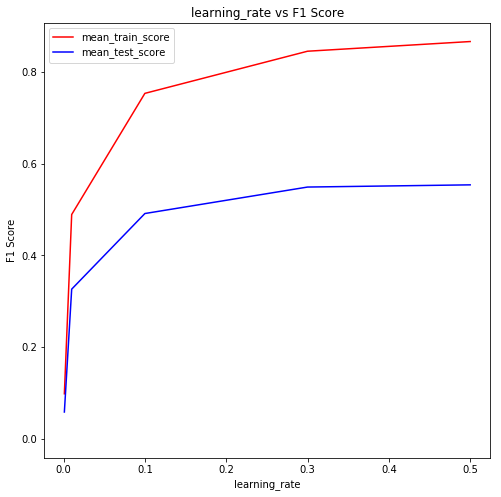

In [143]:
plot_model_complexity(gbm_grid_search_results, 'learning_rate')

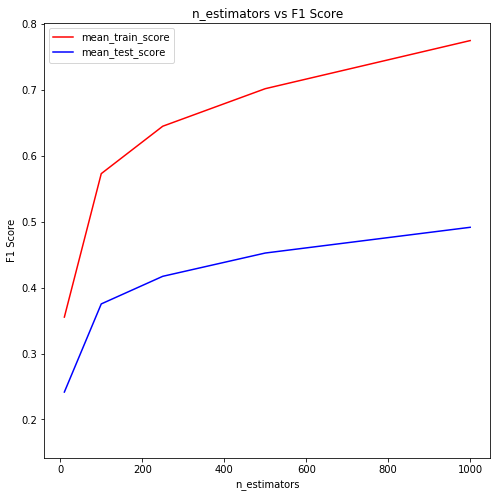

In [144]:
plot_model_complexity(gbm_grid_search_results, 'n_estimators')

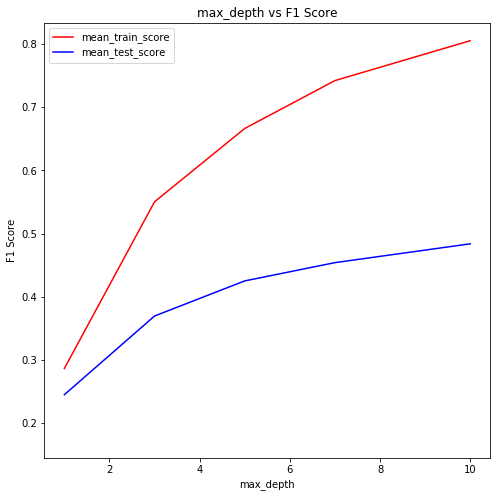

In [249]:
plot_model_complexity(gbm_grid_search_results, 'max_depth')

In [145]:
#KNN Grid Search
parameters = {'n_neighbors':[1,3,5,7,10,25]}
knn = KNeighborsClassifier()
knn_clf = GridSearchCV(knn, parameters, cv= 5, scoring = 'f1')
knn_clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [146]:
knn_grid_search_results = pd.DataFrame(knn_clf.cv_results_).sort_values(by='rank_test_score')
# View the best parameters for the model found using grid search
print('Best score for data1:', knn_clf.best_score_) 
print('Best K:',knn_clf.best_estimator_.n_neighbors) 

Best score for data1: 0.6095372744147455
Best K: 1


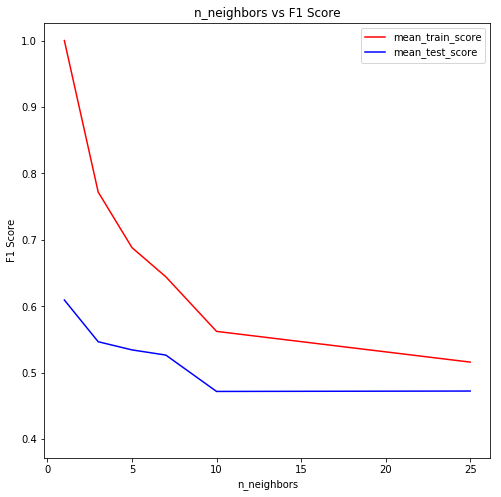

In [147]:
plot_model_complexity(knn_grid_search_results, 'n_neighbors')

Iteration 1, loss = 0.72436203
Iteration 2, loss = 0.72232357
Iteration 3, loss = 0.72034602
Iteration 4, loss = 0.71837370
Iteration 5, loss = 0.71641154
Iteration 6, loss = 0.71445392
Iteration 7, loss = 0.71252218
Iteration 8, loss = 0.71059807
Iteration 9, loss = 0.70866522
Iteration 10, loss = 0.70679356
Iteration 11, loss = 0.70489898
Iteration 12, loss = 0.70304164
Iteration 13, loss = 0.70118538
Iteration 14, loss = 0.69932881
Iteration 15, loss = 0.69750614
Iteration 16, loss = 0.69569775
Iteration 17, loss = 0.69389836
Iteration 18, loss = 0.69207444
Iteration 19, loss = 0.69028702
Iteration 20, loss = 0.68850259
Iteration 21, loss = 0.68673384
Iteration 22, loss = 0.68493945
Iteration 23, loss = 0.68320516
Iteration 24, loss = 0.68145322
Iteration 25, loss = 0.67973154
Iteration 26, loss = 0.67801375
Iteration 27, loss = 0.67633226
Iteration 28, loss = 0.67464104
Iteration 29, loss = 0.67298133
Iteration 30, loss = 0.67131361
Iteration 31, loss = 0.66966379
Iteration 32, los

Iteration 60, loss = 0.68014843
Iteration 61, loss = 0.67843459
Iteration 62, loss = 0.67670604
Iteration 63, loss = 0.67497961
Iteration 64, loss = 0.67324411
Iteration 65, loss = 0.67154058
Iteration 66, loss = 0.66987939
Iteration 67, loss = 0.66818140
Iteration 68, loss = 0.66652279
Iteration 69, loss = 0.66485024
Iteration 70, loss = 0.66319764
Iteration 71, loss = 0.66155028
Iteration 72, loss = 0.65992383
Iteration 73, loss = 0.65833041
Iteration 74, loss = 0.65672613
Iteration 75, loss = 0.65512575
Iteration 76, loss = 0.65354846
Iteration 77, loss = 0.65196845
Iteration 78, loss = 0.65040310
Iteration 79, loss = 0.64884795
Iteration 80, loss = 0.64729085
Iteration 81, loss = 0.64574224
Iteration 82, loss = 0.64421399
Iteration 83, loss = 0.64270826
Iteration 84, loss = 0.64120875
Iteration 85, loss = 0.63971241
Iteration 86, loss = 0.63822003
Iteration 87, loss = 0.63674601
Iteration 88, loss = 0.63526941
Iteration 89, loss = 0.63381394
Iteration 90, loss = 0.63239113
Iteratio

Iteration 115, loss = 0.55035376
Iteration 116, loss = 0.54933808
Iteration 117, loss = 0.54832712
Iteration 118, loss = 0.54733151
Iteration 119, loss = 0.54634945
Iteration 120, loss = 0.54536446
Iteration 121, loss = 0.54439230
Iteration 122, loss = 0.54342593
Iteration 123, loss = 0.54247586
Iteration 124, loss = 0.54153214
Iteration 125, loss = 0.54058867
Iteration 126, loss = 0.53966533
Iteration 127, loss = 0.53876347
Iteration 128, loss = 0.53783307
Iteration 129, loss = 0.53692285
Iteration 130, loss = 0.53600301
Iteration 131, loss = 0.53511672
Iteration 132, loss = 0.53423635
Iteration 133, loss = 0.53334346
Iteration 134, loss = 0.53246656
Iteration 135, loss = 0.53157960
Iteration 136, loss = 0.53071768
Iteration 137, loss = 0.52984490
Iteration 138, loss = 0.52899953
Iteration 139, loss = 0.52813213
Iteration 140, loss = 0.52727777
Iteration 141, loss = 0.52641243
Iteration 142, loss = 0.52558800
Iteration 143, loss = 0.52475561
Iteration 144, loss = 0.52393300
Iteration 

Iteration 180, loss = 0.37791503
Iteration 181, loss = 0.37779437
Iteration 182, loss = 0.37755876
Iteration 183, loss = 0.37739104
Iteration 184, loss = 0.37718613
Iteration 185, loss = 0.37702733
Iteration 186, loss = 0.37687156
Iteration 187, loss = 0.37667069
Iteration 188, loss = 0.37645599
Iteration 189, loss = 0.37631925
Iteration 190, loss = 0.37616710
Iteration 191, loss = 0.37603975
Iteration 192, loss = 0.37580502
Iteration 193, loss = 0.37562057
Iteration 194, loss = 0.37552005
Iteration 195, loss = 0.37527836
Iteration 196, loss = 0.37514893
Iteration 197, loss = 0.37497171
Iteration 198, loss = 0.37480689
Iteration 199, loss = 0.37468292
Iteration 200, loss = 0.37451323
Iteration 1, loss = 0.62740355
Iteration 2, loss = 0.61178117
Iteration 3, loss = 0.59745614
Iteration 4, loss = 0.58459812
Iteration 5, loss = 0.57258387
Iteration 6, loss = 0.56188785
Iteration 7, loss = 0.55160117
Iteration 8, loss = 0.54251841
Iteration 9, loss = 0.53394393
Iteration 10, loss = 0.52625

Iteration 37, loss = 0.43804392
Iteration 38, loss = 0.43611396
Iteration 39, loss = 0.43432086
Iteration 40, loss = 0.43261640
Iteration 41, loss = 0.43095211
Iteration 42, loss = 0.42935816
Iteration 43, loss = 0.42788342
Iteration 44, loss = 0.42641573
Iteration 45, loss = 0.42500604
Iteration 46, loss = 0.42368284
Iteration 47, loss = 0.42240799
Iteration 48, loss = 0.42114597
Iteration 49, loss = 0.41991760
Iteration 50, loss = 0.41874241
Iteration 51, loss = 0.41764584
Iteration 52, loss = 0.41655489
Iteration 53, loss = 0.41547452
Iteration 54, loss = 0.41447361
Iteration 55, loss = 0.41348333
Iteration 56, loss = 0.41258259
Iteration 57, loss = 0.41166854
Iteration 58, loss = 0.41081558
Iteration 59, loss = 0.40989034
Iteration 60, loss = 0.40907767
Iteration 61, loss = 0.40822767
Iteration 62, loss = 0.40741110
Iteration 63, loss = 0.40665405
Iteration 64, loss = 0.40587247
Iteration 65, loss = 0.40512032
Iteration 66, loss = 0.40447181
Iteration 67, loss = 0.40374786
Iteratio

Iteration 102, loss = 0.32978352
Iteration 103, loss = 0.32899377
Iteration 104, loss = 0.32951532
Iteration 105, loss = 0.32846885
Iteration 106, loss = 0.32829060
Iteration 107, loss = 0.32878207
Iteration 108, loss = 0.32760204
Iteration 109, loss = 0.32796371
Iteration 110, loss = 0.32704648
Iteration 111, loss = 0.32606392
Iteration 112, loss = 0.32585895
Iteration 113, loss = 0.32682253
Iteration 114, loss = 0.32567215
Iteration 115, loss = 0.32493191
Iteration 116, loss = 0.32449321
Iteration 117, loss = 0.32453898
Iteration 118, loss = 0.32455665
Iteration 119, loss = 0.32375228
Iteration 120, loss = 0.32369289
Iteration 121, loss = 0.32293615
Iteration 122, loss = 0.32314528
Iteration 123, loss = 0.32200044
Iteration 124, loss = 0.32175764
Iteration 125, loss = 0.32192807
Iteration 126, loss = 0.32163059
Iteration 127, loss = 0.32129649
Iteration 128, loss = 0.32120488
Iteration 129, loss = 0.32153152
Iteration 130, loss = 0.32031254
Iteration 131, loss = 0.32028981
Iteration 

Iteration 17, loss = 0.34141735
Iteration 18, loss = 0.33784382
Iteration 19, loss = 0.33733164
Iteration 20, loss = 0.34393910
Iteration 21, loss = 0.33208587
Iteration 22, loss = 0.33228792
Iteration 23, loss = 0.33231827
Iteration 24, loss = 0.32589735
Iteration 25, loss = 0.32920804
Iteration 26, loss = 0.32492913
Iteration 27, loss = 0.32756692
Iteration 28, loss = 0.32185507
Iteration 29, loss = 0.32115701
Iteration 30, loss = 0.31625704
Iteration 31, loss = 0.31689363
Iteration 32, loss = 0.31696691
Iteration 33, loss = 0.31404384
Iteration 34, loss = 0.30694800
Iteration 35, loss = 0.31809445
Iteration 36, loss = 0.30576824
Iteration 37, loss = 0.31094907
Iteration 38, loss = 0.30972387
Iteration 39, loss = 0.31812686
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.44168944
Iteration 2, loss = 0.38666526
Iteration 3, loss = 0.37635662
Iteration 4, loss = 0.36953677
Iteration 5, loss = 0.36632631
Iteration 6, loss 

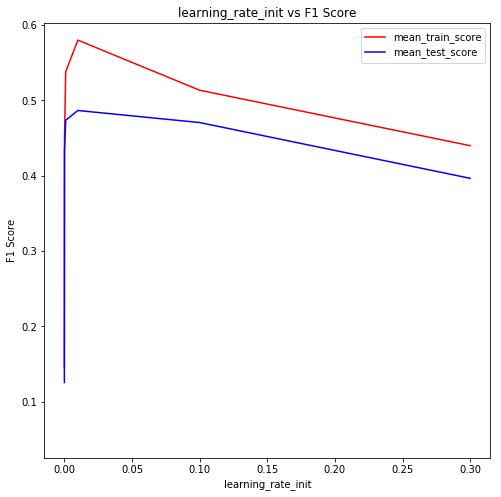

In [250]:
#Neural Network Grid Search
parameters = {'learning_rate_init':[0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]}
nn = MLPClassifier(activation='relu', solver='adam',verbose = 1)
clf = GridSearchCV(nn, parameters, cv= 3, scoring = 'f1')
clf.fit(x_train, y_train)
nn_grid_search_results = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(nn_grid_search_results, 'learning_rate_init')

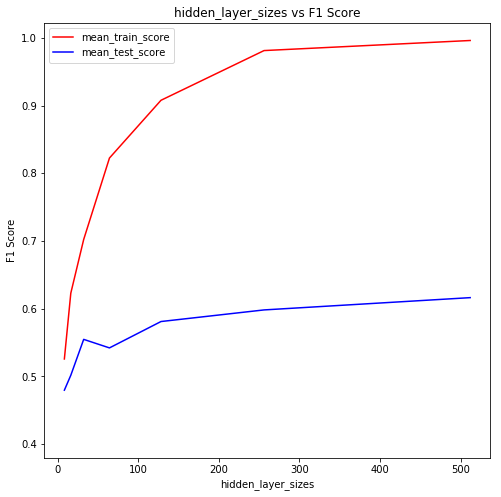

In [149]:
#Neural Network Grid Search
parameters = {'hidden_layer_sizes':[8,16,32,64,128,256,512]}
nn = MLPClassifier(activation='relu', solver='lbfgs')
clf = GridSearchCV(nn, parameters, cv= 3, scoring = 'f1')
clf.fit(x_train, y_train)
nn_grid_search_results = pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(nn_grid_search_results, 'hidden_layer_sizes')

In [150]:
#Neural Network Grid Search
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01], 'hidden_layer_sizes':[8,16,32,64,128]
              ,'learning_rate_init':[0.00000001, 0.00001, 0.0001, 0.001, 0.01],'activation':['relu','logistic']
            , 'solver':['adam','lbfgs']}
nn = MLPClassifier(verbose =1)
nn_clf = GridSearchCV(nn, parameters, cv= cv, scoring = 'f1')
nn_clf.fit(x_train, y_train)

nn_grid_search_results = pd.DataFrame(nn_clf.cv_results_).sort_values(by='rank_test_score')

print('Best score:', nn_clf.best_score_) 
print('Best Estimators:',nn_clf.best_estimator_.alpha) 
print('Best Learning Rate:',nn_clf.best_estimator_.learning_rate)
print('Best HL:',nn_clf.best_estimator_.hidden_layer_sizes)
print('Best Activation:',nn_clf.best_estimator_.activation)
print('Best Optimizer:',nn_clf.best_estimator_.solver)

Iteration 1, loss = 0.64933738
Iteration 2, loss = 0.64933684
Iteration 3, loss = 0.64933631
Iteration 4, loss = 0.64933578
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.84276162
Iteration 2, loss = 0.84276106
Iteration 3, loss = 0.84276050
Iteration 4, loss = 0.84275995
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65786097
Iteration 2, loss = 0.65786060
Iteration 3, loss = 0.65786024
Iteration 4, loss = 0.65785988
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.86960374
Iteration 2, loss = 0.86877388
Iteration 3, loss = 0.86794818
Iteration 4, loss = 0.86712242
Iteration 5, loss = 0.86629115
Iteration 6, loss = 0.86547123
Iteration 7, loss = 0.86464272
Iteration 8, loss = 0.86382590
Iteration 9, loss = 0.86298628
Iteration 10, loss = 0.86217389
Iteration 11, loss = 0.86134691
Iteration 12

Iteration 60, loss = 0.71399991
Iteration 61, loss = 0.71346608
Iteration 62, loss = 0.71294439
Iteration 63, loss = 0.71242503
Iteration 64, loss = 0.71190242
Iteration 65, loss = 0.71138033
Iteration 66, loss = 0.71086639
Iteration 67, loss = 0.71035326
Iteration 68, loss = 0.70983883
Iteration 69, loss = 0.70931760
Iteration 70, loss = 0.70880266
Iteration 71, loss = 0.70829222
Iteration 72, loss = 0.70777455
Iteration 73, loss = 0.70725099
Iteration 74, loss = 0.70674937
Iteration 75, loss = 0.70622886
Iteration 76, loss = 0.70572554
Iteration 77, loss = 0.70521912
Iteration 78, loss = 0.70471941
Iteration 79, loss = 0.70420873
Iteration 80, loss = 0.70370758
Iteration 81, loss = 0.70320752
Iteration 82, loss = 0.70270152
Iteration 83, loss = 0.70218852
Iteration 84, loss = 0.70168295
Iteration 85, loss = 0.70117686
Iteration 86, loss = 0.70067217
Iteration 87, loss = 0.70017472
Iteration 88, loss = 0.69966969
Iteration 89, loss = 0.69917121
Iteration 90, loss = 0.69866322
Iteratio

Iteration 126, loss = 0.74196351
Iteration 127, loss = 0.74140567
Iteration 128, loss = 0.74085378
Iteration 129, loss = 0.74029826
Iteration 130, loss = 0.73974486
Iteration 131, loss = 0.73919990
Iteration 132, loss = 0.73864993
Iteration 133, loss = 0.73810883
Iteration 134, loss = 0.73754969
Iteration 135, loss = 0.73700770
Iteration 136, loss = 0.73646149
Iteration 137, loss = 0.73592527
Iteration 138, loss = 0.73537723
Iteration 139, loss = 0.73483369
Iteration 140, loss = 0.73429519
Iteration 141, loss = 0.73375400
Iteration 142, loss = 0.73321922
Iteration 143, loss = 0.73267626
Iteration 144, loss = 0.73213599
Iteration 145, loss = 0.73160006
Iteration 146, loss = 0.73108194
Iteration 147, loss = 0.73055335
Iteration 148, loss = 0.73002606
Iteration 149, loss = 0.72949422
Iteration 150, loss = 0.72896769
Iteration 151, loss = 0.72843291
Iteration 152, loss = 0.72789213
Iteration 153, loss = 0.72736604
Iteration 154, loss = 0.72683253
Iteration 155, loss = 0.72630933
Iteration 

Iteration 182, loss = 0.46142832
Iteration 183, loss = 0.46067189
Iteration 184, loss = 0.45998483
Iteration 185, loss = 0.45927327
Iteration 186, loss = 0.45855603
Iteration 187, loss = 0.45785493
Iteration 188, loss = 0.45714936
Iteration 189, loss = 0.45646682
Iteration 190, loss = 0.45579569
Iteration 191, loss = 0.45513173
Iteration 192, loss = 0.45448132
Iteration 193, loss = 0.45384259
Iteration 194, loss = 0.45319793
Iteration 195, loss = 0.45254933
Iteration 196, loss = 0.45193658
Iteration 197, loss = 0.45129158
Iteration 198, loss = 0.45067839
Iteration 199, loss = 0.45007962
Iteration 200, loss = 0.44947081
Iteration 1, loss = 0.55646843
Iteration 2, loss = 0.55436060
Iteration 3, loss = 0.55237905
Iteration 4, loss = 0.55042930
Iteration 5, loss = 0.54854756
Iteration 6, loss = 0.54674003
Iteration 7, loss = 0.54495413
Iteration 8, loss = 0.54316976
Iteration 9, loss = 0.54145394
Iteration 10, loss = 0.53978774
Iteration 11, loss = 0.53816920
Iteration 12, loss = 0.5365856

Iteration 53, loss = 0.49800964
Iteration 54, loss = 0.49702922
Iteration 55, loss = 0.49603274
Iteration 56, loss = 0.49502694
Iteration 57, loss = 0.49405380
Iteration 58, loss = 0.49308065
Iteration 59, loss = 0.49207664
Iteration 60, loss = 0.49114743
Iteration 61, loss = 0.49019351
Iteration 62, loss = 0.48926713
Iteration 63, loss = 0.48833412
Iteration 64, loss = 0.48740521
Iteration 65, loss = 0.48647964
Iteration 66, loss = 0.48559817
Iteration 67, loss = 0.48467823
Iteration 68, loss = 0.48381114
Iteration 69, loss = 0.48293893
Iteration 70, loss = 0.48208660
Iteration 71, loss = 0.48123300
Iteration 72, loss = 0.48039625
Iteration 73, loss = 0.47955056
Iteration 74, loss = 0.47870922
Iteration 75, loss = 0.47785823
Iteration 76, loss = 0.47703972
Iteration 77, loss = 0.47621816
Iteration 78, loss = 0.47543460
Iteration 79, loss = 0.47465577
Iteration 80, loss = 0.47385367
Iteration 81, loss = 0.47308268
Iteration 82, loss = 0.47229349
Iteration 83, loss = 0.47153997
Iteratio

Iteration 135, loss = 0.38087571
Iteration 136, loss = 0.38061198
Iteration 137, loss = 0.38063789
Iteration 138, loss = 0.38050775
Iteration 139, loss = 0.38034643
Iteration 140, loss = 0.38022868
Iteration 141, loss = 0.38005520
Iteration 142, loss = 0.37989331
Iteration 143, loss = 0.37989047
Iteration 144, loss = 0.37982656
Iteration 145, loss = 0.37962274
Iteration 146, loss = 0.37957565
Iteration 147, loss = 0.37952898
Iteration 148, loss = 0.37928654
Iteration 149, loss = 0.37937516
Iteration 150, loss = 0.37911309
Iteration 151, loss = 0.37908015
Iteration 152, loss = 0.37882259
Iteration 153, loss = 0.37880713
Iteration 154, loss = 0.37876188
Iteration 155, loss = 0.37869800
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67251825
Iteration 2, loss = 0.61648183
Iteration 3, loss = 0.57262476
Iteration 4, loss = 0.53774972
Iteration 5, loss = 0.51246967
Iteration 6, loss = 0.49401175
Iteration 7, loss = 0.47974982

Iteration 82, loss = 0.37947355
Iteration 83, loss = 0.37927805
Iteration 84, loss = 0.37917408
Iteration 85, loss = 0.37884689
Iteration 86, loss = 0.37864018
Iteration 87, loss = 0.37847205
Iteration 88, loss = 0.37830009
Iteration 89, loss = 0.37816907
Iteration 90, loss = 0.37810600
Iteration 91, loss = 0.37790344
Iteration 92, loss = 0.37764058
Iteration 93, loss = 0.37739550
Iteration 94, loss = 0.37744997
Iteration 95, loss = 0.37719926
Iteration 96, loss = 0.37713897
Iteration 97, loss = 0.37697366
Iteration 98, loss = 0.37679990
Iteration 99, loss = 0.37663388
Iteration 100, loss = 0.37654031
Iteration 101, loss = 0.37648574
Iteration 102, loss = 0.37616594
Iteration 103, loss = 0.37609930
Iteration 104, loss = 0.37588165
Iteration 105, loss = 0.37604856
Iteration 106, loss = 0.37561443
Iteration 107, loss = 0.37542182
Iteration 108, loss = 0.37553863
Iteration 109, loss = 0.37525432
Iteration 110, loss = 0.37506055
Iteration 111, loss = 0.37511156
Iteration 112, loss = 0.3747

Iteration 82, loss = 0.86112528
Iteration 83, loss = 0.86021846
Iteration 84, loss = 0.85928263
Iteration 85, loss = 0.85837756
Iteration 86, loss = 0.85746784
Iteration 87, loss = 0.85656016
Iteration 88, loss = 0.85565571
Iteration 89, loss = 0.85474528
Iteration 90, loss = 0.85383769
Iteration 91, loss = 0.85293355
Iteration 92, loss = 0.85203235
Iteration 93, loss = 0.85114599
Iteration 94, loss = 0.85024191
Iteration 95, loss = 0.84934652
Iteration 96, loss = 0.84845021
Iteration 97, loss = 0.84755616
Iteration 98, loss = 0.84666348
Iteration 99, loss = 0.84578644
Iteration 100, loss = 0.84489602
Iteration 101, loss = 0.84402338
Iteration 102, loss = 0.84311209
Iteration 103, loss = 0.84223715
Iteration 104, loss = 0.84134733
Iteration 105, loss = 0.84045739
Iteration 106, loss = 0.83956195
Iteration 107, loss = 0.83869131
Iteration 108, loss = 0.83780937
Iteration 109, loss = 0.83691915
Iteration 110, loss = 0.83604869
Iteration 111, loss = 0.83518191
Iteration 112, loss = 0.8343

Iteration 178, loss = 1.12818118
Iteration 179, loss = 1.12712060
Iteration 180, loss = 1.12606606
Iteration 181, loss = 1.12502346
Iteration 182, loss = 1.12397999
Iteration 183, loss = 1.12293069
Iteration 184, loss = 1.12187031
Iteration 185, loss = 1.12082433
Iteration 186, loss = 1.11977470
Iteration 187, loss = 1.11872502
Iteration 188, loss = 1.11768029
Iteration 189, loss = 1.11664117
Iteration 190, loss = 1.11560072
Iteration 191, loss = 1.11454755
Iteration 192, loss = 1.11351221
Iteration 193, loss = 1.11245839
Iteration 194, loss = 1.11142255
Iteration 195, loss = 1.11038615
Iteration 196, loss = 1.10936103
Iteration 197, loss = 1.10832688
Iteration 198, loss = 1.10730996
Iteration 199, loss = 1.10628391
Iteration 200, loss = 1.10526131
Iteration 1, loss = 0.55763227
Iteration 2, loss = 0.55734710
Iteration 3, loss = 0.55705968
Iteration 4, loss = 0.55678636
Iteration 5, loss = 0.55651255
Iteration 6, loss = 0.55624089
Iteration 7, loss = 0.55596916
Iteration 8, loss = 0.55

Iteration 43, loss = 0.59052943
Iteration 44, loss = 0.58722185
Iteration 45, loss = 0.58399330
Iteration 46, loss = 0.58085087
Iteration 47, loss = 0.57780638
Iteration 48, loss = 0.57476901
Iteration 49, loss = 0.57180837
Iteration 50, loss = 0.56890711
Iteration 51, loss = 0.56604131
Iteration 52, loss = 0.56328840
Iteration 53, loss = 0.56052208
Iteration 54, loss = 0.55790021
Iteration 55, loss = 0.55531366
Iteration 56, loss = 0.55272909
Iteration 57, loss = 0.55027950
Iteration 58, loss = 0.54787794
Iteration 59, loss = 0.54548910
Iteration 60, loss = 0.54317315
Iteration 61, loss = 0.54088661
Iteration 62, loss = 0.53857474
Iteration 63, loss = 0.53634192
Iteration 64, loss = 0.53419578
Iteration 65, loss = 0.53209397
Iteration 66, loss = 0.53004570
Iteration 67, loss = 0.52799224
Iteration 68, loss = 0.52597948
Iteration 69, loss = 0.52401415
Iteration 70, loss = 0.52207487
Iteration 71, loss = 0.52018147
Iteration 72, loss = 0.51833508
Iteration 73, loss = 0.51647560
Iteratio

Iteration 137, loss = 0.45534985
Iteration 138, loss = 0.45462975
Iteration 139, loss = 0.45393377
Iteration 140, loss = 0.45325184
Iteration 141, loss = 0.45258457
Iteration 142, loss = 0.45192956
Iteration 143, loss = 0.45128037
Iteration 144, loss = 0.45062477
Iteration 145, loss = 0.44996811
Iteration 146, loss = 0.44931975
Iteration 147, loss = 0.44868898
Iteration 148, loss = 0.44804569
Iteration 149, loss = 0.44742296
Iteration 150, loss = 0.44678402
Iteration 151, loss = 0.44618028
Iteration 152, loss = 0.44555717
Iteration 153, loss = 0.44496448
Iteration 154, loss = 0.44435596
Iteration 155, loss = 0.44377506
Iteration 156, loss = 0.44317983
Iteration 157, loss = 0.44261490
Iteration 158, loss = 0.44205577
Iteration 159, loss = 0.44149351
Iteration 160, loss = 0.44093142
Iteration 161, loss = 0.44039464
Iteration 162, loss = 0.43985453
Iteration 163, loss = 0.43931199
Iteration 164, loss = 0.43878926
Iteration 165, loss = 0.43826994
Iteration 166, loss = 0.43773097
Iteration 

Iteration 1, loss = 0.58163480
Iteration 2, loss = 0.54649904
Iteration 3, loss = 0.52041752
Iteration 4, loss = 0.50028339
Iteration 5, loss = 0.48477830
Iteration 6, loss = 0.47217602
Iteration 7, loss = 0.46200220
Iteration 8, loss = 0.45318568
Iteration 9, loss = 0.44524042
Iteration 10, loss = 0.43855405
Iteration 11, loss = 0.43265723
Iteration 12, loss = 0.42723354
Iteration 13, loss = 0.42245184
Iteration 14, loss = 0.41804236
Iteration 15, loss = 0.41415142
Iteration 16, loss = 0.41069441
Iteration 17, loss = 0.40738833
Iteration 18, loss = 0.40437118
Iteration 19, loss = 0.40175549
Iteration 20, loss = 0.39926494
Iteration 21, loss = 0.39712255
Iteration 22, loss = 0.39505161
Iteration 23, loss = 0.39331518
Iteration 24, loss = 0.39179990
Iteration 25, loss = 0.39040442
Iteration 26, loss = 0.38908600
Iteration 27, loss = 0.38793262
Iteration 28, loss = 0.38701828
Iteration 29, loss = 0.38597116
Iteration 30, loss = 0.38512978
Iteration 31, loss = 0.38417673
Iteration 32, los

Iteration 101, loss = 0.37142442
Iteration 102, loss = 0.37112980
Iteration 103, loss = 0.37086522
Iteration 104, loss = 0.37066313
Iteration 105, loss = 0.37042977
Iteration 106, loss = 0.37012806
Iteration 107, loss = 0.37000609
Iteration 108, loss = 0.36986708
Iteration 109, loss = 0.36953109
Iteration 110, loss = 0.36916052
Iteration 111, loss = 0.36904600
Iteration 112, loss = 0.36888544
Iteration 113, loss = 0.36866611
Iteration 114, loss = 0.36853321
Iteration 115, loss = 0.36805492
Iteration 116, loss = 0.36807196
Iteration 117, loss = 0.36810208
Iteration 118, loss = 0.36747312
Iteration 119, loss = 0.36739564
Iteration 120, loss = 0.36701002
Iteration 121, loss = 0.36680514
Iteration 122, loss = 0.36658144
Iteration 123, loss = 0.36636179
Iteration 124, loss = 0.36616855
Iteration 125, loss = 0.36586236
Iteration 126, loss = 0.36572954
Iteration 127, loss = 0.36536767
Iteration 128, loss = 0.36536637
Iteration 129, loss = 0.36520675
Iteration 130, loss = 0.36498841
Iteration 

Iteration 43, loss = 0.33701035
Iteration 44, loss = 0.33876928
Iteration 45, loss = 0.33377445
Iteration 46, loss = 0.33406636
Iteration 47, loss = 0.33600346
Iteration 48, loss = 0.33236270
Iteration 49, loss = 0.33436098
Iteration 50, loss = 0.33505438
Iteration 51, loss = 0.33468142
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.62641901
Iteration 2, loss = 0.44221178
Iteration 3, loss = 0.40990375
Iteration 4, loss = 0.39820199
Iteration 5, loss = 0.39041429
Iteration 6, loss = 0.38392890
Iteration 7, loss = 0.38188059
Iteration 8, loss = 0.37864226
Iteration 9, loss = 0.37754266
Iteration 10, loss = 0.37413999
Iteration 11, loss = 0.37432993
Iteration 12, loss = 0.37184216
Iteration 13, loss = 0.37028294
Iteration 14, loss = 0.36812776
Iteration 15, loss = 0.36542982
Iteration 16, loss = 0.36543233
Iteration 17, loss = 0.36374508
Iteration 18, loss = 0.36199395
Iteration 19, loss = 0.36476213
Iteration 20, loss = 0

Iteration 178, loss = 0.64061891
Iteration 179, loss = 0.63978792
Iteration 180, loss = 0.63896900
Iteration 181, loss = 0.63815010
Iteration 182, loss = 0.63733076
Iteration 183, loss = 0.63652205
Iteration 184, loss = 0.63572225
Iteration 185, loss = 0.63491851
Iteration 186, loss = 0.63411342
Iteration 187, loss = 0.63331431
Iteration 188, loss = 0.63251212
Iteration 189, loss = 0.63170232
Iteration 190, loss = 0.63088324
Iteration 191, loss = 0.63008141
Iteration 192, loss = 0.62928218
Iteration 193, loss = 0.62850742
Iteration 194, loss = 0.62772034
Iteration 195, loss = 0.62694706
Iteration 196, loss = 0.62614436
Iteration 197, loss = 0.62535424
Iteration 198, loss = 0.62456396
Iteration 199, loss = 0.62377850
Iteration 200, loss = 0.62298965
Iteration 1, loss = 1.06327655
Iteration 2, loss = 1.06136206
Iteration 3, loss = 1.05946430
Iteration 4, loss = 1.05754471
Iteration 5, loss = 1.05565699
Iteration 6, loss = 1.05375114
Iteration 7, loss = 1.05189242
Iteration 8, loss = 1.04

Iteration 42, loss = 1.08989461
Iteration 43, loss = 1.08812626
Iteration 44, loss = 1.08636811
Iteration 45, loss = 1.08461697
Iteration 46, loss = 1.08289637
Iteration 47, loss = 1.08115046
Iteration 48, loss = 1.07939262
Iteration 49, loss = 1.07765508
Iteration 50, loss = 1.07589748
Iteration 51, loss = 1.07416068
Iteration 52, loss = 1.07245990
Iteration 53, loss = 1.07074075
Iteration 54, loss = 1.06903742
Iteration 55, loss = 1.06733138
Iteration 56, loss = 1.06560300
Iteration 57, loss = 1.06388317
Iteration 58, loss = 1.06218269
Iteration 59, loss = 1.06047000
Iteration 60, loss = 1.05877316
Iteration 61, loss = 1.05708211
Iteration 62, loss = 1.05537772
Iteration 63, loss = 1.05369186
Iteration 64, loss = 1.05201628
Iteration 65, loss = 1.05033909
Iteration 66, loss = 1.04864190
Iteration 67, loss = 1.04696987
Iteration 68, loss = 1.04531005
Iteration 69, loss = 1.04361957
Iteration 70, loss = 1.04195409
Iteration 71, loss = 1.04026725
Iteration 72, loss = 1.03862477
Iteratio

Iteration 120, loss = 0.42872118
Iteration 121, loss = 0.42811896
Iteration 122, loss = 0.42752269
Iteration 123, loss = 0.42690761
Iteration 124, loss = 0.42633471
Iteration 125, loss = 0.42573393
Iteration 126, loss = 0.42513434
Iteration 127, loss = 0.42456396
Iteration 128, loss = 0.42401113
Iteration 129, loss = 0.42347576
Iteration 130, loss = 0.42291825
Iteration 131, loss = 0.42238228
Iteration 132, loss = 0.42185371
Iteration 133, loss = 0.42132265
Iteration 134, loss = 0.42080778
Iteration 135, loss = 0.42030252
Iteration 136, loss = 0.41977687
Iteration 137, loss = 0.41929026
Iteration 138, loss = 0.41878458
Iteration 139, loss = 0.41827940
Iteration 140, loss = 0.41779578
Iteration 141, loss = 0.41731425
Iteration 142, loss = 0.41685321
Iteration 143, loss = 0.41638602
Iteration 144, loss = 0.41591825
Iteration 145, loss = 0.41547139
Iteration 146, loss = 0.41499809
Iteration 147, loss = 0.41457730
Iteration 148, loss = 0.41413388
Iteration 149, loss = 0.41370328
Iteration 

Iteration 193, loss = 0.38993239
Iteration 194, loss = 0.38980548
Iteration 195, loss = 0.38968272
Iteration 196, loss = 0.38954043
Iteration 197, loss = 0.38941989
Iteration 198, loss = 0.38926690
Iteration 199, loss = 0.38913342
Iteration 200, loss = 0.38902447
Iteration 1, loss = 0.74137381
Iteration 2, loss = 0.73060855
Iteration 3, loss = 0.72024984
Iteration 4, loss = 0.71010803
Iteration 5, loss = 0.70049203
Iteration 6, loss = 0.69115227
Iteration 7, loss = 0.68212397
Iteration 8, loss = 0.67341995
Iteration 9, loss = 0.66505166
Iteration 10, loss = 0.65692365
Iteration 11, loss = 0.64905329
Iteration 12, loss = 0.64142228
Iteration 13, loss = 0.63400561
Iteration 14, loss = 0.62691372
Iteration 15, loss = 0.61995002
Iteration 16, loss = 0.61324111
Iteration 17, loss = 0.60681538
Iteration 18, loss = 0.60063177
Iteration 19, loss = 0.59464344
Iteration 20, loss = 0.58890835
Iteration 21, loss = 0.58321182
Iteration 22, loss = 0.57769462
Iteration 23, loss = 0.57250460
Iteration

Iteration 59, loss = 0.35930542
Iteration 60, loss = 0.35890260
Iteration 61, loss = 0.35853221
Iteration 62, loss = 0.35834134
Iteration 63, loss = 0.35787795
Iteration 64, loss = 0.35758863
Iteration 65, loss = 0.35716511
Iteration 66, loss = 0.35683595
Iteration 67, loss = 0.35646281
Iteration 68, loss = 0.35605428
Iteration 69, loss = 0.35564778
Iteration 70, loss = 0.35520340
Iteration 71, loss = 0.35500450
Iteration 72, loss = 0.35460004
Iteration 73, loss = 0.35424732
Iteration 74, loss = 0.35416204
Iteration 75, loss = 0.35364525
Iteration 76, loss = 0.35316590
Iteration 77, loss = 0.35321182
Iteration 78, loss = 0.35271738
Iteration 79, loss = 0.35243107
Iteration 80, loss = 0.35192009
Iteration 81, loss = 0.35188524
Iteration 82, loss = 0.35152190
Iteration 83, loss = 0.35104521
Iteration 84, loss = 0.35100960
Iteration 85, loss = 0.35075327
Iteration 86, loss = 0.35042153
Iteration 87, loss = 0.34987610
Iteration 88, loss = 0.34967270
Iteration 89, loss = 0.34954739
Iteratio

Iteration 63, loss = 0.36491306
Iteration 64, loss = 0.36459845
Iteration 65, loss = 0.36387275
Iteration 66, loss = 0.36370201
Iteration 67, loss = 0.36313361
Iteration 68, loss = 0.36280083
Iteration 69, loss = 0.36254028
Iteration 70, loss = 0.36186526
Iteration 71, loss = 0.36161709
Iteration 72, loss = 0.36116871
Iteration 73, loss = 0.36078374
Iteration 74, loss = 0.36045095
Iteration 75, loss = 0.35996182
Iteration 76, loss = 0.35963399
Iteration 77, loss = 0.35941993
Iteration 78, loss = 0.35901218
Iteration 79, loss = 0.35862838
Iteration 80, loss = 0.35818883
Iteration 81, loss = 0.35788831
Iteration 82, loss = 0.35718787
Iteration 83, loss = 0.35709807
Iteration 84, loss = 0.35665116
Iteration 85, loss = 0.35619897
Iteration 86, loss = 0.35613468
Iteration 87, loss = 0.35571717
Iteration 88, loss = 0.35532683
Iteration 89, loss = 0.35489331
Iteration 90, loss = 0.35442300
Iteration 91, loss = 0.35427910
Iteration 92, loss = 0.35402319
Iteration 93, loss = 0.35360078
Iteratio

Iteration 44, loss = 0.67471099
Iteration 45, loss = 0.67340333
Iteration 46, loss = 0.67212314
Iteration 47, loss = 0.67083452
Iteration 48, loss = 0.66954293
Iteration 49, loss = 0.66825613
Iteration 50, loss = 0.66698625
Iteration 51, loss = 0.66572218
Iteration 52, loss = 0.66447679
Iteration 53, loss = 0.66323342
Iteration 54, loss = 0.66199911
Iteration 55, loss = 0.66078172
Iteration 56, loss = 0.65955758
Iteration 57, loss = 0.65835173
Iteration 58, loss = 0.65713308
Iteration 59, loss = 0.65591707
Iteration 60, loss = 0.65471263
Iteration 61, loss = 0.65351988
Iteration 62, loss = 0.65233711
Iteration 63, loss = 0.65116510
Iteration 64, loss = 0.65000133
Iteration 65, loss = 0.64883545
Iteration 66, loss = 0.64767408
Iteration 67, loss = 0.64652333
Iteration 68, loss = 0.64537492
Iteration 69, loss = 0.64421398
Iteration 70, loss = 0.64310542
Iteration 71, loss = 0.64195686
Iteration 72, loss = 0.64084701
Iteration 73, loss = 0.63973866
Iteration 74, loss = 0.63862091
Iteratio

Iteration 119, loss = 0.48530835
Iteration 120, loss = 0.48487271
Iteration 121, loss = 0.48444005
Iteration 122, loss = 0.48400271
Iteration 123, loss = 0.48357358
Iteration 124, loss = 0.48314490
Iteration 125, loss = 0.48271193
Iteration 126, loss = 0.48228957
Iteration 127, loss = 0.48187554
Iteration 128, loss = 0.48146699
Iteration 129, loss = 0.48106605
Iteration 130, loss = 0.48066295
Iteration 131, loss = 0.48025284
Iteration 132, loss = 0.47984795
Iteration 133, loss = 0.47945582
Iteration 134, loss = 0.47905445
Iteration 135, loss = 0.47866604
Iteration 136, loss = 0.47827588
Iteration 137, loss = 0.47788764
Iteration 138, loss = 0.47750359
Iteration 139, loss = 0.47711419
Iteration 140, loss = 0.47671768
Iteration 141, loss = 0.47633213
Iteration 142, loss = 0.47596526
Iteration 143, loss = 0.47559781
Iteration 144, loss = 0.47523193
Iteration 145, loss = 0.47486147
Iteration 146, loss = 0.47450326
Iteration 147, loss = 0.47412921
Iteration 148, loss = 0.47376964
Iteration 

Iteration 193, loss = 0.48697234
Iteration 194, loss = 0.48654582
Iteration 195, loss = 0.48613875
Iteration 196, loss = 0.48571734
Iteration 197, loss = 0.48530490
Iteration 198, loss = 0.48488255
Iteration 199, loss = 0.48446744
Iteration 200, loss = 0.48406044
Iteration 1, loss = 0.65809175
Iteration 2, loss = 0.64441306
Iteration 3, loss = 0.63176066
Iteration 4, loss = 0.61995435
Iteration 5, loss = 0.60894484
Iteration 6, loss = 0.59877863
Iteration 7, loss = 0.58917722
Iteration 8, loss = 0.58003608
Iteration 9, loss = 0.57164741
Iteration 10, loss = 0.56361498
Iteration 11, loss = 0.55628151
Iteration 12, loss = 0.54945222
Iteration 13, loss = 0.54274912
Iteration 14, loss = 0.53663411
Iteration 15, loss = 0.53097645
Iteration 16, loss = 0.52561207
Iteration 17, loss = 0.52050193
Iteration 18, loss = 0.51574218
Iteration 19, loss = 0.51115697
Iteration 20, loss = 0.50673829
Iteration 21, loss = 0.50267877
Iteration 22, loss = 0.49881443
Iteration 23, loss = 0.49526817
Iteration

Iteration 52, loss = 0.44905335
Iteration 53, loss = 0.44740451
Iteration 54, loss = 0.44571828
Iteration 55, loss = 0.44413802
Iteration 56, loss = 0.44260133
Iteration 57, loss = 0.44110128
Iteration 58, loss = 0.43955987
Iteration 59, loss = 0.43819391
Iteration 60, loss = 0.43678299
Iteration 61, loss = 0.43549104
Iteration 62, loss = 0.43414263
Iteration 63, loss = 0.43283212
Iteration 64, loss = 0.43161436
Iteration 65, loss = 0.43039011
Iteration 66, loss = 0.42912483
Iteration 67, loss = 0.42798546
Iteration 68, loss = 0.42684239
Iteration 69, loss = 0.42573107
Iteration 70, loss = 0.42465356
Iteration 71, loss = 0.42360537
Iteration 72, loss = 0.42254814
Iteration 73, loss = 0.42147163
Iteration 74, loss = 0.42052338
Iteration 75, loss = 0.41954339
Iteration 76, loss = 0.41863264
Iteration 77, loss = 0.41778185
Iteration 78, loss = 0.41686915
Iteration 79, loss = 0.41595061
Iteration 80, loss = 0.41510086
Iteration 81, loss = 0.41423211
Iteration 82, loss = 0.41340378
Iteratio

Iteration 127, loss = 0.39669246
Iteration 128, loss = 0.39634271
Iteration 129, loss = 0.39603532
Iteration 130, loss = 0.39572724
Iteration 131, loss = 0.39539349
Iteration 132, loss = 0.39508803
Iteration 133, loss = 0.39475433
Iteration 134, loss = 0.39446296
Iteration 135, loss = 0.39413536
Iteration 136, loss = 0.39380451
Iteration 137, loss = 0.39354309
Iteration 138, loss = 0.39322622
Iteration 139, loss = 0.39291731
Iteration 140, loss = 0.39264234
Iteration 141, loss = 0.39234664
Iteration 142, loss = 0.39208433
Iteration 143, loss = 0.39182147
Iteration 144, loss = 0.39155112
Iteration 145, loss = 0.39125902
Iteration 146, loss = 0.39099613
Iteration 147, loss = 0.39073263
Iteration 148, loss = 0.39049227
Iteration 149, loss = 0.39026460
Iteration 150, loss = 0.39001753
Iteration 151, loss = 0.38976955
Iteration 152, loss = 0.38954349
Iteration 153, loss = 0.38930171
Iteration 154, loss = 0.38906295
Iteration 155, loss = 0.38885992
Iteration 156, loss = 0.38861088
Iteration 

Iteration 56, loss = 0.35793773
Iteration 57, loss = 0.35797534
Iteration 58, loss = 0.35714431
Iteration 59, loss = 0.35638810
Iteration 60, loss = 0.35590791
Iteration 61, loss = 0.35520962
Iteration 62, loss = 0.35490640
Iteration 63, loss = 0.35434555
Iteration 64, loss = 0.35390991
Iteration 65, loss = 0.35391802
Iteration 66, loss = 0.35246563
Iteration 67, loss = 0.35277246
Iteration 68, loss = 0.35207057
Iteration 69, loss = 0.35142065
Iteration 70, loss = 0.35114314
Iteration 71, loss = 0.35062485
Iteration 72, loss = 0.35048550
Iteration 73, loss = 0.34949435
Iteration 74, loss = 0.34968433
Iteration 75, loss = 0.34886960
Iteration 76, loss = 0.34833564
Iteration 77, loss = 0.34758453
Iteration 78, loss = 0.34777697
Iteration 79, loss = 0.34717471
Iteration 80, loss = 0.34651534
Iteration 81, loss = 0.34579330
Iteration 82, loss = 0.34580461
Iteration 83, loss = 0.34558190
Iteration 84, loss = 0.34478907
Iteration 85, loss = 0.34482974
Iteration 86, loss = 0.34410427
Iteratio

Iteration 15, loss = 0.34679765
Iteration 16, loss = 0.35073573
Iteration 17, loss = 0.34221318
Iteration 18, loss = 0.34357291
Iteration 19, loss = 0.33563364
Iteration 20, loss = 0.34224051
Iteration 21, loss = 0.33559158
Iteration 22, loss = 0.33611764
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.49821829
Iteration 2, loss = 0.39819806
Iteration 3, loss = 0.38758686
Iteration 4, loss = 0.38073188
Iteration 5, loss = 0.37529990
Iteration 6, loss = 0.37135368
Iteration 7, loss = 0.37061983
Iteration 8, loss = 0.36532449
Iteration 9, loss = 0.36283956
Iteration 10, loss = 0.35899142
Iteration 11, loss = 0.36023480
Iteration 12, loss = 0.35863287
Iteration 13, loss = 0.35690156
Iteration 14, loss = 0.35522530
Iteration 15, loss = 0.35203824
Iteration 16, loss = 0.35140110
Iteration 17, loss = 0.34977334
Iteration 18, loss = 0.34626586
Iteration 19, loss = 0.35118784
Iteration 20, loss = 0.35082783
Iteration 21, loss = 0

Iteration 200, loss = 0.49943458
Iteration 1, loss = 0.76219639
Iteration 2, loss = 0.75948796
Iteration 3, loss = 0.75681136
Iteration 4, loss = 0.75416064
Iteration 5, loss = 0.75149012
Iteration 6, loss = 0.74887825
Iteration 7, loss = 0.74626214
Iteration 8, loss = 0.74365806
Iteration 9, loss = 0.74110595
Iteration 10, loss = 0.73855170
Iteration 11, loss = 0.73602790
Iteration 12, loss = 0.73350637
Iteration 13, loss = 0.73099215
Iteration 14, loss = 0.72853505
Iteration 15, loss = 0.72610150
Iteration 16, loss = 0.72367543
Iteration 17, loss = 0.72126760
Iteration 18, loss = 0.71890767
Iteration 19, loss = 0.71653285
Iteration 20, loss = 0.71418259
Iteration 21, loss = 0.71186623
Iteration 22, loss = 0.70954821
Iteration 23, loss = 0.70727350
Iteration 24, loss = 0.70501134
Iteration 25, loss = 0.70279234
Iteration 26, loss = 0.70054453
Iteration 27, loss = 0.69831569
Iteration 28, loss = 0.69613946
Iteration 29, loss = 0.69397660
Iteration 30, loss = 0.69180440
Iteration 31, lo

Iteration 59, loss = 0.70035747
Iteration 60, loss = 0.69826343
Iteration 61, loss = 0.69618973
Iteration 62, loss = 0.69410293
Iteration 63, loss = 0.69202032
Iteration 64, loss = 0.68996975
Iteration 65, loss = 0.68792444
Iteration 66, loss = 0.68589078
Iteration 67, loss = 0.68389687
Iteration 68, loss = 0.68189576
Iteration 69, loss = 0.67996982
Iteration 70, loss = 0.67804504
Iteration 71, loss = 0.67611627
Iteration 72, loss = 0.67418337
Iteration 73, loss = 0.67225398
Iteration 74, loss = 0.67034864
Iteration 75, loss = 0.66847727
Iteration 76, loss = 0.66656402
Iteration 77, loss = 0.66469977
Iteration 78, loss = 0.66280277
Iteration 79, loss = 0.66094461
Iteration 80, loss = 0.65915251
Iteration 81, loss = 0.65735055
Iteration 82, loss = 0.65557078
Iteration 83, loss = 0.65379330
Iteration 84, loss = 0.65200916
Iteration 85, loss = 0.65024652
Iteration 86, loss = 0.64848703
Iteration 87, loss = 0.64673112
Iteration 88, loss = 0.64501392
Iteration 89, loss = 0.64332578
Iteratio

Iteration 123, loss = 0.37856878
Iteration 124, loss = 0.37834444
Iteration 125, loss = 0.37811174
Iteration 126, loss = 0.37786769
Iteration 127, loss = 0.37764018
Iteration 128, loss = 0.37744861
Iteration 129, loss = 0.37718613
Iteration 130, loss = 0.37699275
Iteration 131, loss = 0.37674445
Iteration 132, loss = 0.37655011
Iteration 133, loss = 0.37632953
Iteration 134, loss = 0.37612625
Iteration 135, loss = 0.37590260
Iteration 136, loss = 0.37570783
Iteration 137, loss = 0.37550424
Iteration 138, loss = 0.37533271
Iteration 139, loss = 0.37512819
Iteration 140, loss = 0.37493899
Iteration 141, loss = 0.37475028
Iteration 142, loss = 0.37453923
Iteration 143, loss = 0.37435143
Iteration 144, loss = 0.37418819
Iteration 145, loss = 0.37399306
Iteration 146, loss = 0.37381485
Iteration 147, loss = 0.37363524
Iteration 148, loss = 0.37346187
Iteration 149, loss = 0.37333103
Iteration 150, loss = 0.37310011
Iteration 151, loss = 0.37294249
Iteration 152, loss = 0.37276877
Iteration 

Iteration 190, loss = 0.37185776
Iteration 191, loss = 0.37177243
Iteration 192, loss = 0.37164689
Iteration 193, loss = 0.37153862
Iteration 194, loss = 0.37142003
Iteration 195, loss = 0.37122739
Iteration 196, loss = 0.37112862
Iteration 197, loss = 0.37098185
Iteration 198, loss = 0.37089477
Iteration 199, loss = 0.37083791
Iteration 200, loss = 0.37066101
Iteration 1, loss = 0.71664673
Iteration 2, loss = 0.69214571
Iteration 3, loss = 0.66949891
Iteration 4, loss = 0.64878809
Iteration 5, loss = 0.62965241
Iteration 6, loss = 0.61241048
Iteration 7, loss = 0.59638550
Iteration 8, loss = 0.58197758
Iteration 9, loss = 0.56884788
Iteration 10, loss = 0.55690147
Iteration 11, loss = 0.54596674
Iteration 12, loss = 0.53571588
Iteration 13, loss = 0.52660466
Iteration 14, loss = 0.51819651
Iteration 15, loss = 0.51072533
Iteration 16, loss = 0.50387870
Iteration 17, loss = 0.49753334
Iteration 18, loss = 0.49163358
Iteration 19, loss = 0.48597870
Iteration 20, loss = 0.48098741
Iterat

Iteration 47, loss = 0.34651460
Iteration 48, loss = 0.34572109
Iteration 49, loss = 0.34438694
Iteration 50, loss = 0.34369602
Iteration 51, loss = 0.34315625
Iteration 52, loss = 0.34327923
Iteration 53, loss = 0.34335341
Iteration 54, loss = 0.34102373
Iteration 55, loss = 0.34049267
Iteration 56, loss = 0.34042140
Iteration 57, loss = 0.33952872
Iteration 58, loss = 0.33917558
Iteration 59, loss = 0.33914250
Iteration 60, loss = 0.33800548
Iteration 61, loss = 0.33879808
Iteration 62, loss = 0.33677790
Iteration 63, loss = 0.33662952
Iteration 64, loss = 0.33617017
Iteration 65, loss = 0.33606588
Iteration 66, loss = 0.33553810
Iteration 67, loss = 0.33573728
Iteration 68, loss = 0.33415172
Iteration 69, loss = 0.33337557
Iteration 70, loss = 0.33482829
Iteration 71, loss = 0.33463471
Iteration 72, loss = 0.33285316
Iteration 73, loss = 0.33213294
Iteration 74, loss = 0.33216627
Iteration 75, loss = 0.33162777
Iteration 76, loss = 0.33111026
Iteration 77, loss = 0.33130760
Iteratio

Iteration 107, loss = 0.31925655
Iteration 108, loss = 0.31891578
Iteration 109, loss = 0.31932057
Iteration 110, loss = 0.31935784
Iteration 111, loss = 0.31761936
Iteration 112, loss = 0.31751194
Iteration 113, loss = 0.31757090
Iteration 114, loss = 0.31697976
Iteration 115, loss = 0.31714486
Iteration 116, loss = 0.31747564
Iteration 117, loss = 0.31573392
Iteration 118, loss = 0.31625276
Iteration 119, loss = 0.31618509
Iteration 120, loss = 0.31539317
Iteration 121, loss = 0.31548076
Iteration 122, loss = 0.31563993
Iteration 123, loss = 0.31506944
Iteration 124, loss = 0.31403983
Iteration 125, loss = 0.31459626
Iteration 126, loss = 0.31334668
Iteration 127, loss = 0.31348186
Iteration 128, loss = 0.31310426
Iteration 129, loss = 0.31250241
Iteration 130, loss = 0.31250637
Iteration 131, loss = 0.31271947
Iteration 132, loss = 0.31165978
Iteration 133, loss = 0.31121288
Iteration 134, loss = 0.31086329
Iteration 135, loss = 0.31043980
Iteration 136, loss = 0.31124515
Iteration 

Iteration 137, loss = 1.11510613
Iteration 138, loss = 1.11434720
Iteration 139, loss = 1.11360010
Iteration 140, loss = 1.11286201
Iteration 141, loss = 1.11211851
Iteration 142, loss = 1.11138084
Iteration 143, loss = 1.11063659
Iteration 144, loss = 1.10989811
Iteration 145, loss = 1.10916853
Iteration 146, loss = 1.10843328
Iteration 147, loss = 1.10769719
Iteration 148, loss = 1.10695279
Iteration 149, loss = 1.10622152
Iteration 150, loss = 1.10548208
Iteration 151, loss = 1.10474721
Iteration 152, loss = 1.10400923
Iteration 153, loss = 1.10326388
Iteration 154, loss = 1.10252343
Iteration 155, loss = 1.10178102
Iteration 156, loss = 1.10105039
Iteration 157, loss = 1.10032319
Iteration 158, loss = 1.09959056
Iteration 159, loss = 1.09885375
Iteration 160, loss = 1.09811299
Iteration 161, loss = 1.09737340
Iteration 162, loss = 1.09662997
Iteration 163, loss = 1.09589640
Iteration 164, loss = 1.09516271
Iteration 165, loss = 1.09443651
Iteration 166, loss = 1.09371060
Iteration 

Iteration 15, loss = 0.90855892
Iteration 16, loss = 0.90794777
Iteration 17, loss = 0.90733961
Iteration 18, loss = 0.90671604
Iteration 19, loss = 0.90611322
Iteration 20, loss = 0.90549944
Iteration 21, loss = 0.90487855
Iteration 22, loss = 0.90426716
Iteration 23, loss = 0.90365389
Iteration 24, loss = 0.90304365
Iteration 25, loss = 0.90244142
Iteration 26, loss = 0.90183378
Iteration 27, loss = 0.90122752
Iteration 28, loss = 0.90062372
Iteration 29, loss = 0.90001182
Iteration 30, loss = 0.89940827
Iteration 31, loss = 0.89880992
Iteration 32, loss = 0.89821301
Iteration 33, loss = 0.89760569
Iteration 34, loss = 0.89700672
Iteration 35, loss = 0.89640450
Iteration 36, loss = 0.89580398
Iteration 37, loss = 0.89520537
Iteration 38, loss = 0.89460486
Iteration 39, loss = 0.89400656
Iteration 40, loss = 0.89341635
Iteration 41, loss = 0.89281430
Iteration 42, loss = 0.89221844
Iteration 43, loss = 0.89162469
Iteration 44, loss = 0.89103100
Iteration 45, loss = 0.89043081
Iteratio

Iteration 91, loss = 0.54442452
Iteration 92, loss = 0.54281561
Iteration 93, loss = 0.54124210
Iteration 94, loss = 0.53968627
Iteration 95, loss = 0.53817920
Iteration 96, loss = 0.53669969
Iteration 97, loss = 0.53521013
Iteration 98, loss = 0.53373750
Iteration 99, loss = 0.53227716
Iteration 100, loss = 0.53086210
Iteration 101, loss = 0.52944815
Iteration 102, loss = 0.52802062
Iteration 103, loss = 0.52660790
Iteration 104, loss = 0.52521428
Iteration 105, loss = 0.52386921
Iteration 106, loss = 0.52253258
Iteration 107, loss = 0.52124024
Iteration 108, loss = 0.51996687
Iteration 109, loss = 0.51870061
Iteration 110, loss = 0.51745143
Iteration 111, loss = 0.51620576
Iteration 112, loss = 0.51496792
Iteration 113, loss = 0.51374840
Iteration 114, loss = 0.51254045
Iteration 115, loss = 0.51134273
Iteration 116, loss = 0.51017626
Iteration 117, loss = 0.50903474
Iteration 118, loss = 0.50786937
Iteration 119, loss = 0.50675414
Iteration 120, loss = 0.50560554
Iteration 121, loss

Iteration 171, loss = 0.42075439
Iteration 172, loss = 0.42055103
Iteration 173, loss = 0.42033315
Iteration 174, loss = 0.42013958
Iteration 175, loss = 0.41991396
Iteration 176, loss = 0.41970980
Iteration 177, loss = 0.41949590
Iteration 178, loss = 0.41930278
Iteration 179, loss = 0.41908975
Iteration 180, loss = 0.41888866
Iteration 181, loss = 0.41868119
Iteration 182, loss = 0.41849093
Iteration 183, loss = 0.41829142
Iteration 184, loss = 0.41809895
Iteration 185, loss = 0.41791013
Iteration 186, loss = 0.41772412
Iteration 187, loss = 0.41752099
Iteration 188, loss = 0.41733412
Iteration 189, loss = 0.41714726
Iteration 190, loss = 0.41696358
Iteration 191, loss = 0.41677590
Iteration 192, loss = 0.41658359
Iteration 193, loss = 0.41639017
Iteration 194, loss = 0.41620394
Iteration 195, loss = 0.41603963
Iteration 196, loss = 0.41585131
Iteration 197, loss = 0.41565755
Iteration 198, loss = 0.41547642
Iteration 199, loss = 0.41528839
Iteration 200, loss = 0.41510089
Iteration 

Iteration 47, loss = 0.39652019
Iteration 48, loss = 0.39556184
Iteration 49, loss = 0.39467367
Iteration 50, loss = 0.39406103
Iteration 51, loss = 0.39337428
Iteration 52, loss = 0.39262477
Iteration 53, loss = 0.39194845
Iteration 54, loss = 0.39129476
Iteration 55, loss = 0.39067798
Iteration 56, loss = 0.39010587
Iteration 57, loss = 0.38952733
Iteration 58, loss = 0.38900533
Iteration 59, loss = 0.38848811
Iteration 60, loss = 0.38797279
Iteration 61, loss = 0.38746109
Iteration 62, loss = 0.38690723
Iteration 63, loss = 0.38644839
Iteration 64, loss = 0.38593811
Iteration 65, loss = 0.38543730
Iteration 66, loss = 0.38499525
Iteration 67, loss = 0.38459820
Iteration 68, loss = 0.38410048
Iteration 69, loss = 0.38382941
Iteration 70, loss = 0.38340930
Iteration 71, loss = 0.38293681
Iteration 72, loss = 0.38258894
Iteration 73, loss = 0.38219681
Iteration 74, loss = 0.38182843
Iteration 75, loss = 0.38145221
Iteration 76, loss = 0.38114610
Iteration 77, loss = 0.38071379
Iteratio

Iteration 146, loss = 0.36243879
Iteration 147, loss = 0.36230459
Iteration 148, loss = 0.36217695
Iteration 149, loss = 0.36209586
Iteration 150, loss = 0.36186668
Iteration 151, loss = 0.36184835
Iteration 152, loss = 0.36159581
Iteration 153, loss = 0.36150392
Iteration 154, loss = 0.36144887
Iteration 155, loss = 0.36118357
Iteration 156, loss = 0.36107307
Iteration 157, loss = 0.36115565
Iteration 158, loss = 0.36097387
Iteration 159, loss = 0.36072186
Iteration 160, loss = 0.36069281
Iteration 161, loss = 0.36059526
Iteration 162, loss = 0.36034233
Iteration 163, loss = 0.36050915
Iteration 164, loss = 0.36022799
Iteration 165, loss = 0.36006165
Iteration 166, loss = 0.35999266
Iteration 167, loss = 0.35991948
Iteration 168, loss = 0.35983366
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.58121215
Iteration 2, loss = 0.55824309
Iteration 3, loss = 0.54007674
Iteration 4, loss = 0.52573333
Iteration 5, loss = 0.5132

Iteration 9, loss = 0.39588368
Iteration 10, loss = 0.39140806
Iteration 11, loss = 0.38916299
Iteration 12, loss = 0.38734742
Iteration 13, loss = 0.38530764
Iteration 14, loss = 0.38303819
Iteration 15, loss = 0.38031999
Iteration 16, loss = 0.37869994
Iteration 17, loss = 0.37798240
Iteration 18, loss = 0.37609748
Iteration 19, loss = 0.37436128
Iteration 20, loss = 0.37391171
Iteration 21, loss = 0.37235478
Iteration 22, loss = 0.37171336
Iteration 23, loss = 0.37051649
Iteration 24, loss = 0.36911932
Iteration 25, loss = 0.36821280
Iteration 26, loss = 0.36685350
Iteration 27, loss = 0.36599606
Iteration 28, loss = 0.36578360
Iteration 29, loss = 0.36533427
Iteration 30, loss = 0.36543519
Iteration 31, loss = 0.36493208
Iteration 32, loss = 0.36572930
Iteration 33, loss = 0.36372233
Iteration 34, loss = 0.36368252
Iteration 35, loss = 0.36215523
Iteration 36, loss = 0.36341778
Iteration 37, loss = 0.36399956
Iteration 38, loss = 0.36452866
Training loss did not improve more than t

Iteration 42, loss = 0.80935981
Iteration 43, loss = 0.80848548
Iteration 44, loss = 0.80762151
Iteration 45, loss = 0.80676422
Iteration 46, loss = 0.80589717
Iteration 47, loss = 0.80505048
Iteration 48, loss = 0.80418812
Iteration 49, loss = 0.80334157
Iteration 50, loss = 0.80248510
Iteration 51, loss = 0.80162897
Iteration 52, loss = 0.80078271
Iteration 53, loss = 0.79992958
Iteration 54, loss = 0.79908482
Iteration 55, loss = 0.79824405
Iteration 56, loss = 0.79739349
Iteration 57, loss = 0.79656091
Iteration 58, loss = 0.79572134
Iteration 59, loss = 0.79489303
Iteration 60, loss = 0.79405449
Iteration 61, loss = 0.79321448
Iteration 62, loss = 0.79238692
Iteration 63, loss = 0.79154551
Iteration 64, loss = 0.79070975
Iteration 65, loss = 0.78988983
Iteration 66, loss = 0.78906283
Iteration 67, loss = 0.78824355
Iteration 68, loss = 0.78743827
Iteration 69, loss = 0.78663070
Iteration 70, loss = 0.78582036
Iteration 71, loss = 0.78500776
Iteration 72, loss = 0.78418787
Iteratio

Iteration 137, loss = 0.57993693
Iteration 138, loss = 0.57947309
Iteration 139, loss = 0.57900918
Iteration 140, loss = 0.57854454
Iteration 141, loss = 0.57808987
Iteration 142, loss = 0.57761775
Iteration 143, loss = 0.57715620
Iteration 144, loss = 0.57670723
Iteration 145, loss = 0.57624657
Iteration 146, loss = 0.57579212
Iteration 147, loss = 0.57533974
Iteration 148, loss = 0.57489067
Iteration 149, loss = 0.57443341
Iteration 150, loss = 0.57398634
Iteration 151, loss = 0.57354185
Iteration 152, loss = 0.57309038
Iteration 153, loss = 0.57263340
Iteration 154, loss = 0.57217696
Iteration 155, loss = 0.57172522
Iteration 156, loss = 0.57127236
Iteration 157, loss = 0.57084092
Iteration 158, loss = 0.57039654
Iteration 159, loss = 0.56995761
Iteration 160, loss = 0.56952096
Iteration 161, loss = 0.56908841
Iteration 162, loss = 0.56865661
Iteration 163, loss = 0.56822623
Iteration 164, loss = 0.56778229
Iteration 165, loss = 0.56735267
Iteration 166, loss = 0.56691682
Iteration 

Iteration 9, loss = 0.70270212
Iteration 10, loss = 0.69706144
Iteration 11, loss = 0.69159656
Iteration 12, loss = 0.68621414
Iteration 13, loss = 0.68088199
Iteration 14, loss = 0.67572728
Iteration 15, loss = 0.67075626
Iteration 16, loss = 0.66578464
Iteration 17, loss = 0.66096704
Iteration 18, loss = 0.65627422
Iteration 19, loss = 0.65163522
Iteration 20, loss = 0.64717238
Iteration 21, loss = 0.64271798
Iteration 22, loss = 0.63837126
Iteration 23, loss = 0.63414486
Iteration 24, loss = 0.62992178
Iteration 25, loss = 0.62582812
Iteration 26, loss = 0.62184123
Iteration 27, loss = 0.61793350
Iteration 28, loss = 0.61404514
Iteration 29, loss = 0.61033128
Iteration 30, loss = 0.60652297
Iteration 31, loss = 0.60290236
Iteration 32, loss = 0.59939827
Iteration 33, loss = 0.59592726
Iteration 34, loss = 0.59250481
Iteration 35, loss = 0.58918958
Iteration 36, loss = 0.58585352
Iteration 37, loss = 0.58264994
Iteration 38, loss = 0.57952492
Iteration 39, loss = 0.57647264
Iteration

Iteration 86, loss = 0.46071864
Iteration 87, loss = 0.45946166
Iteration 88, loss = 0.45824844
Iteration 89, loss = 0.45710179
Iteration 90, loss = 0.45596987
Iteration 91, loss = 0.45486035
Iteration 92, loss = 0.45372632
Iteration 93, loss = 0.45263904
Iteration 94, loss = 0.45156034
Iteration 95, loss = 0.45050536
Iteration 96, loss = 0.44945064
Iteration 97, loss = 0.44841591
Iteration 98, loss = 0.44741992
Iteration 99, loss = 0.44640986
Iteration 100, loss = 0.44546369
Iteration 101, loss = 0.44454076
Iteration 102, loss = 0.44362407
Iteration 103, loss = 0.44274906
Iteration 104, loss = 0.44189388
Iteration 105, loss = 0.44104611
Iteration 106, loss = 0.44025154
Iteration 107, loss = 0.43943757
Iteration 108, loss = 0.43863029
Iteration 109, loss = 0.43784680
Iteration 110, loss = 0.43705088
Iteration 111, loss = 0.43630700
Iteration 112, loss = 0.43560370
Iteration 113, loss = 0.43488782
Iteration 114, loss = 0.43416562
Iteration 115, loss = 0.43344935
Iteration 116, loss = 0.

Iteration 164, loss = 0.34905177
Iteration 165, loss = 0.34881654
Iteration 166, loss = 0.34883899
Iteration 167, loss = 0.34860256
Iteration 168, loss = 0.34837223
Iteration 169, loss = 0.34832716
Iteration 170, loss = 0.34808792
Iteration 171, loss = 0.34823851
Iteration 172, loss = 0.34799708
Iteration 173, loss = 0.34776302
Iteration 174, loss = 0.34760362
Iteration 175, loss = 0.34755456
Iteration 176, loss = 0.34743239
Iteration 177, loss = 0.34734213
Iteration 178, loss = 0.34690781
Iteration 179, loss = 0.34686963
Iteration 180, loss = 0.34703304
Iteration 181, loss = 0.34673983
Iteration 182, loss = 0.34654687
Iteration 183, loss = 0.34641303
Iteration 184, loss = 0.34615187
Iteration 185, loss = 0.34610225
Iteration 186, loss = 0.34609335
Iteration 187, loss = 0.34586378
Iteration 188, loss = 0.34584062
Iteration 189, loss = 0.34554523
Iteration 190, loss = 0.34565152
Iteration 191, loss = 0.34530069
Iteration 192, loss = 0.34545183
Iteration 193, loss = 0.34502887
Iteration 

Iteration 83, loss = 0.36376440
Iteration 84, loss = 0.36367063
Iteration 85, loss = 0.36331498
Iteration 86, loss = 0.36299621
Iteration 87, loss = 0.36298225
Iteration 88, loss = 0.36267994
Iteration 89, loss = 0.36255300
Iteration 90, loss = 0.36236602
Iteration 91, loss = 0.36200851
Iteration 92, loss = 0.36180257
Iteration 93, loss = 0.36164431
Iteration 94, loss = 0.36153203
Iteration 95, loss = 0.36114217
Iteration 96, loss = 0.36105448
Iteration 97, loss = 0.36060964
Iteration 98, loss = 0.36058027
Iteration 99, loss = 0.36048098
Iteration 100, loss = 0.36000295
Iteration 101, loss = 0.35987035
Iteration 102, loss = 0.35971332
Iteration 103, loss = 0.35942510
Iteration 104, loss = 0.35917575
Iteration 105, loss = 0.35949303
Iteration 106, loss = 0.35911361
Iteration 107, loss = 0.35874529
Iteration 108, loss = 0.35850366
Iteration 109, loss = 0.35842920
Iteration 110, loss = 0.35840366
Iteration 111, loss = 0.35798976
Iteration 112, loss = 0.35760917
Iteration 113, loss = 0.357

Iteration 29, loss = 0.61935300
Iteration 30, loss = 0.61855828
Iteration 31, loss = 0.61776447
Iteration 32, loss = 0.61698088
Iteration 33, loss = 0.61618979
Iteration 34, loss = 0.61541808
Iteration 35, loss = 0.61464690
Iteration 36, loss = 0.61386352
Iteration 37, loss = 0.61309256
Iteration 38, loss = 0.61232118
Iteration 39, loss = 0.61157661
Iteration 40, loss = 0.61082731
Iteration 41, loss = 0.61009364
Iteration 42, loss = 0.60934043
Iteration 43, loss = 0.60859741
Iteration 44, loss = 0.60784523
Iteration 45, loss = 0.60711936
Iteration 46, loss = 0.60638261
Iteration 47, loss = 0.60568589
Iteration 48, loss = 0.60498088
Iteration 49, loss = 0.60427604
Iteration 50, loss = 0.60356680
Iteration 51, loss = 0.60283876
Iteration 52, loss = 0.60213555
Iteration 53, loss = 0.60139757
Iteration 54, loss = 0.60067932
Iteration 55, loss = 0.59997149
Iteration 56, loss = 0.59927063
Iteration 57, loss = 0.59857866
Iteration 58, loss = 0.59789800
Iteration 59, loss = 0.59718077
Iteratio

Iteration 100, loss = 0.65251521
Iteration 101, loss = 0.65157619
Iteration 102, loss = 0.65061120
Iteration 103, loss = 0.64965837
Iteration 104, loss = 0.64873117
Iteration 105, loss = 0.64778585
Iteration 106, loss = 0.64682907
Iteration 107, loss = 0.64589156
Iteration 108, loss = 0.64495996
Iteration 109, loss = 0.64404533
Iteration 110, loss = 0.64311714
Iteration 111, loss = 0.64220966
Iteration 112, loss = 0.64129178
Iteration 113, loss = 0.64037637
Iteration 114, loss = 0.63946748
Iteration 115, loss = 0.63857424
Iteration 116, loss = 0.63766944
Iteration 117, loss = 0.63678201
Iteration 118, loss = 0.63588600
Iteration 119, loss = 0.63499938
Iteration 120, loss = 0.63412061
Iteration 121, loss = 0.63324740
Iteration 122, loss = 0.63236045
Iteration 123, loss = 0.63146971
Iteration 124, loss = 0.63061299
Iteration 125, loss = 0.62974460
Iteration 126, loss = 0.62888416
Iteration 127, loss = 0.62803122
Iteration 128, loss = 0.62718747
Iteration 129, loss = 0.62633356
Iteration 

Iteration 176, loss = 0.54492269
Iteration 177, loss = 0.54447882
Iteration 178, loss = 0.54402651
Iteration 179, loss = 0.54359212
Iteration 180, loss = 0.54314978
Iteration 181, loss = 0.54270401
Iteration 182, loss = 0.54227336
Iteration 183, loss = 0.54183081
Iteration 184, loss = 0.54140422
Iteration 185, loss = 0.54097016
Iteration 186, loss = 0.54053527
Iteration 187, loss = 0.54010824
Iteration 188, loss = 0.53967928
Iteration 189, loss = 0.53925290
Iteration 190, loss = 0.53881437
Iteration 191, loss = 0.53840465
Iteration 192, loss = 0.53797916
Iteration 193, loss = 0.53755684
Iteration 194, loss = 0.53713741
Iteration 195, loss = 0.53672480
Iteration 196, loss = 0.53630407
Iteration 197, loss = 0.53589433
Iteration 198, loss = 0.53548389
Iteration 199, loss = 0.53508184
Iteration 200, loss = 0.53467259
Iteration 1, loss = 0.55478988
Iteration 2, loss = 0.54903644
Iteration 3, loss = 0.54361882
Iteration 4, loss = 0.53851330
Iteration 5, loss = 0.53358805
Iteration 6, loss = 

Iteration 42, loss = 0.49248186
Iteration 43, loss = 0.48995525
Iteration 44, loss = 0.48748031
Iteration 45, loss = 0.48509962
Iteration 46, loss = 0.48280863
Iteration 47, loss = 0.48052567
Iteration 48, loss = 0.47840177
Iteration 49, loss = 0.47625474
Iteration 50, loss = 0.47424862
Iteration 51, loss = 0.47226595
Iteration 52, loss = 0.47040184
Iteration 53, loss = 0.46855699
Iteration 54, loss = 0.46673507
Iteration 55, loss = 0.46497497
Iteration 56, loss = 0.46325637
Iteration 57, loss = 0.46159028
Iteration 58, loss = 0.46001600
Iteration 59, loss = 0.45842306
Iteration 60, loss = 0.45690153
Iteration 61, loss = 0.45543550
Iteration 62, loss = 0.45398838
Iteration 63, loss = 0.45259390
Iteration 64, loss = 0.45124014
Iteration 65, loss = 0.44995946
Iteration 66, loss = 0.44863858
Iteration 67, loss = 0.44744465
Iteration 68, loss = 0.44620220
Iteration 69, loss = 0.44501453
Iteration 70, loss = 0.44393021
Iteration 71, loss = 0.44283825
Iteration 72, loss = 0.44180686
Iteratio

Iteration 118, loss = 0.40452161
Iteration 119, loss = 0.40426134
Iteration 120, loss = 0.40397372
Iteration 121, loss = 0.40368564
Iteration 122, loss = 0.40343188
Iteration 123, loss = 0.40314466
Iteration 124, loss = 0.40288614
Iteration 125, loss = 0.40263761
Iteration 126, loss = 0.40240771
Iteration 127, loss = 0.40212634
Iteration 128, loss = 0.40189327
Iteration 129, loss = 0.40163282
Iteration 130, loss = 0.40139517
Iteration 131, loss = 0.40115712
Iteration 132, loss = 0.40093586
Iteration 133, loss = 0.40068067
Iteration 134, loss = 0.40044677
Iteration 135, loss = 0.40021554
Iteration 136, loss = 0.40000806
Iteration 137, loss = 0.39980091
Iteration 138, loss = 0.39956968
Iteration 139, loss = 0.39933466
Iteration 140, loss = 0.39911530
Iteration 141, loss = 0.39888526
Iteration 142, loss = 0.39869331
Iteration 143, loss = 0.39848207
Iteration 144, loss = 0.39828478
Iteration 145, loss = 0.39808269
Iteration 146, loss = 0.39787520
Iteration 147, loss = 0.39769493
Iteration 

Iteration 21, loss = 0.38878851
Iteration 22, loss = 0.38750170
Iteration 23, loss = 0.38645403
Iteration 24, loss = 0.38542734
Iteration 25, loss = 0.38432103
Iteration 26, loss = 0.38350424
Iteration 27, loss = 0.38267597
Iteration 28, loss = 0.38170502
Iteration 29, loss = 0.38086100
Iteration 30, loss = 0.38016542
Iteration 31, loss = 0.37936998
Iteration 32, loss = 0.37857839
Iteration 33, loss = 0.37780040
Iteration 34, loss = 0.37708563
Iteration 35, loss = 0.37632209
Iteration 36, loss = 0.37567799
Iteration 37, loss = 0.37486850
Iteration 38, loss = 0.37437236
Iteration 39, loss = 0.37368811
Iteration 40, loss = 0.37299624
Iteration 41, loss = 0.37243474
Iteration 42, loss = 0.37172087
Iteration 43, loss = 0.37117142
Iteration 44, loss = 0.37058551
Iteration 45, loss = 0.36984545
Iteration 46, loss = 0.36942407
Iteration 47, loss = 0.36860715
Iteration 48, loss = 0.36816655
Iteration 49, loss = 0.36756099
Iteration 50, loss = 0.36701345
Iteration 51, loss = 0.36610030
Iteratio

Iteration 138, loss = 0.35169179
Iteration 139, loss = 0.35132818
Iteration 140, loss = 0.35113739
Iteration 141, loss = 0.35078018
Iteration 142, loss = 0.35049427
Iteration 143, loss = 0.35012827
Iteration 144, loss = 0.35009260
Iteration 145, loss = 0.35001039
Iteration 146, loss = 0.34954479
Iteration 147, loss = 0.34917474
Iteration 148, loss = 0.34899652
Iteration 149, loss = 0.34901570
Iteration 150, loss = 0.34896081
Iteration 151, loss = 0.34861315
Iteration 152, loss = 0.34843956
Iteration 153, loss = 0.34868861
Iteration 154, loss = 0.34812627
Iteration 155, loss = 0.34783739
Iteration 156, loss = 0.34740294
Iteration 157, loss = 0.34717473
Iteration 158, loss = 0.34742535
Iteration 159, loss = 0.34721902
Iteration 160, loss = 0.34664833
Iteration 161, loss = 0.34670252
Iteration 162, loss = 0.34601563
Iteration 163, loss = 0.34617501
Iteration 164, loss = 0.34600636
Iteration 165, loss = 0.34584587
Iteration 166, loss = 0.34535691
Iteration 167, loss = 0.34514242
Iteration 

Iteration 114, loss = 0.49210064
Iteration 115, loss = 0.49165716
Iteration 116, loss = 0.49120160
Iteration 117, loss = 0.49075312
Iteration 118, loss = 0.49031113
Iteration 119, loss = 0.48988270
Iteration 120, loss = 0.48944676
Iteration 121, loss = 0.48901211
Iteration 122, loss = 0.48858210
Iteration 123, loss = 0.48815498
Iteration 124, loss = 0.48772686
Iteration 125, loss = 0.48730946
Iteration 126, loss = 0.48689410
Iteration 127, loss = 0.48648010
Iteration 128, loss = 0.48605894
Iteration 129, loss = 0.48564061
Iteration 130, loss = 0.48522771
Iteration 131, loss = 0.48480976
Iteration 132, loss = 0.48439162
Iteration 133, loss = 0.48398707
Iteration 134, loss = 0.48358491
Iteration 135, loss = 0.48318350
Iteration 136, loss = 0.48279455
Iteration 137, loss = 0.48239536
Iteration 138, loss = 0.48198583
Iteration 139, loss = 0.48158747
Iteration 140, loss = 0.48119336
Iteration 141, loss = 0.48078918
Iteration 142, loss = 0.48040330
Iteration 143, loss = 0.48000595
Iteration 

Iteration 173, loss = 0.49706025
Iteration 174, loss = 0.49661899
Iteration 175, loss = 0.49618830
Iteration 176, loss = 0.49574669
Iteration 177, loss = 0.49532301
Iteration 178, loss = 0.49489047
Iteration 179, loss = 0.49446046
Iteration 180, loss = 0.49403132
Iteration 181, loss = 0.49361514
Iteration 182, loss = 0.49318678
Iteration 183, loss = 0.49276834
Iteration 184, loss = 0.49234158
Iteration 185, loss = 0.49192985
Iteration 186, loss = 0.49151900
Iteration 187, loss = 0.49111558
Iteration 188, loss = 0.49071343
Iteration 189, loss = 0.49030694
Iteration 190, loss = 0.48991431
Iteration 191, loss = 0.48951859
Iteration 192, loss = 0.48912693
Iteration 193, loss = 0.48874208
Iteration 194, loss = 0.48835245
Iteration 195, loss = 0.48796288
Iteration 196, loss = 0.48757336
Iteration 197, loss = 0.48720090
Iteration 198, loss = 0.48681475
Iteration 199, loss = 0.48643271
Iteration 200, loss = 0.48604783
Iteration 1, loss = 0.72403213
Iteration 2, loss = 0.72249898
Iteration 3, l

Iteration 45, loss = 0.45610652
Iteration 46, loss = 0.45444427
Iteration 47, loss = 0.45276490
Iteration 48, loss = 0.45115456
Iteration 49, loss = 0.44962209
Iteration 50, loss = 0.44811235
Iteration 51, loss = 0.44657253
Iteration 52, loss = 0.44516035
Iteration 53, loss = 0.44380922
Iteration 54, loss = 0.44252687
Iteration 55, loss = 0.44126473
Iteration 56, loss = 0.44003104
Iteration 57, loss = 0.43879073
Iteration 58, loss = 0.43761883
Iteration 59, loss = 0.43650152
Iteration 60, loss = 0.43541175
Iteration 61, loss = 0.43435116
Iteration 62, loss = 0.43332485
Iteration 63, loss = 0.43229990
Iteration 64, loss = 0.43131905
Iteration 65, loss = 0.43032029
Iteration 66, loss = 0.42936047
Iteration 67, loss = 0.42845348
Iteration 68, loss = 0.42758354
Iteration 69, loss = 0.42673599
Iteration 70, loss = 0.42587560
Iteration 71, loss = 0.42503205
Iteration 72, loss = 0.42420938
Iteration 73, loss = 0.42340658
Iteration 74, loss = 0.42261154
Iteration 75, loss = 0.42185819
Iteratio

Iteration 120, loss = 0.39342791
Iteration 121, loss = 0.39310814
Iteration 122, loss = 0.39279396
Iteration 123, loss = 0.39249488
Iteration 124, loss = 0.39221381
Iteration 125, loss = 0.39193736
Iteration 126, loss = 0.39162882
Iteration 127, loss = 0.39134135
Iteration 128, loss = 0.39107316
Iteration 129, loss = 0.39079948
Iteration 130, loss = 0.39052022
Iteration 131, loss = 0.39026976
Iteration 132, loss = 0.38997989
Iteration 133, loss = 0.38973647
Iteration 134, loss = 0.38951071
Iteration 135, loss = 0.38926308
Iteration 136, loss = 0.38900577
Iteration 137, loss = 0.38877751
Iteration 138, loss = 0.38851650
Iteration 139, loss = 0.38827721
Iteration 140, loss = 0.38805474
Iteration 141, loss = 0.38789246
Iteration 142, loss = 0.38765126
Iteration 143, loss = 0.38744059
Iteration 144, loss = 0.38721979
Iteration 145, loss = 0.38702389
Iteration 146, loss = 0.38682242
Iteration 147, loss = 0.38660396
Iteration 148, loss = 0.38639816
Iteration 149, loss = 0.38620675
Iteration 

Iteration 192, loss = 0.37566250
Iteration 193, loss = 0.37552061
Iteration 194, loss = 0.37538775
Iteration 195, loss = 0.37524790
Iteration 196, loss = 0.37511852
Iteration 197, loss = 0.37497623
Iteration 198, loss = 0.37487281
Iteration 199, loss = 0.37474025
Iteration 200, loss = 0.37466810
Iteration 1, loss = 0.60455264
Iteration 2, loss = 0.51513336
Iteration 3, loss = 0.46879754
Iteration 4, loss = 0.44563070
Iteration 5, loss = 0.43088844
Iteration 6, loss = 0.42082553
Iteration 7, loss = 0.41263571
Iteration 8, loss = 0.40621080
Iteration 9, loss = 0.40080499
Iteration 10, loss = 0.39641696
Iteration 11, loss = 0.39255931
Iteration 12, loss = 0.38978534
Iteration 13, loss = 0.38687643
Iteration 14, loss = 0.38441985
Iteration 15, loss = 0.38188892
Iteration 16, loss = 0.37996093
Iteration 17, loss = 0.37808535
Iteration 18, loss = 0.37658308
Iteration 19, loss = 0.37496503
Iteration 20, loss = 0.37314607
Iteration 21, loss = 0.37214351
Iteration 22, loss = 0.37075792
Iteratio

Iteration 3, loss = 0.48246022
Iteration 4, loss = 0.45262524
Iteration 5, loss = 0.43500081
Iteration 6, loss = 0.42297196
Iteration 7, loss = 0.41434874
Iteration 8, loss = 0.40796895
Iteration 9, loss = 0.40274939
Iteration 10, loss = 0.39839820
Iteration 11, loss = 0.39565557
Iteration 12, loss = 0.39262675
Iteration 13, loss = 0.38981594
Iteration 14, loss = 0.38806633
Iteration 15, loss = 0.38618733
Iteration 16, loss = 0.38442541
Iteration 17, loss = 0.38302775
Iteration 18, loss = 0.38122930
Iteration 19, loss = 0.38019408
Iteration 20, loss = 0.37874004
Iteration 21, loss = 0.37777695
Iteration 22, loss = 0.37671418
Iteration 23, loss = 0.37548372
Iteration 24, loss = 0.37434570
Iteration 25, loss = 0.37386528
Iteration 26, loss = 0.37280168
Iteration 27, loss = 0.37149699
Iteration 28, loss = 0.37085394
Iteration 29, loss = 0.37035478
Iteration 30, loss = 0.36959155
Iteration 31, loss = 0.36858505
Iteration 32, loss = 0.36790813
Iteration 33, loss = 0.36719064
Iteration 34, l

Iteration 1, loss = 0.67343415
Iteration 2, loss = 0.67343203
Iteration 3, loss = 0.67342995
Iteration 4, loss = 0.67342787
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.03368936
Iteration 2, loss = 1.03368549
Iteration 3, loss = 1.03368159
Iteration 4, loss = 1.03367772
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.55183899
Iteration 2, loss = 0.55183776
Iteration 3, loss = 0.55183655
Iteration 4, loss = 0.55183533
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74288414
Iteration 2, loss = 0.74018787
Iteration 3, loss = 0.73751011
Iteration 4, loss = 0.73487342
Iteration 5, loss = 0.73224259
Iteration 6, loss = 0.72961819
Iteration 7, loss = 0.72703084
Iteration 8, loss = 0.72444499
Iteration 9, loss = 0.72189765
Iteration 10, loss = 0.71940721
Iteration 11, loss = 0.71693243
Iteration 12

Iteration 47, loss = 0.61073210
Iteration 48, loss = 0.60895536
Iteration 49, loss = 0.60721184
Iteration 50, loss = 0.60548736
Iteration 51, loss = 0.60380437
Iteration 52, loss = 0.60211565
Iteration 53, loss = 0.60044826
Iteration 54, loss = 0.59879334
Iteration 55, loss = 0.59716943
Iteration 56, loss = 0.59555107
Iteration 57, loss = 0.59396974
Iteration 58, loss = 0.59236533
Iteration 59, loss = 0.59083725
Iteration 60, loss = 0.58929667
Iteration 61, loss = 0.58777161
Iteration 62, loss = 0.58627685
Iteration 63, loss = 0.58476269
Iteration 64, loss = 0.58325788
Iteration 65, loss = 0.58180985
Iteration 66, loss = 0.58035539
Iteration 67, loss = 0.57889788
Iteration 68, loss = 0.57743599
Iteration 69, loss = 0.57598537
Iteration 70, loss = 0.57457773
Iteration 71, loss = 0.57316264
Iteration 72, loss = 0.57172125
Iteration 73, loss = 0.57033328
Iteration 74, loss = 0.56896853
Iteration 75, loss = 0.56760257
Iteration 76, loss = 0.56627597
Iteration 77, loss = 0.56495757
Iteratio

Iteration 104, loss = 0.54609850
Iteration 105, loss = 0.54505716
Iteration 106, loss = 0.54400052
Iteration 107, loss = 0.54297453
Iteration 108, loss = 0.54194300
Iteration 109, loss = 0.54091958
Iteration 110, loss = 0.53990253
Iteration 111, loss = 0.53893179
Iteration 112, loss = 0.53793360
Iteration 113, loss = 0.53696717
Iteration 114, loss = 0.53597370
Iteration 115, loss = 0.53499387
Iteration 116, loss = 0.53404283
Iteration 117, loss = 0.53307590
Iteration 118, loss = 0.53214382
Iteration 119, loss = 0.53119568
Iteration 120, loss = 0.53023284
Iteration 121, loss = 0.52930445
Iteration 122, loss = 0.52841918
Iteration 123, loss = 0.52750957
Iteration 124, loss = 0.52661744
Iteration 125, loss = 0.52571868
Iteration 126, loss = 0.52482446
Iteration 127, loss = 0.52392974
Iteration 128, loss = 0.52304996
Iteration 129, loss = 0.52217461
Iteration 130, loss = 0.52130516
Iteration 131, loss = 0.52044933
Iteration 132, loss = 0.51961064
Iteration 133, loss = 0.51877965
Iteration 

Iteration 169, loss = 0.36560558
Iteration 170, loss = 0.36543638
Iteration 171, loss = 0.36529354
Iteration 172, loss = 0.36513978
Iteration 173, loss = 0.36495329
Iteration 174, loss = 0.36482289
Iteration 175, loss = 0.36464742
Iteration 176, loss = 0.36453579
Iteration 177, loss = 0.36439477
Iteration 178, loss = 0.36426208
Iteration 179, loss = 0.36404013
Iteration 180, loss = 0.36400718
Iteration 181, loss = 0.36382214
Iteration 182, loss = 0.36365139
Iteration 183, loss = 0.36348738
Iteration 184, loss = 0.36341331
Iteration 185, loss = 0.36321661
Iteration 186, loss = 0.36310057
Iteration 187, loss = 0.36291564
Iteration 188, loss = 0.36281395
Iteration 189, loss = 0.36268228
Iteration 190, loss = 0.36255875
Iteration 191, loss = 0.36240641
Iteration 192, loss = 0.36226395
Iteration 193, loss = 0.36214732
Iteration 194, loss = 0.36199954
Iteration 195, loss = 0.36186157
Iteration 196, loss = 0.36173552
Iteration 197, loss = 0.36166228
Iteration 198, loss = 0.36147599
Iteration 

Iteration 26, loss = 0.46702596
Iteration 27, loss = 0.46375429
Iteration 28, loss = 0.46043773
Iteration 29, loss = 0.45729694
Iteration 30, loss = 0.45436447
Iteration 31, loss = 0.45164763
Iteration 32, loss = 0.44894230
Iteration 33, loss = 0.44656538
Iteration 34, loss = 0.44428862
Iteration 35, loss = 0.44223271
Iteration 36, loss = 0.44015437
Iteration 37, loss = 0.43823959
Iteration 38, loss = 0.43631463
Iteration 39, loss = 0.43452998
Iteration 40, loss = 0.43277774
Iteration 41, loss = 0.43115531
Iteration 42, loss = 0.42959476
Iteration 43, loss = 0.42804961
Iteration 44, loss = 0.42667341
Iteration 45, loss = 0.42530691
Iteration 46, loss = 0.42405070
Iteration 47, loss = 0.42281908
Iteration 48, loss = 0.42157375
Iteration 49, loss = 0.42044936
Iteration 50, loss = 0.41934477
Iteration 51, loss = 0.41832009
Iteration 52, loss = 0.41732533
Iteration 53, loss = 0.41627830
Iteration 54, loss = 0.41532660
Iteration 55, loss = 0.41440642
Iteration 56, loss = 0.41353210
Iteratio

Iteration 88, loss = 0.32797503
Iteration 89, loss = 0.32884898
Iteration 90, loss = 0.32746301
Iteration 91, loss = 0.32747106
Iteration 92, loss = 0.32664507
Iteration 93, loss = 0.32668047
Iteration 94, loss = 0.32652588
Iteration 95, loss = 0.32649268
Iteration 96, loss = 0.32545443
Iteration 97, loss = 0.32518029
Iteration 98, loss = 0.32396840
Iteration 99, loss = 0.32376007
Iteration 100, loss = 0.32435716
Iteration 101, loss = 0.32299427
Iteration 102, loss = 0.32255379
Iteration 103, loss = 0.32290199
Iteration 104, loss = 0.32198763
Iteration 105, loss = 0.32162158
Iteration 106, loss = 0.32107314
Iteration 107, loss = 0.32091890
Iteration 108, loss = 0.32055404
Iteration 109, loss = 0.32021107
Iteration 110, loss = 0.32056982
Iteration 111, loss = 0.31922305
Iteration 112, loss = 0.32096378
Iteration 113, loss = 0.31871501
Iteration 114, loss = 0.31910082
Iteration 115, loss = 0.31886521
Iteration 116, loss = 0.31952462
Training loss did not improve more than tol=0.000100 fo

Iteration 16, loss = 0.34633256
Iteration 17, loss = 0.34905381
Iteration 18, loss = 0.33489892
Iteration 19, loss = 0.33692214
Iteration 20, loss = 0.33171998
Iteration 21, loss = 0.32838027
Iteration 22, loss = 0.32582341
Iteration 23, loss = 0.33317045
Iteration 24, loss = 0.32364304
Iteration 25, loss = 0.31969025
Iteration 26, loss = 0.31648193
Iteration 27, loss = 0.32687602
Iteration 28, loss = 0.31936613
Iteration 29, loss = 0.31183873
Iteration 30, loss = 0.30840558
Iteration 31, loss = 0.30451327
Iteration 32, loss = 0.31171583
Iteration 33, loss = 0.31550056
Iteration 34, loss = 0.30196205
Iteration 35, loss = 0.32013439
Iteration 36, loss = 0.31301414
Iteration 37, loss = 0.30062520
Iteration 38, loss = 0.30056196
Iteration 39, loss = 0.30374687
Iteration 40, loss = 0.29600153
Iteration 41, loss = 0.29399477
Iteration 42, loss = 0.29426095
Iteration 43, loss = 0.29153868
Iteration 44, loss = 0.29695816
Iteration 45, loss = 0.29572873
Iteration 46, loss = 0.29096283
Iteratio

Iteration 138, loss = 0.57051510
Iteration 139, loss = 0.57012998
Iteration 140, loss = 0.56974726
Iteration 141, loss = 0.56936970
Iteration 142, loss = 0.56898856
Iteration 143, loss = 0.56859607
Iteration 144, loss = 0.56822439
Iteration 145, loss = 0.56784745
Iteration 146, loss = 0.56746624
Iteration 147, loss = 0.56709026
Iteration 148, loss = 0.56672080
Iteration 149, loss = 0.56635701
Iteration 150, loss = 0.56598536
Iteration 151, loss = 0.56561728
Iteration 152, loss = 0.56524801
Iteration 153, loss = 0.56487223
Iteration 154, loss = 0.56450676
Iteration 155, loss = 0.56413388
Iteration 156, loss = 0.56377090
Iteration 157, loss = 0.56340969
Iteration 158, loss = 0.56305388
Iteration 159, loss = 0.56269483
Iteration 160, loss = 0.56233182
Iteration 161, loss = 0.56196493
Iteration 162, loss = 0.56160727
Iteration 163, loss = 0.56124894
Iteration 164, loss = 0.56088714
Iteration 165, loss = 0.56053623
Iteration 166, loss = 0.56017451
Iteration 167, loss = 0.55981961
Iteration 

Iteration 12, loss = 1.27198065
Iteration 13, loss = 1.27105776
Iteration 14, loss = 1.27012515
Iteration 15, loss = 1.26919584
Iteration 16, loss = 1.26826406
Iteration 17, loss = 1.26733775
Iteration 18, loss = 1.26640292
Iteration 19, loss = 1.26547019
Iteration 20, loss = 1.26453847
Iteration 21, loss = 1.26361329
Iteration 22, loss = 1.26268989
Iteration 23, loss = 1.26176578
Iteration 24, loss = 1.26085030
Iteration 25, loss = 1.25993192
Iteration 26, loss = 1.25901188
Iteration 27, loss = 1.25810343
Iteration 28, loss = 1.25718750
Iteration 29, loss = 1.25627523
Iteration 30, loss = 1.25535878
Iteration 31, loss = 1.25444224
Iteration 32, loss = 1.25353512
Iteration 33, loss = 1.25262568
Iteration 34, loss = 1.25171378
Iteration 35, loss = 1.25081198
Iteration 36, loss = 1.24990329
Iteration 37, loss = 1.24900001
Iteration 38, loss = 1.24809273
Iteration 39, loss = 1.24718336
Iteration 40, loss = 1.24627071
Iteration 41, loss = 1.24536462
Iteration 42, loss = 1.24446343
Iteratio

Iteration 92, loss = 0.49622836
Iteration 93, loss = 0.49516659
Iteration 94, loss = 0.49411750
Iteration 95, loss = 0.49306957
Iteration 96, loss = 0.49200704
Iteration 97, loss = 0.49097527
Iteration 98, loss = 0.48996527
Iteration 99, loss = 0.48896249
Iteration 100, loss = 0.48792531
Iteration 101, loss = 0.48695869
Iteration 102, loss = 0.48597973
Iteration 103, loss = 0.48504474
Iteration 104, loss = 0.48412387
Iteration 105, loss = 0.48320288
Iteration 106, loss = 0.48228957
Iteration 107, loss = 0.48136152
Iteration 108, loss = 0.48045186
Iteration 109, loss = 0.47954260
Iteration 110, loss = 0.47865857
Iteration 111, loss = 0.47778248
Iteration 112, loss = 0.47693630
Iteration 113, loss = 0.47606130
Iteration 114, loss = 0.47521632
Iteration 115, loss = 0.47438056
Iteration 116, loss = 0.47356500
Iteration 117, loss = 0.47276020
Iteration 118, loss = 0.47197535
Iteration 119, loss = 0.47122865
Iteration 120, loss = 0.47044220
Iteration 121, loss = 0.46967542
Iteration 122, los

Iteration 169, loss = 0.41616480
Iteration 170, loss = 0.41588290
Iteration 171, loss = 0.41562454
Iteration 172, loss = 0.41532433
Iteration 173, loss = 0.41504495
Iteration 174, loss = 0.41477691
Iteration 175, loss = 0.41449396
Iteration 176, loss = 0.41421664
Iteration 177, loss = 0.41394132
Iteration 178, loss = 0.41368543
Iteration 179, loss = 0.41340629
Iteration 180, loss = 0.41314707
Iteration 181, loss = 0.41289009
Iteration 182, loss = 0.41263783
Iteration 183, loss = 0.41239189
Iteration 184, loss = 0.41213258
Iteration 185, loss = 0.41190104
Iteration 186, loss = 0.41165539
Iteration 187, loss = 0.41141218
Iteration 188, loss = 0.41118477
Iteration 189, loss = 0.41093530
Iteration 190, loss = 0.41071187
Iteration 191, loss = 0.41047823
Iteration 192, loss = 0.41024055
Iteration 193, loss = 0.40999347
Iteration 194, loss = 0.40977026
Iteration 195, loss = 0.40955105
Iteration 196, loss = 0.40932999
Iteration 197, loss = 0.40910776
Iteration 198, loss = 0.40888998
Iteration 

Iteration 37, loss = 0.39711838
Iteration 38, loss = 0.39616548
Iteration 39, loss = 0.39506956
Iteration 40, loss = 0.39396929
Iteration 41, loss = 0.39302497
Iteration 42, loss = 0.39186067
Iteration 43, loss = 0.39109980
Iteration 44, loss = 0.38993137
Iteration 45, loss = 0.38910673
Iteration 46, loss = 0.38816272
Iteration 47, loss = 0.38734009
Iteration 48, loss = 0.38644592
Iteration 49, loss = 0.38556368
Iteration 50, loss = 0.38450768
Iteration 51, loss = 0.38375672
Iteration 52, loss = 0.38295551
Iteration 53, loss = 0.38228409
Iteration 54, loss = 0.38155146
Iteration 55, loss = 0.38086684
Iteration 56, loss = 0.38016647
Iteration 57, loss = 0.37944664
Iteration 58, loss = 0.37879335
Iteration 59, loss = 0.37830162
Iteration 60, loss = 0.37784621
Iteration 61, loss = 0.37729317
Iteration 62, loss = 0.37689560
Iteration 63, loss = 0.37651478
Iteration 64, loss = 0.37604125
Iteration 65, loss = 0.37565510
Iteration 66, loss = 0.37533038
Iteration 67, loss = 0.37512093
Iteratio

Iteration 8, loss = 0.45245167
Iteration 9, loss = 0.44574022
Iteration 10, loss = 0.43965810
Iteration 11, loss = 0.43411521
Iteration 12, loss = 0.42893201
Iteration 13, loss = 0.42463301
Iteration 14, loss = 0.42047940
Iteration 15, loss = 0.41685245
Iteration 16, loss = 0.41393111
Iteration 17, loss = 0.41132519
Iteration 18, loss = 0.40889231
Iteration 19, loss = 0.40669888
Iteration 20, loss = 0.40487343
Iteration 21, loss = 0.40337997
Iteration 22, loss = 0.40185817
Iteration 23, loss = 0.40058983
Iteration 24, loss = 0.39950006
Iteration 25, loss = 0.39845127
Iteration 26, loss = 0.39738663
Iteration 27, loss = 0.39649500
Iteration 28, loss = 0.39564067
Iteration 29, loss = 0.39481181
Iteration 30, loss = 0.39406661
Iteration 31, loss = 0.39342439
Iteration 32, loss = 0.39277945
Iteration 33, loss = 0.39206941
Iteration 34, loss = 0.39144950
Iteration 35, loss = 0.39077754
Iteration 36, loss = 0.39011726
Iteration 37, loss = 0.38956803
Iteration 38, loss = 0.38907338
Iteration 

Iteration 1, loss = 0.56234938
Iteration 2, loss = 0.56234908
Iteration 3, loss = 0.56234879
Iteration 4, loss = 0.56234850
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.05212664
Iteration 2, loss = 1.05212554
Iteration 3, loss = 1.05212444
Iteration 4, loss = 1.05212335
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.73189683
Iteration 2, loss = 0.73189619
Iteration 3, loss = 0.73189556
Iteration 4, loss = 0.73189492
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.50158296
Iteration 2, loss = 0.50132349
Iteration 3, loss = 0.50107011
Iteration 4, loss = 0.50081667
Iteration 5, loss = 0.50057275
Iteration 6, loss = 0.50031701
Iteration 7, loss = 0.50007754
Iteration 8, loss = 0.49983437
Iteration 9, loss = 0.49960812
Iteration 10, loss = 0.49936661
Iteration 11, loss = 0.49912751
Iteration 12

Iteration 51, loss = 0.94771230
Iteration 52, loss = 0.94695587
Iteration 53, loss = 0.94620300
Iteration 54, loss = 0.94542518
Iteration 55, loss = 0.94464975
Iteration 56, loss = 0.94388703
Iteration 57, loss = 0.94312239
Iteration 58, loss = 0.94236011
Iteration 59, loss = 0.94160400
Iteration 60, loss = 0.94084478
Iteration 61, loss = 0.94008147
Iteration 62, loss = 0.93933124
Iteration 63, loss = 0.93858548
Iteration 64, loss = 0.93782920
Iteration 65, loss = 0.93708366
Iteration 66, loss = 0.93632944
Iteration 67, loss = 0.93557347
Iteration 68, loss = 0.93480994
Iteration 69, loss = 0.93404262
Iteration 70, loss = 0.93328881
Iteration 71, loss = 0.93255050
Iteration 72, loss = 0.93180303
Iteration 73, loss = 0.93105692
Iteration 74, loss = 0.93028938
Iteration 75, loss = 0.92954418
Iteration 76, loss = 0.92879262
Iteration 77, loss = 0.92804890
Iteration 78, loss = 0.92730044
Iteration 79, loss = 0.92655315
Iteration 80, loss = 0.92580048
Iteration 81, loss = 0.92505763
Iteratio

Iteration 143, loss = 0.93786486
Iteration 144, loss = 0.93688487
Iteration 145, loss = 0.93591115
Iteration 146, loss = 0.93492749
Iteration 147, loss = 0.93395016
Iteration 148, loss = 0.93296982
Iteration 149, loss = 0.93200278
Iteration 150, loss = 0.93102665
Iteration 151, loss = 0.93004823
Iteration 152, loss = 0.92907545
Iteration 153, loss = 0.92809576
Iteration 154, loss = 0.92711701
Iteration 155, loss = 0.92614586
Iteration 156, loss = 0.92517256
Iteration 157, loss = 0.92419797
Iteration 158, loss = 0.92323497
Iteration 159, loss = 0.92226886
Iteration 160, loss = 0.92130231
Iteration 161, loss = 0.92033583
Iteration 162, loss = 0.91938718
Iteration 163, loss = 0.91842923
Iteration 164, loss = 0.91747331
Iteration 165, loss = 0.91653132
Iteration 166, loss = 0.91558198
Iteration 167, loss = 0.91462613
Iteration 168, loss = 0.91367919
Iteration 169, loss = 0.91273026
Iteration 170, loss = 0.91179138
Iteration 171, loss = 0.91084924
Iteration 172, loss = 0.90990270
Iteration 

Iteration 36, loss = 0.53437512
Iteration 37, loss = 0.53274800
Iteration 38, loss = 0.53118295
Iteration 39, loss = 0.52962650
Iteration 40, loss = 0.52808482
Iteration 41, loss = 0.52657710
Iteration 42, loss = 0.52505155
Iteration 43, loss = 0.52361431
Iteration 44, loss = 0.52220175
Iteration 45, loss = 0.52075911
Iteration 46, loss = 0.51936309
Iteration 47, loss = 0.51797826
Iteration 48, loss = 0.51658660
Iteration 49, loss = 0.51528835
Iteration 50, loss = 0.51394913
Iteration 51, loss = 0.51266308
Iteration 52, loss = 0.51136328
Iteration 53, loss = 0.51008241
Iteration 54, loss = 0.50882005
Iteration 55, loss = 0.50756624
Iteration 56, loss = 0.50636551
Iteration 57, loss = 0.50512923
Iteration 58, loss = 0.50391246
Iteration 59, loss = 0.50275495
Iteration 60, loss = 0.50155568
Iteration 61, loss = 0.50041300
Iteration 62, loss = 0.49927089
Iteration 63, loss = 0.49816251
Iteration 64, loss = 0.49707352
Iteration 65, loss = 0.49597037
Iteration 66, loss = 0.49488764
Iteratio

Iteration 121, loss = 0.40740218
Iteration 122, loss = 0.40715217
Iteration 123, loss = 0.40691793
Iteration 124, loss = 0.40665153
Iteration 125, loss = 0.40642271
Iteration 126, loss = 0.40617509
Iteration 127, loss = 0.40594951
Iteration 128, loss = 0.40572047
Iteration 129, loss = 0.40549924
Iteration 130, loss = 0.40528502
Iteration 131, loss = 0.40507074
Iteration 132, loss = 0.40485845
Iteration 133, loss = 0.40464022
Iteration 134, loss = 0.40442135
Iteration 135, loss = 0.40420869
Iteration 136, loss = 0.40400377
Iteration 137, loss = 0.40380807
Iteration 138, loss = 0.40359054
Iteration 139, loss = 0.40340370
Iteration 140, loss = 0.40320249
Iteration 141, loss = 0.40301882
Iteration 142, loss = 0.40282807
Iteration 143, loss = 0.40264289
Iteration 144, loss = 0.40244320
Iteration 145, loss = 0.40226474
Iteration 146, loss = 0.40208000
Iteration 147, loss = 0.40189447
Iteration 148, loss = 0.40172046
Iteration 149, loss = 0.40154459
Iteration 150, loss = 0.40136180
Iteration 

Iteration 58, loss = 0.37683182
Iteration 59, loss = 0.37646817
Iteration 60, loss = 0.37625352
Iteration 61, loss = 0.37642952
Iteration 62, loss = 0.37582250
Iteration 63, loss = 0.37551381
Iteration 64, loss = 0.37524630
Iteration 65, loss = 0.37495074
Iteration 66, loss = 0.37460085
Iteration 67, loss = 0.37419288
Iteration 68, loss = 0.37396720
Iteration 69, loss = 0.37394150
Iteration 70, loss = 0.37370211
Iteration 71, loss = 0.37329189
Iteration 72, loss = 0.37293558
Iteration 73, loss = 0.37275471
Iteration 74, loss = 0.37242343
Iteration 75, loss = 0.37217343
Iteration 76, loss = 0.37203883
Iteration 77, loss = 0.37175191
Iteration 78, loss = 0.37146793
Iteration 79, loss = 0.37118436
Iteration 80, loss = 0.37087338
Iteration 81, loss = 0.37072193
Iteration 82, loss = 0.37046023
Iteration 83, loss = 0.37013919
Iteration 84, loss = 0.36987813
Iteration 85, loss = 0.36957824
Iteration 86, loss = 0.36956489
Iteration 87, loss = 0.36911733
Iteration 88, loss = 0.36904196
Iteratio

Iteration 151, loss = 0.35276174
Iteration 152, loss = 0.35244442
Iteration 153, loss = 0.35229449
Iteration 154, loss = 0.35179495
Iteration 155, loss = 0.35194035
Iteration 156, loss = 0.35152512
Iteration 157, loss = 0.35148393
Iteration 158, loss = 0.35143242
Iteration 159, loss = 0.35113340
Iteration 160, loss = 0.35100415
Iteration 161, loss = 0.35087588
Iteration 162, loss = 0.35062032
Iteration 163, loss = 0.35046435
Iteration 164, loss = 0.35046759
Iteration 165, loss = 0.35024943
Iteration 166, loss = 0.34998962
Iteration 167, loss = 0.34981030
Iteration 168, loss = 0.34978675
Iteration 169, loss = 0.34958645
Iteration 170, loss = 0.34952281
Iteration 171, loss = 0.34927777
Iteration 172, loss = 0.34896609
Iteration 173, loss = 0.34910320
Iteration 174, loss = 0.34898673
Iteration 175, loss = 0.34876336
Iteration 176, loss = 0.34832815
Iteration 177, loss = 0.34823001
Iteration 178, loss = 0.34796905
Iteration 179, loss = 0.34795730
Iteration 180, loss = 0.34785849
Iteration 

Iteration 87, loss = 0.67118334
Iteration 88, loss = 0.67028006
Iteration 89, loss = 0.66939389
Iteration 90, loss = 0.66849116
Iteration 91, loss = 0.66759453
Iteration 92, loss = 0.66669406
Iteration 93, loss = 0.66581897
Iteration 94, loss = 0.66495304
Iteration 95, loss = 0.66405903
Iteration 96, loss = 0.66319196
Iteration 97, loss = 0.66232049
Iteration 98, loss = 0.66144678
Iteration 99, loss = 0.66057619
Iteration 100, loss = 0.65970039
Iteration 101, loss = 0.65885231
Iteration 102, loss = 0.65798450
Iteration 103, loss = 0.65710941
Iteration 104, loss = 0.65623162
Iteration 105, loss = 0.65536883
Iteration 106, loss = 0.65449930
Iteration 107, loss = 0.65363742
Iteration 108, loss = 0.65278635
Iteration 109, loss = 0.65193154
Iteration 110, loss = 0.65110773
Iteration 111, loss = 0.65026879
Iteration 112, loss = 0.64942720
Iteration 113, loss = 0.64859217
Iteration 114, loss = 0.64775711
Iteration 115, loss = 0.64692450
Iteration 116, loss = 0.64609014
Iteration 117, loss = 0

Iteration 156, loss = 0.62478238
Iteration 157, loss = 0.62406086
Iteration 158, loss = 0.62333379
Iteration 159, loss = 0.62259819
Iteration 160, loss = 0.62187368
Iteration 161, loss = 0.62116124
Iteration 162, loss = 0.62044591
Iteration 163, loss = 0.61975565
Iteration 164, loss = 0.61905604
Iteration 165, loss = 0.61835800
Iteration 166, loss = 0.61766246
Iteration 167, loss = 0.61696373
Iteration 168, loss = 0.61628209
Iteration 169, loss = 0.61559241
Iteration 170, loss = 0.61490875
Iteration 171, loss = 0.61422667
Iteration 172, loss = 0.61353690
Iteration 173, loss = 0.61285978
Iteration 174, loss = 0.61218168
Iteration 175, loss = 0.61150785
Iteration 176, loss = 0.61082855
Iteration 177, loss = 0.61016564
Iteration 178, loss = 0.60951003
Iteration 179, loss = 0.60885568
Iteration 180, loss = 0.60819646
Iteration 181, loss = 0.60754098
Iteration 182, loss = 0.60688947
Iteration 183, loss = 0.60623511
Iteration 184, loss = 0.60558857
Iteration 185, loss = 0.60493568
Iteration 

Iteration 29, loss = 0.58442276
Iteration 30, loss = 0.57983722
Iteration 31, loss = 0.57529285
Iteration 32, loss = 0.57091731
Iteration 33, loss = 0.56663864
Iteration 34, loss = 0.56243368
Iteration 35, loss = 0.55840541
Iteration 36, loss = 0.55445345
Iteration 37, loss = 0.55062328
Iteration 38, loss = 0.54688066
Iteration 39, loss = 0.54319528
Iteration 40, loss = 0.53966134
Iteration 41, loss = 0.53621768
Iteration 42, loss = 0.53280584
Iteration 43, loss = 0.52954232
Iteration 44, loss = 0.52637181
Iteration 45, loss = 0.52317822
Iteration 46, loss = 0.52018462
Iteration 47, loss = 0.51724940
Iteration 48, loss = 0.51425170
Iteration 49, loss = 0.51136754
Iteration 50, loss = 0.50851455
Iteration 51, loss = 0.50574074
Iteration 52, loss = 0.50308010
Iteration 53, loss = 0.50047674
Iteration 54, loss = 0.49794147
Iteration 55, loss = 0.49545338
Iteration 56, loss = 0.49303018
Iteration 57, loss = 0.49071800
Iteration 58, loss = 0.48844515
Iteration 59, loss = 0.48623901
Iteratio

Iteration 97, loss = 0.42463897
Iteration 98, loss = 0.42400308
Iteration 99, loss = 0.42335472
Iteration 100, loss = 0.42277898
Iteration 101, loss = 0.42218691
Iteration 102, loss = 0.42161813
Iteration 103, loss = 0.42101877
Iteration 104, loss = 0.42042492
Iteration 105, loss = 0.41984245
Iteration 106, loss = 0.41927919
Iteration 107, loss = 0.41872816
Iteration 108, loss = 0.41818137
Iteration 109, loss = 0.41765014
Iteration 110, loss = 0.41712033
Iteration 111, loss = 0.41660396
Iteration 112, loss = 0.41608817
Iteration 113, loss = 0.41559100
Iteration 114, loss = 0.41508136
Iteration 115, loss = 0.41462141
Iteration 116, loss = 0.41416233
Iteration 117, loss = 0.41365276
Iteration 118, loss = 0.41314744
Iteration 119, loss = 0.41268722
Iteration 120, loss = 0.41220528
Iteration 121, loss = 0.41175051
Iteration 122, loss = 0.41128663
Iteration 123, loss = 0.41084871
Iteration 124, loss = 0.41042899
Iteration 125, loss = 0.41001798
Iteration 126, loss = 0.40958966
Iteration 127

Iteration 172, loss = 0.38821238
Iteration 173, loss = 0.38804722
Iteration 174, loss = 0.38787125
Iteration 175, loss = 0.38772841
Iteration 176, loss = 0.38754902
Iteration 177, loss = 0.38739800
Iteration 178, loss = 0.38725991
Iteration 179, loss = 0.38711404
Iteration 180, loss = 0.38695192
Iteration 181, loss = 0.38680373
Iteration 182, loss = 0.38665687
Iteration 183, loss = 0.38650542
Iteration 184, loss = 0.38637146
Iteration 185, loss = 0.38626226
Iteration 186, loss = 0.38611195
Iteration 187, loss = 0.38596260
Iteration 188, loss = 0.38583716
Iteration 189, loss = 0.38569628
Iteration 190, loss = 0.38555709
Iteration 191, loss = 0.38546026
Iteration 192, loss = 0.38530298
Iteration 193, loss = 0.38515603
Iteration 194, loss = 0.38503336
Iteration 195, loss = 0.38492438
Iteration 196, loss = 0.38476510
Iteration 197, loss = 0.38464140
Iteration 198, loss = 0.38452340
Iteration 199, loss = 0.38439300
Iteration 200, loss = 0.38426276
Iteration 1, loss = 0.61693414
Iteration 2,

Iteration 79, loss = 0.35706896
Iteration 80, loss = 0.35663732
Iteration 81, loss = 0.35649813
Iteration 82, loss = 0.35616197
Iteration 83, loss = 0.35582758
Iteration 84, loss = 0.35563693
Iteration 85, loss = 0.35528429
Iteration 86, loss = 0.35510742
Iteration 87, loss = 0.35432620
Iteration 88, loss = 0.35428442
Iteration 89, loss = 0.35389969
Iteration 90, loss = 0.35371713
Iteration 91, loss = 0.35334012
Iteration 92, loss = 0.35280214
Iteration 93, loss = 0.35271445
Iteration 94, loss = 0.35248814
Iteration 95, loss = 0.35223953
Iteration 96, loss = 0.35182781
Iteration 97, loss = 0.35166573
Iteration 98, loss = 0.35104111
Iteration 99, loss = 0.35099322
Iteration 100, loss = 0.35068921
Iteration 101, loss = 0.35041929
Iteration 102, loss = 0.35007498
Iteration 103, loss = 0.34960852
Iteration 104, loss = 0.34944673
Iteration 105, loss = 0.34910197
Iteration 106, loss = 0.34882777
Iteration 107, loss = 0.34851718
Iteration 108, loss = 0.34887210
Iteration 109, loss = 0.3483194

Iteration 189, loss = 0.33481008
Iteration 190, loss = 0.33437899
Iteration 191, loss = 0.33448576
Iteration 192, loss = 0.33440037
Iteration 193, loss = 0.33398147
Iteration 194, loss = 0.33396477
Iteration 195, loss = 0.33381589
Iteration 196, loss = 0.33385281
Iteration 197, loss = 0.33366889
Iteration 198, loss = 0.33324791
Iteration 199, loss = 0.33310429
Iteration 200, loss = 0.33295232
Iteration 1, loss = 0.54474064
Iteration 2, loss = 0.41514215
Iteration 3, loss = 0.38879313
Iteration 4, loss = 0.38150440
Iteration 5, loss = 0.37619207
Iteration 6, loss = 0.37434426
Iteration 7, loss = 0.37087117
Iteration 8, loss = 0.36862283
Iteration 9, loss = 0.36416509
Iteration 10, loss = 0.36560430
Iteration 11, loss = 0.36146984
Iteration 12, loss = 0.36159419
Iteration 13, loss = 0.35598528
Iteration 14, loss = 0.35428702
Iteration 15, loss = 0.35304734
Iteration 16, loss = 0.35211826
Iteration 17, loss = 0.35095078
Iteration 18, loss = 0.34794056
Iteration 19, loss = 0.34559918
Itera

Iteration 114, loss = 0.61083585
Iteration 115, loss = 0.60977725
Iteration 116, loss = 0.60870692
Iteration 117, loss = 0.60765916
Iteration 118, loss = 0.60661610
Iteration 119, loss = 0.60559436
Iteration 120, loss = 0.60456936
Iteration 121, loss = 0.60353698
Iteration 122, loss = 0.60253803
Iteration 123, loss = 0.60150980
Iteration 124, loss = 0.60049063
Iteration 125, loss = 0.59948199
Iteration 126, loss = 0.59848443
Iteration 127, loss = 0.59748544
Iteration 128, loss = 0.59650468
Iteration 129, loss = 0.59550492
Iteration 130, loss = 0.59453377
Iteration 131, loss = 0.59355780
Iteration 132, loss = 0.59258734
Iteration 133, loss = 0.59162632
Iteration 134, loss = 0.59065091
Iteration 135, loss = 0.58970327
Iteration 136, loss = 0.58875884
Iteration 137, loss = 0.58781618
Iteration 138, loss = 0.58690129
Iteration 139, loss = 0.58597142
Iteration 140, loss = 0.58505667
Iteration 141, loss = 0.58415150
Iteration 142, loss = 0.58320150
Iteration 143, loss = 0.58229465
Iteration 

Iteration 170, loss = 0.48908053
Iteration 171, loss = 0.48869450
Iteration 172, loss = 0.48830686
Iteration 173, loss = 0.48793962
Iteration 174, loss = 0.48756945
Iteration 175, loss = 0.48720413
Iteration 176, loss = 0.48684190
Iteration 177, loss = 0.48648445
Iteration 178, loss = 0.48613213
Iteration 179, loss = 0.48576754
Iteration 180, loss = 0.48541920
Iteration 181, loss = 0.48507375
Iteration 182, loss = 0.48472188
Iteration 183, loss = 0.48436158
Iteration 184, loss = 0.48401287
Iteration 185, loss = 0.48366572
Iteration 186, loss = 0.48332693
Iteration 187, loss = 0.48299514
Iteration 188, loss = 0.48266971
Iteration 189, loss = 0.48234365
Iteration 190, loss = 0.48200159
Iteration 191, loss = 0.48167644
Iteration 192, loss = 0.48134453
Iteration 193, loss = 0.48101283
Iteration 194, loss = 0.48068704
Iteration 195, loss = 0.48035041
Iteration 196, loss = 0.48002066
Iteration 197, loss = 0.47969305
Iteration 198, loss = 0.47936917
Iteration 199, loss = 0.47904288
Iteration 

Iteration 23, loss = 0.44543812
Iteration 24, loss = 0.44341373
Iteration 25, loss = 0.44157287
Iteration 26, loss = 0.43985991
Iteration 27, loss = 0.43813985
Iteration 28, loss = 0.43654422
Iteration 29, loss = 0.43492805
Iteration 30, loss = 0.43340026
Iteration 31, loss = 0.43182706
Iteration 32, loss = 0.43039215
Iteration 33, loss = 0.42900339
Iteration 34, loss = 0.42765251
Iteration 35, loss = 0.42632785
Iteration 36, loss = 0.42499954
Iteration 37, loss = 0.42379836
Iteration 38, loss = 0.42260569
Iteration 39, loss = 0.42141483
Iteration 40, loss = 0.42027601
Iteration 41, loss = 0.41917529
Iteration 42, loss = 0.41810607
Iteration 43, loss = 0.41704007
Iteration 44, loss = 0.41601839
Iteration 45, loss = 0.41504462
Iteration 46, loss = 0.41405398
Iteration 47, loss = 0.41313015
Iteration 48, loss = 0.41222368
Iteration 49, loss = 0.41132988
Iteration 50, loss = 0.41047507
Iteration 51, loss = 0.40964390
Iteration 52, loss = 0.40882994
Iteration 53, loss = 0.40801210
Iteratio

Iteration 87, loss = 0.39889710
Iteration 88, loss = 0.39846007
Iteration 89, loss = 0.39803326
Iteration 90, loss = 0.39761073
Iteration 91, loss = 0.39715986
Iteration 92, loss = 0.39673248
Iteration 93, loss = 0.39631438
Iteration 94, loss = 0.39590811
Iteration 95, loss = 0.39551232
Iteration 96, loss = 0.39512880
Iteration 97, loss = 0.39477864
Iteration 98, loss = 0.39436717
Iteration 99, loss = 0.39403809
Iteration 100, loss = 0.39360668
Iteration 101, loss = 0.39325460
Iteration 102, loss = 0.39292338
Iteration 103, loss = 0.39260173
Iteration 104, loss = 0.39222745
Iteration 105, loss = 0.39190323
Iteration 106, loss = 0.39160453
Iteration 107, loss = 0.39127774
Iteration 108, loss = 0.39094740
Iteration 109, loss = 0.39064664
Iteration 110, loss = 0.39032423
Iteration 111, loss = 0.38998342
Iteration 112, loss = 0.38969155
Iteration 113, loss = 0.38940657
Iteration 114, loss = 0.38913758
Iteration 115, loss = 0.38887531
Iteration 116, loss = 0.38858388
Iteration 117, loss = 0

Iteration 140, loss = 0.38255319
Iteration 141, loss = 0.38233443
Iteration 142, loss = 0.38215798
Iteration 143, loss = 0.38194880
Iteration 144, loss = 0.38175867
Iteration 145, loss = 0.38153104
Iteration 146, loss = 0.38136671
Iteration 147, loss = 0.38114993
Iteration 148, loss = 0.38099686
Iteration 149, loss = 0.38082227
Iteration 150, loss = 0.38061138
Iteration 151, loss = 0.38046416
Iteration 152, loss = 0.38025634
Iteration 153, loss = 0.38005019
Iteration 154, loss = 0.37988317
Iteration 155, loss = 0.37973941
Iteration 156, loss = 0.37953510
Iteration 157, loss = 0.37937704
Iteration 158, loss = 0.37921668
Iteration 159, loss = 0.37903431
Iteration 160, loss = 0.37885374
Iteration 161, loss = 0.37871277
Iteration 162, loss = 0.37857728
Iteration 163, loss = 0.37839915
Iteration 164, loss = 0.37821342
Iteration 165, loss = 0.37806123
Iteration 166, loss = 0.37790471
Iteration 167, loss = 0.37773475
Iteration 168, loss = 0.37759629
Iteration 169, loss = 0.37742229
Iteration 

Iteration 30, loss = 0.37179911
Iteration 31, loss = 0.37170889
Iteration 32, loss = 0.37051288
Iteration 33, loss = 0.36966875
Iteration 34, loss = 0.36892309
Iteration 35, loss = 0.36843073
Iteration 36, loss = 0.36781548
Iteration 37, loss = 0.36749260
Iteration 38, loss = 0.36657938
Iteration 39, loss = 0.36543423
Iteration 40, loss = 0.36509545
Iteration 41, loss = 0.36441179
Iteration 42, loss = 0.36371470
Iteration 43, loss = 0.36305708
Iteration 44, loss = 0.36216074
Iteration 45, loss = 0.36187674
Iteration 46, loss = 0.36117642
Iteration 47, loss = 0.36104607
Iteration 48, loss = 0.36009132
Iteration 49, loss = 0.35932583
Iteration 50, loss = 0.35913503
Iteration 51, loss = 0.35851019
Iteration 52, loss = 0.35778393
Iteration 53, loss = 0.35701040
Iteration 54, loss = 0.35753584
Iteration 55, loss = 0.35639466
Iteration 56, loss = 0.35568981
Iteration 57, loss = 0.35498656
Iteration 58, loss = 0.35414759
Iteration 59, loss = 0.35391939
Iteration 60, loss = 0.35316592
Iteratio

Iteration 8, loss = 0.35661200
Iteration 9, loss = 0.35708801
Iteration 10, loss = 0.35001737
Iteration 11, loss = 0.34919275
Iteration 12, loss = 0.34653711
Iteration 13, loss = 0.34386295
Iteration 14, loss = 0.33954776
Iteration 15, loss = 0.34984285
Iteration 16, loss = 0.33719252
Iteration 17, loss = 0.34182923
Iteration 18, loss = 0.34345162
Iteration 19, loss = 0.33971318
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.59442057
Iteration 2, loss = 0.59441885
Iteration 3, loss = 0.59441713
Iteration 4, loss = 0.59441544
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68290491
Iteration 2, loss = 0.68290272
Iteration 3, loss = 0.68290053
Iteration 4, loss = 0.68289837
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.58315946
Iteration 2, loss = 0.58315808
Iteration 3, loss = 0.58315672
Iter

Iteration 20, loss = 0.57165553
Iteration 21, loss = 0.57032464
Iteration 22, loss = 0.56899854
Iteration 23, loss = 0.56768645
Iteration 24, loss = 0.56637170
Iteration 25, loss = 0.56509478
Iteration 26, loss = 0.56382192
Iteration 27, loss = 0.56254917
Iteration 28, loss = 0.56129627
Iteration 29, loss = 0.56005146
Iteration 30, loss = 0.55885382
Iteration 31, loss = 0.55764869
Iteration 32, loss = 0.55646893
Iteration 33, loss = 0.55529250
Iteration 34, loss = 0.55411672
Iteration 35, loss = 0.55294107
Iteration 36, loss = 0.55176980
Iteration 37, loss = 0.55063537
Iteration 38, loss = 0.54947827
Iteration 39, loss = 0.54834214
Iteration 40, loss = 0.54722176
Iteration 41, loss = 0.54611671
Iteration 42, loss = 0.54502748
Iteration 43, loss = 0.54395662
Iteration 44, loss = 0.54289013
Iteration 45, loss = 0.54180270
Iteration 46, loss = 0.54075939
Iteration 47, loss = 0.53970883
Iteration 48, loss = 0.53867487
Iteration 49, loss = 0.53766187
Iteration 50, loss = 0.53665383
Iteratio

Iteration 79, loss = 0.53323647
Iteration 80, loss = 0.53240100
Iteration 81, loss = 0.53157619
Iteration 82, loss = 0.53076111
Iteration 83, loss = 0.52996591
Iteration 84, loss = 0.52915176
Iteration 85, loss = 0.52834587
Iteration 86, loss = 0.52755389
Iteration 87, loss = 0.52675661
Iteration 88, loss = 0.52597813
Iteration 89, loss = 0.52521553
Iteration 90, loss = 0.52444782
Iteration 91, loss = 0.52368330
Iteration 92, loss = 0.52293115
Iteration 93, loss = 0.52217868
Iteration 94, loss = 0.52144190
Iteration 95, loss = 0.52070902
Iteration 96, loss = 0.51999069
Iteration 97, loss = 0.51927291
Iteration 98, loss = 0.51853922
Iteration 99, loss = 0.51781481
Iteration 100, loss = 0.51712343
Iteration 101, loss = 0.51643533
Iteration 102, loss = 0.51570359
Iteration 103, loss = 0.51499612
Iteration 104, loss = 0.51431449
Iteration 105, loss = 0.51362404
Iteration 106, loss = 0.51294669
Iteration 107, loss = 0.51228127
Iteration 108, loss = 0.51161855
Iteration 109, loss = 0.5109521

Iteration 142, loss = 0.37309401
Iteration 143, loss = 0.37290203
Iteration 144, loss = 0.37270312
Iteration 145, loss = 0.37252765
Iteration 146, loss = 0.37237792
Iteration 147, loss = 0.37219813
Iteration 148, loss = 0.37203867
Iteration 149, loss = 0.37190077
Iteration 150, loss = 0.37173622
Iteration 151, loss = 0.37158038
Iteration 152, loss = 0.37141142
Iteration 153, loss = 0.37120739
Iteration 154, loss = 0.37108625
Iteration 155, loss = 0.37085072
Iteration 156, loss = 0.37066128
Iteration 157, loss = 0.37056569
Iteration 158, loss = 0.37045555
Iteration 159, loss = 0.37021614
Iteration 160, loss = 0.37008329
Iteration 161, loss = 0.36998382
Iteration 162, loss = 0.36981758
Iteration 163, loss = 0.36968515
Iteration 164, loss = 0.36950067
Iteration 165, loss = 0.36935587
Iteration 166, loss = 0.36919350
Iteration 167, loss = 0.36903072
Iteration 168, loss = 0.36886867
Iteration 169, loss = 0.36874462
Iteration 170, loss = 0.36856639
Iteration 171, loss = 0.36846791
Iteration 

Iteration 4, loss = 0.68486906
Iteration 5, loss = 0.66264210
Iteration 6, loss = 0.64242574
Iteration 7, loss = 0.62381009
Iteration 8, loss = 0.60708955
Iteration 9, loss = 0.59168647
Iteration 10, loss = 0.57763944
Iteration 11, loss = 0.56522029
Iteration 12, loss = 0.55346426
Iteration 13, loss = 0.54281273
Iteration 14, loss = 0.53292342
Iteration 15, loss = 0.52423984
Iteration 16, loss = 0.51618060
Iteration 17, loss = 0.50878650
Iteration 18, loss = 0.50208257
Iteration 19, loss = 0.49577375
Iteration 20, loss = 0.48992322
Iteration 21, loss = 0.48468793
Iteration 22, loss = 0.47975077
Iteration 23, loss = 0.47511344
Iteration 24, loss = 0.47089163
Iteration 25, loss = 0.46704174
Iteration 26, loss = 0.46343634
Iteration 27, loss = 0.46009281
Iteration 28, loss = 0.45692176
Iteration 29, loss = 0.45393130
Iteration 30, loss = 0.45113713
Iteration 31, loss = 0.44843042
Iteration 32, loss = 0.44598030
Iteration 33, loss = 0.44359730
Iteration 34, loss = 0.44143476
Iteration 35, 

Iteration 57, loss = 0.34072142
Iteration 58, loss = 0.34065276
Iteration 59, loss = 0.34132976
Iteration 60, loss = 0.33974035
Iteration 61, loss = 0.33861841
Iteration 62, loss = 0.33846004
Iteration 63, loss = 0.33836776
Iteration 64, loss = 0.33797215
Iteration 65, loss = 0.33639854
Iteration 66, loss = 0.33630337
Iteration 67, loss = 0.33615413
Iteration 68, loss = 0.33577491
Iteration 69, loss = 0.33489967
Iteration 70, loss = 0.33463820
Iteration 71, loss = 0.33354196
Iteration 72, loss = 0.33380348
Iteration 73, loss = 0.33254765
Iteration 74, loss = 0.33273129
Iteration 75, loss = 0.33205174
Iteration 76, loss = 0.33147454
Iteration 77, loss = 0.33162351
Iteration 78, loss = 0.33046814
Iteration 79, loss = 0.33079011
Iteration 80, loss = 0.32936608
Iteration 81, loss = 0.32914438
Iteration 82, loss = 0.32888337
Iteration 83, loss = 0.32911347
Iteration 84, loss = 0.32965092
Iteration 85, loss = 0.32730828
Iteration 86, loss = 0.32808202
Iteration 87, loss = 0.32697652
Iteratio

Iteration 104, loss = 0.32276153
Iteration 105, loss = 0.32203404
Iteration 106, loss = 0.32203986
Iteration 107, loss = 0.32135483
Iteration 108, loss = 0.32207972
Iteration 109, loss = 0.32304099
Iteration 110, loss = 0.32057013
Iteration 111, loss = 0.31988751
Iteration 112, loss = 0.32050695
Iteration 113, loss = 0.31935279
Iteration 114, loss = 0.31925035
Iteration 115, loss = 0.31803983
Iteration 116, loss = 0.31887780
Iteration 117, loss = 0.31778300
Iteration 118, loss = 0.31725065
Iteration 119, loss = 0.31663519
Iteration 120, loss = 0.31734777
Iteration 121, loss = 0.31654636
Iteration 122, loss = 0.31575101
Iteration 123, loss = 0.31505696
Iteration 124, loss = 0.31582809
Iteration 125, loss = 0.31568039
Iteration 126, loss = 0.31451170
Iteration 127, loss = 0.31513836
Iteration 128, loss = 0.31431319
Iteration 129, loss = 0.31377930
Iteration 130, loss = 0.31359154
Iteration 131, loss = 0.31273229
Iteration 132, loss = 0.31331369
Iteration 133, loss = 0.31219228
Iteration 

Iteration 94, loss = 1.00315007
Iteration 95, loss = 1.00237059
Iteration 96, loss = 1.00157159
Iteration 97, loss = 1.00077586
Iteration 98, loss = 0.99997374
Iteration 99, loss = 0.99919673
Iteration 100, loss = 0.99840849
Iteration 101, loss = 0.99762589
Iteration 102, loss = 0.99685137
Iteration 103, loss = 0.99606474
Iteration 104, loss = 0.99528916
Iteration 105, loss = 0.99450218
Iteration 106, loss = 0.99371060
Iteration 107, loss = 0.99292332
Iteration 108, loss = 0.99214893
Iteration 109, loss = 0.99137535
Iteration 110, loss = 0.99060183
Iteration 111, loss = 0.98982228
Iteration 112, loss = 0.98904328
Iteration 113, loss = 0.98826648
Iteration 114, loss = 0.98749480
Iteration 115, loss = 0.98673037
Iteration 116, loss = 0.98596612
Iteration 117, loss = 0.98519210
Iteration 118, loss = 0.98442912
Iteration 119, loss = 0.98366291
Iteration 120, loss = 0.98288917
Iteration 121, loss = 0.98212111
Iteration 122, loss = 0.98134363
Iteration 123, loss = 0.98059097
Iteration 124, l

Iteration 164, loss = 0.95964876
Iteration 165, loss = 0.95898894
Iteration 166, loss = 0.95832100
Iteration 167, loss = 0.95765251
Iteration 168, loss = 0.95700139
Iteration 169, loss = 0.95634363
Iteration 170, loss = 0.95568851
Iteration 171, loss = 0.95503144
Iteration 172, loss = 0.95437082
Iteration 173, loss = 0.95371645
Iteration 174, loss = 0.95306272
Iteration 175, loss = 0.95241883
Iteration 176, loss = 0.95177439
Iteration 177, loss = 0.95112591
Iteration 178, loss = 0.95047295
Iteration 179, loss = 0.94982315
Iteration 180, loss = 0.94916551
Iteration 181, loss = 0.94851195
Iteration 182, loss = 0.94785412
Iteration 183, loss = 0.94720924
Iteration 184, loss = 0.94655761
Iteration 185, loss = 0.94591922
Iteration 186, loss = 0.94526692
Iteration 187, loss = 0.94461750
Iteration 188, loss = 0.94396927
Iteration 189, loss = 0.94332939
Iteration 190, loss = 0.94268547
Iteration 191, loss = 0.94203716
Iteration 192, loss = 0.94140202
Iteration 193, loss = 0.94076518
Iteration 

Iteration 46, loss = 0.75718031
Iteration 47, loss = 0.75265256
Iteration 48, loss = 0.74807291
Iteration 49, loss = 0.74363259
Iteration 50, loss = 0.73921496
Iteration 51, loss = 0.73482846
Iteration 52, loss = 0.73054513
Iteration 53, loss = 0.72625126
Iteration 54, loss = 0.72201280
Iteration 55, loss = 0.71785067
Iteration 56, loss = 0.71375091
Iteration 57, loss = 0.70973819
Iteration 58, loss = 0.70568039
Iteration 59, loss = 0.70170768
Iteration 60, loss = 0.69773874
Iteration 61, loss = 0.69384347
Iteration 62, loss = 0.68992853
Iteration 63, loss = 0.68608653
Iteration 64, loss = 0.68237077
Iteration 65, loss = 0.67866590
Iteration 66, loss = 0.67501680
Iteration 67, loss = 0.67138557
Iteration 68, loss = 0.66787290
Iteration 69, loss = 0.66434368
Iteration 70, loss = 0.66085807
Iteration 71, loss = 0.65746958
Iteration 72, loss = 0.65410142
Iteration 73, loss = 0.65080095
Iteration 74, loss = 0.64747863
Iteration 75, loss = 0.64421157
Iteration 76, loss = 0.64100820
Iteratio

Iteration 113, loss = 0.52990725
Iteration 114, loss = 0.52846648
Iteration 115, loss = 0.52705144
Iteration 116, loss = 0.52559737
Iteration 117, loss = 0.52420219
Iteration 118, loss = 0.52283296
Iteration 119, loss = 0.52148292
Iteration 120, loss = 0.52015182
Iteration 121, loss = 0.51883615
Iteration 122, loss = 0.51754059
Iteration 123, loss = 0.51626541
Iteration 124, loss = 0.51497785
Iteration 125, loss = 0.51372581
Iteration 126, loss = 0.51250494
Iteration 127, loss = 0.51133045
Iteration 128, loss = 0.51011097
Iteration 129, loss = 0.50892189
Iteration 130, loss = 0.50774866
Iteration 131, loss = 0.50658017
Iteration 132, loss = 0.50545005
Iteration 133, loss = 0.50432706
Iteration 134, loss = 0.50324458
Iteration 135, loss = 0.50213887
Iteration 136, loss = 0.50105330
Iteration 137, loss = 0.49997090
Iteration 138, loss = 0.49890944
Iteration 139, loss = 0.49785839
Iteration 140, loss = 0.49686556
Iteration 141, loss = 0.49589349
Iteration 142, loss = 0.49491636
Iteration 

Iteration 175, loss = 0.48046608
Iteration 176, loss = 0.47974300
Iteration 177, loss = 0.47904101
Iteration 178, loss = 0.47832996
Iteration 179, loss = 0.47759922
Iteration 180, loss = 0.47691091
Iteration 181, loss = 0.47621702
Iteration 182, loss = 0.47552765
Iteration 183, loss = 0.47483564
Iteration 184, loss = 0.47416546
Iteration 185, loss = 0.47342332
Iteration 186, loss = 0.47275955
Iteration 187, loss = 0.47209684
Iteration 188, loss = 0.47143192
Iteration 189, loss = 0.47076700
Iteration 190, loss = 0.47012141
Iteration 191, loss = 0.46946242
Iteration 192, loss = 0.46879422
Iteration 193, loss = 0.46814332
Iteration 194, loss = 0.46752837
Iteration 195, loss = 0.46688986
Iteration 196, loss = 0.46625331
Iteration 197, loss = 0.46562989
Iteration 198, loss = 0.46496654
Iteration 199, loss = 0.46434854
Iteration 200, loss = 0.46371170
Iteration 1, loss = 0.99421829
Iteration 2, loss = 0.90194982
Iteration 3, loss = 0.82122476
Iteration 4, loss = 0.75291726
Iteration 5, loss 

Iteration 49, loss = 0.39365928
Iteration 50, loss = 0.39297368
Iteration 51, loss = 0.39237524
Iteration 52, loss = 0.39181388
Iteration 53, loss = 0.39131069
Iteration 54, loss = 0.39071527
Iteration 55, loss = 0.39026554
Iteration 56, loss = 0.38990013
Iteration 57, loss = 0.38938831
Iteration 58, loss = 0.38884446
Iteration 59, loss = 0.38846512
Iteration 60, loss = 0.38807977
Iteration 61, loss = 0.38752788
Iteration 62, loss = 0.38701934
Iteration 63, loss = 0.38666751
Iteration 64, loss = 0.38645507
Iteration 65, loss = 0.38602143
Iteration 66, loss = 0.38563627
Iteration 67, loss = 0.38525057
Iteration 68, loss = 0.38496352
Iteration 69, loss = 0.38469278
Iteration 70, loss = 0.38433819
Iteration 71, loss = 0.38407062
Iteration 72, loss = 0.38380961
Iteration 73, loss = 0.38339873
Iteration 74, loss = 0.38306365
Iteration 75, loss = 0.38281441
Iteration 76, loss = 0.38261549
Iteration 77, loss = 0.38230872
Iteration 78, loss = 0.38195503
Iteration 79, loss = 0.38176587
Iteratio

Iteration 1, loss = 0.49867460
Iteration 2, loss = 0.43687403
Iteration 3, loss = 0.41135674
Iteration 4, loss = 0.39903603
Iteration 5, loss = 0.39121116
Iteration 6, loss = 0.38535887
Iteration 7, loss = 0.38173320
Iteration 8, loss = 0.37933208
Iteration 9, loss = 0.37534904
Iteration 10, loss = 0.37254603
Iteration 11, loss = 0.36974937
Iteration 12, loss = 0.36988169
Iteration 13, loss = 0.36823225
Iteration 14, loss = 0.36879598
Iteration 15, loss = 0.36557846
Iteration 16, loss = 0.36457393
Iteration 17, loss = 0.36408208
Iteration 18, loss = 0.36449175
Iteration 19, loss = 0.36237725
Iteration 20, loss = 0.36180951
Iteration 21, loss = 0.36080861
Iteration 22, loss = 0.36021909
Iteration 23, loss = 0.36198415
Iteration 24, loss = 0.35970976
Iteration 25, loss = 0.36037363
Iteration 26, loss = 0.35975601
Iteration 27, loss = 0.35828920
Iteration 28, loss = 0.35725818
Iteration 29, loss = 0.35755871
Iteration 30, loss = 0.36014632
Iteration 31, loss = 0.35649602
Iteration 32, los

Iteration 145, loss = 0.94330749
Iteration 146, loss = 0.94229141
Iteration 147, loss = 0.94128424
Iteration 148, loss = 0.94026353
Iteration 149, loss = 0.93925212
Iteration 150, loss = 0.93823093
Iteration 151, loss = 0.93720827
Iteration 152, loss = 0.93620707
Iteration 153, loss = 0.93520442
Iteration 154, loss = 0.93419999
Iteration 155, loss = 0.93320285
Iteration 156, loss = 0.93221417
Iteration 157, loss = 0.93121841
Iteration 158, loss = 0.93020413
Iteration 159, loss = 0.92918772
Iteration 160, loss = 0.92818568
Iteration 161, loss = 0.92717290
Iteration 162, loss = 0.92616114
Iteration 163, loss = 0.92516219
Iteration 164, loss = 0.92417515
Iteration 165, loss = 0.92317670
Iteration 166, loss = 0.92220566
Iteration 167, loss = 0.92121603
Iteration 168, loss = 0.92023243
Iteration 169, loss = 0.91925563
Iteration 170, loss = 0.91826208
Iteration 171, loss = 0.91727228
Iteration 172, loss = 0.91627420
Iteration 173, loss = 0.91530405
Iteration 174, loss = 0.91431245
Iteration 

Iteration 26, loss = 0.71349391
Iteration 27, loss = 0.71279099
Iteration 28, loss = 0.71206910
Iteration 29, loss = 0.71137204
Iteration 30, loss = 0.71067883
Iteration 31, loss = 0.70999840
Iteration 32, loss = 0.70930953
Iteration 33, loss = 0.70862409
Iteration 34, loss = 0.70793211
Iteration 35, loss = 0.70724993
Iteration 36, loss = 0.70657624
Iteration 37, loss = 0.70589271
Iteration 38, loss = 0.70521697
Iteration 39, loss = 0.70453954
Iteration 40, loss = 0.70386847
Iteration 41, loss = 0.70319690
Iteration 42, loss = 0.70252908
Iteration 43, loss = 0.70186927
Iteration 44, loss = 0.70120701
Iteration 45, loss = 0.70055630
Iteration 46, loss = 0.69990375
Iteration 47, loss = 0.69925459
Iteration 48, loss = 0.69860620
Iteration 49, loss = 0.69795687
Iteration 50, loss = 0.69729285
Iteration 51, loss = 0.69663162
Iteration 52, loss = 0.69596617
Iteration 53, loss = 0.69530493
Iteration 54, loss = 0.69465988
Iteration 55, loss = 0.69402312
Iteration 56, loss = 0.69338819
Iteratio

Iteration 80, loss = 0.47517038
Iteration 81, loss = 0.47398063
Iteration 82, loss = 0.47278695
Iteration 83, loss = 0.47161391
Iteration 84, loss = 0.47043441
Iteration 85, loss = 0.46930805
Iteration 86, loss = 0.46820654
Iteration 87, loss = 0.46710544
Iteration 88, loss = 0.46599884
Iteration 89, loss = 0.46487415
Iteration 90, loss = 0.46378435
Iteration 91, loss = 0.46270831
Iteration 92, loss = 0.46168374
Iteration 93, loss = 0.46066242
Iteration 94, loss = 0.45967892
Iteration 95, loss = 0.45870440
Iteration 96, loss = 0.45771649
Iteration 97, loss = 0.45679044
Iteration 98, loss = 0.45585749
Iteration 99, loss = 0.45492532
Iteration 100, loss = 0.45401220
Iteration 101, loss = 0.45310772
Iteration 102, loss = 0.45219508
Iteration 103, loss = 0.45130066
Iteration 104, loss = 0.45044097
Iteration 105, loss = 0.44960870
Iteration 106, loss = 0.44874637
Iteration 107, loss = 0.44790871
Iteration 108, loss = 0.44707553
Iteration 109, loss = 0.44626936
Iteration 110, loss = 0.445484

Iteration 149, loss = 0.45635720
Iteration 150, loss = 0.45568603
Iteration 151, loss = 0.45498876
Iteration 152, loss = 0.45436038
Iteration 153, loss = 0.45374554
Iteration 154, loss = 0.45313021
Iteration 155, loss = 0.45251822
Iteration 156, loss = 0.45188758
Iteration 157, loss = 0.45129229
Iteration 158, loss = 0.45074132
Iteration 159, loss = 0.45017936
Iteration 160, loss = 0.44960301
Iteration 161, loss = 0.44905492
Iteration 162, loss = 0.44849611
Iteration 163, loss = 0.44796300
Iteration 164, loss = 0.44743755
Iteration 165, loss = 0.44692861
Iteration 166, loss = 0.44643554
Iteration 167, loss = 0.44589460
Iteration 168, loss = 0.44540091
Iteration 169, loss = 0.44490942
Iteration 170, loss = 0.44443452
Iteration 171, loss = 0.44396143
Iteration 172, loss = 0.44347630
Iteration 173, loss = 0.44302198
Iteration 174, loss = 0.44256211
Iteration 175, loss = 0.44211309
Iteration 176, loss = 0.44168284
Iteration 177, loss = 0.44124070
Iteration 178, loss = 0.44079938
Iteration 

Iteration 1, loss = 0.69196149
Iteration 2, loss = 0.63489585
Iteration 3, loss = 0.59089975
Iteration 4, loss = 0.55633323
Iteration 5, loss = 0.53020120
Iteration 6, loss = 0.51028708
Iteration 7, loss = 0.49510882
Iteration 8, loss = 0.48312982
Iteration 9, loss = 0.47330035
Iteration 10, loss = 0.46512358
Iteration 11, loss = 0.45814096
Iteration 12, loss = 0.45220045
Iteration 13, loss = 0.44706122
Iteration 14, loss = 0.44227346
Iteration 15, loss = 0.43790639
Iteration 16, loss = 0.43379087
Iteration 17, loss = 0.43028242
Iteration 18, loss = 0.42670418
Iteration 19, loss = 0.42349295
Iteration 20, loss = 0.42048026
Iteration 21, loss = 0.41771080
Iteration 22, loss = 0.41500314
Iteration 23, loss = 0.41269527
Iteration 24, loss = 0.41039522
Iteration 25, loss = 0.40822224
Iteration 26, loss = 0.40614061
Iteration 27, loss = 0.40429822
Iteration 28, loss = 0.40259448
Iteration 29, loss = 0.40110340
Iteration 30, loss = 0.39944972
Iteration 31, loss = 0.39812417
Iteration 32, los

Iteration 103, loss = 0.36186877
Iteration 104, loss = 0.36185871
Iteration 105, loss = 0.36145462
Iteration 106, loss = 0.36138900
Iteration 107, loss = 0.36127645
Iteration 108, loss = 0.36100550
Iteration 109, loss = 0.36110319
Iteration 110, loss = 0.36082084
Iteration 111, loss = 0.36044908
Iteration 112, loss = 0.36033534
Iteration 113, loss = 0.36024780
Iteration 114, loss = 0.35988396
Iteration 115, loss = 0.36007053
Iteration 116, loss = 0.35979604
Iteration 117, loss = 0.35961775
Iteration 118, loss = 0.35987356
Iteration 119, loss = 0.35934196
Iteration 120, loss = 0.35912762
Iteration 121, loss = 0.35887217
Iteration 122, loss = 0.35889769
Iteration 123, loss = 0.35872815
Iteration 124, loss = 0.35856559
Iteration 125, loss = 0.35833817
Iteration 126, loss = 0.35816574
Iteration 127, loss = 0.35800080
Iteration 128, loss = 0.35821558
Iteration 129, loss = 0.35808307
Iteration 130, loss = 0.35757514
Iteration 131, loss = 0.35745110
Iteration 132, loss = 0.35747481
Iteration 

Iteration 1, loss = 0.73898809
Iteration 2, loss = 0.48818416
Iteration 3, loss = 0.44549727
Iteration 4, loss = 0.41859190
Iteration 5, loss = 0.40328726
Iteration 6, loss = 0.39456588
Iteration 7, loss = 0.38923872
Iteration 8, loss = 0.38538245
Iteration 9, loss = 0.38218276
Iteration 10, loss = 0.37942544
Iteration 11, loss = 0.37698833
Iteration 12, loss = 0.37642766
Iteration 13, loss = 0.37447746
Iteration 14, loss = 0.37238087
Iteration 15, loss = 0.37016125
Iteration 16, loss = 0.36902168
Iteration 17, loss = 0.36868424
Iteration 18, loss = 0.36813095
Iteration 19, loss = 0.36547352
Iteration 20, loss = 0.36338466
Iteration 21, loss = 0.36318064
Iteration 22, loss = 0.36143724
Iteration 23, loss = 0.36077279
Iteration 24, loss = 0.35970599
Iteration 25, loss = 0.35666576
Iteration 26, loss = 0.36061592
Iteration 27, loss = 0.35572812
Iteration 28, loss = 0.35666476
Iteration 29, loss = 0.35495216
Iteration 30, loss = 0.35472818
Iteration 31, loss = 0.35209556
Iteration 32, los

Iteration 135, loss = 0.64802407
Iteration 136, loss = 0.64722276
Iteration 137, loss = 0.64641334
Iteration 138, loss = 0.64560539
Iteration 139, loss = 0.64482050
Iteration 140, loss = 0.64401742
Iteration 141, loss = 0.64322522
Iteration 142, loss = 0.64245064
Iteration 143, loss = 0.64166325
Iteration 144, loss = 0.64088630
Iteration 145, loss = 0.64010744
Iteration 146, loss = 0.63932552
Iteration 147, loss = 0.63855515
Iteration 148, loss = 0.63777728
Iteration 149, loss = 0.63699884
Iteration 150, loss = 0.63623107
Iteration 151, loss = 0.63545791
Iteration 152, loss = 0.63469651
Iteration 153, loss = 0.63393375
Iteration 154, loss = 0.63319040
Iteration 155, loss = 0.63243205
Iteration 156, loss = 0.63169390
Iteration 157, loss = 0.63095306
Iteration 158, loss = 0.63021592
Iteration 159, loss = 0.62947738
Iteration 160, loss = 0.62874340
Iteration 161, loss = 0.62800218
Iteration 162, loss = 0.62728509
Iteration 163, loss = 0.62655930
Iteration 164, loss = 0.62582505
Iteration 

Iteration 196, loss = 0.57776279
Iteration 197, loss = 0.57720991
Iteration 198, loss = 0.57665627
Iteration 199, loss = 0.57610851
Iteration 200, loss = 0.57556098
Iteration 1, loss = 0.60606901
Iteration 2, loss = 0.60524015
Iteration 3, loss = 0.60442469
Iteration 4, loss = 0.60361754
Iteration 5, loss = 0.60282252
Iteration 6, loss = 0.60202221
Iteration 7, loss = 0.60123979
Iteration 8, loss = 0.60044914
Iteration 9, loss = 0.59965025
Iteration 10, loss = 0.59887936
Iteration 11, loss = 0.59810569
Iteration 12, loss = 0.59732106
Iteration 13, loss = 0.59655938
Iteration 14, loss = 0.59578021
Iteration 15, loss = 0.59501860
Iteration 16, loss = 0.59425602
Iteration 17, loss = 0.59348578
Iteration 18, loss = 0.59273783
Iteration 19, loss = 0.59196607
Iteration 20, loss = 0.59123794
Iteration 21, loss = 0.59049554
Iteration 22, loss = 0.58975294
Iteration 23, loss = 0.58902239
Iteration 24, loss = 0.58827736
Iteration 25, loss = 0.58752584
Iteration 26, loss = 0.58679465
Iteration 27

Iteration 63, loss = 0.58361142
Iteration 64, loss = 0.57939734
Iteration 65, loss = 0.57510293
Iteration 66, loss = 0.57101770
Iteration 67, loss = 0.56710218
Iteration 68, loss = 0.56329318
Iteration 69, loss = 0.55957958
Iteration 70, loss = 0.55592881
Iteration 71, loss = 0.55245860
Iteration 72, loss = 0.54912538
Iteration 73, loss = 0.54580252
Iteration 74, loss = 0.54261375
Iteration 75, loss = 0.53946718
Iteration 76, loss = 0.53640751
Iteration 77, loss = 0.53343627
Iteration 78, loss = 0.53055960
Iteration 79, loss = 0.52767878
Iteration 80, loss = 0.52495609
Iteration 81, loss = 0.52231913
Iteration 82, loss = 0.51983121
Iteration 83, loss = 0.51741576
Iteration 84, loss = 0.51500598
Iteration 85, loss = 0.51263612
Iteration 86, loss = 0.51035242
Iteration 87, loss = 0.50809305
Iteration 88, loss = 0.50589732
Iteration 89, loss = 0.50384027
Iteration 90, loss = 0.50175374
Iteration 91, loss = 0.49970937
Iteration 92, loss = 0.49777176
Iteration 93, loss = 0.49588447
Iteratio

Iteration 128, loss = 0.39790549
Iteration 129, loss = 0.39765006
Iteration 130, loss = 0.39739421
Iteration 131, loss = 0.39714995
Iteration 132, loss = 0.39693644
Iteration 133, loss = 0.39668579
Iteration 134, loss = 0.39642881
Iteration 135, loss = 0.39618523
Iteration 136, loss = 0.39595812
Iteration 137, loss = 0.39570211
Iteration 138, loss = 0.39549328
Iteration 139, loss = 0.39526467
Iteration 140, loss = 0.39503635
Iteration 141, loss = 0.39480197
Iteration 142, loss = 0.39462785
Iteration 143, loss = 0.39437520
Iteration 144, loss = 0.39417473
Iteration 145, loss = 0.39398706
Iteration 146, loss = 0.39377601
Iteration 147, loss = 0.39358410
Iteration 148, loss = 0.39335677
Iteration 149, loss = 0.39317578
Iteration 150, loss = 0.39296215
Iteration 151, loss = 0.39278410
Iteration 152, loss = 0.39258212
Iteration 153, loss = 0.39236912
Iteration 154, loss = 0.39216603
Iteration 155, loss = 0.39196166
Iteration 156, loss = 0.39179984
Iteration 157, loss = 0.39160605
Iteration 

Iteration 1, loss = 0.53667210
Iteration 2, loss = 0.49594618
Iteration 3, loss = 0.47052898
Iteration 4, loss = 0.45361468
Iteration 5, loss = 0.44047489
Iteration 6, loss = 0.42997387
Iteration 7, loss = 0.42118079
Iteration 8, loss = 0.41390333
Iteration 9, loss = 0.40775100
Iteration 10, loss = 0.40286427
Iteration 11, loss = 0.39885059
Iteration 12, loss = 0.39536547
Iteration 13, loss = 0.39249486
Iteration 14, loss = 0.38974214
Iteration 15, loss = 0.38777405
Iteration 16, loss = 0.38600027
Iteration 17, loss = 0.38436742
Iteration 18, loss = 0.38274529
Iteration 19, loss = 0.38166147
Iteration 20, loss = 0.38028727
Iteration 21, loss = 0.37939081
Iteration 22, loss = 0.37816733
Iteration 23, loss = 0.37730268
Iteration 24, loss = 0.37636023
Iteration 25, loss = 0.37556210
Iteration 26, loss = 0.37497311
Iteration 27, loss = 0.37389123
Iteration 28, loss = 0.37331748
Iteration 29, loss = 0.37261820
Iteration 30, loss = 0.37208892
Iteration 31, loss = 0.37128918
Iteration 32, los

Iteration 134, loss = 0.34737888
Iteration 135, loss = 0.34688145
Iteration 136, loss = 0.34690057
Iteration 137, loss = 0.34648084
Iteration 138, loss = 0.34623560
Iteration 139, loss = 0.34634877
Iteration 140, loss = 0.34604709
Iteration 141, loss = 0.34633719
Iteration 142, loss = 0.34529508
Iteration 143, loss = 0.34523180
Iteration 144, loss = 0.34513688
Iteration 145, loss = 0.34487185
Iteration 146, loss = 0.34470649
Iteration 147, loss = 0.34451108
Iteration 148, loss = 0.34434982
Iteration 149, loss = 0.34452629
Iteration 150, loss = 0.34406507
Iteration 151, loss = 0.34355575
Iteration 152, loss = 0.34396661
Iteration 153, loss = 0.34334010
Iteration 154, loss = 0.34390679
Iteration 155, loss = 0.34277293
Iteration 156, loss = 0.34282809
Iteration 157, loss = 0.34281807
Iteration 158, loss = 0.34238023
Iteration 159, loss = 0.34218881
Iteration 160, loss = 0.34226500
Iteration 161, loss = 0.34202364
Iteration 162, loss = 0.34182921
Iteration 163, loss = 0.34179154
Iteration 

Iteration 1, loss = 0.46700706
Iteration 2, loss = 0.39637235
Iteration 3, loss = 0.38617983
Iteration 4, loss = 0.37956616
Iteration 5, loss = 0.37699438
Iteration 6, loss = 0.37385082
Iteration 7, loss = 0.37132363
Iteration 8, loss = 0.36696892
Iteration 9, loss = 0.36689831
Iteration 10, loss = 0.36127802
Iteration 11, loss = 0.35879021
Iteration 12, loss = 0.35932649
Iteration 13, loss = 0.35773678
Iteration 14, loss = 0.35379358
Iteration 15, loss = 0.35254805
Iteration 16, loss = 0.35011342
Iteration 17, loss = 0.34933488
Iteration 18, loss = 0.35203368
Iteration 19, loss = 0.34702730
Iteration 20, loss = 0.34683767
Iteration 21, loss = 0.34899163
Iteration 22, loss = 0.34503068
Iteration 23, loss = 0.34523021
Iteration 24, loss = 0.34277444
Iteration 25, loss = 0.34186614
Iteration 26, loss = 0.34040708
Iteration 27, loss = 0.34398298
Iteration 28, loss = 0.34213082
Iteration 29, loss = 0.33739320
Iteration 30, loss = 0.33890007
Iteration 31, loss = 0.33818578
Iteration 32, los

Iteration 179, loss = 0.51865211
Iteration 180, loss = 0.51808980
Iteration 181, loss = 0.51753556
Iteration 182, loss = 0.51698288
Iteration 183, loss = 0.51642659
Iteration 184, loss = 0.51587976
Iteration 185, loss = 0.51530832
Iteration 186, loss = 0.51477279
Iteration 187, loss = 0.51423129
Iteration 188, loss = 0.51370191
Iteration 189, loss = 0.51317352
Iteration 190, loss = 0.51263504
Iteration 191, loss = 0.51211170
Iteration 192, loss = 0.51158862
Iteration 193, loss = 0.51106652
Iteration 194, loss = 0.51054300
Iteration 195, loss = 0.51002453
Iteration 196, loss = 0.50951056
Iteration 197, loss = 0.50900525
Iteration 198, loss = 0.50849241
Iteration 199, loss = 0.50799355
Iteration 200, loss = 0.50748106
Iteration 1, loss = 0.66477918
Iteration 2, loss = 0.66340038
Iteration 3, loss = 0.66204096
Iteration 4, loss = 0.66069411
Iteration 5, loss = 0.65934402
Iteration 6, loss = 0.65801357
Iteration 7, loss = 0.65668436
Iteration 8, loss = 0.65536872
Iteration 9, loss = 0.6540

Iteration 38, loss = 0.66781630
Iteration 39, loss = 0.66645881
Iteration 40, loss = 0.66509202
Iteration 41, loss = 0.66372497
Iteration 42, loss = 0.66237972
Iteration 43, loss = 0.66104605
Iteration 44, loss = 0.65970011
Iteration 45, loss = 0.65837481
Iteration 46, loss = 0.65705405
Iteration 47, loss = 0.65573645
Iteration 48, loss = 0.65443699
Iteration 49, loss = 0.65314569
Iteration 50, loss = 0.65185014
Iteration 51, loss = 0.65056662
Iteration 52, loss = 0.64930811
Iteration 53, loss = 0.64803954
Iteration 54, loss = 0.64679191
Iteration 55, loss = 0.64551729
Iteration 56, loss = 0.64426212
Iteration 57, loss = 0.64300624
Iteration 58, loss = 0.64178397
Iteration 59, loss = 0.64056172
Iteration 60, loss = 0.63935274
Iteration 61, loss = 0.63814278
Iteration 62, loss = 0.63696061
Iteration 63, loss = 0.63577237
Iteration 64, loss = 0.63461617
Iteration 65, loss = 0.63346448
Iteration 66, loss = 0.63229331
Iteration 67, loss = 0.63113757
Iteration 68, loss = 0.62996891
Iteratio

Iteration 93, loss = 0.40052826
Iteration 94, loss = 0.40006611
Iteration 95, loss = 0.39959726
Iteration 96, loss = 0.39912682
Iteration 97, loss = 0.39865529
Iteration 98, loss = 0.39820754
Iteration 99, loss = 0.39779296
Iteration 100, loss = 0.39733762
Iteration 101, loss = 0.39694352
Iteration 102, loss = 0.39653713
Iteration 103, loss = 0.39611563
Iteration 104, loss = 0.39574587
Iteration 105, loss = 0.39535355
Iteration 106, loss = 0.39497859
Iteration 107, loss = 0.39458773
Iteration 108, loss = 0.39417788
Iteration 109, loss = 0.39380990
Iteration 110, loss = 0.39344562
Iteration 111, loss = 0.39307903
Iteration 112, loss = 0.39273709
Iteration 113, loss = 0.39241152
Iteration 114, loss = 0.39204333
Iteration 115, loss = 0.39170187
Iteration 116, loss = 0.39136780
Iteration 117, loss = 0.39105776
Iteration 118, loss = 0.39072498
Iteration 119, loss = 0.39040737
Iteration 120, loss = 0.39010633
Iteration 121, loss = 0.38980167
Iteration 122, loss = 0.38950896
Iteration 123, lo

Iteration 160, loss = 0.39385633
Iteration 161, loss = 0.39361965
Iteration 162, loss = 0.39340021
Iteration 163, loss = 0.39317330
Iteration 164, loss = 0.39296559
Iteration 165, loss = 0.39272818
Iteration 166, loss = 0.39254638
Iteration 167, loss = 0.39232862
Iteration 168, loss = 0.39211029
Iteration 169, loss = 0.39191608
Iteration 170, loss = 0.39171159
Iteration 171, loss = 0.39148539
Iteration 172, loss = 0.39128092
Iteration 173, loss = 0.39109177
Iteration 174, loss = 0.39088839
Iteration 175, loss = 0.39068161
Iteration 176, loss = 0.39048682
Iteration 177, loss = 0.39029067
Iteration 178, loss = 0.39010576
Iteration 179, loss = 0.38989086
Iteration 180, loss = 0.38973265
Iteration 181, loss = 0.38952571
Iteration 182, loss = 0.38935119
Iteration 183, loss = 0.38913613
Iteration 184, loss = 0.38897639
Iteration 185, loss = 0.38877346
Iteration 186, loss = 0.38858358
Iteration 187, loss = 0.38839883
Iteration 188, loss = 0.38820472
Iteration 189, loss = 0.38802979
Iteration 

Iteration 23, loss = 0.37971836
Iteration 24, loss = 0.37836145
Iteration 25, loss = 0.37747203
Iteration 26, loss = 0.37616874
Iteration 27, loss = 0.37537569
Iteration 28, loss = 0.37437339
Iteration 29, loss = 0.37293122
Iteration 30, loss = 0.37237749
Iteration 31, loss = 0.37143660
Iteration 32, loss = 0.37039712
Iteration 33, loss = 0.36951697
Iteration 34, loss = 0.36890986
Iteration 35, loss = 0.36845749
Iteration 36, loss = 0.36768846
Iteration 37, loss = 0.36637470
Iteration 38, loss = 0.36603223
Iteration 39, loss = 0.36524372
Iteration 40, loss = 0.36454282
Iteration 41, loss = 0.36422259
Iteration 42, loss = 0.36305610
Iteration 43, loss = 0.36256478
Iteration 44, loss = 0.36247399
Iteration 45, loss = 0.36202652
Iteration 46, loss = 0.36121548
Iteration 47, loss = 0.36025780
Iteration 48, loss = 0.35962936
Iteration 49, loss = 0.35923920
Iteration 50, loss = 0.35851898
Iteration 51, loss = 0.35797485
Iteration 52, loss = 0.35755675
Iteration 53, loss = 0.35750580
Iteratio

Iteration 25, loss = 0.37913386
Iteration 26, loss = 0.37798280
Iteration 27, loss = 0.37690308
Iteration 28, loss = 0.37620482
Iteration 29, loss = 0.37553467
Iteration 30, loss = 0.37455222
Iteration 31, loss = 0.37398163
Iteration 32, loss = 0.37329564
Iteration 33, loss = 0.37246129
Iteration 34, loss = 0.37185012
Iteration 35, loss = 0.37110856
Iteration 36, loss = 0.37049506
Iteration 37, loss = 0.37012537
Iteration 38, loss = 0.36969955
Iteration 39, loss = 0.36886854
Iteration 40, loss = 0.36804860
Iteration 41, loss = 0.36748427
Iteration 42, loss = 0.36651213
Iteration 43, loss = 0.36633353
Iteration 44, loss = 0.36611595
Iteration 45, loss = 0.36491485
Iteration 46, loss = 0.36440497
Iteration 47, loss = 0.36399951
Iteration 48, loss = 0.36369654
Iteration 49, loss = 0.36297313
Iteration 50, loss = 0.36241785
Iteration 51, loss = 0.36228119
Iteration 52, loss = 0.36144212
Iteration 53, loss = 0.36080549
Iteration 54, loss = 0.36028914
Iteration 55, loss = 0.36027246
Iteratio

Iteration 29, loss = 0.61367419
Iteration 30, loss = 0.61207581
Iteration 31, loss = 0.61053141
Iteration 32, loss = 0.60896800
Iteration 33, loss = 0.60740210
Iteration 34, loss = 0.60586042
Iteration 35, loss = 0.60430624
Iteration 36, loss = 0.60280927
Iteration 37, loss = 0.60128313
Iteration 38, loss = 0.59978681
Iteration 39, loss = 0.59829836
Iteration 40, loss = 0.59684217
Iteration 41, loss = 0.59537244
Iteration 42, loss = 0.59396356
Iteration 43, loss = 0.59253850
Iteration 44, loss = 0.59115179
Iteration 45, loss = 0.58976206
Iteration 46, loss = 0.58837686
Iteration 47, loss = 0.58702655
Iteration 48, loss = 0.58566376
Iteration 49, loss = 0.58430693
Iteration 50, loss = 0.58297143
Iteration 51, loss = 0.58162014
Iteration 52, loss = 0.58029974
Iteration 53, loss = 0.57897208
Iteration 54, loss = 0.57768841
Iteration 55, loss = 0.57642687
Iteration 56, loss = 0.57515553
Iteration 57, loss = 0.57389678
Iteration 58, loss = 0.57263698
Iteration 59, loss = 0.57140153
Iteratio

Iteration 85, loss = 0.57296948
Iteration 86, loss = 0.57171072
Iteration 87, loss = 0.57048420
Iteration 88, loss = 0.56928841
Iteration 89, loss = 0.56807715
Iteration 90, loss = 0.56688868
Iteration 91, loss = 0.56571477
Iteration 92, loss = 0.56455514
Iteration 93, loss = 0.56340278
Iteration 94, loss = 0.56224796
Iteration 95, loss = 0.56110358
Iteration 96, loss = 0.55998319
Iteration 97, loss = 0.55884963
Iteration 98, loss = 0.55774360
Iteration 99, loss = 0.55663745
Iteration 100, loss = 0.55554673
Iteration 101, loss = 0.55446550
Iteration 102, loss = 0.55336551
Iteration 103, loss = 0.55226976
Iteration 104, loss = 0.55118686
Iteration 105, loss = 0.55015155
Iteration 106, loss = 0.54910666
Iteration 107, loss = 0.54807012
Iteration 108, loss = 0.54702862
Iteration 109, loss = 0.54598464
Iteration 110, loss = 0.54495239
Iteration 111, loss = 0.54395724
Iteration 112, loss = 0.54294437
Iteration 113, loss = 0.54194663
Iteration 114, loss = 0.54093885
Iteration 115, loss = 0.5

Iteration 145, loss = 0.48258493
Iteration 146, loss = 0.48203182
Iteration 147, loss = 0.48148205
Iteration 148, loss = 0.48093217
Iteration 149, loss = 0.48038534
Iteration 150, loss = 0.47985961
Iteration 151, loss = 0.47934267
Iteration 152, loss = 0.47882676
Iteration 153, loss = 0.47830782
Iteration 154, loss = 0.47782186
Iteration 155, loss = 0.47732908
Iteration 156, loss = 0.47684824
Iteration 157, loss = 0.47636002
Iteration 158, loss = 0.47585318
Iteration 159, loss = 0.47534959
Iteration 160, loss = 0.47484782
Iteration 161, loss = 0.47435612
Iteration 162, loss = 0.47387045
Iteration 163, loss = 0.47340030
Iteration 164, loss = 0.47291414
Iteration 165, loss = 0.47244458
Iteration 166, loss = 0.47197983
Iteration 167, loss = 0.47151441
Iteration 168, loss = 0.47105593
Iteration 169, loss = 0.47059588
Iteration 170, loss = 0.47014225
Iteration 171, loss = 0.46969565
Iteration 172, loss = 0.46924083
Iteration 173, loss = 0.46880082
Iteration 174, loss = 0.46834852
Iteration 

Iteration 199, loss = 0.36713513
Iteration 200, loss = 0.36703258
Iteration 1, loss = 0.76891023
Iteration 2, loss = 0.74131459
Iteration 3, loss = 0.71576994
Iteration 4, loss = 0.69197491
Iteration 5, loss = 0.67025079
Iteration 6, loss = 0.65031409
Iteration 7, loss = 0.63194996
Iteration 8, loss = 0.61500737
Iteration 9, loss = 0.59927566
Iteration 10, loss = 0.58503304
Iteration 11, loss = 0.57209705
Iteration 12, loss = 0.56016418
Iteration 13, loss = 0.54931147
Iteration 14, loss = 0.53930794
Iteration 15, loss = 0.53004599
Iteration 16, loss = 0.52156085
Iteration 17, loss = 0.51371600
Iteration 18, loss = 0.50656862
Iteration 19, loss = 0.49994846
Iteration 20, loss = 0.49393262
Iteration 21, loss = 0.48820123
Iteration 22, loss = 0.48294969
Iteration 23, loss = 0.47822936
Iteration 24, loss = 0.47384813
Iteration 25, loss = 0.46975217
Iteration 26, loss = 0.46596635
Iteration 27, loss = 0.46238664
Iteration 28, loss = 0.45920093
Iteration 29, loss = 0.45609153
Iteration 30, l

Iteration 63, loss = 0.40120767
Iteration 64, loss = 0.40059886
Iteration 65, loss = 0.40003919
Iteration 66, loss = 0.39939836
Iteration 67, loss = 0.39890968
Iteration 68, loss = 0.39830338
Iteration 69, loss = 0.39779947
Iteration 70, loss = 0.39724171
Iteration 71, loss = 0.39674279
Iteration 72, loss = 0.39624483
Iteration 73, loss = 0.39587322
Iteration 74, loss = 0.39531492
Iteration 75, loss = 0.39481287
Iteration 76, loss = 0.39437448
Iteration 77, loss = 0.39399622
Iteration 78, loss = 0.39355541
Iteration 79, loss = 0.39312977
Iteration 80, loss = 0.39273533
Iteration 81, loss = 0.39238063
Iteration 82, loss = 0.39199658
Iteration 83, loss = 0.39159873
Iteration 84, loss = 0.39123885
Iteration 85, loss = 0.39086553
Iteration 86, loss = 0.39054273
Iteration 87, loss = 0.39014672
Iteration 88, loss = 0.38979409
Iteration 89, loss = 0.38944730
Iteration 90, loss = 0.38918401
Iteration 91, loss = 0.38883375
Iteration 92, loss = 0.38855509
Iteration 93, loss = 0.38824378
Iteratio

Iteration 8, loss = 0.39510096
Iteration 9, loss = 0.39059518
Iteration 10, loss = 0.38717055
Iteration 11, loss = 0.38380529
Iteration 12, loss = 0.38172032
Iteration 13, loss = 0.37976210
Iteration 14, loss = 0.37760691
Iteration 15, loss = 0.37624324
Iteration 16, loss = 0.37474758
Iteration 17, loss = 0.37338783
Iteration 18, loss = 0.37229368
Iteration 19, loss = 0.37091917
Iteration 20, loss = 0.36987862
Iteration 21, loss = 0.36847993
Iteration 22, loss = 0.36794764
Iteration 23, loss = 0.36680332
Iteration 24, loss = 0.36573846
Iteration 25, loss = 0.36472453
Iteration 26, loss = 0.36449267
Iteration 27, loss = 0.36288761
Iteration 28, loss = 0.36184805
Iteration 29, loss = 0.36079108
Iteration 30, loss = 0.36015890
Iteration 31, loss = 0.35907960
Iteration 32, loss = 0.35807721
Iteration 33, loss = 0.35743378
Iteration 34, loss = 0.35651697
Iteration 35, loss = 0.35571416
Iteration 36, loss = 0.35497931
Iteration 37, loss = 0.35466045
Iteration 38, loss = 0.35389290
Iteration 

Iteration 13, loss = 0.34238983
Iteration 14, loss = 0.35017309
Iteration 15, loss = 0.35260397
Iteration 16, loss = 0.34285050
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.49546093
Iteration 2, loss = 0.39938165
Iteration 3, loss = 0.38758942
Iteration 4, loss = 0.37926999
Iteration 5, loss = 0.37186494
Iteration 6, loss = 0.37035579
Iteration 7, loss = 0.36645190
Iteration 8, loss = 0.36216947
Iteration 9, loss = 0.36053820
Iteration 10, loss = 0.35414285
Iteration 11, loss = 0.34943394
Iteration 12, loss = 0.35002627
Iteration 13, loss = 0.34807315
Iteration 14, loss = 0.34530178
Iteration 15, loss = 0.34215984
Iteration 16, loss = 0.34048056
Iteration 17, loss = 0.33596092
Iteration 18, loss = 0.33681127
Iteration 19, loss = 0.33557705
Iteration 20, loss = 0.33198931
Iteration 21, loss = 0.32892459
Iteration 22, loss = 0.33128040
Iteration 23, loss = 0.32539734
Iteration 24, loss = 0.32769409
Iteration 25, loss = 0

Iteration 189, loss = 0.70873946
Iteration 190, loss = 0.70844365
Iteration 191, loss = 0.70815160
Iteration 192, loss = 0.70785472
Iteration 193, loss = 0.70756170
Iteration 194, loss = 0.70727084
Iteration 195, loss = 0.70698241
Iteration 196, loss = 0.70668931
Iteration 197, loss = 0.70639650
Iteration 198, loss = 0.70610324
Iteration 199, loss = 0.70580742
Iteration 200, loss = 0.70551232
Iteration 1, loss = 0.76365157
Iteration 2, loss = 0.76332522
Iteration 3, loss = 0.76299597
Iteration 4, loss = 0.76267362
Iteration 5, loss = 0.76234731
Iteration 6, loss = 0.76202585
Iteration 7, loss = 0.76170269
Iteration 8, loss = 0.76137524
Iteration 9, loss = 0.76104976
Iteration 10, loss = 0.76072044
Iteration 11, loss = 0.76039451
Iteration 12, loss = 0.76007107
Iteration 13, loss = 0.75974996
Iteration 14, loss = 0.75942828
Iteration 15, loss = 0.75911069
Iteration 16, loss = 0.75879158
Iteration 17, loss = 0.75846794
Iteration 18, loss = 0.75814334
Iteration 19, loss = 0.75782277
Itera

Iteration 73, loss = 0.56440973
Iteration 74, loss = 0.56426020
Iteration 75, loss = 0.56410788
Iteration 76, loss = 0.56395550
Iteration 77, loss = 0.56380280
Iteration 78, loss = 0.56365131
Iteration 79, loss = 0.56349834
Iteration 80, loss = 0.56334752
Iteration 81, loss = 0.56319855
Iteration 82, loss = 0.56304666
Iteration 83, loss = 0.56289678
Iteration 84, loss = 0.56275025
Iteration 85, loss = 0.56260260
Iteration 86, loss = 0.56245163
Iteration 87, loss = 0.56230227
Iteration 88, loss = 0.56215073
Iteration 89, loss = 0.56199867
Iteration 90, loss = 0.56185126
Iteration 91, loss = 0.56169975
Iteration 92, loss = 0.56155157
Iteration 93, loss = 0.56140396
Iteration 94, loss = 0.56125447
Iteration 95, loss = 0.56110350
Iteration 96, loss = 0.56095537
Iteration 97, loss = 0.56080304
Iteration 98, loss = 0.56065923
Iteration 99, loss = 0.56050629
Iteration 100, loss = 0.56036126
Iteration 101, loss = 0.56021258
Iteration 102, loss = 0.56006523
Iteration 103, loss = 0.55991816
Iter

Iteration 145, loss = 0.53737580
Iteration 146, loss = 0.53611363
Iteration 147, loss = 0.53488885
Iteration 148, loss = 0.53369012
Iteration 149, loss = 0.53248810
Iteration 150, loss = 0.53131538
Iteration 151, loss = 0.53014186
Iteration 152, loss = 0.52896684
Iteration 153, loss = 0.52781926
Iteration 154, loss = 0.52670403
Iteration 155, loss = 0.52558356
Iteration 156, loss = 0.52446065
Iteration 157, loss = 0.52337722
Iteration 158, loss = 0.52231680
Iteration 159, loss = 0.52124260
Iteration 160, loss = 0.52017514
Iteration 161, loss = 0.51912564
Iteration 162, loss = 0.51807904
Iteration 163, loss = 0.51703329
Iteration 164, loss = 0.51600859
Iteration 165, loss = 0.51497525
Iteration 166, loss = 0.51397810
Iteration 167, loss = 0.51297737
Iteration 168, loss = 0.51198722
Iteration 169, loss = 0.51102316
Iteration 170, loss = 0.51004423
Iteration 171, loss = 0.50909276
Iteration 172, loss = 0.50811110
Iteration 173, loss = 0.50718511
Iteration 174, loss = 0.50622834
Iteration 

Iteration 19, loss = 0.76503142
Iteration 20, loss = 0.76196808
Iteration 21, loss = 0.75890793
Iteration 22, loss = 0.75590604
Iteration 23, loss = 0.75291785
Iteration 24, loss = 0.74992479
Iteration 25, loss = 0.74696633
Iteration 26, loss = 0.74402184
Iteration 27, loss = 0.74110033
Iteration 28, loss = 0.73818571
Iteration 29, loss = 0.73530268
Iteration 30, loss = 0.73244515
Iteration 31, loss = 0.72959253
Iteration 32, loss = 0.72682525
Iteration 33, loss = 0.72404736
Iteration 34, loss = 0.72132734
Iteration 35, loss = 0.71859965
Iteration 36, loss = 0.71592598
Iteration 37, loss = 0.71319767
Iteration 38, loss = 0.71053706
Iteration 39, loss = 0.70792274
Iteration 40, loss = 0.70531784
Iteration 41, loss = 0.70272254
Iteration 42, loss = 0.70016148
Iteration 43, loss = 0.69760244
Iteration 44, loss = 0.69506939
Iteration 45, loss = 0.69255156
Iteration 46, loss = 0.69006099
Iteration 47, loss = 0.68761653
Iteration 48, loss = 0.68522223
Iteration 49, loss = 0.68282226
Iteratio

Iteration 91, loss = 0.40195658
Iteration 92, loss = 0.40171851
Iteration 93, loss = 0.40152261
Iteration 94, loss = 0.40131847
Iteration 95, loss = 0.40114678
Iteration 96, loss = 0.40090314
Iteration 97, loss = 0.40074826
Iteration 98, loss = 0.40053710
Iteration 99, loss = 0.40036430
Iteration 100, loss = 0.40019387
Iteration 101, loss = 0.40003903
Iteration 102, loss = 0.39984374
Iteration 103, loss = 0.39963952
Iteration 104, loss = 0.39947393
Iteration 105, loss = 0.39926390
Iteration 106, loss = 0.39906408
Iteration 107, loss = 0.39892203
Iteration 108, loss = 0.39865439
Iteration 109, loss = 0.39851433
Iteration 110, loss = 0.39836155
Iteration 111, loss = 0.39821169
Iteration 112, loss = 0.39804604
Iteration 113, loss = 0.39782688
Iteration 114, loss = 0.39767798
Iteration 115, loss = 0.39749262
Iteration 116, loss = 0.39739530
Iteration 117, loss = 0.39724885
Iteration 118, loss = 0.39707621
Iteration 119, loss = 0.39690412
Iteration 120, loss = 0.39673666
Iteration 121, loss

Iteration 44, loss = 0.40895592
Iteration 45, loss = 0.40831667
Iteration 46, loss = 0.40769148
Iteration 47, loss = 0.40707457
Iteration 48, loss = 0.40650887
Iteration 49, loss = 0.40599165
Iteration 50, loss = 0.40550373
Iteration 51, loss = 0.40496928
Iteration 52, loss = 0.40446739
Iteration 53, loss = 0.40405392
Iteration 54, loss = 0.40361614
Iteration 55, loss = 0.40319332
Iteration 56, loss = 0.40275255
Iteration 57, loss = 0.40235430
Iteration 58, loss = 0.40196934
Iteration 59, loss = 0.40160781
Iteration 60, loss = 0.40122650
Iteration 61, loss = 0.40087934
Iteration 62, loss = 0.40054698
Iteration 63, loss = 0.40023584
Iteration 64, loss = 0.39993422
Iteration 65, loss = 0.39966486
Iteration 66, loss = 0.39940233
Iteration 67, loss = 0.39914053
Iteration 68, loss = 0.39887530
Iteration 69, loss = 0.39857695
Iteration 70, loss = 0.39832429
Iteration 71, loss = 0.39805739
Iteration 72, loss = 0.39781637
Iteration 73, loss = 0.39755613
Iteration 74, loss = 0.39731406
Iteratio

Iteration 88, loss = 0.36044860
Iteration 89, loss = 0.36054909
Iteration 90, loss = 0.35987274
Iteration 91, loss = 0.36001848
Iteration 92, loss = 0.35884017
Iteration 93, loss = 0.35829788
Iteration 94, loss = 0.35835160
Iteration 95, loss = 0.35829208
Iteration 96, loss = 0.35803876
Iteration 97, loss = 0.35796418
Iteration 98, loss = 0.35709616
Iteration 99, loss = 0.35781389
Iteration 100, loss = 0.35671191
Iteration 101, loss = 0.35686649
Iteration 102, loss = 0.35659512
Iteration 103, loss = 0.35622882
Iteration 104, loss = 0.35583750
Iteration 105, loss = 0.35549113
Iteration 106, loss = 0.35600299
Iteration 107, loss = 0.35499875
Iteration 108, loss = 0.35522824
Iteration 109, loss = 0.35512140
Iteration 110, loss = 0.35509145
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74900361
Iteration 2, loss = 0.53858370
Iteration 3, loss = 0.46443551
Iteration 4, loss = 0.43947093
Iteration 5, loss = 0.42740031
Iterati

Iteration 134, loss = 0.60428596
Iteration 135, loss = 0.60393139
Iteration 136, loss = 0.60357291
Iteration 137, loss = 0.60320554
Iteration 138, loss = 0.60284502
Iteration 139, loss = 0.60247190
Iteration 140, loss = 0.60211013
Iteration 141, loss = 0.60174613
Iteration 142, loss = 0.60138905
Iteration 143, loss = 0.60103460
Iteration 144, loss = 0.60066149
Iteration 145, loss = 0.60030110
Iteration 146, loss = 0.59994027
Iteration 147, loss = 0.59958827
Iteration 148, loss = 0.59922810
Iteration 149, loss = 0.59887620
Iteration 150, loss = 0.59852086
Iteration 151, loss = 0.59816054
Iteration 152, loss = 0.59780559
Iteration 153, loss = 0.59745040
Iteration 154, loss = 0.59710123
Iteration 155, loss = 0.59674519
Iteration 156, loss = 0.59638969
Iteration 157, loss = 0.59603349
Iteration 158, loss = 0.59568040
Iteration 159, loss = 0.59533159
Iteration 160, loss = 0.59498049
Iteration 161, loss = 0.59462692
Iteration 162, loss = 0.59427895
Iteration 163, loss = 0.59392776
Iteration 

Iteration 10, loss = 0.67194180
Iteration 11, loss = 0.67149021
Iteration 12, loss = 0.67103569
Iteration 13, loss = 0.67058816
Iteration 14, loss = 0.67013488
Iteration 15, loss = 0.66968884
Iteration 16, loss = 0.66923804
Iteration 17, loss = 0.66879139
Iteration 18, loss = 0.66834333
Iteration 19, loss = 0.66789534
Iteration 20, loss = 0.66744972
Iteration 21, loss = 0.66701402
Iteration 22, loss = 0.66657412
Iteration 23, loss = 0.66612882
Iteration 24, loss = 0.66568048
Iteration 25, loss = 0.66524148
Iteration 26, loss = 0.66479444
Iteration 27, loss = 0.66435976
Iteration 28, loss = 0.66392159
Iteration 29, loss = 0.66348928
Iteration 30, loss = 0.66305117
Iteration 31, loss = 0.66261028
Iteration 32, loss = 0.66217569
Iteration 33, loss = 0.66174613
Iteration 34, loss = 0.66130934
Iteration 35, loss = 0.66087922
Iteration 36, loss = 0.66044118
Iteration 37, loss = 0.66000542
Iteration 38, loss = 0.65957034
Iteration 39, loss = 0.65913397
Iteration 40, loss = 0.65870445
Iteratio

Iteration 88, loss = 0.54741467
Iteration 89, loss = 0.54551651
Iteration 90, loss = 0.54362340
Iteration 91, loss = 0.54176068
Iteration 92, loss = 0.53992358
Iteration 93, loss = 0.53808275
Iteration 94, loss = 0.53631631
Iteration 95, loss = 0.53458686
Iteration 96, loss = 0.53287947
Iteration 97, loss = 0.53119187
Iteration 98, loss = 0.52953401
Iteration 99, loss = 0.52790521
Iteration 100, loss = 0.52631453
Iteration 101, loss = 0.52473554
Iteration 102, loss = 0.52317578
Iteration 103, loss = 0.52167449
Iteration 104, loss = 0.52017302
Iteration 105, loss = 0.51863599
Iteration 106, loss = 0.51718464
Iteration 107, loss = 0.51574154
Iteration 108, loss = 0.51433380
Iteration 109, loss = 0.51296610
Iteration 110, loss = 0.51158652
Iteration 111, loss = 0.51027321
Iteration 112, loss = 0.50897611
Iteration 113, loss = 0.50768078
Iteration 114, loss = 0.50642443
Iteration 115, loss = 0.50515930
Iteration 116, loss = 0.50390921
Iteration 117, loss = 0.50271182
Iteration 118, loss = 

Iteration 150, loss = 0.43630692
Iteration 151, loss = 0.43601737
Iteration 152, loss = 0.43573522
Iteration 153, loss = 0.43545583
Iteration 154, loss = 0.43518083
Iteration 155, loss = 0.43488533
Iteration 156, loss = 0.43460856
Iteration 157, loss = 0.43433556
Iteration 158, loss = 0.43405217
Iteration 159, loss = 0.43376983
Iteration 160, loss = 0.43349076
Iteration 161, loss = 0.43322877
Iteration 162, loss = 0.43294924
Iteration 163, loss = 0.43267976
Iteration 164, loss = 0.43241594
Iteration 165, loss = 0.43214743
Iteration 166, loss = 0.43187668
Iteration 167, loss = 0.43159398
Iteration 168, loss = 0.43133881
Iteration 169, loss = 0.43107057
Iteration 170, loss = 0.43079892
Iteration 171, loss = 0.43053754
Iteration 172, loss = 0.43025939
Iteration 173, loss = 0.43000692
Iteration 174, loss = 0.42974138
Iteration 175, loss = 0.42949707
Iteration 176, loss = 0.42924015
Iteration 177, loss = 0.42897703
Iteration 178, loss = 0.42872946
Iteration 179, loss = 0.42847588
Iteration 

Iteration 44, loss = 0.40825932
Iteration 45, loss = 0.40770582
Iteration 46, loss = 0.40716831
Iteration 47, loss = 0.40666162
Iteration 48, loss = 0.40614865
Iteration 49, loss = 0.40573513
Iteration 50, loss = 0.40529383
Iteration 51, loss = 0.40486851
Iteration 52, loss = 0.40453667
Iteration 53, loss = 0.40424214
Iteration 54, loss = 0.40388961
Iteration 55, loss = 0.40378040
Iteration 56, loss = 0.40340241
Iteration 57, loss = 0.40309426
Iteration 58, loss = 0.40287334
Iteration 59, loss = 0.40257386
Iteration 60, loss = 0.40234454
Iteration 61, loss = 0.40202535
Iteration 62, loss = 0.40185223
Iteration 63, loss = 0.40158015
Iteration 64, loss = 0.40136548
Iteration 65, loss = 0.40114193
Iteration 66, loss = 0.40097502
Iteration 67, loss = 0.40081505
Iteration 68, loss = 0.40065795
Iteration 69, loss = 0.40043114
Iteration 70, loss = 0.40022165
Iteration 71, loss = 0.40006381
Iteration 72, loss = 0.39976980
Iteration 73, loss = 0.39970267
Iteration 74, loss = 0.39951939
Iteratio

Iteration 36, loss = 0.41770451
Iteration 37, loss = 0.41659010
Iteration 38, loss = 0.41556726
Iteration 39, loss = 0.41460807
Iteration 40, loss = 0.41365202
Iteration 41, loss = 0.41276060
Iteration 42, loss = 0.41187379
Iteration 43, loss = 0.41102279
Iteration 44, loss = 0.41028755
Iteration 45, loss = 0.40951091
Iteration 46, loss = 0.40877356
Iteration 47, loss = 0.40805251
Iteration 48, loss = 0.40741772
Iteration 49, loss = 0.40680942
Iteration 50, loss = 0.40626052
Iteration 51, loss = 0.40575846
Iteration 52, loss = 0.40516249
Iteration 53, loss = 0.40459328
Iteration 54, loss = 0.40408224
Iteration 55, loss = 0.40358306
Iteration 56, loss = 0.40309783
Iteration 57, loss = 0.40264993
Iteration 58, loss = 0.40221303
Iteration 59, loss = 0.40180806
Iteration 60, loss = 0.40146533
Iteration 61, loss = 0.40108346
Iteration 62, loss = 0.40074707
Iteration 63, loss = 0.40040281
Iteration 64, loss = 0.40013422
Iteration 65, loss = 0.39975604
Iteration 66, loss = 0.39947894
Iteratio

Iteration 52, loss = 0.36327337
Iteration 53, loss = 0.36271853
Iteration 54, loss = 0.36161235
Iteration 55, loss = 0.36078952
Iteration 56, loss = 0.36178090
Iteration 57, loss = 0.36070956
Iteration 58, loss = 0.36056738
Iteration 59, loss = 0.36006905
Iteration 60, loss = 0.35789643
Iteration 61, loss = 0.35655406
Iteration 62, loss = 0.35708881
Iteration 63, loss = 0.35608351
Iteration 64, loss = 0.35464140
Iteration 65, loss = 0.35379751
Iteration 66, loss = 0.35488224
Iteration 67, loss = 0.35346897
Iteration 68, loss = 0.35305581
Iteration 69, loss = 0.35228160
Iteration 70, loss = 0.35168471
Iteration 71, loss = 0.35147567
Iteration 72, loss = 0.35000955
Iteration 73, loss = 0.34902775
Iteration 74, loss = 0.34858799
Iteration 75, loss = 0.34826906
Iteration 76, loss = 0.34774790
Iteration 77, loss = 0.34739199
Iteration 78, loss = 0.34642092
Iteration 79, loss = 0.34591486
Iteration 80, loss = 0.34571627
Iteration 81, loss = 0.34589647
Iteration 82, loss = 0.34427204
Iteratio

Iteration 80, loss = 0.54760021
Iteration 81, loss = 0.54717634
Iteration 82, loss = 0.54674055
Iteration 83, loss = 0.54631407
Iteration 84, loss = 0.54588908
Iteration 85, loss = 0.54547303
Iteration 86, loss = 0.54505127
Iteration 87, loss = 0.54463604
Iteration 88, loss = 0.54421983
Iteration 89, loss = 0.54379982
Iteration 90, loss = 0.54339717
Iteration 91, loss = 0.54297551
Iteration 92, loss = 0.54256996
Iteration 93, loss = 0.54216601
Iteration 94, loss = 0.54175990
Iteration 95, loss = 0.54136258
Iteration 96, loss = 0.54095907
Iteration 97, loss = 0.54056947
Iteration 98, loss = 0.54016620
Iteration 99, loss = 0.53977251
Iteration 100, loss = 0.53938444
Iteration 101, loss = 0.53898566
Iteration 102, loss = 0.53859931
Iteration 103, loss = 0.53820719
Iteration 104, loss = 0.53782610
Iteration 105, loss = 0.53742944
Iteration 106, loss = 0.53704911
Iteration 107, loss = 0.53667682
Iteration 108, loss = 0.53629231
Iteration 109, loss = 0.53591393
Iteration 110, loss = 0.535541

Iteration 138, loss = 0.61954624
Iteration 139, loss = 0.61889379
Iteration 140, loss = 0.61825900
Iteration 141, loss = 0.61763512
Iteration 142, loss = 0.61701727
Iteration 143, loss = 0.61639872
Iteration 144, loss = 0.61577047
Iteration 145, loss = 0.61515155
Iteration 146, loss = 0.61452000
Iteration 147, loss = 0.61388709
Iteration 148, loss = 0.61326742
Iteration 149, loss = 0.61263376
Iteration 150, loss = 0.61201283
Iteration 151, loss = 0.61139802
Iteration 152, loss = 0.61077695
Iteration 153, loss = 0.61016158
Iteration 154, loss = 0.60954461
Iteration 155, loss = 0.60892457
Iteration 156, loss = 0.60831388
Iteration 157, loss = 0.60770702
Iteration 158, loss = 0.60709927
Iteration 159, loss = 0.60650322
Iteration 160, loss = 0.60590294
Iteration 161, loss = 0.60529903
Iteration 162, loss = 0.60470103
Iteration 163, loss = 0.60410376
Iteration 164, loss = 0.60350943
Iteration 165, loss = 0.60290893
Iteration 166, loss = 0.60232299
Iteration 167, loss = 0.60173695
Iteration 

Iteration 1, loss = 0.89005642
Iteration 2, loss = 0.87725236
Iteration 3, loss = 0.86461422
Iteration 4, loss = 0.85230004
Iteration 5, loss = 0.84035164
Iteration 6, loss = 0.82873873
Iteration 7, loss = 0.81729844
Iteration 8, loss = 0.80630512
Iteration 9, loss = 0.79545497
Iteration 10, loss = 0.78496114
Iteration 11, loss = 0.77472064
Iteration 12, loss = 0.76479096
Iteration 13, loss = 0.75497132
Iteration 14, loss = 0.74527518
Iteration 15, loss = 0.73592352
Iteration 16, loss = 0.72670286
Iteration 17, loss = 0.71788022
Iteration 18, loss = 0.70923744
Iteration 19, loss = 0.70102885
Iteration 20, loss = 0.69291647
Iteration 21, loss = 0.68498403
Iteration 22, loss = 0.67736622
Iteration 23, loss = 0.67005290
Iteration 24, loss = 0.66286048
Iteration 25, loss = 0.65599687
Iteration 26, loss = 0.64919328
Iteration 27, loss = 0.64260848
Iteration 28, loss = 0.63616814
Iteration 29, loss = 0.63001970
Iteration 30, loss = 0.62404575
Iteration 31, loss = 0.61824092
Iteration 32, los

Iteration 71, loss = 0.50164229
Iteration 72, loss = 0.49990491
Iteration 73, loss = 0.49826542
Iteration 74, loss = 0.49666808
Iteration 75, loss = 0.49508639
Iteration 76, loss = 0.49355939
Iteration 77, loss = 0.49215364
Iteration 78, loss = 0.49071943
Iteration 79, loss = 0.48931403
Iteration 80, loss = 0.48795046
Iteration 81, loss = 0.48662074
Iteration 82, loss = 0.48537902
Iteration 83, loss = 0.48422811
Iteration 84, loss = 0.48306204
Iteration 85, loss = 0.48189276
Iteration 86, loss = 0.48077894
Iteration 87, loss = 0.47970697
Iteration 88, loss = 0.47863840
Iteration 89, loss = 0.47762620
Iteration 90, loss = 0.47667087
Iteration 91, loss = 0.47575679
Iteration 92, loss = 0.47484653
Iteration 93, loss = 0.47394361
Iteration 94, loss = 0.47305405
Iteration 95, loss = 0.47221581
Iteration 96, loss = 0.47137411
Iteration 97, loss = 0.47057483
Iteration 98, loss = 0.46975890
Iteration 99, loss = 0.46897610
Iteration 100, loss = 0.46820687
Iteration 101, loss = 0.46747656
Iterat

Iteration 139, loss = 0.44906519
Iteration 140, loss = 0.44865198
Iteration 141, loss = 0.44823187
Iteration 142, loss = 0.44783436
Iteration 143, loss = 0.44743437
Iteration 144, loss = 0.44703641
Iteration 145, loss = 0.44665697
Iteration 146, loss = 0.44626866
Iteration 147, loss = 0.44589236
Iteration 148, loss = 0.44551074
Iteration 149, loss = 0.44514463
Iteration 150, loss = 0.44477239
Iteration 151, loss = 0.44440566
Iteration 152, loss = 0.44404658
Iteration 153, loss = 0.44368669
Iteration 154, loss = 0.44331884
Iteration 155, loss = 0.44295877
Iteration 156, loss = 0.44261892
Iteration 157, loss = 0.44226334
Iteration 158, loss = 0.44191515
Iteration 159, loss = 0.44156160
Iteration 160, loss = 0.44120061
Iteration 161, loss = 0.44086819
Iteration 162, loss = 0.44052965
Iteration 163, loss = 0.44020953
Iteration 164, loss = 0.43987404
Iteration 165, loss = 0.43955553
Iteration 166, loss = 0.43923400
Iteration 167, loss = 0.43893304
Iteration 168, loss = 0.43858216
Iteration 

Iteration 63, loss = 0.39492904
Iteration 64, loss = 0.39478710
Iteration 65, loss = 0.39450243
Iteration 66, loss = 0.39432000
Iteration 67, loss = 0.39414874
Iteration 68, loss = 0.39397510
Iteration 69, loss = 0.39394043
Iteration 70, loss = 0.39370133
Iteration 71, loss = 0.39354809
Iteration 72, loss = 0.39338030
Iteration 73, loss = 0.39331773
Iteration 74, loss = 0.39317151
Iteration 75, loss = 0.39311995
Iteration 76, loss = 0.39303641
Iteration 77, loss = 0.39292222
Iteration 78, loss = 0.39292677
Iteration 79, loss = 0.39270596
Iteration 80, loss = 0.39253684
Iteration 81, loss = 0.39242849
Iteration 82, loss = 0.39237187
Iteration 83, loss = 0.39226359
Iteration 84, loss = 0.39212619
Iteration 85, loss = 0.39208119
Iteration 86, loss = 0.39199765
Iteration 87, loss = 0.39195484
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.60837018
Iteration 2, loss = 0.45961596
Iteration 3, loss = 0.42810545
Iteration 4, los

Iteration 133, loss = 0.29850564
Iteration 134, loss = 0.29911439
Iteration 135, loss = 0.29684933
Iteration 136, loss = 0.29724887
Iteration 137, loss = 0.29805735
Iteration 138, loss = 0.29554227
Iteration 139, loss = 0.29565280
Iteration 140, loss = 0.29551863
Iteration 141, loss = 0.29529367
Iteration 142, loss = 0.29748033
Iteration 143, loss = 0.29334962
Iteration 144, loss = 0.29527062
Iteration 145, loss = 0.29108772
Iteration 146, loss = 0.29138181
Iteration 147, loss = 0.29306297
Iteration 148, loss = 0.29086280
Iteration 149, loss = 0.29030217
Iteration 150, loss = 0.29044613
Iteration 151, loss = 0.28918895
Iteration 152, loss = 0.28783721
Iteration 153, loss = 0.28674731
Iteration 154, loss = 0.28692789
Iteration 155, loss = 0.28733437
Iteration 156, loss = 0.28589071
Iteration 157, loss = 0.28599932
Iteration 158, loss = 0.28442592
Iteration 159, loss = 0.28430753
Iteration 160, loss = 0.28418888
Iteration 161, loss = 0.28450826
Iteration 162, loss = 0.28477816
Iteration 

Iteration 4, loss = 0.73406159
Iteration 5, loss = 0.73218699
Iteration 6, loss = 0.73032369
Iteration 7, loss = 0.72848191
Iteration 8, loss = 0.72664297
Iteration 9, loss = 0.72480829
Iteration 10, loss = 0.72297178
Iteration 11, loss = 0.72115110
Iteration 12, loss = 0.71934646
Iteration 13, loss = 0.71755778
Iteration 14, loss = 0.71575350
Iteration 15, loss = 0.71397600
Iteration 16, loss = 0.71219537
Iteration 17, loss = 0.71043209
Iteration 18, loss = 0.70870856
Iteration 19, loss = 0.70697002
Iteration 20, loss = 0.70525198
Iteration 21, loss = 0.70355139
Iteration 22, loss = 0.70187921
Iteration 23, loss = 0.70018749
Iteration 24, loss = 0.69852469
Iteration 25, loss = 0.69684073
Iteration 26, loss = 0.69518257
Iteration 27, loss = 0.69353663
Iteration 28, loss = 0.69188730
Iteration 29, loss = 0.69027738
Iteration 30, loss = 0.68865309
Iteration 31, loss = 0.68704534
Iteration 32, loss = 0.68544653
Iteration 33, loss = 0.68381984
Iteration 34, loss = 0.68224063
Iteration 35, 

Iteration 64, loss = 0.53996227
Iteration 65, loss = 0.53925528
Iteration 66, loss = 0.53853516
Iteration 67, loss = 0.53784129
Iteration 68, loss = 0.53716012
Iteration 69, loss = 0.53645634
Iteration 70, loss = 0.53577134
Iteration 71, loss = 0.53509635
Iteration 72, loss = 0.53441505
Iteration 73, loss = 0.53374492
Iteration 74, loss = 0.53309376
Iteration 75, loss = 0.53244733
Iteration 76, loss = 0.53182048
Iteration 77, loss = 0.53117932
Iteration 78, loss = 0.53053566
Iteration 79, loss = 0.52990258
Iteration 80, loss = 0.52928110
Iteration 81, loss = 0.52864612
Iteration 82, loss = 0.52803072
Iteration 83, loss = 0.52743360
Iteration 84, loss = 0.52683393
Iteration 85, loss = 0.52626875
Iteration 86, loss = 0.52568853
Iteration 87, loss = 0.52510538
Iteration 88, loss = 0.52451178
Iteration 89, loss = 0.52394791
Iteration 90, loss = 0.52339075
Iteration 91, loss = 0.52282393
Iteration 92, loss = 0.52225899
Iteration 93, loss = 0.52170056
Iteration 94, loss = 0.52116390
Iteratio

Iteration 121, loss = 0.44052730
Iteration 122, loss = 0.44015854
Iteration 123, loss = 0.43981196
Iteration 124, loss = 0.43944289
Iteration 125, loss = 0.43909752
Iteration 126, loss = 0.43873692
Iteration 127, loss = 0.43839396
Iteration 128, loss = 0.43804976
Iteration 129, loss = 0.43770233
Iteration 130, loss = 0.43737777
Iteration 131, loss = 0.43706480
Iteration 132, loss = 0.43674206
Iteration 133, loss = 0.43641951
Iteration 134, loss = 0.43611793
Iteration 135, loss = 0.43578239
Iteration 136, loss = 0.43548059
Iteration 137, loss = 0.43514591
Iteration 138, loss = 0.43484684
Iteration 139, loss = 0.43451755
Iteration 140, loss = 0.43420684
Iteration 141, loss = 0.43389750
Iteration 142, loss = 0.43360954
Iteration 143, loss = 0.43330313
Iteration 144, loss = 0.43300500
Iteration 145, loss = 0.43272604
Iteration 146, loss = 0.43241746
Iteration 147, loss = 0.43211948
Iteration 148, loss = 0.43185537
Iteration 149, loss = 0.43152614
Iteration 150, loss = 0.43122338
Iteration 

Iteration 194, loss = 0.41141290
Iteration 195, loss = 0.41123602
Iteration 196, loss = 0.41107724
Iteration 197, loss = 0.41090529
Iteration 198, loss = 0.41074870
Iteration 199, loss = 0.41059659
Iteration 200, loss = 0.41043353
Iteration 1, loss = 0.65318731
Iteration 2, loss = 0.63791672
Iteration 3, loss = 0.62385095
Iteration 4, loss = 0.61086726
Iteration 5, loss = 0.59873950
Iteration 6, loss = 0.58740426
Iteration 7, loss = 0.57703115
Iteration 8, loss = 0.56756824
Iteration 9, loss = 0.55869244
Iteration 10, loss = 0.55051159
Iteration 11, loss = 0.54317136
Iteration 12, loss = 0.53635510
Iteration 13, loss = 0.53031835
Iteration 14, loss = 0.52443328
Iteration 15, loss = 0.51915442
Iteration 16, loss = 0.51438621
Iteration 17, loss = 0.50999441
Iteration 18, loss = 0.50594149
Iteration 19, loss = 0.50214574
Iteration 20, loss = 0.49878615
Iteration 21, loss = 0.49567047
Iteration 22, loss = 0.49278629
Iteration 23, loss = 0.49014942
Iteration 24, loss = 0.48767759
Iteration 

Iteration 48, loss = 0.40261217
Iteration 49, loss = 0.40179539
Iteration 50, loss = 0.40161509
Iteration 51, loss = 0.40155115
Iteration 52, loss = 0.40131913
Iteration 53, loss = 0.40128371
Iteration 54, loss = 0.40122344
Iteration 55, loss = 0.40119120
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.72737486
Iteration 2, loss = 0.58200527
Iteration 3, loss = 0.51123333
Iteration 4, loss = 0.48141305
Iteration 5, loss = 0.46828619
Iteration 6, loss = 0.46067873
Iteration 7, loss = 0.45448224
Iteration 8, loss = 0.44922369
Iteration 9, loss = 0.44461937
Iteration 10, loss = 0.44078817
Iteration 11, loss = 0.43707498
Iteration 12, loss = 0.43362379
Iteration 13, loss = 0.43067417
Iteration 14, loss = 0.42785348
Iteration 15, loss = 0.42516789
Iteration 16, loss = 0.42274837
Iteration 17, loss = 0.42060005
Iteration 18, loss = 0.41865351
Iteration 19, loss = 0.41668947
Iteration 20, loss = 0.41527083
Iteration 21, loss = 0

Iteration 68, loss = 0.34263441
Iteration 69, loss = 0.34289517
Iteration 70, loss = 0.34181788
Iteration 71, loss = 0.34043143
Iteration 72, loss = 0.33903339
Iteration 73, loss = 0.33663411
Iteration 74, loss = 0.33482145
Iteration 75, loss = 0.33504155
Iteration 76, loss = 0.33428957
Iteration 77, loss = 0.33242533
Iteration 78, loss = 0.33170871
Iteration 79, loss = 0.33040712
Iteration 80, loss = 0.33030253
Iteration 81, loss = 0.32969761
Iteration 82, loss = 0.32676324
Iteration 83, loss = 0.32591983
Iteration 84, loss = 0.32690554
Iteration 85, loss = 0.32559726
Iteration 86, loss = 0.32390967
Iteration 87, loss = 0.32361974
Iteration 88, loss = 0.32107492
Iteration 89, loss = 0.32309183
Iteration 90, loss = 0.31978680
Iteration 91, loss = 0.31788992
Iteration 92, loss = 0.31717568
Iteration 93, loss = 0.31896248
Iteration 94, loss = 0.31703977
Iteration 95, loss = 0.31659249
Iteration 96, loss = 0.31562147
Iteration 97, loss = 0.31272550
Iteration 98, loss = 0.31500504
Iteratio

Iteration 191, loss = 0.48978075
Iteration 192, loss = 0.48945685
Iteration 193, loss = 0.48912299
Iteration 194, loss = 0.48880309
Iteration 195, loss = 0.48850083
Iteration 196, loss = 0.48816421
Iteration 197, loss = 0.48786292
Iteration 198, loss = 0.48754880
Iteration 199, loss = 0.48722710
Iteration 200, loss = 0.48691765
Iteration 1, loss = 0.65491242
Iteration 2, loss = 0.65191643
Iteration 3, loss = 0.64899825
Iteration 4, loss = 0.64607566
Iteration 5, loss = 0.64322851
Iteration 6, loss = 0.64040744
Iteration 7, loss = 0.63760955
Iteration 8, loss = 0.63485122
Iteration 9, loss = 0.63214620
Iteration 10, loss = 0.62949742
Iteration 11, loss = 0.62683537
Iteration 12, loss = 0.62423766
Iteration 13, loss = 0.62168980
Iteration 14, loss = 0.61916605
Iteration 15, loss = 0.61670517
Iteration 16, loss = 0.61426879
Iteration 17, loss = 0.61185470
Iteration 18, loss = 0.60948670
Iteration 19, loss = 0.60716385
Iteration 20, loss = 0.60488441
Iteration 21, loss = 0.60267020
Iterati

Iteration 47, loss = 0.60516706
Iteration 48, loss = 0.60309123
Iteration 49, loss = 0.60103393
Iteration 50, loss = 0.59898490
Iteration 51, loss = 0.59696772
Iteration 52, loss = 0.59502412
Iteration 53, loss = 0.59304843
Iteration 54, loss = 0.59112099
Iteration 55, loss = 0.58920407
Iteration 56, loss = 0.58734124
Iteration 57, loss = 0.58551725
Iteration 58, loss = 0.58368713
Iteration 59, loss = 0.58188978
Iteration 60, loss = 0.58012523
Iteration 61, loss = 0.57839797
Iteration 62, loss = 0.57666469
Iteration 63, loss = 0.57498434
Iteration 64, loss = 0.57325719
Iteration 65, loss = 0.57158935
Iteration 66, loss = 0.56993863
Iteration 67, loss = 0.56831752
Iteration 68, loss = 0.56673885
Iteration 69, loss = 0.56517328
Iteration 70, loss = 0.56365523
Iteration 71, loss = 0.56215539
Iteration 72, loss = 0.56064704
Iteration 73, loss = 0.55919079
Iteration 74, loss = 0.55774289
Iteration 75, loss = 0.55631019
Iteration 76, loss = 0.55487025
Iteration 77, loss = 0.55346751
Iteratio

Iteration 106, loss = 0.42632816
Iteration 107, loss = 0.42598304
Iteration 108, loss = 0.42564504
Iteration 109, loss = 0.42531003
Iteration 110, loss = 0.42502119
Iteration 111, loss = 0.42467231
Iteration 112, loss = 0.42435729
Iteration 113, loss = 0.42402896
Iteration 114, loss = 0.42370944
Iteration 115, loss = 0.42339774
Iteration 116, loss = 0.42310519
Iteration 117, loss = 0.42277825
Iteration 118, loss = 0.42249627
Iteration 119, loss = 0.42223322
Iteration 120, loss = 0.42191205
Iteration 121, loss = 0.42165273
Iteration 122, loss = 0.42136245
Iteration 123, loss = 0.42108056
Iteration 124, loss = 0.42081723
Iteration 125, loss = 0.42055084
Iteration 126, loss = 0.42028507
Iteration 127, loss = 0.42002910
Iteration 128, loss = 0.41974409
Iteration 129, loss = 0.41947885
Iteration 130, loss = 0.41921096
Iteration 131, loss = 0.41895418
Iteration 132, loss = 0.41869673
Iteration 133, loss = 0.41843309
Iteration 134, loss = 0.41818213
Iteration 135, loss = 0.41795808
Iteration 

Iteration 161, loss = 0.40548558
Iteration 162, loss = 0.40533052
Iteration 163, loss = 0.40520609
Iteration 164, loss = 0.40505759
Iteration 165, loss = 0.40490325
Iteration 166, loss = 0.40478592
Iteration 167, loss = 0.40464299
Iteration 168, loss = 0.40450976
Iteration 169, loss = 0.40441519
Iteration 170, loss = 0.40427620
Iteration 171, loss = 0.40417992
Iteration 172, loss = 0.40404592
Iteration 173, loss = 0.40392196
Iteration 174, loss = 0.40379755
Iteration 175, loss = 0.40369244
Iteration 176, loss = 0.40352186
Iteration 177, loss = 0.40344465
Iteration 178, loss = 0.40333522
Iteration 179, loss = 0.40324576
Iteration 180, loss = 0.40314352
Iteration 181, loss = 0.40305694
Iteration 182, loss = 0.40296195
Iteration 183, loss = 0.40283983
Iteration 184, loss = 0.40275032
Iteration 185, loss = 0.40263538
Iteration 186, loss = 0.40253007
Iteration 187, loss = 0.40249592
Iteration 188, loss = 0.40240210
Iteration 189, loss = 0.40236761
Training loss did not improve more than tol

Iteration 28, loss = 0.40356183
Iteration 29, loss = 0.40325063
Iteration 30, loss = 0.40316706
Iteration 31, loss = 0.40269675
Iteration 32, loss = 0.40249012
Iteration 33, loss = 0.40238932
Iteration 34, loss = 0.40208344
Iteration 35, loss = 0.40218473
Iteration 36, loss = 0.40277360
Iteration 37, loss = 0.40153480
Iteration 38, loss = 0.40202245
Iteration 39, loss = 0.40133275
Iteration 40, loss = 0.40154375
Iteration 41, loss = 0.40136339
Iteration 42, loss = 0.40126341
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.79433940
Iteration 2, loss = 0.54467115
Iteration 3, loss = 0.48278506
Iteration 4, loss = 0.47108638
Iteration 5, loss = 0.46266785
Iteration 6, loss = 0.45492362
Iteration 7, loss = 0.44874303
Iteration 8, loss = 0.44348949
Iteration 9, loss = 0.43841139
Iteration 10, loss = 0.43400997
Iteration 11, loss = 0.43031380
Iteration 12, loss = 0.42669238
Iteration 13, loss = 0.42359725
Iteration 14, loss = 0

Iteration 98, loss = 0.98410798
Iteration 99, loss = 0.98367650
Iteration 100, loss = 0.98324183
Iteration 101, loss = 0.98281617
Iteration 102, loss = 0.98238848
Iteration 103, loss = 0.98196066
Iteration 104, loss = 0.98152786
Iteration 105, loss = 0.98109952
Iteration 106, loss = 0.98066502
Iteration 107, loss = 0.98023357
Iteration 108, loss = 0.97979712
Iteration 109, loss = 0.97936099
Iteration 110, loss = 0.97892616
Iteration 111, loss = 0.97849374
Iteration 112, loss = 0.97806486
Iteration 113, loss = 0.97763628
Iteration 114, loss = 0.97720952
Iteration 115, loss = 0.97678294
Iteration 116, loss = 0.97635572
Iteration 117, loss = 0.97592806
Iteration 118, loss = 0.97550014
Iteration 119, loss = 0.97507305
Iteration 120, loss = 0.97464580
Iteration 121, loss = 0.97421762
Iteration 122, loss = 0.97378892
Iteration 123, loss = 0.97336553
Iteration 124, loss = 0.97294008
Iteration 125, loss = 0.97251631
Iteration 126, loss = 0.97209156
Iteration 127, loss = 0.97166175
Iteration 12

Iteration 177, loss = 0.76127245
Iteration 178, loss = 0.76095232
Iteration 179, loss = 0.76063328
Iteration 180, loss = 0.76031836
Iteration 181, loss = 0.76000383
Iteration 182, loss = 0.75968553
Iteration 183, loss = 0.75937008
Iteration 184, loss = 0.75905867
Iteration 185, loss = 0.75874358
Iteration 186, loss = 0.75842617
Iteration 187, loss = 0.75811337
Iteration 188, loss = 0.75779647
Iteration 189, loss = 0.75748407
Iteration 190, loss = 0.75717221
Iteration 191, loss = 0.75685652
Iteration 192, loss = 0.75654350
Iteration 193, loss = 0.75622869
Iteration 194, loss = 0.75591425
Iteration 195, loss = 0.75560174
Iteration 196, loss = 0.75528955
Iteration 197, loss = 0.75497871
Iteration 198, loss = 0.75466601
Iteration 199, loss = 0.75435280
Iteration 200, loss = 0.75404091
Iteration 1, loss = 0.67505545
Iteration 2, loss = 0.67477962
Iteration 3, loss = 0.67450869
Iteration 4, loss = 0.67423367
Iteration 5, loss = 0.67396327
Iteration 6, loss = 0.67368916
Iteration 7, loss = 0.

Iteration 33, loss = 0.72430839
Iteration 34, loss = 0.72153340
Iteration 35, loss = 0.71875214
Iteration 36, loss = 0.71598623
Iteration 37, loss = 0.71326066
Iteration 38, loss = 0.71060163
Iteration 39, loss = 0.70793435
Iteration 40, loss = 0.70531124
Iteration 41, loss = 0.70269710
Iteration 42, loss = 0.70009537
Iteration 43, loss = 0.69753018
Iteration 44, loss = 0.69496403
Iteration 45, loss = 0.69243502
Iteration 46, loss = 0.68988206
Iteration 47, loss = 0.68740084
Iteration 48, loss = 0.68493442
Iteration 49, loss = 0.68245749
Iteration 50, loss = 0.68003678
Iteration 51, loss = 0.67763185
Iteration 52, loss = 0.67524963
Iteration 53, loss = 0.67287388
Iteration 54, loss = 0.67053525
Iteration 55, loss = 0.66822375
Iteration 56, loss = 0.66593760
Iteration 57, loss = 0.66364258
Iteration 58, loss = 0.66134824
Iteration 59, loss = 0.65906587
Iteration 60, loss = 0.65683395
Iteration 61, loss = 0.65459321
Iteration 62, loss = 0.65243490
Iteration 63, loss = 0.65024977
Iteratio

Iteration 119, loss = 0.49037385
Iteration 120, loss = 0.48961123
Iteration 121, loss = 0.48885206
Iteration 122, loss = 0.48809860
Iteration 123, loss = 0.48735378
Iteration 124, loss = 0.48663144
Iteration 125, loss = 0.48591074
Iteration 126, loss = 0.48519472
Iteration 127, loss = 0.48447601
Iteration 128, loss = 0.48377667
Iteration 129, loss = 0.48308783
Iteration 130, loss = 0.48242402
Iteration 131, loss = 0.48175988
Iteration 132, loss = 0.48109949
Iteration 133, loss = 0.48044493
Iteration 134, loss = 0.47979642
Iteration 135, loss = 0.47915069
Iteration 136, loss = 0.47850294
Iteration 137, loss = 0.47787838
Iteration 138, loss = 0.47725385
Iteration 139, loss = 0.47664682
Iteration 140, loss = 0.47603589
Iteration 141, loss = 0.47543403
Iteration 142, loss = 0.47486160
Iteration 143, loss = 0.47430104
Iteration 144, loss = 0.47372741
Iteration 145, loss = 0.47314622
Iteration 146, loss = 0.47259153
Iteration 147, loss = 0.47203508
Iteration 148, loss = 0.47151192
Iteration 

Iteration 172, loss = 0.56796125
Iteration 173, loss = 0.56681773
Iteration 174, loss = 0.56570166
Iteration 175, loss = 0.56459893
Iteration 176, loss = 0.56349060
Iteration 177, loss = 0.56239971
Iteration 178, loss = 0.56129705
Iteration 179, loss = 0.56022141
Iteration 180, loss = 0.55915116
Iteration 181, loss = 0.55810844
Iteration 182, loss = 0.55704419
Iteration 183, loss = 0.55600746
Iteration 184, loss = 0.55498093
Iteration 185, loss = 0.55396561
Iteration 186, loss = 0.55295546
Iteration 187, loss = 0.55195398
Iteration 188, loss = 0.55097235
Iteration 189, loss = 0.54998041
Iteration 190, loss = 0.54898139
Iteration 191, loss = 0.54800798
Iteration 192, loss = 0.54702905
Iteration 193, loss = 0.54606639
Iteration 194, loss = 0.54513455
Iteration 195, loss = 0.54417450
Iteration 196, loss = 0.54324332
Iteration 197, loss = 0.54233610
Iteration 198, loss = 0.54140103
Iteration 199, loss = 0.54049164
Iteration 200, loss = 0.53955536
Iteration 1, loss = 0.84813627
Iteration 2,

Iteration 50, loss = 0.42479453
Iteration 51, loss = 0.42372337
Iteration 52, loss = 0.42273202
Iteration 53, loss = 0.42177504
Iteration 54, loss = 0.42090431
Iteration 55, loss = 0.42008359
Iteration 56, loss = 0.41926965
Iteration 57, loss = 0.41846057
Iteration 58, loss = 0.41772899
Iteration 59, loss = 0.41706233
Iteration 60, loss = 0.41639293
Iteration 61, loss = 0.41575602
Iteration 62, loss = 0.41514478
Iteration 63, loss = 0.41455834
Iteration 64, loss = 0.41395503
Iteration 65, loss = 0.41344661
Iteration 66, loss = 0.41288797
Iteration 67, loss = 0.41238899
Iteration 68, loss = 0.41191431
Iteration 69, loss = 0.41143950
Iteration 70, loss = 0.41100859
Iteration 71, loss = 0.41058261
Iteration 72, loss = 0.41018863
Iteration 73, loss = 0.40976369
Iteration 74, loss = 0.40937570
Iteration 75, loss = 0.40903149
Iteration 76, loss = 0.40870783
Iteration 77, loss = 0.40839445
Iteration 78, loss = 0.40804858
Iteration 79, loss = 0.40770455
Iteration 80, loss = 0.40740908
Iteratio

Iteration 45, loss = 0.37334651
Iteration 46, loss = 0.37271253
Iteration 47, loss = 0.37184787
Iteration 48, loss = 0.37206819
Iteration 49, loss = 0.37170493
Iteration 50, loss = 0.37045944
Iteration 51, loss = 0.37030729
Iteration 52, loss = 0.36958595
Iteration 53, loss = 0.36878338
Iteration 54, loss = 0.36870198
Iteration 55, loss = 0.36807001
Iteration 56, loss = 0.36807947
Iteration 57, loss = 0.36799017
Iteration 58, loss = 0.36735522
Iteration 59, loss = 0.36702212
Iteration 60, loss = 0.36593048
Iteration 61, loss = 0.36600786
Iteration 62, loss = 0.36517565
Iteration 63, loss = 0.36496685
Iteration 64, loss = 0.36450364
Iteration 65, loss = 0.36363259
Iteration 66, loss = 0.36327082
Iteration 67, loss = 0.36274978
Iteration 68, loss = 0.36226249
Iteration 69, loss = 0.36191966
Iteration 70, loss = 0.36259807
Iteration 71, loss = 0.36231681
Iteration 72, loss = 0.36049937
Iteration 73, loss = 0.36085819
Iteration 74, loss = 0.35985895
Iteration 75, loss = 0.35982852
Iteratio

Iteration 114, loss = 0.35405381
Iteration 115, loss = 0.35360870
Iteration 116, loss = 0.35360863
Iteration 117, loss = 0.35302578
Iteration 118, loss = 0.35303153
Iteration 119, loss = 0.35305756
Iteration 120, loss = 0.35371748
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.04462701
Iteration 2, loss = 1.04462619
Iteration 3, loss = 1.04462537
Iteration 4, loss = 1.04462456
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.70443447
Iteration 2, loss = 0.70443394
Iteration 3, loss = 0.70443340
Iteration 4, loss = 0.70443286
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.65660837
Iteration 2, loss = 0.65660793
Iteration 3, loss = 0.65660749
Iteration 4, loss = 0.65660705
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.87846142
It

Iteration 41, loss = 0.63309108
Iteration 42, loss = 0.63267308
Iteration 43, loss = 0.63224599
Iteration 44, loss = 0.63182382
Iteration 45, loss = 0.63140753
Iteration 46, loss = 0.63099685
Iteration 47, loss = 0.63058233
Iteration 48, loss = 0.63017220
Iteration 49, loss = 0.62976220
Iteration 50, loss = 0.62935478
Iteration 51, loss = 0.62894447
Iteration 52, loss = 0.62853396
Iteration 53, loss = 0.62812657
Iteration 54, loss = 0.62771661
Iteration 55, loss = 0.62730191
Iteration 56, loss = 0.62689020
Iteration 57, loss = 0.62648565
Iteration 58, loss = 0.62607937
Iteration 59, loss = 0.62567228
Iteration 60, loss = 0.62527151
Iteration 61, loss = 0.62486563
Iteration 62, loss = 0.62446158
Iteration 63, loss = 0.62405849
Iteration 64, loss = 0.62365643
Iteration 65, loss = 0.62326226
Iteration 66, loss = 0.62286387
Iteration 67, loss = 0.62246593
Iteration 68, loss = 0.62206102
Iteration 69, loss = 0.62167173
Iteration 70, loss = 0.62127372
Iteration 71, loss = 0.62087799
Iteratio

Iteration 105, loss = 0.54919568
Iteration 106, loss = 0.54895705
Iteration 107, loss = 0.54872110
Iteration 108, loss = 0.54848170
Iteration 109, loss = 0.54824525
Iteration 110, loss = 0.54801164
Iteration 111, loss = 0.54777879
Iteration 112, loss = 0.54754236
Iteration 113, loss = 0.54730755
Iteration 114, loss = 0.54707547
Iteration 115, loss = 0.54683764
Iteration 116, loss = 0.54660060
Iteration 117, loss = 0.54636617
Iteration 118, loss = 0.54613437
Iteration 119, loss = 0.54590341
Iteration 120, loss = 0.54567175
Iteration 121, loss = 0.54544536
Iteration 122, loss = 0.54521901
Iteration 123, loss = 0.54499013
Iteration 124, loss = 0.54476323
Iteration 125, loss = 0.54453259
Iteration 126, loss = 0.54431065
Iteration 127, loss = 0.54408060
Iteration 128, loss = 0.54385540
Iteration 129, loss = 0.54363155
Iteration 130, loss = 0.54340676
Iteration 131, loss = 0.54318718
Iteration 132, loss = 0.54296503
Iteration 133, loss = 0.54274348
Iteration 134, loss = 0.54251923
Iteration 

Iteration 159, loss = 0.45723558
Iteration 160, loss = 0.45674959
Iteration 161, loss = 0.45625280
Iteration 162, loss = 0.45578049
Iteration 163, loss = 0.45532081
Iteration 164, loss = 0.45485600
Iteration 165, loss = 0.45440194
Iteration 166, loss = 0.45395840
Iteration 167, loss = 0.45349624
Iteration 168, loss = 0.45305695
Iteration 169, loss = 0.45263307
Iteration 170, loss = 0.45221687
Iteration 171, loss = 0.45180839
Iteration 172, loss = 0.45136820
Iteration 173, loss = 0.45097342
Iteration 174, loss = 0.45057219
Iteration 175, loss = 0.45017933
Iteration 176, loss = 0.44980801
Iteration 177, loss = 0.44942220
Iteration 178, loss = 0.44904383
Iteration 179, loss = 0.44869910
Iteration 180, loss = 0.44834340
Iteration 181, loss = 0.44799659
Iteration 182, loss = 0.44764822
Iteration 183, loss = 0.44731615
Iteration 184, loss = 0.44697226
Iteration 185, loss = 0.44664855
Iteration 186, loss = 0.44631200
Iteration 187, loss = 0.44598233
Iteration 188, loss = 0.44566361
Iteration 

Iteration 45, loss = 0.56535589
Iteration 46, loss = 0.56282542
Iteration 47, loss = 0.56036529
Iteration 48, loss = 0.55797581
Iteration 49, loss = 0.55563277
Iteration 50, loss = 0.55332868
Iteration 51, loss = 0.55107267
Iteration 52, loss = 0.54883141
Iteration 53, loss = 0.54666261
Iteration 54, loss = 0.54453692
Iteration 55, loss = 0.54241634
Iteration 56, loss = 0.54034635
Iteration 57, loss = 0.53834356
Iteration 58, loss = 0.53635135
Iteration 59, loss = 0.53437785
Iteration 60, loss = 0.53247462
Iteration 61, loss = 0.53058742
Iteration 62, loss = 0.52869461
Iteration 63, loss = 0.52689167
Iteration 64, loss = 0.52513731
Iteration 65, loss = 0.52339724
Iteration 66, loss = 0.52170536
Iteration 67, loss = 0.52003308
Iteration 68, loss = 0.51843400
Iteration 69, loss = 0.51678193
Iteration 70, loss = 0.51517950
Iteration 71, loss = 0.51359765
Iteration 72, loss = 0.51206718
Iteration 73, loss = 0.51055933
Iteration 74, loss = 0.50908289
Iteration 75, loss = 0.50766181
Iteratio

Iteration 122, loss = 0.39581160
Iteration 123, loss = 0.39568153
Iteration 124, loss = 0.39558911
Iteration 125, loss = 0.39547384
Iteration 126, loss = 0.39532168
Iteration 127, loss = 0.39513870
Iteration 128, loss = 0.39500661
Iteration 129, loss = 0.39485994
Iteration 130, loss = 0.39474062
Iteration 131, loss = 0.39457384
Iteration 132, loss = 0.39445408
Iteration 133, loss = 0.39430344
Iteration 134, loss = 0.39425880
Iteration 135, loss = 0.39409405
Iteration 136, loss = 0.39392017
Iteration 137, loss = 0.39388215
Iteration 138, loss = 0.39367473
Iteration 139, loss = 0.39363233
Iteration 140, loss = 0.39341122
Iteration 141, loss = 0.39329356
Iteration 142, loss = 0.39313854
Iteration 143, loss = 0.39299792
Iteration 144, loss = 0.39283984
Iteration 145, loss = 0.39270859
Iteration 146, loss = 0.39259206
Iteration 147, loss = 0.39253470
Iteration 148, loss = 0.39229735
Iteration 149, loss = 0.39221838
Iteration 150, loss = 0.39213522
Iteration 151, loss = 0.39194099
Iteration 

Iteration 1, loss = 0.54700099
Iteration 2, loss = 0.45357877
Iteration 3, loss = 0.43159861
Iteration 4, loss = 0.42200373
Iteration 5, loss = 0.41364702
Iteration 6, loss = 0.40891705
Iteration 7, loss = 0.40522313
Iteration 8, loss = 0.40279258
Iteration 9, loss = 0.40110964
Iteration 10, loss = 0.39965379
Iteration 11, loss = 0.39837701
Iteration 12, loss = 0.39731918
Iteration 13, loss = 0.39584641
Iteration 14, loss = 0.39434053
Iteration 15, loss = 0.39371630
Iteration 16, loss = 0.39123805
Iteration 17, loss = 0.39009817
Iteration 18, loss = 0.38891748
Iteration 19, loss = 0.38727602
Iteration 20, loss = 0.38733591
Iteration 21, loss = 0.38566257
Iteration 22, loss = 0.38409709
Iteration 23, loss = 0.38328190
Iteration 24, loss = 0.38238268
Iteration 25, loss = 0.38106118
Iteration 26, loss = 0.38166506
Iteration 27, loss = 0.38051875
Iteration 28, loss = 0.37965255
Iteration 29, loss = 0.37789899
Iteration 30, loss = 0.37741102
Iteration 31, loss = 0.37589840
Iteration 32, los

Iteration 21, loss = 0.38622173
Iteration 22, loss = 0.38540761
Iteration 23, loss = 0.38461248
Iteration 24, loss = 0.38364341
Iteration 25, loss = 0.38257224
Iteration 26, loss = 0.38205566
Iteration 27, loss = 0.38100182
Iteration 28, loss = 0.38080533
Iteration 29, loss = 0.38007501
Iteration 30, loss = 0.37940174
Iteration 31, loss = 0.37837464
Iteration 32, loss = 0.37755407
Iteration 33, loss = 0.37735743
Iteration 34, loss = 0.37628298
Iteration 35, loss = 0.37533017
Iteration 36, loss = 0.37478615
Iteration 37, loss = 0.37398382
Iteration 38, loss = 0.37331528
Iteration 39, loss = 0.37250078
Iteration 40, loss = 0.37163286
Iteration 41, loss = 0.37127152
Iteration 42, loss = 0.37117856
Iteration 43, loss = 0.36937871
Iteration 44, loss = 0.36837994
Iteration 45, loss = 0.36797399
Iteration 46, loss = 0.36741796
Iteration 47, loss = 0.36683625
Iteration 48, loss = 0.36635175
Iteration 49, loss = 0.36617320
Iteration 50, loss = 0.36611964
Iteration 51, loss = 0.36504937
Iteratio

Iteration 148, loss = 0.78196063
Iteration 149, loss = 0.78095642
Iteration 150, loss = 0.77993974
Iteration 151, loss = 0.77891114
Iteration 152, loss = 0.77790092
Iteration 153, loss = 0.77689136
Iteration 154, loss = 0.77586901
Iteration 155, loss = 0.77484539
Iteration 156, loss = 0.77382701
Iteration 157, loss = 0.77281353
Iteration 158, loss = 0.77179056
Iteration 159, loss = 0.77077917
Iteration 160, loss = 0.76977308
Iteration 161, loss = 0.76878457
Iteration 162, loss = 0.76777659
Iteration 163, loss = 0.76678239
Iteration 164, loss = 0.76578919
Iteration 165, loss = 0.76479434
Iteration 166, loss = 0.76379603
Iteration 167, loss = 0.76281270
Iteration 168, loss = 0.76182242
Iteration 169, loss = 0.76083566
Iteration 170, loss = 0.75985854
Iteration 171, loss = 0.75888278
Iteration 172, loss = 0.75791300
Iteration 173, loss = 0.75694234
Iteration 174, loss = 0.75598599
Iteration 175, loss = 0.75502352
Iteration 176, loss = 0.75404655
Iteration 177, loss = 0.75308647
Iteration 

Iteration 1, loss = 0.66617012
Iteration 2, loss = 0.66532235
Iteration 3, loss = 0.66448338
Iteration 4, loss = 0.66364180
Iteration 5, loss = 0.66280884
Iteration 6, loss = 0.66196747
Iteration 7, loss = 0.66113193
Iteration 8, loss = 0.66030229
Iteration 9, loss = 0.65946926
Iteration 10, loss = 0.65866114
Iteration 11, loss = 0.65784878
Iteration 12, loss = 0.65704468
Iteration 13, loss = 0.65624793
Iteration 14, loss = 0.65543819
Iteration 15, loss = 0.65463503
Iteration 16, loss = 0.65383373
Iteration 17, loss = 0.65304265
Iteration 18, loss = 0.65224802
Iteration 19, loss = 0.65145771
Iteration 20, loss = 0.65066712
Iteration 21, loss = 0.64986889
Iteration 22, loss = 0.64907450
Iteration 23, loss = 0.64829120
Iteration 24, loss = 0.64751481
Iteration 25, loss = 0.64676727
Iteration 26, loss = 0.64602018
Iteration 27, loss = 0.64525999
Iteration 28, loss = 0.64451020
Iteration 29, loss = 0.64374887
Iteration 30, loss = 0.64299336
Iteration 31, loss = 0.64223580
Iteration 32, los

Iteration 56, loss = 0.45701158
Iteration 57, loss = 0.45651438
Iteration 58, loss = 0.45604459
Iteration 59, loss = 0.45553669
Iteration 60, loss = 0.45504299
Iteration 61, loss = 0.45456774
Iteration 62, loss = 0.45408566
Iteration 63, loss = 0.45361432
Iteration 64, loss = 0.45314751
Iteration 65, loss = 0.45271788
Iteration 66, loss = 0.45226288
Iteration 67, loss = 0.45180382
Iteration 68, loss = 0.45136055
Iteration 69, loss = 0.45092986
Iteration 70, loss = 0.45049524
Iteration 71, loss = 0.45005619
Iteration 72, loss = 0.44960127
Iteration 73, loss = 0.44915775
Iteration 74, loss = 0.44872216
Iteration 75, loss = 0.44829456
Iteration 76, loss = 0.44787127
Iteration 77, loss = 0.44745870
Iteration 78, loss = 0.44703329
Iteration 79, loss = 0.44661455
Iteration 80, loss = 0.44620995
Iteration 81, loss = 0.44579231
Iteration 82, loss = 0.44538109
Iteration 83, loss = 0.44496662
Iteration 84, loss = 0.44456474
Iteration 85, loss = 0.44416024
Iteration 86, loss = 0.44374737
Iteratio

Iteration 133, loss = 0.44570416
Iteration 134, loss = 0.44529174
Iteration 135, loss = 0.44490261
Iteration 136, loss = 0.44448763
Iteration 137, loss = 0.44408359
Iteration 138, loss = 0.44368315
Iteration 139, loss = 0.44328689
Iteration 140, loss = 0.44289987
Iteration 141, loss = 0.44253535
Iteration 142, loss = 0.44215781
Iteration 143, loss = 0.44178845
Iteration 144, loss = 0.44141919
Iteration 145, loss = 0.44106018
Iteration 146, loss = 0.44069619
Iteration 147, loss = 0.44034717
Iteration 148, loss = 0.43999786
Iteration 149, loss = 0.43964846
Iteration 150, loss = 0.43930745
Iteration 151, loss = 0.43897119
Iteration 152, loss = 0.43863620
Iteration 153, loss = 0.43831664
Iteration 154, loss = 0.43799099
Iteration 155, loss = 0.43765827
Iteration 156, loss = 0.43734442
Iteration 157, loss = 0.43703080
Iteration 158, loss = 0.43672040
Iteration 159, loss = 0.43644468
Iteration 160, loss = 0.43612455
Iteration 161, loss = 0.43582672
Iteration 162, loss = 0.43554213
Iteration 

Iteration 185, loss = 0.41437911
Iteration 186, loss = 0.41417950
Iteration 187, loss = 0.41396168
Iteration 188, loss = 0.41376057
Iteration 189, loss = 0.41355530
Iteration 190, loss = 0.41333051
Iteration 191, loss = 0.41313469
Iteration 192, loss = 0.41294997
Iteration 193, loss = 0.41276222
Iteration 194, loss = 0.41257316
Iteration 195, loss = 0.41236262
Iteration 196, loss = 0.41217232
Iteration 197, loss = 0.41200325
Iteration 198, loss = 0.41181010
Iteration 199, loss = 0.41162326
Iteration 200, loss = 0.41143968
Iteration 1, loss = 0.64430069
Iteration 2, loss = 0.57865811
Iteration 3, loss = 0.53420678
Iteration 4, loss = 0.50518289
Iteration 5, loss = 0.48687007
Iteration 6, loss = 0.47556522
Iteration 7, loss = 0.46720280
Iteration 8, loss = 0.46124193
Iteration 9, loss = 0.45629807
Iteration 10, loss = 0.45215097
Iteration 11, loss = 0.44839860
Iteration 12, loss = 0.44493435
Iteration 13, loss = 0.44196993
Iteration 14, loss = 0.43903878
Iteration 15, loss = 0.43652797
I

Iteration 33, loss = 0.37393431
Iteration 34, loss = 0.37449964
Iteration 35, loss = 0.37235987
Iteration 36, loss = 0.37160371
Iteration 37, loss = 0.37128409
Iteration 38, loss = 0.36975507
Iteration 39, loss = 0.36862459
Iteration 40, loss = 0.36823973
Iteration 41, loss = 0.36556439
Iteration 42, loss = 0.36567551
Iteration 43, loss = 0.36358487
Iteration 44, loss = 0.36323704
Iteration 45, loss = 0.36189207
Iteration 46, loss = 0.36015193
Iteration 47, loss = 0.35922557
Iteration 48, loss = 0.35952148
Iteration 49, loss = 0.35747723
Iteration 50, loss = 0.35735304
Iteration 51, loss = 0.35413395
Iteration 52, loss = 0.35340967
Iteration 53, loss = 0.35305134
Iteration 54, loss = 0.35128940
Iteration 55, loss = 0.35012765
Iteration 56, loss = 0.34870394
Iteration 57, loss = 0.34869340
Iteration 58, loss = 0.34763466
Iteration 59, loss = 0.34893504
Iteration 60, loss = 0.34623764
Iteration 61, loss = 0.34521894
Iteration 62, loss = 0.34526090
Iteration 63, loss = 0.34371634
Iteratio

Iteration 50, loss = 0.61234735
Iteration 51, loss = 0.61117966
Iteration 52, loss = 0.60999401
Iteration 53, loss = 0.60881900
Iteration 54, loss = 0.60767468
Iteration 55, loss = 0.60653825
Iteration 56, loss = 0.60540712
Iteration 57, loss = 0.60426936
Iteration 58, loss = 0.60313930
Iteration 59, loss = 0.60202598
Iteration 60, loss = 0.60094928
Iteration 61, loss = 0.59985004
Iteration 62, loss = 0.59875585
Iteration 63, loss = 0.59767336
Iteration 64, loss = 0.59658270
Iteration 65, loss = 0.59551885
Iteration 66, loss = 0.59443990
Iteration 67, loss = 0.59339588
Iteration 68, loss = 0.59234676
Iteration 69, loss = 0.59131211
Iteration 70, loss = 0.59026684
Iteration 71, loss = 0.58925762
Iteration 72, loss = 0.58824785
Iteration 73, loss = 0.58723905
Iteration 74, loss = 0.58625171
Iteration 75, loss = 0.58526708
Iteration 76, loss = 0.58429268
Iteration 77, loss = 0.58333464
Iteration 78, loss = 0.58236339
Iteration 79, loss = 0.58141074
Iteration 80, loss = 0.58044961
Iteratio

Iteration 111, loss = 0.50317812
Iteration 112, loss = 0.50285990
Iteration 113, loss = 0.50254943
Iteration 114, loss = 0.50223588
Iteration 115, loss = 0.50192249
Iteration 116, loss = 0.50161318
Iteration 117, loss = 0.50130138
Iteration 118, loss = 0.50099314
Iteration 119, loss = 0.50069230
Iteration 120, loss = 0.50039541
Iteration 121, loss = 0.50009188
Iteration 122, loss = 0.49980596
Iteration 123, loss = 0.49952819
Iteration 124, loss = 0.49925588
Iteration 125, loss = 0.49897414
Iteration 126, loss = 0.49870471
Iteration 127, loss = 0.49841498
Iteration 128, loss = 0.49815983
Iteration 129, loss = 0.49789595
Iteration 130, loss = 0.49764083
Iteration 131, loss = 0.49737725
Iteration 132, loss = 0.49711338
Iteration 133, loss = 0.49686361
Iteration 134, loss = 0.49661396
Iteration 135, loss = 0.49637015
Iteration 136, loss = 0.49612033
Iteration 137, loss = 0.49587050
Iteration 138, loss = 0.49563242
Iteration 139, loss = 0.49538898
Iteration 140, loss = 0.49516086
Iteration 

Iteration 23, loss = 0.65851839
Iteration 24, loss = 0.64710038
Iteration 25, loss = 0.63621030
Iteration 26, loss = 0.62611538
Iteration 27, loss = 0.61642344
Iteration 28, loss = 0.60726922
Iteration 29, loss = 0.59849774
Iteration 30, loss = 0.59029274
Iteration 31, loss = 0.58246400
Iteration 32, loss = 0.57510966
Iteration 33, loss = 0.56826720
Iteration 34, loss = 0.56174123
Iteration 35, loss = 0.55564758
Iteration 36, loss = 0.54974456
Iteration 37, loss = 0.54441520
Iteration 38, loss = 0.53923629
Iteration 39, loss = 0.53445693
Iteration 40, loss = 0.52978674
Iteration 41, loss = 0.52547491
Iteration 42, loss = 0.52145086
Iteration 43, loss = 0.51767796
Iteration 44, loss = 0.51397781
Iteration 45, loss = 0.51050269
Iteration 46, loss = 0.50719491
Iteration 47, loss = 0.50405969
Iteration 48, loss = 0.50117105
Iteration 49, loss = 0.49835924
Iteration 50, loss = 0.49575905
Iteration 51, loss = 0.49328537
Iteration 52, loss = 0.49089685
Iteration 53, loss = 0.48868573
Iteratio

Iteration 98, loss = 0.44365972
Iteration 99, loss = 0.44324834
Iteration 100, loss = 0.44282807
Iteration 101, loss = 0.44243581
Iteration 102, loss = 0.44204314
Iteration 103, loss = 0.44165481
Iteration 104, loss = 0.44126053
Iteration 105, loss = 0.44087002
Iteration 106, loss = 0.44049744
Iteration 107, loss = 0.44011686
Iteration 108, loss = 0.43973445
Iteration 109, loss = 0.43936767
Iteration 110, loss = 0.43899738
Iteration 111, loss = 0.43862186
Iteration 112, loss = 0.43825360
Iteration 113, loss = 0.43788614
Iteration 114, loss = 0.43751689
Iteration 115, loss = 0.43713363
Iteration 116, loss = 0.43675355
Iteration 117, loss = 0.43638355
Iteration 118, loss = 0.43603744
Iteration 119, loss = 0.43569663
Iteration 120, loss = 0.43534825
Iteration 121, loss = 0.43500095
Iteration 122, loss = 0.43464993
Iteration 123, loss = 0.43431431
Iteration 124, loss = 0.43398128
Iteration 125, loss = 0.43366964
Iteration 126, loss = 0.43334820
Iteration 127, loss = 0.43303300
Iteration 12

Iteration 151, loss = 0.41522012
Iteration 152, loss = 0.41495476
Iteration 153, loss = 0.41471252
Iteration 154, loss = 0.41442916
Iteration 155, loss = 0.41416014
Iteration 156, loss = 0.41389655
Iteration 157, loss = 0.41363419
Iteration 158, loss = 0.41338598
Iteration 159, loss = 0.41314022
Iteration 160, loss = 0.41291703
Iteration 161, loss = 0.41265655
Iteration 162, loss = 0.41242788
Iteration 163, loss = 0.41222978
Iteration 164, loss = 0.41195261
Iteration 165, loss = 0.41170138
Iteration 166, loss = 0.41146801
Iteration 167, loss = 0.41123731
Iteration 168, loss = 0.41102483
Iteration 169, loss = 0.41079662
Iteration 170, loss = 0.41058614
Iteration 171, loss = 0.41036663
Iteration 172, loss = 0.41011794
Iteration 173, loss = 0.40991463
Iteration 174, loss = 0.40970137
Iteration 175, loss = 0.40946622
Iteration 176, loss = 0.40924258
Iteration 177, loss = 0.40904355
Iteration 178, loss = 0.40883370
Iteration 179, loss = 0.40864231
Iteration 180, loss = 0.40843729
Iteration 

Iteration 49, loss = 0.35663688
Iteration 50, loss = 0.35613658
Iteration 51, loss = 0.36092891
Iteration 52, loss = 0.35638094
Iteration 53, loss = 0.35387516
Iteration 54, loss = 0.35152222
Iteration 55, loss = 0.35108389
Iteration 56, loss = 0.34992283
Iteration 57, loss = 0.34782074
Iteration 58, loss = 0.35094852
Iteration 59, loss = 0.34854841
Iteration 60, loss = 0.34582700
Iteration 61, loss = 0.34272646
Iteration 62, loss = 0.34512371
Iteration 63, loss = 0.34869428
Iteration 64, loss = 0.34156603
Iteration 65, loss = 0.34100457
Iteration 66, loss = 0.33898860
Iteration 67, loss = 0.33846054
Iteration 68, loss = 0.33718447
Iteration 69, loss = 0.33932788
Iteration 70, loss = 0.33670441
Iteration 71, loss = 0.33421414
Iteration 72, loss = 0.33429068
Iteration 73, loss = 0.33421204
Iteration 74, loss = 0.33160826
Iteration 75, loss = 0.33131083
Iteration 76, loss = 0.33065296
Iteration 77, loss = 0.32855177
Iteration 78, loss = 0.32611788
Iteration 79, loss = 0.32705921
Iteratio

Iteration 66, loss = 0.50840381
Iteration 67, loss = 0.50786833
Iteration 68, loss = 0.50730461
Iteration 69, loss = 0.50679573
Iteration 70, loss = 0.50623993
Iteration 71, loss = 0.50574848
Iteration 72, loss = 0.50525865
Iteration 73, loss = 0.50475799
Iteration 74, loss = 0.50430323
Iteration 75, loss = 0.50384566
Iteration 76, loss = 0.50340671
Iteration 77, loss = 0.50296098
Iteration 78, loss = 0.50253521
Iteration 79, loss = 0.50212375
Iteration 80, loss = 0.50172867
Iteration 81, loss = 0.50128823
Iteration 82, loss = 0.50088653
Iteration 83, loss = 0.50049482
Iteration 84, loss = 0.50011730
Iteration 85, loss = 0.49974175
Iteration 86, loss = 0.49936832
Iteration 87, loss = 0.49899752
Iteration 88, loss = 0.49865099
Iteration 89, loss = 0.49830728
Iteration 90, loss = 0.49795618
Iteration 91, loss = 0.49763265
Iteration 92, loss = 0.49730173
Iteration 93, loss = 0.49700217
Iteration 94, loss = 0.49671107
Iteration 95, loss = 0.49640074
Iteration 96, loss = 0.49609952
Iteratio

Iteration 119, loss = 0.48977879
Iteration 120, loss = 0.48952845
Iteration 121, loss = 0.48929162
Iteration 122, loss = 0.48904286
Iteration 123, loss = 0.48880295
Iteration 124, loss = 0.48857728
Iteration 125, loss = 0.48835021
Iteration 126, loss = 0.48813109
Iteration 127, loss = 0.48791052
Iteration 128, loss = 0.48768683
Iteration 129, loss = 0.48746680
Iteration 130, loss = 0.48724684
Iteration 131, loss = 0.48702990
Iteration 132, loss = 0.48683285
Iteration 133, loss = 0.48663269
Iteration 134, loss = 0.48643311
Iteration 135, loss = 0.48621510
Iteration 136, loss = 0.48601190
Iteration 137, loss = 0.48580590
Iteration 138, loss = 0.48560951
Iteration 139, loss = 0.48543300
Iteration 140, loss = 0.48523526
Iteration 141, loss = 0.48505652
Iteration 142, loss = 0.48488471
Iteration 143, loss = 0.48470215
Iteration 144, loss = 0.48453305
Iteration 145, loss = 0.48436101
Iteration 146, loss = 0.48420195
Iteration 147, loss = 0.48404155
Iteration 148, loss = 0.48386850
Iteration 

Iteration 182, loss = 0.47770029
Iteration 183, loss = 0.47757236
Iteration 184, loss = 0.47744417
Iteration 185, loss = 0.47731245
Iteration 186, loss = 0.47718249
Iteration 187, loss = 0.47705070
Iteration 188, loss = 0.47691352
Iteration 189, loss = 0.47677842
Iteration 190, loss = 0.47664782
Iteration 191, loss = 0.47651820
Iteration 192, loss = 0.47638089
Iteration 193, loss = 0.47624545
Iteration 194, loss = 0.47611521
Iteration 195, loss = 0.47598335
Iteration 196, loss = 0.47585391
Iteration 197, loss = 0.47573074
Iteration 198, loss = 0.47559437
Iteration 199, loss = 0.47546817
Iteration 200, loss = 0.47533897
Iteration 1, loss = 0.59746195
Iteration 2, loss = 0.57632618
Iteration 3, loss = 0.55908697
Iteration 4, loss = 0.54428189
Iteration 5, loss = 0.53257770
Iteration 6, loss = 0.52308680
Iteration 7, loss = 0.51530011
Iteration 8, loss = 0.50935870
Iteration 9, loss = 0.50436442
Iteration 10, loss = 0.50041193
Iteration 11, loss = 0.49721068
Iteration 12, loss = 0.4946131

Iteration 41, loss = 0.46050577
Iteration 42, loss = 0.45974277
Iteration 43, loss = 0.45897193
Iteration 44, loss = 0.45821454
Iteration 45, loss = 0.45743921
Iteration 46, loss = 0.45673875
Iteration 47, loss = 0.45599813
Iteration 48, loss = 0.45528650
Iteration 49, loss = 0.45459216
Iteration 50, loss = 0.45393382
Iteration 51, loss = 0.45325056
Iteration 52, loss = 0.45254873
Iteration 53, loss = 0.45188666
Iteration 54, loss = 0.45124717
Iteration 55, loss = 0.45055442
Iteration 56, loss = 0.44989468
Iteration 57, loss = 0.44926195
Iteration 58, loss = 0.44860217
Iteration 59, loss = 0.44798445
Iteration 60, loss = 0.44733228
Iteration 61, loss = 0.44671562
Iteration 62, loss = 0.44609591
Iteration 63, loss = 0.44546930
Iteration 64, loss = 0.44489297
Iteration 65, loss = 0.44431273
Iteration 66, loss = 0.44373668
Iteration 67, loss = 0.44314820
Iteration 68, loss = 0.44259607
Iteration 69, loss = 0.44199959
Iteration 70, loss = 0.44143770
Iteration 71, loss = 0.44086036
Iteratio

Iteration 109, loss = 0.42052578
Iteration 110, loss = 0.42021118
Iteration 111, loss = 0.41989558
Iteration 112, loss = 0.41960144
Iteration 113, loss = 0.41926304
Iteration 114, loss = 0.41893358
Iteration 115, loss = 0.41860602
Iteration 116, loss = 0.41827152
Iteration 117, loss = 0.41800385
Iteration 118, loss = 0.41766195
Iteration 119, loss = 0.41737681
Iteration 120, loss = 0.41703194
Iteration 121, loss = 0.41674696
Iteration 122, loss = 0.41646924
Iteration 123, loss = 0.41618142
Iteration 124, loss = 0.41592841
Iteration 125, loss = 0.41564056
Iteration 126, loss = 0.41537121
Iteration 127, loss = 0.41507553
Iteration 128, loss = 0.41480347
Iteration 129, loss = 0.41452244
Iteration 130, loss = 0.41425928
Iteration 131, loss = 0.41397246
Iteration 132, loss = 0.41368841
Iteration 133, loss = 0.41344453
Iteration 134, loss = 0.41315415
Iteration 135, loss = 0.41288543
Iteration 136, loss = 0.41264239
Iteration 137, loss = 0.41235656
Iteration 138, loss = 0.41210813
Iteration 

Iteration 34, loss = 0.36764235
Iteration 35, loss = 0.36432400
Iteration 36, loss = 0.35962891
Iteration 37, loss = 0.35953159
Iteration 38, loss = 0.36019085
Iteration 39, loss = 0.35960023
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.52094886
Iteration 2, loss = 0.42784514
Iteration 3, loss = 0.40693225
Iteration 4, loss = 0.40273835
Iteration 5, loss = 0.39968180
Iteration 6, loss = 0.40114345
Iteration 7, loss = 0.39933474
Iteration 8, loss = 0.39995136
Iteration 9, loss = 0.39937575
Iteration 10, loss = 0.40416279
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.47080579
Iteration 2, loss = 0.41660107
Iteration 3, loss = 0.40275418
Iteration 4, loss = 0.40225265
Iteration 5, loss = 0.39702168
Iteration 6, loss = 0.40065239
Iteration 7, loss = 0.39768441
Iteration 8, loss = 0.39614578
Iteration 9, loss = 0.39896929
Iteration 10, loss = 0.39722969
Iter

Iteration 22, loss = 0.86132236
Iteration 23, loss = 0.86095270
Iteration 24, loss = 0.86058486
Iteration 25, loss = 0.86021522
Iteration 26, loss = 0.85984594
Iteration 27, loss = 0.85947493
Iteration 28, loss = 0.85910890
Iteration 29, loss = 0.85873919
Iteration 30, loss = 0.85836515
Iteration 31, loss = 0.85799444
Iteration 32, loss = 0.85762408
Iteration 33, loss = 0.85726175
Iteration 34, loss = 0.85689592
Iteration 35, loss = 0.85652765
Iteration 36, loss = 0.85616155
Iteration 37, loss = 0.85579482
Iteration 38, loss = 0.85542849
Iteration 39, loss = 0.85506191
Iteration 40, loss = 0.85469217
Iteration 41, loss = 0.85432364
Iteration 42, loss = 0.85395431
Iteration 43, loss = 0.85358539
Iteration 44, loss = 0.85322278
Iteration 45, loss = 0.85285767
Iteration 46, loss = 0.85249353
Iteration 47, loss = 0.85213047
Iteration 48, loss = 0.85176789
Iteration 49, loss = 0.85140524
Iteration 50, loss = 0.85104019
Iteration 51, loss = 0.85067874
Iteration 52, loss = 0.85031525
Iteratio

Iteration 106, loss = 0.66432651
Iteration 107, loss = 0.66406504
Iteration 108, loss = 0.66380653
Iteration 109, loss = 0.66354554
Iteration 110, loss = 0.66328449
Iteration 111, loss = 0.66302487
Iteration 112, loss = 0.66276430
Iteration 113, loss = 0.66250357
Iteration 114, loss = 0.66224250
Iteration 115, loss = 0.66198253
Iteration 116, loss = 0.66172637
Iteration 117, loss = 0.66146629
Iteration 118, loss = 0.66120635
Iteration 119, loss = 0.66094887
Iteration 120, loss = 0.66069424
Iteration 121, loss = 0.66043630
Iteration 122, loss = 0.66017872
Iteration 123, loss = 0.65992477
Iteration 124, loss = 0.65966759
Iteration 125, loss = 0.65941378
Iteration 126, loss = 0.65916089
Iteration 127, loss = 0.65890557
Iteration 128, loss = 0.65865173
Iteration 129, loss = 0.65839395
Iteration 130, loss = 0.65813834
Iteration 131, loss = 0.65788473
Iteration 132, loss = 0.65762692
Iteration 133, loss = 0.65737834
Iteration 134, loss = 0.65712473
Iteration 135, loss = 0.65687508
Iteration 

Iteration 190, loss = 0.45713760
Iteration 191, loss = 0.45682868
Iteration 192, loss = 0.45651069
Iteration 193, loss = 0.45620879
Iteration 194, loss = 0.45589266
Iteration 195, loss = 0.45559661
Iteration 196, loss = 0.45530704
Iteration 197, loss = 0.45503431
Iteration 198, loss = 0.45473070
Iteration 199, loss = 0.45444646
Iteration 200, loss = 0.45415952
Iteration 1, loss = 0.58909531
Iteration 2, loss = 0.58718639
Iteration 3, loss = 0.58530450
Iteration 4, loss = 0.58341620
Iteration 5, loss = 0.58156023
Iteration 6, loss = 0.57971161
Iteration 7, loss = 0.57794679
Iteration 8, loss = 0.57618440
Iteration 9, loss = 0.57442851
Iteration 10, loss = 0.57269359
Iteration 11, loss = 0.57096420
Iteration 12, loss = 0.56924567
Iteration 13, loss = 0.56755319
Iteration 14, loss = 0.56594378
Iteration 15, loss = 0.56432072
Iteration 16, loss = 0.56274504
Iteration 17, loss = 0.56119738
Iteration 18, loss = 0.55964923
Iteration 19, loss = 0.55809290
Iteration 20, loss = 0.55657038
Iterat

Iteration 65, loss = 0.49999481
Iteration 66, loss = 0.49905719
Iteration 67, loss = 0.49815618
Iteration 68, loss = 0.49725709
Iteration 69, loss = 0.49638687
Iteration 70, loss = 0.49552062
Iteration 71, loss = 0.49467657
Iteration 72, loss = 0.49383232
Iteration 73, loss = 0.49297584
Iteration 74, loss = 0.49213897
Iteration 75, loss = 0.49130417
Iteration 76, loss = 0.49049675
Iteration 77, loss = 0.48971278
Iteration 78, loss = 0.48893075
Iteration 79, loss = 0.48814849
Iteration 80, loss = 0.48739611
Iteration 81, loss = 0.48665010
Iteration 82, loss = 0.48589811
Iteration 83, loss = 0.48517378
Iteration 84, loss = 0.48444459
Iteration 85, loss = 0.48373528
Iteration 86, loss = 0.48301094
Iteration 87, loss = 0.48230682
Iteration 88, loss = 0.48161917
Iteration 89, loss = 0.48090594
Iteration 90, loss = 0.48022460
Iteration 91, loss = 0.47957185
Iteration 92, loss = 0.47893051
Iteration 93, loss = 0.47829914
Iteration 94, loss = 0.47767199
Iteration 95, loss = 0.47706119
Iteratio

Iteration 144, loss = 0.39621629
Iteration 145, loss = 0.39604819
Iteration 146, loss = 0.39592018
Iteration 147, loss = 0.39585229
Iteration 148, loss = 0.39574995
Iteration 149, loss = 0.39563475
Iteration 150, loss = 0.39551673
Iteration 151, loss = 0.39541656
Iteration 152, loss = 0.39528942
Iteration 153, loss = 0.39524466
Iteration 154, loss = 0.39510406
Iteration 155, loss = 0.39499971
Iteration 156, loss = 0.39483579
Iteration 157, loss = 0.39476515
Iteration 158, loss = 0.39464914
Iteration 159, loss = 0.39454724
Iteration 160, loss = 0.39442707
Iteration 161, loss = 0.39433431
Iteration 162, loss = 0.39422908
Iteration 163, loss = 0.39413742
Iteration 164, loss = 0.39404706
Iteration 165, loss = 0.39393996
Iteration 166, loss = 0.39381691
Iteration 167, loss = 0.39377057
Iteration 168, loss = 0.39366122
Iteration 169, loss = 0.39353193
Iteration 170, loss = 0.39351316
Iteration 171, loss = 0.39334192
Iteration 172, loss = 0.39323140
Iteration 173, loss = 0.39319838
Iteration 

Iteration 59, loss = 0.40213778
Iteration 60, loss = 0.40186818
Iteration 61, loss = 0.40153656
Iteration 62, loss = 0.40123955
Iteration 63, loss = 0.40097602
Iteration 64, loss = 0.40074682
Iteration 65, loss = 0.40055881
Iteration 66, loss = 0.40029592
Iteration 67, loss = 0.40007938
Iteration 68, loss = 0.39988411
Iteration 69, loss = 0.39968839
Iteration 70, loss = 0.39952257
Iteration 71, loss = 0.39936643
Iteration 72, loss = 0.39906921
Iteration 73, loss = 0.39888311
Iteration 74, loss = 0.39873072
Iteration 75, loss = 0.39857830
Iteration 76, loss = 0.39837514
Iteration 77, loss = 0.39817491
Iteration 78, loss = 0.39800135
Iteration 79, loss = 0.39784042
Iteration 80, loss = 0.39771122
Iteration 81, loss = 0.39753861
Iteration 82, loss = 0.39737000
Iteration 83, loss = 0.39724908
Iteration 84, loss = 0.39710583
Iteration 85, loss = 0.39698783
Iteration 86, loss = 0.39692461
Iteration 87, loss = 0.39679036
Iteration 88, loss = 0.39663186
Iteration 89, loss = 0.39652436
Iteratio

Iteration 49, loss = 0.37030830
Iteration 50, loss = 0.37006703
Iteration 51, loss = 0.36944356
Iteration 52, loss = 0.36928398
Iteration 53, loss = 0.36841245
Iteration 54, loss = 0.36843549
Iteration 55, loss = 0.36759575
Iteration 56, loss = 0.36708110
Iteration 57, loss = 0.36706313
Iteration 58, loss = 0.36660312
Iteration 59, loss = 0.36564514
Iteration 60, loss = 0.36571896
Iteration 61, loss = 0.36482486
Iteration 62, loss = 0.36449380
Iteration 63, loss = 0.36472379
Iteration 64, loss = 0.36388296
Iteration 65, loss = 0.36367845
Iteration 66, loss = 0.36232146
Iteration 67, loss = 0.36262152
Iteration 68, loss = 0.36244774
Iteration 69, loss = 0.36225975
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.53169752
Iteration 2, loss = 0.46292006
Iteration 3, loss = 0.43828089
Iteration 4, loss = 0.42446223
Iteration 5, loss = 0.41512059
Iteration 6, loss = 0.40829018
Iteration 7, loss = 0.40317596
Iteration 8, loss = 

Iteration 179, loss = 0.50360123
Iteration 180, loss = 0.50348832
Iteration 181, loss = 0.50337803
Iteration 182, loss = 0.50326654
Iteration 183, loss = 0.50316041
Iteration 184, loss = 0.50304786
Iteration 185, loss = 0.50293915
Iteration 186, loss = 0.50283202
Iteration 187, loss = 0.50273297
Iteration 188, loss = 0.50262590
Iteration 189, loss = 0.50252370
Iteration 190, loss = 0.50241590
Iteration 191, loss = 0.50230914
Iteration 192, loss = 0.50220727
Iteration 193, loss = 0.50210576
Iteration 194, loss = 0.50200570
Iteration 195, loss = 0.50190310
Iteration 196, loss = 0.50180246
Iteration 197, loss = 0.50169151
Iteration 198, loss = 0.50158837
Iteration 199, loss = 0.50148085
Iteration 200, loss = 0.50137870
Iteration 1, loss = 0.73597705
Iteration 2, loss = 0.73540402
Iteration 3, loss = 0.73483235
Iteration 4, loss = 0.73426369
Iteration 5, loss = 0.73370308
Iteration 6, loss = 0.73314516
Iteration 7, loss = 0.73258346
Iteration 8, loss = 0.73201462
Iteration 9, loss = 0.7314

Iteration 38, loss = 0.63948934
Iteration 39, loss = 0.63908344
Iteration 40, loss = 0.63868162
Iteration 41, loss = 0.63828071
Iteration 42, loss = 0.63787321
Iteration 43, loss = 0.63747316
Iteration 44, loss = 0.63707148
Iteration 45, loss = 0.63666953
Iteration 46, loss = 0.63626608
Iteration 47, loss = 0.63587106
Iteration 48, loss = 0.63547813
Iteration 49, loss = 0.63508708
Iteration 50, loss = 0.63469032
Iteration 51, loss = 0.63429148
Iteration 52, loss = 0.63389865
Iteration 53, loss = 0.63350680
Iteration 54, loss = 0.63311491
Iteration 55, loss = 0.63271541
Iteration 56, loss = 0.63232438
Iteration 57, loss = 0.63193185
Iteration 58, loss = 0.63154917
Iteration 59, loss = 0.63116705
Iteration 60, loss = 0.63078156
Iteration 61, loss = 0.63038905
Iteration 62, loss = 0.62999981
Iteration 63, loss = 0.62961192
Iteration 64, loss = 0.62922875
Iteration 65, loss = 0.62884151
Iteration 66, loss = 0.62845895
Iteration 67, loss = 0.62808117
Iteration 68, loss = 0.62770088
Iteratio

Iteration 132, loss = 0.45616785
Iteration 133, loss = 0.45584221
Iteration 134, loss = 0.45553446
Iteration 135, loss = 0.45522866
Iteration 136, loss = 0.45491317
Iteration 137, loss = 0.45460564
Iteration 138, loss = 0.45431587
Iteration 139, loss = 0.45402508
Iteration 140, loss = 0.45371910
Iteration 141, loss = 0.45341296
Iteration 142, loss = 0.45311857
Iteration 143, loss = 0.45281421
Iteration 144, loss = 0.45251862
Iteration 145, loss = 0.45223596
Iteration 146, loss = 0.45195463
Iteration 147, loss = 0.45166750
Iteration 148, loss = 0.45139642
Iteration 149, loss = 0.45113338
Iteration 150, loss = 0.45084496
Iteration 151, loss = 0.45056304
Iteration 152, loss = 0.45028630
Iteration 153, loss = 0.45000742
Iteration 154, loss = 0.44973006
Iteration 155, loss = 0.44944144
Iteration 156, loss = 0.44917780
Iteration 157, loss = 0.44890310
Iteration 158, loss = 0.44862975
Iteration 159, loss = 0.44834860
Iteration 160, loss = 0.44808940
Iteration 161, loss = 0.44782741
Iteration 

Iteration 192, loss = 0.43538325
Iteration 193, loss = 0.43511995
Iteration 194, loss = 0.43486632
Iteration 195, loss = 0.43460753
Iteration 196, loss = 0.43435568
Iteration 197, loss = 0.43411570
Iteration 198, loss = 0.43385113
Iteration 199, loss = 0.43358829
Iteration 200, loss = 0.43333032
Iteration 1, loss = 0.82925922
Iteration 2, loss = 0.82314187
Iteration 3, loss = 0.81716797
Iteration 4, loss = 0.81125935
Iteration 5, loss = 0.80548070
Iteration 6, loss = 0.79974404
Iteration 7, loss = 0.79405001
Iteration 8, loss = 0.78853248
Iteration 9, loss = 0.78311377
Iteration 10, loss = 0.77770455
Iteration 11, loss = 0.77246165
Iteration 12, loss = 0.76723390
Iteration 13, loss = 0.76210723
Iteration 14, loss = 0.75704515
Iteration 15, loss = 0.75203753
Iteration 16, loss = 0.74714097
Iteration 17, loss = 0.74227578
Iteration 18, loss = 0.73747821
Iteration 19, loss = 0.73262744
Iteration 20, loss = 0.72795483
Iteration 21, loss = 0.72335054
Iteration 22, loss = 0.71883179
Iteratio

Iteration 87, loss = 0.39691652
Iteration 88, loss = 0.39677495
Iteration 89, loss = 0.39663575
Iteration 90, loss = 0.39645953
Iteration 91, loss = 0.39642112
Iteration 92, loss = 0.39626559
Iteration 93, loss = 0.39610259
Iteration 94, loss = 0.39589641
Iteration 95, loss = 0.39574975
Iteration 96, loss = 0.39563690
Iteration 97, loss = 0.39550857
Iteration 98, loss = 0.39535787
Iteration 99, loss = 0.39523448
Iteration 100, loss = 0.39519152
Iteration 101, loss = 0.39494485
Iteration 102, loss = 0.39487644
Iteration 103, loss = 0.39470062
Iteration 104, loss = 0.39456276
Iteration 105, loss = 0.39451437
Iteration 106, loss = 0.39434331
Iteration 107, loss = 0.39416719
Iteration 108, loss = 0.39398154
Iteration 109, loss = 0.39395491
Iteration 110, loss = 0.39386910
Iteration 111, loss = 0.39362979
Iteration 112, loss = 0.39339795
Iteration 113, loss = 0.39338646
Iteration 114, loss = 0.39327152
Iteration 115, loss = 0.39307128
Iteration 116, loss = 0.39294488
Iteration 117, loss = 0

Iteration 44, loss = 0.41028997
Iteration 45, loss = 0.40961616
Iteration 46, loss = 0.40890213
Iteration 47, loss = 0.40821453
Iteration 48, loss = 0.40755598
Iteration 49, loss = 0.40695669
Iteration 50, loss = 0.40637566
Iteration 51, loss = 0.40584297
Iteration 52, loss = 0.40536980
Iteration 53, loss = 0.40483004
Iteration 54, loss = 0.40434296
Iteration 55, loss = 0.40387045
Iteration 56, loss = 0.40343040
Iteration 57, loss = 0.40299285
Iteration 58, loss = 0.40256193
Iteration 59, loss = 0.40213547
Iteration 60, loss = 0.40182731
Iteration 61, loss = 0.40137106
Iteration 62, loss = 0.40112593
Iteration 63, loss = 0.40079953
Iteration 64, loss = 0.40041881
Iteration 65, loss = 0.40015151
Iteration 66, loss = 0.39985601
Iteration 67, loss = 0.39958163
Iteration 68, loss = 0.39926771
Iteration 69, loss = 0.39905733
Iteration 70, loss = 0.39875102
Iteration 71, loss = 0.39854912
Iteration 72, loss = 0.39826667
Iteration 73, loss = 0.39801616
Iteration 74, loss = 0.39779049
Iteratio

Iteration 68, loss = 0.35020414
Iteration 69, loss = 0.34941339
Iteration 70, loss = 0.34822875
Iteration 71, loss = 0.34786202
Iteration 72, loss = 0.34668361
Iteration 73, loss = 0.34653511
Iteration 74, loss = 0.34553150
Iteration 75, loss = 0.34540928
Iteration 76, loss = 0.34466584
Iteration 77, loss = 0.34402651
Iteration 78, loss = 0.34297795
Iteration 79, loss = 0.34281386
Iteration 80, loss = 0.34393040
Iteration 81, loss = 0.34263770
Iteration 82, loss = 0.34136090
Iteration 83, loss = 0.34066070
Iteration 84, loss = 0.34087841
Iteration 85, loss = 0.34128881
Iteration 86, loss = 0.34003115
Iteration 87, loss = 0.33990493
Iteration 88, loss = 0.33876044
Iteration 89, loss = 0.33832447
Iteration 90, loss = 0.33862046
Iteration 91, loss = 0.33837661
Iteration 92, loss = 0.33886194
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.54470980
Iteration 2, loss = 0.44674183
Iteration 3, loss = 0.42608117
Iteration 4, los

Iteration 91, loss = 0.59764457
Iteration 92, loss = 0.59704742
Iteration 93, loss = 0.59644451
Iteration 94, loss = 0.59585974
Iteration 95, loss = 0.59527865
Iteration 96, loss = 0.59468979
Iteration 97, loss = 0.59410988
Iteration 98, loss = 0.59353088
Iteration 99, loss = 0.59294397
Iteration 100, loss = 0.59236463
Iteration 101, loss = 0.59178395
Iteration 102, loss = 0.59120282
Iteration 103, loss = 0.59061494
Iteration 104, loss = 0.59005365
Iteration 105, loss = 0.58948600
Iteration 106, loss = 0.58891314
Iteration 107, loss = 0.58833853
Iteration 108, loss = 0.58777406
Iteration 109, loss = 0.58720967
Iteration 110, loss = 0.58664624
Iteration 111, loss = 0.58607819
Iteration 112, loss = 0.58552041
Iteration 113, loss = 0.58495620
Iteration 114, loss = 0.58440513
Iteration 115, loss = 0.58385618
Iteration 116, loss = 0.58331590
Iteration 117, loss = 0.58277153
Iteration 118, loss = 0.58223714
Iteration 119, loss = 0.58170601
Iteration 120, loss = 0.58115908
Iteration 121, loss

Iteration 163, loss = 0.59589835
Iteration 164, loss = 0.59531441
Iteration 165, loss = 0.59472869
Iteration 166, loss = 0.59415065
Iteration 167, loss = 0.59356954
Iteration 168, loss = 0.59300171
Iteration 169, loss = 0.59241830
Iteration 170, loss = 0.59184660
Iteration 171, loss = 0.59127090
Iteration 172, loss = 0.59070176
Iteration 173, loss = 0.59013474
Iteration 174, loss = 0.58957534
Iteration 175, loss = 0.58900716
Iteration 176, loss = 0.58844177
Iteration 177, loss = 0.58788000
Iteration 178, loss = 0.58732895
Iteration 179, loss = 0.58677993
Iteration 180, loss = 0.58622441
Iteration 181, loss = 0.58567990
Iteration 182, loss = 0.58513422
Iteration 183, loss = 0.58458625
Iteration 184, loss = 0.58403298
Iteration 185, loss = 0.58350195
Iteration 186, loss = 0.58296532
Iteration 187, loss = 0.58242977
Iteration 188, loss = 0.58188097
Iteration 189, loss = 0.58132790
Iteration 190, loss = 0.58078744
Iteration 191, loss = 0.58025002
Iteration 192, loss = 0.57970540
Iteration 

Iteration 33, loss = 0.50994581
Iteration 34, loss = 0.50756778
Iteration 35, loss = 0.50532201
Iteration 36, loss = 0.50315059
Iteration 37, loss = 0.50110689
Iteration 38, loss = 0.49920979
Iteration 39, loss = 0.49733398
Iteration 40, loss = 0.49558671
Iteration 41, loss = 0.49388342
Iteration 42, loss = 0.49229480
Iteration 43, loss = 0.49072212
Iteration 44, loss = 0.48926205
Iteration 45, loss = 0.48782792
Iteration 46, loss = 0.48646844
Iteration 47, loss = 0.48510307
Iteration 48, loss = 0.48381304
Iteration 49, loss = 0.48260504
Iteration 50, loss = 0.48142671
Iteration 51, loss = 0.48026190
Iteration 52, loss = 0.47914551
Iteration 53, loss = 0.47804659
Iteration 54, loss = 0.47701524
Iteration 55, loss = 0.47600665
Iteration 56, loss = 0.47506858
Iteration 57, loss = 0.47419577
Iteration 58, loss = 0.47336252
Iteration 59, loss = 0.47254940
Iteration 60, loss = 0.47177177
Iteration 61, loss = 0.47094059
Iteration 62, loss = 0.47015543
Iteration 63, loss = 0.46940410
Iteratio

Iteration 117, loss = 0.43883714
Iteration 118, loss = 0.43842902
Iteration 119, loss = 0.43803507
Iteration 120, loss = 0.43761981
Iteration 121, loss = 0.43723515
Iteration 122, loss = 0.43683449
Iteration 123, loss = 0.43643576
Iteration 124, loss = 0.43604115
Iteration 125, loss = 0.43566563
Iteration 126, loss = 0.43528541
Iteration 127, loss = 0.43489407
Iteration 128, loss = 0.43452842
Iteration 129, loss = 0.43415382
Iteration 130, loss = 0.43380021
Iteration 131, loss = 0.43343347
Iteration 132, loss = 0.43306749
Iteration 133, loss = 0.43272341
Iteration 134, loss = 0.43234115
Iteration 135, loss = 0.43198889
Iteration 136, loss = 0.43162902
Iteration 137, loss = 0.43128359
Iteration 138, loss = 0.43093591
Iteration 139, loss = 0.43058790
Iteration 140, loss = 0.43025869
Iteration 141, loss = 0.42992262
Iteration 142, loss = 0.42962030
Iteration 143, loss = 0.42929983
Iteration 144, loss = 0.42895659
Iteration 145, loss = 0.42863573
Iteration 146, loss = 0.42831116
Iteration 

Iteration 181, loss = 0.41729138
Iteration 182, loss = 0.41706778
Iteration 183, loss = 0.41684803
Iteration 184, loss = 0.41662268
Iteration 185, loss = 0.41641305
Iteration 186, loss = 0.41617517
Iteration 187, loss = 0.41594711
Iteration 188, loss = 0.41572055
Iteration 189, loss = 0.41549055
Iteration 190, loss = 0.41529472
Iteration 191, loss = 0.41507816
Iteration 192, loss = 0.41487768
Iteration 193, loss = 0.41467902
Iteration 194, loss = 0.41445930
Iteration 195, loss = 0.41428110
Iteration 196, loss = 0.41405036
Iteration 197, loss = 0.41384301
Iteration 198, loss = 0.41366507
Iteration 199, loss = 0.41345760
Iteration 200, loss = 0.41324990
Iteration 1, loss = 0.71703638
Iteration 2, loss = 0.63370667
Iteration 3, loss = 0.57318854
Iteration 4, loss = 0.53198014
Iteration 5, loss = 0.50433429
Iteration 6, loss = 0.48705041
Iteration 7, loss = 0.47480519
Iteration 8, loss = 0.46681741
Iteration 9, loss = 0.46062587
Iteration 10, loss = 0.45581240
Iteration 11, loss = 0.451810

Iteration 46, loss = 0.39941812
Iteration 47, loss = 0.39913204
Iteration 48, loss = 0.39878368
Iteration 49, loss = 0.39864836
Iteration 50, loss = 0.39831491
Iteration 51, loss = 0.39825352
Iteration 52, loss = 0.39811891
Iteration 53, loss = 0.39798491
Iteration 54, loss = 0.39762009
Iteration 55, loss = 0.39751949
Iteration 56, loss = 0.39740746
Iteration 57, loss = 0.39739030
Iteration 58, loss = 0.39724749
Iteration 59, loss = 0.39727007
Iteration 60, loss = 0.39694492
Iteration 61, loss = 0.39697494
Iteration 62, loss = 0.39678321
Iteration 63, loss = 0.39668812
Iteration 64, loss = 0.39659677
Iteration 65, loss = 0.39670151
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.64295315
Iteration 2, loss = 0.57692870
Iteration 3, loss = 0.53153188
Iteration 4, loss = 0.50268496
Iteration 5, loss = 0.48515963
Iteration 6, loss = 0.47256556
Iteration 7, loss = 0.46438847
Iteration 8, loss = 0.45794766
Iteration 9, loss = 0

Iteration 71, loss = 0.33984403
Iteration 72, loss = 0.33856873
Iteration 73, loss = 0.33929838
Iteration 74, loss = 0.33705834
Iteration 75, loss = 0.33608105
Iteration 76, loss = 0.33557702
Iteration 77, loss = 0.33529078
Iteration 78, loss = 0.33339506
Iteration 79, loss = 0.33315506
Iteration 80, loss = 0.33233096
Iteration 81, loss = 0.33114547
Iteration 82, loss = 0.33287202
Iteration 83, loss = 0.32984427
Iteration 84, loss = 0.33007984
Iteration 85, loss = 0.32806704
Iteration 86, loss = 0.33033922
Iteration 87, loss = 0.32630287
Iteration 88, loss = 0.32639418
Iteration 89, loss = 0.32436677
Iteration 90, loss = 0.32462026
Iteration 91, loss = 0.32339233
Iteration 92, loss = 0.32339725
Iteration 93, loss = 0.32178749
Iteration 94, loss = 0.32041632
Iteration 95, loss = 0.32052672
Iteration 96, loss = 0.32058185
Iteration 97, loss = 0.31840164
Iteration 98, loss = 0.31809119
Iteration 99, loss = 0.31873914
Iteration 100, loss = 0.32152343
Iteration 101, loss = 0.31602622
Iterat

Iteration 49, loss = 0.77754050
Iteration 50, loss = 0.77559613
Iteration 51, loss = 0.77370163
Iteration 52, loss = 0.77181443
Iteration 53, loss = 0.76991849
Iteration 54, loss = 0.76802982
Iteration 55, loss = 0.76613575
Iteration 56, loss = 0.76425697
Iteration 57, loss = 0.76240408
Iteration 58, loss = 0.76056866
Iteration 59, loss = 0.75875167
Iteration 60, loss = 0.75693054
Iteration 61, loss = 0.75511898
Iteration 62, loss = 0.75329421
Iteration 63, loss = 0.75150724
Iteration 64, loss = 0.74968923
Iteration 65, loss = 0.74791290
Iteration 66, loss = 0.74612303
Iteration 67, loss = 0.74436196
Iteration 68, loss = 0.74260674
Iteration 69, loss = 0.74085930
Iteration 70, loss = 0.73911852
Iteration 71, loss = 0.73737691
Iteration 72, loss = 0.73566301
Iteration 73, loss = 0.73397046
Iteration 74, loss = 0.73227758
Iteration 75, loss = 0.73056489
Iteration 76, loss = 0.72889988
Iteration 77, loss = 0.72721580
Iteration 78, loss = 0.72554428
Iteration 79, loss = 0.72387416
Iteratio

Iteration 103, loss = 0.50272850
Iteration 104, loss = 0.50243004
Iteration 105, loss = 0.50212018
Iteration 106, loss = 0.50181012
Iteration 107, loss = 0.50150737
Iteration 108, loss = 0.50118893
Iteration 109, loss = 0.50088847
Iteration 110, loss = 0.50059704
Iteration 111, loss = 0.50031401
Iteration 112, loss = 0.50004824
Iteration 113, loss = 0.49976868
Iteration 114, loss = 0.49949012
Iteration 115, loss = 0.49922147
Iteration 116, loss = 0.49896200
Iteration 117, loss = 0.49868866
Iteration 118, loss = 0.49842013
Iteration 119, loss = 0.49815507
Iteration 120, loss = 0.49789561
Iteration 121, loss = 0.49763434
Iteration 122, loss = 0.49738099
Iteration 123, loss = 0.49713162
Iteration 124, loss = 0.49688513
Iteration 125, loss = 0.49662802
Iteration 126, loss = 0.49638041
Iteration 127, loss = 0.49613331
Iteration 128, loss = 0.49589548
Iteration 129, loss = 0.49565820
Iteration 130, loss = 0.49541957
Iteration 131, loss = 0.49519151
Iteration 132, loss = 0.49495327
Iteration 

Iteration 168, loss = 0.56962114
Iteration 169, loss = 0.56876277
Iteration 170, loss = 0.56794080
Iteration 171, loss = 0.56710276
Iteration 172, loss = 0.56629586
Iteration 173, loss = 0.56548325
Iteration 174, loss = 0.56466710
Iteration 175, loss = 0.56385620
Iteration 176, loss = 0.56309362
Iteration 177, loss = 0.56231756
Iteration 178, loss = 0.56154639
Iteration 179, loss = 0.56077308
Iteration 180, loss = 0.55999325
Iteration 181, loss = 0.55920642
Iteration 182, loss = 0.55843686
Iteration 183, loss = 0.55767388
Iteration 184, loss = 0.55694031
Iteration 185, loss = 0.55619005
Iteration 186, loss = 0.55541878
Iteration 187, loss = 0.55468006
Iteration 188, loss = 0.55392999
Iteration 189, loss = 0.55318498
Iteration 190, loss = 0.55244941
Iteration 191, loss = 0.55172591
Iteration 192, loss = 0.55102447
Iteration 193, loss = 0.55031504
Iteration 194, loss = 0.54960635
Iteration 195, loss = 0.54891914
Iteration 196, loss = 0.54826199
Iteration 197, loss = 0.54756697
Iteration 

Iteration 26, loss = 0.50473249
Iteration 27, loss = 0.50172476
Iteration 28, loss = 0.49884989
Iteration 29, loss = 0.49628239
Iteration 30, loss = 0.49387781
Iteration 31, loss = 0.49164589
Iteration 32, loss = 0.48950026
Iteration 33, loss = 0.48752366
Iteration 34, loss = 0.48572041
Iteration 35, loss = 0.48388285
Iteration 36, loss = 0.48223056
Iteration 37, loss = 0.48072861
Iteration 38, loss = 0.47933706
Iteration 39, loss = 0.47800131
Iteration 40, loss = 0.47662439
Iteration 41, loss = 0.47544538
Iteration 42, loss = 0.47427692
Iteration 43, loss = 0.47322425
Iteration 44, loss = 0.47222063
Iteration 45, loss = 0.47125821
Iteration 46, loss = 0.47036149
Iteration 47, loss = 0.46949027
Iteration 48, loss = 0.46865195
Iteration 49, loss = 0.46781635
Iteration 50, loss = 0.46698067
Iteration 51, loss = 0.46622246
Iteration 52, loss = 0.46545255
Iteration 53, loss = 0.46476251
Iteration 54, loss = 0.46406001
Iteration 55, loss = 0.46340042
Iteration 56, loss = 0.46273819
Iteratio

Iteration 87, loss = 0.43987697
Iteration 88, loss = 0.43937482
Iteration 89, loss = 0.43886184
Iteration 90, loss = 0.43834964
Iteration 91, loss = 0.43782808
Iteration 92, loss = 0.43733736
Iteration 93, loss = 0.43685723
Iteration 94, loss = 0.43636540
Iteration 95, loss = 0.43589582
Iteration 96, loss = 0.43540016
Iteration 97, loss = 0.43491898
Iteration 98, loss = 0.43447004
Iteration 99, loss = 0.43400331
Iteration 100, loss = 0.43350748
Iteration 101, loss = 0.43304244
Iteration 102, loss = 0.43259035
Iteration 103, loss = 0.43211968
Iteration 104, loss = 0.43164991
Iteration 105, loss = 0.43121579
Iteration 106, loss = 0.43078033
Iteration 107, loss = 0.43035361
Iteration 108, loss = 0.42993890
Iteration 109, loss = 0.42952500
Iteration 110, loss = 0.42907869
Iteration 111, loss = 0.42866811
Iteration 112, loss = 0.42825569
Iteration 113, loss = 0.42783814
Iteration 114, loss = 0.42744057
Iteration 115, loss = 0.42703843
Iteration 116, loss = 0.42664032
Iteration 117, loss = 0

Iteration 30, loss = 0.40057254
Iteration 31, loss = 0.40007358
Iteration 32, loss = 0.39932559
Iteration 33, loss = 0.39872351
Iteration 34, loss = 0.39837701
Iteration 35, loss = 0.39787407
Iteration 36, loss = 0.39754620
Iteration 37, loss = 0.39716374
Iteration 38, loss = 0.39692741
Iteration 39, loss = 0.39654448
Iteration 40, loss = 0.39617493
Iteration 41, loss = 0.39594667
Iteration 42, loss = 0.39564719
Iteration 43, loss = 0.39544444
Iteration 44, loss = 0.39534559
Iteration 45, loss = 0.39507594
Iteration 46, loss = 0.39489127
Iteration 47, loss = 0.39479306
Iteration 48, loss = 0.39470589
Iteration 49, loss = 0.39463271
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.48410563
Iteration 2, loss = 0.43186025
Iteration 3, loss = 0.41375359
Iteration 4, loss = 0.40545486
Iteration 5, loss = 0.40631052
Iteration 6, loss = 0.40236713
Iteration 7, loss = 0.40195892
Iteration 8, loss = 0.40037468
Iteration 9, loss = 0

Iteration 166, loss = 0.52367770
Iteration 167, loss = 0.52287458
Iteration 168, loss = 0.52208965
Iteration 169, loss = 0.52128996
Iteration 170, loss = 0.52052068
Iteration 171, loss = 0.51976426
Iteration 172, loss = 0.51903452
Iteration 173, loss = 0.51829715
Iteration 174, loss = 0.51754563
Iteration 175, loss = 0.51681974
Iteration 176, loss = 0.51608797
Iteration 177, loss = 0.51535464
Iteration 178, loss = 0.51466065
Iteration 179, loss = 0.51396419
Iteration 180, loss = 0.51329620
Iteration 181, loss = 0.51262987
Iteration 182, loss = 0.51194506
Iteration 183, loss = 0.51129259
Iteration 184, loss = 0.51063414
Iteration 185, loss = 0.51001088
Iteration 186, loss = 0.50937610
Iteration 187, loss = 0.50874773
Iteration 188, loss = 0.50813841
Iteration 189, loss = 0.50752930
Iteration 190, loss = 0.50693382
Iteration 191, loss = 0.50634875
Iteration 192, loss = 0.50577816
Iteration 193, loss = 0.50519526
Iteration 194, loss = 0.50460299
Iteration 195, loss = 0.50404714
Iteration 

Iteration 23, loss = 0.54643876
Iteration 24, loss = 0.54509730
Iteration 25, loss = 0.54376523
Iteration 26, loss = 0.54252911
Iteration 27, loss = 0.54131158
Iteration 28, loss = 0.54007779
Iteration 29, loss = 0.53885452
Iteration 30, loss = 0.53766317
Iteration 31, loss = 0.53650380
Iteration 32, loss = 0.53538336
Iteration 33, loss = 0.53429206
Iteration 34, loss = 0.53319408
Iteration 35, loss = 0.53215481
Iteration 36, loss = 0.53113084
Iteration 37, loss = 0.53014704
Iteration 38, loss = 0.52917131
Iteration 39, loss = 0.52819864
Iteration 40, loss = 0.52726857
Iteration 41, loss = 0.52634658
Iteration 42, loss = 0.52540716
Iteration 43, loss = 0.52447334
Iteration 44, loss = 0.52354693
Iteration 45, loss = 0.52268343
Iteration 46, loss = 0.52182953
Iteration 47, loss = 0.52098084
Iteration 48, loss = 0.52018130
Iteration 49, loss = 0.51938483
Iteration 50, loss = 0.51865623
Iteration 51, loss = 0.51791260
Iteration 52, loss = 0.51720279
Iteration 53, loss = 0.51649675
Iteratio

Iteration 85, loss = 0.43413220
Iteration 86, loss = 0.43369972
Iteration 87, loss = 0.43323479
Iteration 88, loss = 0.43280850
Iteration 89, loss = 0.43236145
Iteration 90, loss = 0.43196555
Iteration 91, loss = 0.43157186
Iteration 92, loss = 0.43114880
Iteration 93, loss = 0.43075905
Iteration 94, loss = 0.43038677
Iteration 95, loss = 0.43001744
Iteration 96, loss = 0.42961975
Iteration 97, loss = 0.42924709
Iteration 98, loss = 0.42888910
Iteration 99, loss = 0.42853646
Iteration 100, loss = 0.42814472
Iteration 101, loss = 0.42778676
Iteration 102, loss = 0.42737572
Iteration 103, loss = 0.42702425
Iteration 104, loss = 0.42666354
Iteration 105, loss = 0.42629616
Iteration 106, loss = 0.42594721
Iteration 107, loss = 0.42562635
Iteration 108, loss = 0.42528753
Iteration 109, loss = 0.42494704
Iteration 110, loss = 0.42464173
Iteration 111, loss = 0.42427404
Iteration 112, loss = 0.42397130
Iteration 113, loss = 0.42363366
Iteration 114, loss = 0.42332405
Iteration 115, loss = 0.4

Iteration 140, loss = 0.41019979
Iteration 141, loss = 0.40997524
Iteration 142, loss = 0.40977849
Iteration 143, loss = 0.40962190
Iteration 144, loss = 0.40937247
Iteration 145, loss = 0.40917673
Iteration 146, loss = 0.40896878
Iteration 147, loss = 0.40878096
Iteration 148, loss = 0.40857615
Iteration 149, loss = 0.40837344
Iteration 150, loss = 0.40823257
Iteration 151, loss = 0.40798641
Iteration 152, loss = 0.40781786
Iteration 153, loss = 0.40763803
Iteration 154, loss = 0.40749801
Iteration 155, loss = 0.40726932
Iteration 156, loss = 0.40710499
Iteration 157, loss = 0.40696264
Iteration 158, loss = 0.40682621
Iteration 159, loss = 0.40662867
Iteration 160, loss = 0.40647550
Iteration 161, loss = 0.40633770
Iteration 162, loss = 0.40622741
Iteration 163, loss = 0.40606058
Iteration 164, loss = 0.40592001
Iteration 165, loss = 0.40579231
Iteration 166, loss = 0.40564694
Iteration 167, loss = 0.40546379
Iteration 168, loss = 0.40536204
Iteration 169, loss = 0.40518372
Iteration 

Iteration 1, loss = 0.54289455
Iteration 2, loss = 0.48433068
Iteration 3, loss = 0.47437664
Iteration 4, loss = 0.46399442
Iteration 5, loss = 0.45631162
Iteration 6, loss = 0.44878570
Iteration 7, loss = 0.44244737
Iteration 8, loss = 0.43747149
Iteration 9, loss = 0.43234587
Iteration 10, loss = 0.42852224
Iteration 11, loss = 0.42461578
Iteration 12, loss = 0.42131374
Iteration 13, loss = 0.41878722
Iteration 14, loss = 0.41673982
Iteration 15, loss = 0.41385747
Iteration 16, loss = 0.41212147
Iteration 17, loss = 0.41054887
Iteration 18, loss = 0.40924647
Iteration 19, loss = 0.40790569
Iteration 20, loss = 0.40741823
Iteration 21, loss = 0.40647610
Iteration 22, loss = 0.40580214
Iteration 23, loss = 0.40527074
Iteration 24, loss = 0.40464812
Iteration 25, loss = 0.40396177
Iteration 26, loss = 0.40354209
Iteration 27, loss = 0.40345785
Iteration 28, loss = 0.40299886
Iteration 29, loss = 0.40353944
Iteration 30, loss = 0.40432323
Iteration 31, loss = 0.40244358
Iteration 32, los

Iteration 97, loss = 0.55218645
Iteration 98, loss = 0.55205016
Iteration 99, loss = 0.55191038
Iteration 100, loss = 0.55176753
Iteration 101, loss = 0.55162507
Iteration 102, loss = 0.55148564
Iteration 103, loss = 0.55134412
Iteration 104, loss = 0.55120673
Iteration 105, loss = 0.55106762
Iteration 106, loss = 0.55092924
Iteration 107, loss = 0.55079146
Iteration 108, loss = 0.55065372
Iteration 109, loss = 0.55052034
Iteration 110, loss = 0.55038484
Iteration 111, loss = 0.55025011
Iteration 112, loss = 0.55011471
Iteration 113, loss = 0.54997748
Iteration 114, loss = 0.54984086
Iteration 115, loss = 0.54970656
Iteration 116, loss = 0.54956791
Iteration 117, loss = 0.54943020
Iteration 118, loss = 0.54929098
Iteration 119, loss = 0.54915397
Iteration 120, loss = 0.54901976
Iteration 121, loss = 0.54888713
Iteration 122, loss = 0.54874965
Iteration 123, loss = 0.54861504
Iteration 124, loss = 0.54848106
Iteration 125, loss = 0.54834760
Iteration 126, loss = 0.54821589
Iteration 127

Iteration 184, loss = 0.54839486
Iteration 185, loss = 0.54822995
Iteration 186, loss = 0.54806533
Iteration 187, loss = 0.54789972
Iteration 188, loss = 0.54773387
Iteration 189, loss = 0.54757193
Iteration 190, loss = 0.54740274
Iteration 191, loss = 0.54723596
Iteration 192, loss = 0.54707266
Iteration 193, loss = 0.54690873
Iteration 194, loss = 0.54674518
Iteration 195, loss = 0.54658098
Iteration 196, loss = 0.54641437
Iteration 197, loss = 0.54625029
Iteration 198, loss = 0.54608713
Iteration 199, loss = 0.54592870
Iteration 200, loss = 0.54576635
Iteration 1, loss = 0.90691087
Iteration 2, loss = 0.90649181
Iteration 3, loss = 0.90607453
Iteration 4, loss = 0.90565670
Iteration 5, loss = 0.90524004
Iteration 6, loss = 0.90482429
Iteration 7, loss = 0.90440737
Iteration 8, loss = 0.90399671
Iteration 9, loss = 0.90357864
Iteration 10, loss = 0.90316875
Iteration 11, loss = 0.90275676
Iteration 12, loss = 0.90234539
Iteration 13, loss = 0.90193694
Iteration 14, loss = 0.90152008


Iteration 51, loss = 0.49435711
Iteration 52, loss = 0.49378844
Iteration 53, loss = 0.49321776
Iteration 54, loss = 0.49267575
Iteration 55, loss = 0.49212381
Iteration 56, loss = 0.49154174
Iteration 57, loss = 0.49100779
Iteration 58, loss = 0.49046203
Iteration 59, loss = 0.48991583
Iteration 60, loss = 0.48938930
Iteration 61, loss = 0.48887261
Iteration 62, loss = 0.48834223
Iteration 63, loss = 0.48785148
Iteration 64, loss = 0.48737434
Iteration 65, loss = 0.48685152
Iteration 66, loss = 0.48635212
Iteration 67, loss = 0.48586111
Iteration 68, loss = 0.48538558
Iteration 69, loss = 0.48491556
Iteration 70, loss = 0.48445663
Iteration 71, loss = 0.48400314
Iteration 72, loss = 0.48356364
Iteration 73, loss = 0.48311980
Iteration 74, loss = 0.48268606
Iteration 75, loss = 0.48223960
Iteration 76, loss = 0.48181836
Iteration 77, loss = 0.48139216
Iteration 78, loss = 0.48098396
Iteration 79, loss = 0.48057960
Iteration 80, loss = 0.48017556
Iteration 81, loss = 0.47978404
Iteratio

Iteration 145, loss = 0.56306472
Iteration 146, loss = 0.56162257
Iteration 147, loss = 0.56018090
Iteration 148, loss = 0.55877624
Iteration 149, loss = 0.55735603
Iteration 150, loss = 0.55594895
Iteration 151, loss = 0.55458480
Iteration 152, loss = 0.55319641
Iteration 153, loss = 0.55181758
Iteration 154, loss = 0.55046978
Iteration 155, loss = 0.54911171
Iteration 156, loss = 0.54777061
Iteration 157, loss = 0.54648423
Iteration 158, loss = 0.54517723
Iteration 159, loss = 0.54389839
Iteration 160, loss = 0.54265004
Iteration 161, loss = 0.54138189
Iteration 162, loss = 0.54010503
Iteration 163, loss = 0.53885036
Iteration 164, loss = 0.53760032
Iteration 165, loss = 0.53635112
Iteration 166, loss = 0.53512922
Iteration 167, loss = 0.53391786
Iteration 168, loss = 0.53273527
Iteration 169, loss = 0.53152619
Iteration 170, loss = 0.53033837
Iteration 171, loss = 0.52915284
Iteration 172, loss = 0.52798311
Iteration 173, loss = 0.52685381
Iteration 174, loss = 0.52573274
Iteration 

Iteration 1, loss = 0.62211547
Iteration 2, loss = 0.60055660
Iteration 3, loss = 0.58170401
Iteration 4, loss = 0.56545109
Iteration 5, loss = 0.55133088
Iteration 6, loss = 0.53931462
Iteration 7, loss = 0.52906181
Iteration 8, loss = 0.51969592
Iteration 9, loss = 0.51175546
Iteration 10, loss = 0.50455311
Iteration 11, loss = 0.49822645
Iteration 12, loss = 0.49285621
Iteration 13, loss = 0.48815822
Iteration 14, loss = 0.48385479
Iteration 15, loss = 0.48008971
Iteration 16, loss = 0.47677485
Iteration 17, loss = 0.47350180
Iteration 18, loss = 0.47066577
Iteration 19, loss = 0.46800661
Iteration 20, loss = 0.46554640
Iteration 21, loss = 0.46322714
Iteration 22, loss = 0.46110649
Iteration 23, loss = 0.45905827
Iteration 24, loss = 0.45713965
Iteration 25, loss = 0.45521926
Iteration 26, loss = 0.45343653
Iteration 27, loss = 0.45168327
Iteration 28, loss = 0.44995592
Iteration 29, loss = 0.44830279
Iteration 30, loss = 0.44676856
Iteration 31, loss = 0.44512649
Iteration 32, los

Iteration 62, loss = 0.42755244
Iteration 63, loss = 0.42660618
Iteration 64, loss = 0.42565928
Iteration 65, loss = 0.42479246
Iteration 66, loss = 0.42389725
Iteration 67, loss = 0.42301703
Iteration 68, loss = 0.42223933
Iteration 69, loss = 0.42139025
Iteration 70, loss = 0.42059529
Iteration 71, loss = 0.41982867
Iteration 72, loss = 0.41904394
Iteration 73, loss = 0.41829348
Iteration 74, loss = 0.41757291
Iteration 75, loss = 0.41685311
Iteration 76, loss = 0.41617734
Iteration 77, loss = 0.41552907
Iteration 78, loss = 0.41487250
Iteration 79, loss = 0.41422496
Iteration 80, loss = 0.41357397
Iteration 81, loss = 0.41298832
Iteration 82, loss = 0.41239732
Iteration 83, loss = 0.41180121
Iteration 84, loss = 0.41120735
Iteration 85, loss = 0.41062181
Iteration 86, loss = 0.41005791
Iteration 87, loss = 0.40953474
Iteration 88, loss = 0.40900644
Iteration 89, loss = 0.40853928
Iteration 90, loss = 0.40808006
Iteration 91, loss = 0.40760910
Iteration 92, loss = 0.40714762
Iteratio

Iteration 147, loss = 0.34793227
Iteration 148, loss = 0.34694753
Iteration 149, loss = 0.34719643
Iteration 150, loss = 0.34693204
Iteration 151, loss = 0.34717914
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.52066767
Iteration 2, loss = 0.45891679
Iteration 3, loss = 0.43870661
Iteration 4, loss = 0.42587841
Iteration 5, loss = 0.41698554
Iteration 6, loss = 0.41086170
Iteration 7, loss = 0.40612430
Iteration 8, loss = 0.40315105
Iteration 9, loss = 0.40062229
Iteration 10, loss = 0.40026149
Iteration 11, loss = 0.39877282
Iteration 12, loss = 0.39790280
Iteration 13, loss = 0.39677435
Iteration 14, loss = 0.39590059
Iteration 15, loss = 0.39507699
Iteration 16, loss = 0.39564091
Iteration 17, loss = 0.39363824
Iteration 18, loss = 0.39327856
Iteration 19, loss = 0.39272053
Iteration 20, loss = 0.39208426
Iteration 21, loss = 0.39226482
Iteration 22, loss = 0.39136096
Iteration 23, loss = 0.39101702
Iteration 24, los

Iteration 88, loss = 0.71082888
Iteration 89, loss = 0.71035048
Iteration 90, loss = 0.70986968
Iteration 91, loss = 0.70938594
Iteration 92, loss = 0.70891902
Iteration 93, loss = 0.70844836
Iteration 94, loss = 0.70798343
Iteration 95, loss = 0.70751321
Iteration 96, loss = 0.70704042
Iteration 97, loss = 0.70656357
Iteration 98, loss = 0.70609073
Iteration 99, loss = 0.70561789
Iteration 100, loss = 0.70514578
Iteration 101, loss = 0.70467766
Iteration 102, loss = 0.70420988
Iteration 103, loss = 0.70373947
Iteration 104, loss = 0.70327099
Iteration 105, loss = 0.70280095
Iteration 106, loss = 0.70232977
Iteration 107, loss = 0.70186437
Iteration 108, loss = 0.70139476
Iteration 109, loss = 0.70092368
Iteration 110, loss = 0.70045410
Iteration 111, loss = 0.69999020
Iteration 112, loss = 0.69952255
Iteration 113, loss = 0.69906419
Iteration 114, loss = 0.69860536
Iteration 115, loss = 0.69814976
Iteration 116, loss = 0.69768889
Iteration 117, loss = 0.69722561
Iteration 118, loss = 

Iteration 145, loss = 0.63221939
Iteration 146, loss = 0.63184511
Iteration 147, loss = 0.63147559
Iteration 148, loss = 0.63109859
Iteration 149, loss = 0.63072972
Iteration 150, loss = 0.63036366
Iteration 151, loss = 0.62999813
Iteration 152, loss = 0.62963858
Iteration 153, loss = 0.62927873
Iteration 154, loss = 0.62891163
Iteration 155, loss = 0.62854430
Iteration 156, loss = 0.62816956
Iteration 157, loss = 0.62780397
Iteration 158, loss = 0.62744412
Iteration 159, loss = 0.62709068
Iteration 160, loss = 0.62672393
Iteration 161, loss = 0.62635669
Iteration 162, loss = 0.62599338
Iteration 163, loss = 0.62562342
Iteration 164, loss = 0.62526004
Iteration 165, loss = 0.62490347
Iteration 166, loss = 0.62455209
Iteration 167, loss = 0.62419566
Iteration 168, loss = 0.62384315
Iteration 169, loss = 0.62348261
Iteration 170, loss = 0.62312649
Iteration 171, loss = 0.62277067
Iteration 172, loss = 0.62241829
Iteration 173, loss = 0.62206160
Iteration 174, loss = 0.62170762
Iteration 

Iteration 1, loss = 0.58946417
Iteration 2, loss = 0.58589944
Iteration 3, loss = 0.58241502
Iteration 4, loss = 0.57903507
Iteration 5, loss = 0.57568944
Iteration 6, loss = 0.57242629
Iteration 7, loss = 0.56922695
Iteration 8, loss = 0.56616800
Iteration 9, loss = 0.56315798
Iteration 10, loss = 0.56030954
Iteration 11, loss = 0.55741971
Iteration 12, loss = 0.55461447
Iteration 13, loss = 0.55189740
Iteration 14, loss = 0.54926177
Iteration 15, loss = 0.54672010
Iteration 16, loss = 0.54424711
Iteration 17, loss = 0.54182634
Iteration 18, loss = 0.53947089
Iteration 19, loss = 0.53714511
Iteration 20, loss = 0.53493871
Iteration 21, loss = 0.53275526
Iteration 22, loss = 0.53066704
Iteration 23, loss = 0.52862667
Iteration 24, loss = 0.52663938
Iteration 25, loss = 0.52470860
Iteration 26, loss = 0.52285027
Iteration 27, loss = 0.52097588
Iteration 28, loss = 0.51917256
Iteration 29, loss = 0.51740744
Iteration 30, loss = 0.51573686
Iteration 31, loss = 0.51411962
Iteration 32, los

Iteration 67, loss = 0.47924611
Iteration 68, loss = 0.47875667
Iteration 69, loss = 0.47825789
Iteration 70, loss = 0.47779278
Iteration 71, loss = 0.47731648
Iteration 72, loss = 0.47684787
Iteration 73, loss = 0.47636163
Iteration 74, loss = 0.47588132
Iteration 75, loss = 0.47540773
Iteration 76, loss = 0.47492938
Iteration 77, loss = 0.47448015
Iteration 78, loss = 0.47402384
Iteration 79, loss = 0.47356511
Iteration 80, loss = 0.47312441
Iteration 81, loss = 0.47268932
Iteration 82, loss = 0.47226679
Iteration 83, loss = 0.47182827
Iteration 84, loss = 0.47138179
Iteration 85, loss = 0.47095588
Iteration 86, loss = 0.47053350
Iteration 87, loss = 0.47010065
Iteration 88, loss = 0.46966923
Iteration 89, loss = 0.46925231
Iteration 90, loss = 0.46883359
Iteration 91, loss = 0.46842737
Iteration 92, loss = 0.46801258
Iteration 93, loss = 0.46762142
Iteration 94, loss = 0.46721489
Iteration 95, loss = 0.46680723
Iteration 96, loss = 0.46641748
Iteration 97, loss = 0.46603288
Iteratio

Iteration 125, loss = 0.42940222
Iteration 126, loss = 0.42912064
Iteration 127, loss = 0.42879223
Iteration 128, loss = 0.42850856
Iteration 129, loss = 0.42819840
Iteration 130, loss = 0.42792545
Iteration 131, loss = 0.42763272
Iteration 132, loss = 0.42735926
Iteration 133, loss = 0.42707574
Iteration 134, loss = 0.42680756
Iteration 135, loss = 0.42652549
Iteration 136, loss = 0.42624421
Iteration 137, loss = 0.42596933
Iteration 138, loss = 0.42570466
Iteration 139, loss = 0.42542535
Iteration 140, loss = 0.42515112
Iteration 141, loss = 0.42489189
Iteration 142, loss = 0.42460399
Iteration 143, loss = 0.42434530
Iteration 144, loss = 0.42408738
Iteration 145, loss = 0.42383605
Iteration 146, loss = 0.42357436
Iteration 147, loss = 0.42331437
Iteration 148, loss = 0.42305493
Iteration 149, loss = 0.42280950
Iteration 150, loss = 0.42256759
Iteration 151, loss = 0.42233157
Iteration 152, loss = 0.42208976
Iteration 153, loss = 0.42186576
Iteration 154, loss = 0.42163993
Iteration 

Iteration 58, loss = 0.40259189
Iteration 59, loss = 0.40233161
Iteration 60, loss = 0.40201412
Iteration 61, loss = 0.40176993
Iteration 62, loss = 0.40149507
Iteration 63, loss = 0.40122203
Iteration 64, loss = 0.40096653
Iteration 65, loss = 0.40075027
Iteration 66, loss = 0.40055506
Iteration 67, loss = 0.40031140
Iteration 68, loss = 0.40014213
Iteration 69, loss = 0.39997315
Iteration 70, loss = 0.39983102
Iteration 71, loss = 0.39961007
Iteration 72, loss = 0.39949586
Iteration 73, loss = 0.39936465
Iteration 74, loss = 0.39922036
Iteration 75, loss = 0.39913201
Iteration 76, loss = 0.39890252
Iteration 77, loss = 0.39880898
Iteration 78, loss = 0.39870517
Iteration 79, loss = 0.39860051
Iteration 80, loss = 0.39850473
Iteration 81, loss = 0.39847680
Iteration 82, loss = 0.39827689
Iteration 83, loss = 0.39812703
Iteration 84, loss = 0.39808465
Iteration 85, loss = 0.39789564
Iteration 86, loss = 0.39782340
Iteration 87, loss = 0.39776487
Iteration 88, loss = 0.39770821
Training

Iteration 44, loss = 0.37766493
Iteration 45, loss = 0.37689980
Iteration 46, loss = 0.37672169
Iteration 47, loss = 0.37589481
Iteration 48, loss = 0.37530410
Iteration 49, loss = 0.37610551
Iteration 50, loss = 0.37416253
Iteration 51, loss = 0.37289624
Iteration 52, loss = 0.37320412
Iteration 53, loss = 0.37167531
Iteration 54, loss = 0.37158489
Iteration 55, loss = 0.37045819
Iteration 56, loss = 0.37171409
Iteration 57, loss = 0.36906147
Iteration 58, loss = 0.36911287
Iteration 59, loss = 0.36855696
Iteration 60, loss = 0.36783427
Iteration 61, loss = 0.36744057
Iteration 62, loss = 0.36680677
Iteration 63, loss = 0.36527984
Iteration 64, loss = 0.36512577
Iteration 65, loss = 0.36451634
Iteration 66, loss = 0.36393301
Iteration 67, loss = 0.36278162
Iteration 68, loss = 0.36304365
Iteration 69, loss = 0.36158982
Iteration 70, loss = 0.36154931
Iteration 71, loss = 0.36094260
Iteration 72, loss = 0.36103760
Iteration 73, loss = 0.35998077
Iteration 74, loss = 0.35950740
Iteratio

Iteration 65, loss = 0.64909902
Iteration 66, loss = 0.64837512
Iteration 67, loss = 0.64764579
Iteration 68, loss = 0.64691506
Iteration 69, loss = 0.64618109
Iteration 70, loss = 0.64544294
Iteration 71, loss = 0.64472449
Iteration 72, loss = 0.64399394
Iteration 73, loss = 0.64327820
Iteration 74, loss = 0.64258101
Iteration 75, loss = 0.64186106
Iteration 76, loss = 0.64115436
Iteration 77, loss = 0.64044147
Iteration 78, loss = 0.63973662
Iteration 79, loss = 0.63903530
Iteration 80, loss = 0.63833108
Iteration 81, loss = 0.63763662
Iteration 82, loss = 0.63694219
Iteration 83, loss = 0.63623559
Iteration 84, loss = 0.63554901
Iteration 85, loss = 0.63487774
Iteration 86, loss = 0.63419131
Iteration 87, loss = 0.63351057
Iteration 88, loss = 0.63283792
Iteration 89, loss = 0.63215748
Iteration 90, loss = 0.63147160
Iteration 91, loss = 0.63079309
Iteration 92, loss = 0.63011561
Iteration 93, loss = 0.62944259
Iteration 94, loss = 0.62876608
Iteration 95, loss = 0.62809807
Iteratio

Iteration 124, loss = 0.50159667
Iteration 125, loss = 0.50138836
Iteration 126, loss = 0.50119093
Iteration 127, loss = 0.50098392
Iteration 128, loss = 0.50078529
Iteration 129, loss = 0.50057608
Iteration 130, loss = 0.50036653
Iteration 131, loss = 0.50016632
Iteration 132, loss = 0.49996499
Iteration 133, loss = 0.49976335
Iteration 134, loss = 0.49956305
Iteration 135, loss = 0.49936185
Iteration 136, loss = 0.49915663
Iteration 137, loss = 0.49896210
Iteration 138, loss = 0.49876658
Iteration 139, loss = 0.49856795
Iteration 140, loss = 0.49837976
Iteration 141, loss = 0.49819575
Iteration 142, loss = 0.49800323
Iteration 143, loss = 0.49782049
Iteration 144, loss = 0.49763835
Iteration 145, loss = 0.49745576
Iteration 146, loss = 0.49726868
Iteration 147, loss = 0.49709407
Iteration 148, loss = 0.49691839
Iteration 149, loss = 0.49673848
Iteration 150, loss = 0.49655177
Iteration 151, loss = 0.49637391
Iteration 152, loss = 0.49619559
Iteration 153, loss = 0.49601266
Iteration 

Iteration 186, loss = 0.55707618
Iteration 187, loss = 0.55658321
Iteration 188, loss = 0.55610231
Iteration 189, loss = 0.55562789
Iteration 190, loss = 0.55514686
Iteration 191, loss = 0.55466415
Iteration 192, loss = 0.55418341
Iteration 193, loss = 0.55369047
Iteration 194, loss = 0.55321475
Iteration 195, loss = 0.55274154
Iteration 196, loss = 0.55226703
Iteration 197, loss = 0.55180252
Iteration 198, loss = 0.55134351
Iteration 199, loss = 0.55087686
Iteration 200, loss = 0.55041371
Iteration 1, loss = 0.64713730
Iteration 2, loss = 0.63917376
Iteration 3, loss = 0.63148315
Iteration 4, loss = 0.62416180
Iteration 5, loss = 0.61694735
Iteration 6, loss = 0.61016210
Iteration 7, loss = 0.60357227
Iteration 8, loss = 0.59729880
Iteration 9, loss = 0.59131245
Iteration 10, loss = 0.58553502
Iteration 11, loss = 0.57995594
Iteration 12, loss = 0.57467864
Iteration 13, loss = 0.56961768
Iteration 14, loss = 0.56472625
Iteration 15, loss = 0.56009295
Iteration 16, loss = 0.55558910
It

Iteration 52, loss = 0.47713123
Iteration 53, loss = 0.47638623
Iteration 54, loss = 0.47565459
Iteration 55, loss = 0.47488377
Iteration 56, loss = 0.47417589
Iteration 57, loss = 0.47345772
Iteration 58, loss = 0.47278057
Iteration 59, loss = 0.47213723
Iteration 60, loss = 0.47147164
Iteration 61, loss = 0.47083216
Iteration 62, loss = 0.47022000
Iteration 63, loss = 0.46961223
Iteration 64, loss = 0.46903408
Iteration 65, loss = 0.46842021
Iteration 66, loss = 0.46784160
Iteration 67, loss = 0.46727551
Iteration 68, loss = 0.46672568
Iteration 69, loss = 0.46619686
Iteration 70, loss = 0.46565690
Iteration 71, loss = 0.46512585
Iteration 72, loss = 0.46460969
Iteration 73, loss = 0.46411248
Iteration 74, loss = 0.46360600
Iteration 75, loss = 0.46308117
Iteration 76, loss = 0.46259798
Iteration 77, loss = 0.46211611
Iteration 78, loss = 0.46162529
Iteration 79, loss = 0.46114284
Iteration 80, loss = 0.46066588
Iteration 81, loss = 0.46018969
Iteration 82, loss = 0.45971796
Iteratio

Iteration 114, loss = 0.45680217
Iteration 115, loss = 0.45605931
Iteration 116, loss = 0.45531056
Iteration 117, loss = 0.45458018
Iteration 118, loss = 0.45387633
Iteration 119, loss = 0.45317128
Iteration 120, loss = 0.45251226
Iteration 121, loss = 0.45185137
Iteration 122, loss = 0.45121178
Iteration 123, loss = 0.45057175
Iteration 124, loss = 0.44998149
Iteration 125, loss = 0.44938457
Iteration 126, loss = 0.44880894
Iteration 127, loss = 0.44823795
Iteration 128, loss = 0.44768603
Iteration 129, loss = 0.44714245
Iteration 130, loss = 0.44661747
Iteration 131, loss = 0.44612315
Iteration 132, loss = 0.44559803
Iteration 133, loss = 0.44511800
Iteration 134, loss = 0.44461219
Iteration 135, loss = 0.44414910
Iteration 136, loss = 0.44366932
Iteration 137, loss = 0.44320319
Iteration 138, loss = 0.44274297
Iteration 139, loss = 0.44229190
Iteration 140, loss = 0.44183955
Iteration 141, loss = 0.44141382
Iteration 142, loss = 0.44098841
Iteration 143, loss = 0.44056882
Iteration 

Iteration 56, loss = 0.39466545
Iteration 57, loss = 0.39454012
Iteration 58, loss = 0.39442315
Iteration 59, loss = 0.39430484
Iteration 60, loss = 0.39425020
Iteration 61, loss = 0.39423913
Iteration 62, loss = 0.39402955
Iteration 63, loss = 0.39412221
Iteration 64, loss = 0.39395051
Iteration 65, loss = 0.39391153
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.57402860
Iteration 2, loss = 0.45626660
Iteration 3, loss = 0.42828438
Iteration 4, loss = 0.41745985
Iteration 5, loss = 0.40988470
Iteration 6, loss = 0.40643579
Iteration 7, loss = 0.40323286
Iteration 8, loss = 0.40225950
Iteration 9, loss = 0.40081481
Iteration 10, loss = 0.40132496
Iteration 11, loss = 0.40206483
Iteration 12, loss = 0.39863602
Iteration 13, loss = 0.39794930
Iteration 14, loss = 0.39748112
Iteration 15, loss = 0.39602652
Iteration 16, loss = 0.39412945
Iteration 17, loss = 0.39321879
Iteration 18, loss = 0.39171342
Iteration 19, loss = 0

Iteration 1, loss = 0.67453727
Iteration 2, loss = 0.67291884
Iteration 3, loss = 0.67133825
Iteration 4, loss = 0.66973340
Iteration 5, loss = 0.66816662
Iteration 6, loss = 0.66659004
Iteration 7, loss = 0.66504244
Iteration 8, loss = 0.66349740
Iteration 9, loss = 0.66196373
Iteration 10, loss = 0.66043721
Iteration 11, loss = 0.65895312
Iteration 12, loss = 0.65743656
Iteration 13, loss = 0.65594054
Iteration 14, loss = 0.65446214
Iteration 15, loss = 0.65298731
Iteration 16, loss = 0.65154389
Iteration 17, loss = 0.65010405
Iteration 18, loss = 0.64869263
Iteration 19, loss = 0.64727692
Iteration 20, loss = 0.64588187
Iteration 21, loss = 0.64446340
Iteration 22, loss = 0.64307233
Iteration 23, loss = 0.64167514
Iteration 24, loss = 0.64032751
Iteration 25, loss = 0.63898405
Iteration 26, loss = 0.63764466
Iteration 27, loss = 0.63627736
Iteration 28, loss = 0.63493972
Iteration 29, loss = 0.63361098
Iteration 30, loss = 0.63231581
Iteration 31, loss = 0.63100227
Iteration 32, los

Iteration 68, loss = 0.66397822
Iteration 69, loss = 0.66255780
Iteration 70, loss = 0.66112525
Iteration 71, loss = 0.65972495
Iteration 72, loss = 0.65830788
Iteration 73, loss = 0.65693079
Iteration 74, loss = 0.65555195
Iteration 75, loss = 0.65417692
Iteration 76, loss = 0.65282224
Iteration 77, loss = 0.65146712
Iteration 78, loss = 0.65011236
Iteration 79, loss = 0.64875588
Iteration 80, loss = 0.64743284
Iteration 81, loss = 0.64609858
Iteration 82, loss = 0.64476471
Iteration 83, loss = 0.64344668
Iteration 84, loss = 0.64212844
Iteration 85, loss = 0.64080419
Iteration 86, loss = 0.63950621
Iteration 87, loss = 0.63820517
Iteration 88, loss = 0.63693432
Iteration 89, loss = 0.63567760
Iteration 90, loss = 0.63441049
Iteration 91, loss = 0.63315998
Iteration 92, loss = 0.63190527
Iteration 93, loss = 0.63067585
Iteration 94, loss = 0.62943847
Iteration 95, loss = 0.62820826
Iteration 96, loss = 0.62697592
Iteration 97, loss = 0.62576514
Iteration 98, loss = 0.62456347
Iteratio

Iteration 128, loss = 0.52967384
Iteration 129, loss = 0.52906323
Iteration 130, loss = 0.52848468
Iteration 131, loss = 0.52785730
Iteration 132, loss = 0.52725909
Iteration 133, loss = 0.52667577
Iteration 134, loss = 0.52608362
Iteration 135, loss = 0.52549762
Iteration 136, loss = 0.52494693
Iteration 137, loss = 0.52438307
Iteration 138, loss = 0.52380712
Iteration 139, loss = 0.52322608
Iteration 140, loss = 0.52267157
Iteration 141, loss = 0.52212876
Iteration 142, loss = 0.52157728
Iteration 143, loss = 0.52104172
Iteration 144, loss = 0.52051053
Iteration 145, loss = 0.51997496
Iteration 146, loss = 0.51945175
Iteration 147, loss = 0.51893200
Iteration 148, loss = 0.51842967
Iteration 149, loss = 0.51791153
Iteration 150, loss = 0.51741674
Iteration 151, loss = 0.51691552
Iteration 152, loss = 0.51642051
Iteration 153, loss = 0.51591533
Iteration 154, loss = 0.51541232
Iteration 155, loss = 0.51491399
Iteration 156, loss = 0.51442366
Iteration 157, loss = 0.51391926
Iteration 

Iteration 196, loss = 0.41141948
Iteration 197, loss = 0.41129151
Iteration 198, loss = 0.41114242
Iteration 199, loss = 0.41102788
Iteration 200, loss = 0.41090494
Iteration 1, loss = 0.63827510
Iteration 2, loss = 0.62416516
Iteration 3, loss = 0.61119143
Iteration 4, loss = 0.59901258
Iteration 5, loss = 0.58782987
Iteration 6, loss = 0.57735861
Iteration 7, loss = 0.56814467
Iteration 8, loss = 0.55947007
Iteration 9, loss = 0.55166563
Iteration 10, loss = 0.54456080
Iteration 11, loss = 0.53805624
Iteration 12, loss = 0.53209268
Iteration 13, loss = 0.52659343
Iteration 14, loss = 0.52155812
Iteration 15, loss = 0.51707307
Iteration 16, loss = 0.51299864
Iteration 17, loss = 0.50914603
Iteration 18, loss = 0.50577247
Iteration 19, loss = 0.50268545
Iteration 20, loss = 0.49986118
Iteration 21, loss = 0.49741444
Iteration 22, loss = 0.49512442
Iteration 23, loss = 0.49297853
Iteration 24, loss = 0.49088960
Iteration 25, loss = 0.48903069
Iteration 26, loss = 0.48724823
Iteration 27

Iteration 61, loss = 0.45608098
Iteration 62, loss = 0.45551192
Iteration 63, loss = 0.45488854
Iteration 64, loss = 0.45426703
Iteration 65, loss = 0.45364301
Iteration 66, loss = 0.45307195
Iteration 67, loss = 0.45246828
Iteration 68, loss = 0.45188985
Iteration 69, loss = 0.45130508
Iteration 70, loss = 0.45073187
Iteration 71, loss = 0.45016641
Iteration 72, loss = 0.44961565
Iteration 73, loss = 0.44905774
Iteration 74, loss = 0.44846507
Iteration 75, loss = 0.44791671
Iteration 76, loss = 0.44735258
Iteration 77, loss = 0.44676820
Iteration 78, loss = 0.44624862
Iteration 79, loss = 0.44569728
Iteration 80, loss = 0.44517206
Iteration 81, loss = 0.44462603
Iteration 82, loss = 0.44408838
Iteration 83, loss = 0.44354208
Iteration 84, loss = 0.44301791
Iteration 85, loss = 0.44247464
Iteration 86, loss = 0.44197948
Iteration 87, loss = 0.44146296
Iteration 88, loss = 0.44098995
Iteration 89, loss = 0.44047763
Iteration 90, loss = 0.43999253
Iteration 91, loss = 0.43950345
Iteratio

Iteration 8, loss = 0.44345150
Iteration 9, loss = 0.43862351
Iteration 10, loss = 0.43457382
Iteration 11, loss = 0.43094391
Iteration 12, loss = 0.42759950
Iteration 13, loss = 0.42454966
Iteration 14, loss = 0.42170507
Iteration 15, loss = 0.41927685
Iteration 16, loss = 0.41669473
Iteration 17, loss = 0.41463303
Iteration 18, loss = 0.41268751
Iteration 19, loss = 0.41097117
Iteration 20, loss = 0.40948799
Iteration 21, loss = 0.40805126
Iteration 22, loss = 0.40684891
Iteration 23, loss = 0.40551558
Iteration 24, loss = 0.40478525
Iteration 25, loss = 0.40362794
Iteration 26, loss = 0.40276329
Iteration 27, loss = 0.40212868
Iteration 28, loss = 0.40104765
Iteration 29, loss = 0.40026079
Iteration 30, loss = 0.39961771
Iteration 31, loss = 0.39914673
Iteration 32, loss = 0.39847340
Iteration 33, loss = 0.39809917
Iteration 34, loss = 0.39778974
Iteration 35, loss = 0.39732965
Iteration 36, loss = 0.39726154
Iteration 37, loss = 0.39676597
Iteration 38, loss = 0.39655717
Iteration 

Iteration 115, loss = 0.49581242
Iteration 116, loss = 0.49544398
Iteration 117, loss = 0.49509508
Iteration 118, loss = 0.49474814
Iteration 119, loss = 0.49438107
Iteration 120, loss = 0.49404478
Iteration 121, loss = 0.49370897
Iteration 122, loss = 0.49338408
Iteration 123, loss = 0.49308137
Iteration 124, loss = 0.49276819
Iteration 125, loss = 0.49248150
Iteration 126, loss = 0.49216132
Iteration 127, loss = 0.49188338
Iteration 128, loss = 0.49158478
Iteration 129, loss = 0.49131566
Iteration 130, loss = 0.49104733
Iteration 131, loss = 0.49078937
Iteration 132, loss = 0.49052887
Iteration 133, loss = 0.49026459
Iteration 134, loss = 0.49002296
Iteration 135, loss = 0.48977018
Iteration 136, loss = 0.48953931
Iteration 137, loss = 0.48930423
Iteration 138, loss = 0.48908487
Iteration 139, loss = 0.48884857
Iteration 140, loss = 0.48862534
Iteration 141, loss = 0.48840104
Iteration 142, loss = 0.48817931
Iteration 143, loss = 0.48796370
Iteration 144, loss = 0.48774779
Iteration 

Iteration 179, loss = 0.47910243
Iteration 180, loss = 0.47897672
Iteration 181, loss = 0.47885793
Iteration 182, loss = 0.47872644
Iteration 183, loss = 0.47859696
Iteration 184, loss = 0.47847459
Iteration 185, loss = 0.47834484
Iteration 186, loss = 0.47822387
Iteration 187, loss = 0.47810648
Iteration 188, loss = 0.47797915
Iteration 189, loss = 0.47785701
Iteration 190, loss = 0.47773569
Iteration 191, loss = 0.47761109
Iteration 192, loss = 0.47749642
Iteration 193, loss = 0.47738228
Iteration 194, loss = 0.47726709
Iteration 195, loss = 0.47713723
Iteration 196, loss = 0.47702187
Iteration 197, loss = 0.47690828
Iteration 198, loss = 0.47679647
Iteration 199, loss = 0.47668239
Iteration 200, loss = 0.47656626
Iteration 1, loss = 0.96748218
Iteration 2, loss = 0.96235815
Iteration 3, loss = 0.95727701
Iteration 4, loss = 0.95222062
Iteration 5, loss = 0.94723348
Iteration 6, loss = 0.94224284
Iteration 7, loss = 0.93732619
Iteration 8, loss = 0.93246832
Iteration 9, loss = 0.9275

Iteration 32, loss = 0.46359947
Iteration 33, loss = 0.46265315
Iteration 34, loss = 0.46179215
Iteration 35, loss = 0.46087841
Iteration 36, loss = 0.45999460
Iteration 37, loss = 0.45911552
Iteration 38, loss = 0.45828252
Iteration 39, loss = 0.45744648
Iteration 40, loss = 0.45663504
Iteration 41, loss = 0.45583085
Iteration 42, loss = 0.45493333
Iteration 43, loss = 0.45411926
Iteration 44, loss = 0.45323314
Iteration 45, loss = 0.45248683
Iteration 46, loss = 0.45167393
Iteration 47, loss = 0.45092450
Iteration 48, loss = 0.45013876
Iteration 49, loss = 0.44939747
Iteration 50, loss = 0.44864803
Iteration 51, loss = 0.44794199
Iteration 52, loss = 0.44720602
Iteration 53, loss = 0.44646608
Iteration 54, loss = 0.44584158
Iteration 55, loss = 0.44514690
Iteration 56, loss = 0.44443075
Iteration 57, loss = 0.44372765
Iteration 58, loss = 0.44300118
Iteration 59, loss = 0.44233684
Iteration 60, loss = 0.44162227
Iteration 61, loss = 0.44108143
Iteration 62, loss = 0.44036885
Iteratio

Iteration 119, loss = 0.41855254
Iteration 120, loss = 0.41815474
Iteration 121, loss = 0.41781748
Iteration 122, loss = 0.41751782
Iteration 123, loss = 0.41719995
Iteration 124, loss = 0.41688690
Iteration 125, loss = 0.41656208
Iteration 126, loss = 0.41621848
Iteration 127, loss = 0.41594825
Iteration 128, loss = 0.41562571
Iteration 129, loss = 0.41533856
Iteration 130, loss = 0.41503769
Iteration 131, loss = 0.41484756
Iteration 132, loss = 0.41449888
Iteration 133, loss = 0.41419202
Iteration 134, loss = 0.41393407
Iteration 135, loss = 0.41370059
Iteration 136, loss = 0.41335429
Iteration 137, loss = 0.41310242
Iteration 138, loss = 0.41283823
Iteration 139, loss = 0.41261029
Iteration 140, loss = 0.41237391
Iteration 141, loss = 0.41209068
Iteration 142, loss = 0.41186988
Iteration 143, loss = 0.41161760
Iteration 144, loss = 0.41134517
Iteration 145, loss = 0.41112966
Iteration 146, loss = 0.41094420
Iteration 147, loss = 0.41071616
Iteration 148, loss = 0.41047694
Iteration 

Iteration 178, loss = 0.40163905
Iteration 179, loss = 0.40153140
Iteration 180, loss = 0.40140131
Iteration 181, loss = 0.40130708
Iteration 182, loss = 0.40119462
Iteration 183, loss = 0.40106877
Iteration 184, loss = 0.40095734
Iteration 185, loss = 0.40086172
Iteration 186, loss = 0.40075575
Iteration 187, loss = 0.40064548
Iteration 188, loss = 0.40050055
Iteration 189, loss = 0.40041756
Iteration 190, loss = 0.40030889
Iteration 191, loss = 0.40019444
Iteration 192, loss = 0.40014537
Iteration 193, loss = 0.40002804
Iteration 194, loss = 0.39995193
Iteration 195, loss = 0.39987373
Iteration 196, loss = 0.39978888
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.56547901
Iteration 2, loss = 0.48460781
Iteration 3, loss = 0.47501621
Iteration 4, loss = 0.46417348
Iteration 5, loss = 0.45670238
Iteration 6, loss = 0.45025729
Iteration 7, loss = 0.44397408
Iteration 8, loss = 0.43867999
Iteration 9, loss = 0.43441812
Ite

In [151]:
print('Best score:', nn_clf.best_score_) 
print('Best Alpha:',nn_clf.best_estimator_.alpha) 
print('Best Learning Rate:',nn_clf.best_estimator_.learning_rate_init)
print('Best Hidden Layer:',nn_clf.best_estimator_.hidden_layer_sizes)
print('Best Activation:',nn_clf.best_estimator_.activation)
print('Best Activation:',nn_clf.best_estimator_.solver)

Best score: 0.5786909893091592
Best Alpha: 0.01
Best Learning Rate: 1e-05
Best Hidden Layer: 128
Best Activation: relu
Best Activation: lbfgs


In [153]:
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring ='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [154]:
print(svm_clf.best_estimator_)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=2)


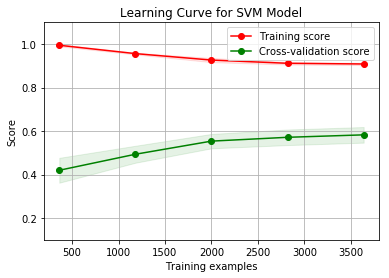

In [155]:
# SVC Learning Curve
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
new_svm = SVC(verbose =1, kernel='rbf')
plot_learning_curve(svm_clf.best_estimator_, "Learning Curve for SVM Model"
                    , x_train, y_train, (0.1, 1.1), cv=cv, n_jobs=4)
plt.show()

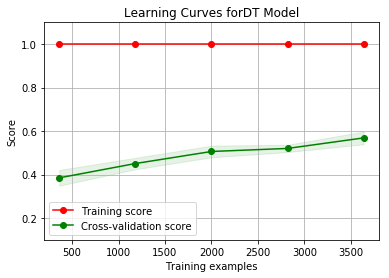

In [156]:
#DT Learning Curve
plot_learning_curve(dt_clf.best_estimator_, "Learning Curves forDT Model"
                    , x_train, y_train, (0.1, 1.1), cv=cv, n_jobs=4)
plt.show()

      Iter       Train Loss   Remaining Time 
         1           0.8513            2.41s
      Iter       Train Loss   Remaining Time 
      Iter       Train Loss   Remaining Time 
         2           0.7224            3.32s
      Iter       Train Loss   Remaining Time 
         3           0.6242            3.14s
         4           0.5454            2.72s
         1           0.8921            7.00s
         5           0.4808            2.50s
         2           0.7839            4.93s
         1           0.8972            6.58s
         6           0.4267            2.90s
         1           0.8804           12.67s
         3           0.6994            5.16s
         7           0.3799            3.00s
         8           0.3395            2.80s
         9           0.3041            2.64s
        10           0.2712            2.65s
         2           0.7931            9.23s
         4           0.6209            7.07s
         2           0.7831           15.08s
      

         6           0.5394           19.70s
        80           0.0097            6.57s
         7           0.4935           21.38s
         8           0.4502           20.92s
         9           0.4171           20.58s
        10           0.3856           20.16s
        90           0.0065            6.09s
        40           0.0625           14.16s
       100           0.0042            5.74s
        50           0.0413           12.92s
        20           0.1950           19.52s
        60           0.0294           11.47s
        30           0.1108           17.57s
        70           0.0195           10.79s
       200           0.0004            1.34s
      Iter       Train Loss   Remaining Time 
         1           0.8608            0.99s
         2           0.7409            1.58s
         3           0.6477            2.46s
         4           0.5652            2.24s
         5           0.4964            2.14s
         6           0.4386            2.09s
         

       200           0.0004            0.71s
        80           0.0132           12.44s
      Iter       Train Loss   Remaining Time 
         1           0.8841            9.94s
         2           0.7826           10.28s
         3           0.7033           10.64s
         4           0.6321           11.35s
         5           0.5712           11.98s
         6           0.5196           11.91s
         7           0.4725           12.10s
        40           0.0505            9.19s
         8           0.4320           12.53s
         9           0.3973           12.49s
        10           0.3668           12.98s
        90           0.0094           11.43s
        50           0.0308            8.60s
        60           0.0206            7.56s
        20           0.1753           12.15s
       100           0.0065           10.42s
        70           0.0149            6.72s
       200           0.0004            1.92s
      Iter       Train Loss   Remaining Time 
        

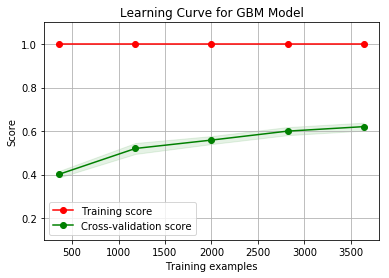

In [157]:
#GBM Learning Curve
plot_learning_curve(gbm_clf.best_estimator_, "Learning Curve for GBM Model"
                    , x_train, y_train, (0.1, 1.1), cv=cv, n_jobs=4)
plt.show()

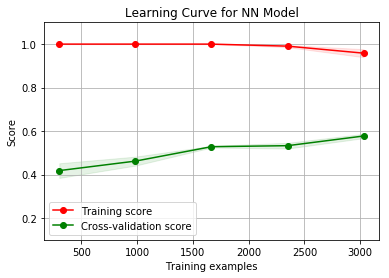

In [158]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
plot_learning_curve(MLPClassifier(alpha=0.00001,learning_rate_init=0.01,hidden_layer_sizes=128
                                  ,activation='relu',solver='lbfgs',verbose=True)
                                  ,"Learning Curve for NN Model"
                    , x_train, y_train, (0.1, 1.1), cv=cv, n_jobs=1)
plt.show()

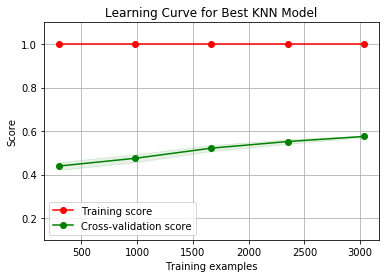

In [160]:
#KNN Learning Curve
plot_learning_curve(knn_clf.best_estimator_, "Learning Curve for Best KNN Model"
                    , x_train, y_train, (0.1, 1.1), cv=cv, n_jobs=4)
plt.show()

In [242]:
##EVALUATION ON TEST DATA
dt_preds = dt_clf.predict(x_test)
nn_preds = nn_clf.predict(x_test)
knn_preds = knn_clf.predict(x_test)
gbm_preds = gbm_clf.predict(x_test)
svm_preds = svm_clf.predict(x_test)

def get_performance(model, y_test, preds):
    f = round(f1_score(y_test, preds),3)
    a = round(accuracy_score(y_test, preds),3)
    p = round(precision_score(y_test, preds),3)
    r = round(recall_score(y_test, preds),3)
    
    return [model, f,a,p,r]

test_results =[] 
test_results.append(['Baseline', round(f1_score(y_train, baseline),3), round(accuracy_score(y_train, baseline),3)
                     , round(precision_score(y_train, baseline),3), round(recall_score(y_train, baseline),3)])
test_results.append(get_performance('Decision Tree' , np.array(y_test), dt_preds))
test_results.append(get_performance('SVM', np.array(y_test), svm_preds))
test_results.append(get_performance('GBM', np.array(y_test), gbm_preds))
test_results.append(get_performance('KNN', np.array(y_test), knn_preds))
test_results.append(get_performance('Neural Network', np.array(y_test), nn_preds))

cv_results = np.reshape(np.array([round(f1_score(y_train, baseline),3), 0.563, 0.567, 0.623, 0.609, 0.521]),(6,1))

test_results = pd.DataFrame(test_results, columns = ['Model','Test F1 Score', 'Test Accuracy', 'Test Precision', 'Test Recall'])
test_results['CV F1 Score'] = cv_results
test_results['% Diff Test F1 and CV F1'] = round(((test_results['Test F1 Score']/test_results['CV F1 Score']) - 1),3)*100

test_results.head(6)

Model  Test F1 Score  Test Accuracy  Test Precision  Test Recall  \
0  Baseline        0.155          0.716          0.192           0.129         
1  Decision Tree   0.568          0.832          0.548           0.589         
2  SVM             0.628          0.870          0.677           0.586         
3  GBM             0.663          0.887          0.753           0.592         
4  KNN             0.606          0.849          0.591           0.622         
5  Neural Network  0.569          0.843          0.586           0.553         

   CV F1 Score  % Diff Test F1 and CV F1  
0  0.155        0.0                       
1  0.563        0.9                       
2  0.567        10.8                      
3  0.623        6.4                       
4  0.609       -0.5                       
5  0.521        9.2

ValueError: invalid alignment: right

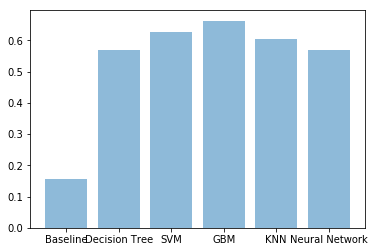

In [248]:
a = plt.bar(test_results['Model'], test_results['Test F1 Score'], align='center', alpha=0.5)
b = plt.bar(test_results['Model'], test_results['CV F1 Score'], align='center', alpha=0.5)

plt.ylabel('F1 Score')
plt.title('Programming language usage')
 
plt.show()

In [ ]:
epochs = list(range(1, 100))
print(epochs)
parameters = {'learning_rate':[0.1], 'n_estimators':epochs, 'max_depth':[5]}

g = GradientBoostingClassifier(verbose=1)
g_model = GridSearchCV(g, parameters, cv= 3, scoring = 'f1')
g_model.fit(x_train, y_train)
g_model_grid_search_results = pd.DataFrame(g_model.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(g_model_grid_search_results, 'n_estimators')

In [227]:
epochs = list(range(1, 500))
print(epochs)
parameters = {'alpha':[0.01], 'hidden_layer_sizes':[128]
              ,'learning_rate_init':[0.00001],'activation':['relu']
            , 'solver':['lbfgs'], 'max_iter':epochs}

nn = MLPClassifier(verbose =1)
nn_model = GridSearchCV(nn, parameters, cv= 3, scoring = 'f1')
nn_model.fit(x_train, y_train)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

KeyboardInterrupt: 

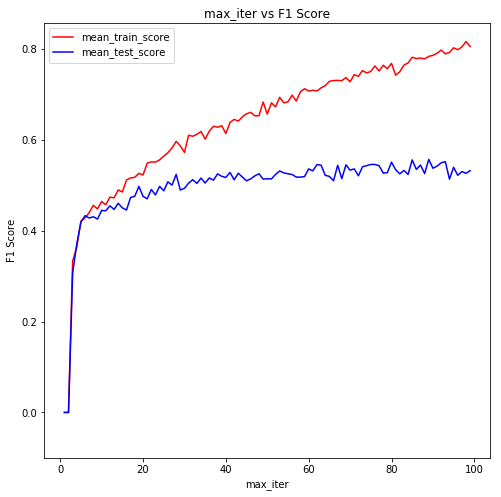

In [226]:
nn_model_grid_search_results = pd.DataFrame(nn_model.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(nn_model_grid_search_results, 'max_iter')

      Iter       Train Loss   Remaining Time 
         1           0.9401            0.05s
         2           0.8929            0.04s
         3           0.8527            0.04s
         4           0.8191            0.03s
         5           0.7915            0.03s
         6           0.7697            0.02s
         7           0.7464            0.02s
         8           0.7275            0.01s
         9           0.7115            0.01s
        10           0.6926            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9405            0.06s
         2           0.8958            0.05s
         3           0.8580            0.04s
         4           0.8264            0.04s
         5           0.7963            0.03s
         6           0.7703            0.02s
         7           0.7493            0.02s
         8           0.7308            0.01s
         9           0.7138            0.01s
        10           0.6994            0.00s
      It

         8           0.7295            0.20s
         9           0.7090            0.20s
        10           0.6941            0.21s
        20           0.5842            0.16s
        30           0.5106            0.10s
        40           0.4658            0.05s
        50           0.4303            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9401            0.25s
         2           0.8929            0.27s
         3           0.8527            0.32s
         4           0.8191            0.32s
         5           0.7915            0.32s
         6           0.7697            0.31s
         7           0.7464            0.31s
         8           0.7275            0.31s
         9           0.7115            0.30s
        10           0.6926            0.31s
        20           0.5805            0.23s
        30           0.5138            0.15s
        40           0.4755            0.10s
        50           0.4443            0.05s
        6

        50           0.4609            0.16s
        60           0.4338            0.12s
        70           0.4042            0.08s
        80           0.3818            0.04s
        90           0.3587            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9398            0.43s
         2           0.8948            0.40s
         3           0.8559            0.42s
         4           0.8225            0.44s
         5           0.7945            0.44s
         6           0.7707            0.45s
         7           0.7496            0.48s
         8           0.7295            0.50s
         9           0.7090            0.49s
        10           0.6941            0.48s
        20           0.5842            0.45s
        30           0.5106            0.34s
        40           0.4658            0.26s
        50           0.4303            0.19s
        60           0.4004            0.14s
        70           0.3687            0.09s
        8

        90           0.3681            0.19s
       100           0.3428            0.12s
      Iter       Train Loss   Remaining Time 
         1           0.9398            1.27s
         2           0.8948            1.41s
         3           0.8559            1.47s
         4           0.8225            1.43s
         5           0.7945            1.38s
         6           0.7707            1.34s
         7           0.7496            1.30s
         8           0.7295            1.24s
         9           0.7090            1.19s
        10           0.6941            1.21s
        20           0.5842            1.21s
        30           0.5106            1.05s
        40           0.4658            1.01s
        50           0.4303            0.91s
        60           0.4004            0.72s
        70           0.3687            0.55s
        80           0.3457            0.40s
        90           0.3208            0.28s
       100           0.2938            0.18s
      Ite

      Iter       Train Loss   Remaining Time 
         1           0.9398            0.74s
         2           0.8943            0.68s
         3           0.8560            0.69s
         4           0.8225            0.70s
         5           0.7945            0.69s
         6           0.7707            0.68s
         7           0.7495            0.67s
         8           0.7302            0.68s
         9           0.7096            0.67s
        10           0.6947            0.66s
        20           0.5786            0.59s
        30           0.5087            0.53s
        40           0.4589            0.48s
        50           0.4302            0.43s
        60           0.4036            0.37s
        70           0.3739            0.32s
        80           0.3511            0.28s
        90           0.3221            0.24s
       100           0.3049            0.20s
      Iter       Train Loss   Remaining Time 
         1           0.9401            0.82s
        

        50           0.4296            0.55s
        60           0.3996            0.50s
        70           0.3725            0.45s
        80           0.3438            0.41s
        90           0.3231            0.37s
       100           0.3005            0.32s
      Iter       Train Loss   Remaining Time 
         1           0.9401            0.79s
         2           0.8929            0.88s
         3           0.8527            0.86s
         4           0.8191            0.85s
         5           0.7915            0.83s
         6           0.7697            0.82s
         7           0.7464            0.82s
         8           0.7275            0.82s
         9           0.7115            0.84s
        10           0.6926            0.84s
        20           0.5805            0.76s
        30           0.5138            0.69s
        40           0.4755            0.62s
        50           0.4443            0.57s
        60           0.4224            0.52s
        7

        40           0.4675            0.72s
        50           0.4296            0.66s
        60           0.3996            0.61s
        70           0.3725            0.56s
        80           0.3438            0.52s
        90           0.3231            0.47s
       100           0.3005            0.44s
       200           0.1518            0.05s
      Iter       Train Loss   Remaining Time 
         1           0.9401            1.21s
         2           0.8929            1.15s
         3           0.8527            1.09s
         4           0.8191            1.14s
         5           0.7915            1.12s
         6           0.7697            1.10s
         7           0.7464            1.08s
         8           0.7275            1.07s
         9           0.7115            1.06s
        10           0.6926            1.06s
        20           0.5805            0.93s
        30           0.5138            0.86s
        40           0.4755            0.77s
        5

        10           0.6947            1.09s
        20           0.5785            0.99s
        30           0.5147            0.90s
        40           0.4675            0.82s
        50           0.4296            0.75s
        60           0.3996            0.70s
        70           0.3725            0.66s
        80           0.3438            0.61s
        90           0.3231            0.56s
       100           0.3005            0.52s
       200           0.1518            0.15s
      Iter       Train Loss   Remaining Time 
         1           0.9401            1.07s
         2           0.8929            1.05s
         3           0.8527            1.02s
         4           0.8191            1.05s
         5           0.7915            1.05s
         6           0.7697            1.04s
         7           0.7464            1.04s
         8           0.7275            1.04s
         9           0.7115            1.06s
        10           0.6926            1.07s
        2

        60           0.4004            0.83s
        70           0.3687            0.78s
        80           0.3457            0.72s
        90           0.3208            0.68s
       100           0.2938            0.64s
       200           0.1590            0.25s
      Iter       Train Loss   Remaining Time 
         1           0.9401            1.34s
         2           0.8929            1.30s
         3           0.8527            1.27s
         4           0.8191            1.24s
         5           0.7915            1.23s
         6           0.7697            1.21s
         7           0.7464            1.20s
         8           0.7275            1.21s
         9           0.7115            1.21s
        10           0.6926            1.20s
        20           0.5805            1.11s
        30           0.5138            1.04s
        40           0.4755            0.96s
        50           0.4443            0.90s
        60           0.4224            0.84s
        7

        40           0.4675            1.16s
        50           0.4296            1.08s
        60           0.3996            1.01s
        70           0.3725            0.95s
        80           0.3438            0.90s
        90           0.3231            0.86s
       100           0.3005            0.81s
       200           0.1518            0.39s
       300           0.0849            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9401            1.31s
         2           0.8929            1.34s
         3           0.8527            1.34s
         4           0.8191            1.33s
         5           0.7915            1.36s
         6           0.7697            1.34s
         7           0.7464            1.33s
         8           0.7275            1.33s
         9           0.7115            1.31s
        10           0.6926            1.33s
        20           0.5805            1.35s
        30           0.5138            1.23s
        4

       200           0.1853            0.51s
       300           0.1015            0.11s
      Iter       Train Loss   Remaining Time 
         1           0.9398            1.83s
         2           0.8943            1.95s
         3           0.8559            2.04s
         4           0.8226            1.97s
         5           0.7946            1.92s
         6           0.7708            1.94s
         7           0.7497            1.87s
         8           0.7303            1.85s
         9           0.7097            1.83s
        10           0.6948            1.78s
        20           0.5805            1.53s
        30           0.5148            1.49s
        40           0.4689            1.35s
        50           0.4395            1.25s
        60           0.4079            1.16s
        70           0.3789            1.10s
        80           0.3500            1.04s
        90           0.3216            0.99s
       100           0.2984            0.93s
       20

        60           0.4338            1.14s
        70           0.4042            1.08s
        80           0.3868            1.02s
        90           0.3681            0.97s
       100           0.3428            0.93s
       200           0.1853            0.56s
       300           0.1015            0.21s
      Iter       Train Loss   Remaining Time 
         1           0.9398            1.81s
         2           0.8943            1.70s
         3           0.8559            1.66s
         4           0.8226            1.63s
         5           0.7946            1.64s
         6           0.7708            1.62s
         7           0.7497            1.62s
         8           0.7303            1.61s
         9           0.7097            1.61s
        10           0.6948            1.60s
        20           0.5805            1.49s
        30           0.5148            1.41s
        40           0.4689            1.32s
        50           0.4395            1.23s
        6

       300           0.0929            0.42s
      Iter       Train Loss   Remaining Time 
         1           0.9405            3.75s
         2           0.8958            3.40s
         3           0.8580            3.17s
         4           0.8264            3.12s
         5           0.7963            3.08s
         6           0.7703            3.04s
         7           0.7493            2.95s
         8           0.7308            2.82s
         9           0.7130            2.78s
        10           0.6971            2.68s
        20           0.5823            2.35s
        30           0.5302            2.11s
        40           0.4881            1.99s
        50           0.4571            1.89s
        60           0.4257            1.76s
        70           0.3919            1.70s
        80           0.3654            1.62s
        90           0.3425            1.57s
       100           0.3216            1.56s
       200           0.1717            0.96s
       30

       400           0.0443            0.04s
      Iter       Train Loss   Remaining Time 
         1           0.9401            1.65s
         2           0.8929            1.80s
         3           0.8527            1.75s
         4           0.8191            1.76s
         5           0.7915            1.76s
         6           0.7697            1.76s
         7           0.7464            1.78s
         8           0.7275            1.77s
         9           0.7115            1.77s
        10           0.6926            1.77s
        20           0.5805            1.71s
        30           0.5138            1.62s
        40           0.4755            1.51s
        50           0.4443            1.42s
        60           0.4224            1.34s
        70           0.3981            1.27s
        80           0.3771            1.22s
        90           0.3509            1.17s
       100           0.3283            1.12s
       200           0.1648            0.78s
       30

       200           0.1853            0.85s
       300           0.1015            0.49s
       400           0.0578            0.14s
      Iter       Train Loss   Remaining Time 
         1           0.9398            1.98s
         2           0.8948            1.91s
         3           0.8559            1.94s
         4           0.8225            1.93s
         5           0.7945            1.95s
         6           0.7707            1.96s
         7           0.7496            1.94s
         8           0.7295            1.99s
         9           0.7090            1.99s
        10           0.6941            1.97s
        20           0.5842            1.81s
        30           0.5106            1.69s
        40           0.4658            1.58s
        50           0.4303            1.50s
        60           0.4004            1.43s
        70           0.3687            1.39s
        80           0.3457            1.37s
        90           0.3208            1.35s
       10

       200           0.1648            0.95s
       300           0.0929            0.59s
       400           0.0492            0.25s
      Iter       Train Loss   Remaining Time 
         1           0.9405            2.27s
         2           0.8958            2.18s
         3           0.8580            2.31s
         4           0.8264            2.31s
         5           0.7963            2.32s
         6           0.7703            2.43s
         7           0.7493            2.52s
         8           0.7308            2.60s
         9           0.7130            2.64s
        10           0.6971            2.64s
        20           0.5823            2.60s
        30           0.5302            2.43s
        40           0.4881            2.23s
        50           0.4571            2.02s
        60           0.4257            1.88s
        70           0.3919            1.77s
        80           0.3654            1.68s
        90           0.3425            1.59s
       10

       200           0.1518            1.29s
       300           0.0849            1.07s
       400           0.0472            0.49s
      Iter       Train Loss   Remaining Time 
         1           0.9401            4.47s
         2           0.8929            4.47s
         3           0.8527            4.10s
         4           0.8191            3.86s
         5           0.7915            3.57s
         6           0.7697            3.54s
         7           0.7464            3.47s
         8           0.7275            3.38s
         9           0.7115            3.37s
        10           0.6926            3.35s
        20           0.5805            3.79s
        30           0.5138            3.50s
        40           0.4755            3.27s
        50           0.4443            3.06s
        60           0.4224            2.86s
        70           0.3981            2.70s
        80           0.3771            2.56s
        90           0.3509            2.44s
       10

        40           0.4845            2.86s
        50           0.4609            2.68s
        60           0.4338            2.55s
        70           0.4042            2.45s
        80           0.3818            2.33s
        90           0.3587            2.26s
       100           0.3365            2.16s
       200           0.1908            1.54s
       300           0.1005            1.08s
       400           0.0591            0.64s
       500           0.0340            0.10s
      Iter       Train Loss   Remaining Time 
         1           0.9398            3.16s
         2           0.8948            3.10s
         3           0.8559            3.10s
         4           0.8225            2.98s
         5           0.7945            2.92s
         6           0.7707            2.90s
         7           0.7496            2.86s
         8           0.7295            2.83s
         9           0.7090            2.89s
        10           0.6941            2.89s
        2

        50           0.4443            2.43s
        60           0.4224            2.34s
        70           0.3981            2.24s
        80           0.3771            2.15s
        90           0.3509            2.09s
       100           0.3283            2.03s
       200           0.1648            2.20s
       300           0.0929            1.52s
       400           0.0492            0.88s
       500           0.0283            0.28s
      Iter       Train Loss   Remaining Time 
         1           0.9405            6.67s
         2           0.8958            5.61s
         3           0.8580            5.19s
         4           0.8264            5.19s
         5           0.7963            4.93s
         6           0.7703            5.19s
         7           0.7493            4.88s
         8           0.7308            4.84s
         9           0.7130            4.81s
        10           0.6971            4.71s
        20           0.5823            3.97s
        3

        50           0.4303            2.23s
        60           0.4004            2.14s
        70           0.3687            2.09s
        80           0.3457            2.05s
        90           0.3208            1.99s
       100           0.2938            1.93s
       200           0.1590            1.44s
       300           0.0814            1.11s
       400           0.0447            0.74s
       500           0.0250            0.30s
      Iter       Train Loss   Remaining Time 
         1           0.9401            2.52s
         2           0.8929            2.63s
         3           0.8527            2.72s
         4           0.8191            2.77s
         5           0.7915            2.74s
         6           0.7697            2.69s
         7           0.7464            2.72s
         8           0.7275            2.69s
         9           0.7115            2.68s
        10           0.6926            2.71s
        20           0.5805            2.59s
        3

        40           0.4881            2.84s
        50           0.4571            2.67s
        60           0.4257            2.56s
        70           0.3919            2.47s
        80           0.3654            2.46s
        90           0.3425            2.43s
       100           0.3210            2.44s
       200           0.1750            1.88s
       300           0.0998            1.37s
       400           0.0573            0.94s
       500           0.0340            0.46s
       600           0.0193            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9398            2.80s
         2           0.8948            2.78s
         3           0.8559            2.91s
         4           0.8225            2.99s
         5           0.7945            2.92s
         6           0.7707            2.91s
         7           0.7496            2.92s
         8           0.7295            2.92s
         9           0.7090            2.92s
        1

       200           0.1598            2.00s
       300           0.0844            1.48s
       400           0.0452            1.00s
       500           0.0254            0.54s
       600           0.0137            0.09s
      Iter       Train Loss   Remaining Time 
         1           0.9401            2.83s
         2           0.8929            2.88s
         3           0.8527            3.17s
         4           0.8191            3.21s
         5           0.7915            3.14s
         6           0.7697            3.09s
         7           0.7464            3.16s
         8           0.7275            3.14s
         9           0.7115            3.16s
        10           0.6926            3.28s
        20           0.5805            3.29s
        30           0.5138            3.04s
        40           0.4755            2.86s
        50           0.4443            2.70s
        60           0.4224            2.57s
        70           0.3981            2.45s
        8

        50           0.4609            2.41s
        60           0.4338            2.32s
        70           0.4042            2.24s
        80           0.3868            2.15s
        90           0.3681            2.07s
       100           0.3428            2.03s
       200           0.1853            1.61s
       300           0.1015            1.25s
       400           0.0578            0.90s
       500           0.0347            0.54s
       600           0.0205            0.18s
      Iter       Train Loss   Remaining Time 
         1           0.9398            2.97s
         2           0.8943            3.03s
         3           0.8560            3.30s
         4           0.8225            3.24s
         5           0.7945            3.19s
         6           0.7707            3.16s
         7           0.7495            3.09s
         8           0.7302            3.07s
         9           0.7096            3.10s
        10           0.6947            3.06s
        2

       300           0.0814            1.42s
       400           0.0447            1.04s
       500           0.0250            0.65s
       600           0.0141            0.27s
      Iter       Train Loss   Remaining Time 
         1           0.9401            3.11s
         2           0.8929            3.12s
         3           0.8527            3.03s
         4           0.8191            3.02s
         5           0.7915            3.03s
         6           0.7697            3.09s
         7           0.7464            3.09s
         8           0.7275            3.17s
         9           0.7115            3.14s
        10           0.6926            3.12s
        20           0.5805            2.93s
        30           0.5138            2.87s
        40           0.4755            2.69s
        50           0.4443            2.55s
        60           0.4224            2.44s
        70           0.3981            2.35s
        80           0.3771            2.27s
        9

        40           0.4881            3.23s
        50           0.4571            3.02s
        60           0.4257            2.93s
        70           0.3919            2.82s
        80           0.3654            2.75s
        90           0.3425            2.65s
       100           0.3210            2.62s
       200           0.1750            2.07s
       300           0.0998            1.63s
       400           0.0573            1.22s
       500           0.0340            0.81s
       600           0.0193            0.41s
       700           0.0117            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.9398            5.30s
         2           0.8943            4.91s
         3           0.8560            4.98s
         4           0.8225            4.87s
         5           0.7945            4.58s
         6           0.7707            4.65s
         7           0.7495            4.52s
         8           0.7301            4.50s
         

        70           0.3739            4.21s
        80           0.3511            4.06s
        90           0.3221            3.95s
       100           0.3049            3.82s
       200           0.1500            3.11s
       300           0.0802            2.52s
       400           0.0443            1.90s
       500           0.0245            1.24s
       600           0.0142            0.69s
       700           0.0081            0.12s
      Iter       Train Loss   Remaining Time 
         1           0.9401            5.79s
         2           0.8929            5.87s
         3           0.8527            5.66s
         4           0.8191            5.60s
         5           0.7915            5.47s
         6           0.7697            5.86s
         7           0.7464            6.12s
         8           0.7275            6.35s
         9           0.7115            6.17s
        10           0.6926            7.09s
        20           0.5805            6.85s
        3

       100           0.3283            2.82s
       200           0.1648            2.34s
       300           0.0929            1.92s
       400           0.0492            1.55s
       500           0.0283            1.09s
       600           0.0163            0.65s
       700           0.0091            0.22s
      Iter       Train Loss   Remaining Time 
         1           0.9405            5.07s
         2           0.8958            4.60s
         3           0.8580            4.15s
         4           0.8264            4.40s
         5           0.7963            4.34s
         6           0.7703            4.23s
         7           0.7493            4.26s
         8           0.7308            4.22s
         9           0.7138            4.18s
        10           0.6994            4.24s
        20           0.5869            3.87s
        30           0.5247            3.76s
        40           0.4845            3.52s
        50           0.4609            3.30s
        6

       200           0.1717            2.51s
       300           0.0951            2.02s
       400           0.0531            1.56s
       500           0.0311            1.12s
       600           0.0191            0.71s
       700           0.0115            0.30s
      Iter       Train Loss   Remaining Time 
         1           0.9398            3.39s
         2           0.8943            3.49s
         3           0.8560            3.64s
         4           0.8225            3.67s
         5           0.7945            3.60s
         6           0.7707            3.59s
         7           0.7495            3.70s
         8           0.7302            3.74s
         9           0.7096            3.72s
        10           0.6947            3.74s
        20           0.5786            3.55s
        30           0.5087            3.48s
        40           0.4589            3.35s
        50           0.4302            3.18s
        60           0.4036            3.06s
        7

       200           0.1500            2.72s
       300           0.0802            2.17s
       400           0.0443            1.71s
       500           0.0245            1.27s
       600           0.0142            0.84s
       700           0.0081            0.39s
      Iter       Train Loss   Remaining Time 
         1           0.9401            3.57s
         2           0.8929            4.09s
         3           0.8527            3.96s
         4           0.8191            3.89s
         5           0.7915            3.82s
         6           0.7697            3.86s
         7           0.7464            3.87s
         8           0.7275            3.86s
         9           0.7115            3.93s
        10           0.6926            3.88s
        20           0.5805            3.72s
        30           0.5138            3.55s
        40           0.4755            3.35s
        50           0.4443            3.23s
        60           0.4224            3.10s
        7

        70           0.3981            3.40s
        80           0.3771            3.29s
        90           0.3509            3.22s
       100           0.3283            3.14s
       200           0.1648            2.68s
       300           0.0929            2.25s
       400           0.0492            1.88s
       500           0.0283            1.45s
       600           0.0163            0.99s
       700           0.0091            0.55s
       800           0.0052            0.09s
      Iter       Train Loss   Remaining Time 
         1           0.9405            4.57s
         2           0.8958            4.24s
         3           0.8580            4.59s
         4           0.8264            4.53s
         5           0.7963            4.70s
         6           0.7703            4.85s
         7           0.7493            4.75s
         8           0.7308            4.82s
         9           0.7130            4.83s
        10           0.6971            4.70s
        2

        50           0.4571            3.57s
        60           0.4257            3.46s
        70           0.3919            3.36s
        80           0.3654            3.30s
        90           0.3425            3.20s
       100           0.3210            3.13s
       200           0.1750            2.60s
       300           0.0998            2.17s
       400           0.0573            1.76s
       500           0.0340            1.36s
       600           0.0193            0.97s
       700           0.0117            0.57s
       800           0.0068            0.16s
      Iter       Train Loss   Remaining Time 
         1           0.9398            4.99s
         2           0.8943            4.78s
         3           0.8559            4.45s
         4           0.8226            4.51s
         5           0.7946            4.38s
         6           0.7708            4.29s
         7           0.7497            4.35s
         8           0.7303            4.35s
         

        50           0.4280            3.67s
        60           0.3976            3.56s
        70           0.3673            3.48s
        80           0.3418            3.39s
        90           0.3223            3.29s
       100           0.3015            3.27s
       200           0.1574            2.73s
       300           0.0837            2.48s
       400           0.0463            2.04s
       500           0.0257            1.60s
       600           0.0144            1.15s
       700           0.0081            0.71s
       800           0.0046            0.27s
      Iter       Train Loss   Remaining Time 
         1           0.9401            4.22s
         2           0.8929            4.24s
         3           0.8527            4.53s
         4           0.8191            4.35s
         5           0.7915            4.42s
         6           0.7697            4.48s
         7           0.7464            4.48s
         8           0.7275            4.54s
         

        50           0.4443            3.66s
        60           0.4224            3.53s
        70           0.3981            3.44s
        80           0.3771            3.38s
        90           0.3509            3.45s
       100           0.3283            3.43s
       200           0.1648            3.10s
       300           0.0929            2.52s
       400           0.0492            2.07s
       500           0.0283            1.61s
       600           0.0163            1.19s
       700           0.0091            0.78s
       800           0.0052            0.37s
      Iter       Train Loss   Remaining Time 
         1           0.9405            4.41s
         2           0.8958            4.52s
         3           0.8580            4.70s
         4           0.8264            4.47s
         5           0.7963            4.40s
         6           0.7703            4.50s
         7           0.7493            4.47s
         8           0.7308            4.47s
         

        10           0.6994            5.03s
        20           0.5869            4.75s
        30           0.5247            4.64s
        40           0.4845            4.38s
        50           0.4609            4.12s
        60           0.4338            4.01s
        70           0.4042            3.91s
        80           0.3868            3.79s
        90           0.3681            3.70s
       100           0.3428            3.63s
       200           0.1853            3.09s
       300           0.1015            2.58s
       400           0.0578            2.13s
       500           0.0347            1.72s
       600           0.0205            1.33s
       700           0.0120            0.90s
       800           0.0072            0.47s
       900           0.0042            0.04s
      Iter       Train Loss   Remaining Time 
         1           0.9398            4.80s
         2           0.8943            4.63s
         3           0.8560            5.02s
         

       600           0.0191            1.37s
       700           0.0115            0.95s
       800           0.0067            0.55s
       900           0.0040            0.13s
      Iter       Train Loss   Remaining Time 
         1           0.9398            5.73s
         2           0.8949            5.25s
         3           0.8560            4.87s
         4           0.8225            4.85s
         5           0.7945            4.85s
         6           0.7703            4.76s
         7           0.7492            4.86s
         8           0.7292            4.84s
         9           0.7087            4.81s
        10           0.6937            4.79s
        20           0.5809            4.46s
        30           0.5125            4.29s
        40           0.4654            4.07s
        50           0.4280            3.94s
        60           0.3976            3.81s
        70           0.3673            3.75s
        80           0.3418            3.66s
        9

        40           0.4658            5.99s
        50           0.4303            5.53s
        60           0.4004            5.15s
        70           0.3687            4.92s
        80           0.3457            4.68s
        90           0.3208            4.51s
       100           0.2938            4.38s
       200           0.1590            3.41s
       300           0.0814            2.85s
       400           0.0447            2.37s
       500           0.0250            1.91s
       600           0.0141            1.47s
       700           0.0078            1.05s
       800           0.0044            0.62s
       900           0.0026            0.21s
      Iter       Train Loss   Remaining Time 
         1           0.9401            4.97s
         2           0.8929            6.01s
         3           0.8527            5.47s
         4           0.8191            5.26s
         5           0.7915            5.14s
         6           0.7697            5.26s
         

       900           0.0025            0.40s
      Iter       Train Loss   Remaining Time 
         1           0.9401            6.05s
         2           0.8929            6.65s
         3           0.8527            6.27s
         4           0.8191            6.19s
         5           0.7915            6.15s
         6           0.7697            6.11s
         7           0.7464            6.12s
         8           0.7275            6.03s
         9           0.7115            5.94s
        10           0.6926            5.96s
        20           0.5805            5.51s
        30           0.5138            5.20s
        40           0.4755            5.35s
        50           0.4443            5.20s
        60           0.4224            4.92s
        70           0.3981            4.70s
        80           0.3771            4.57s
        90           0.3509            4.54s
       100           0.3283            4.58s
       200           0.1648            4.54s
       30

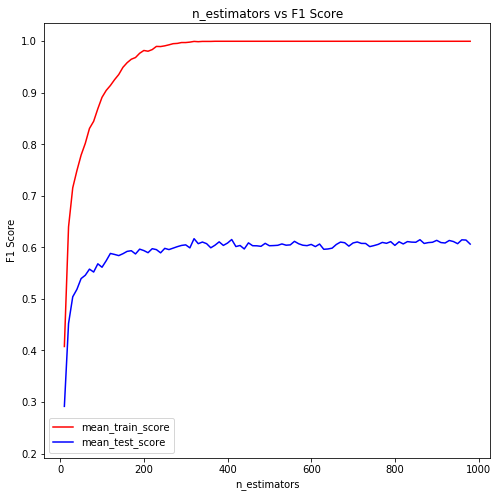

In [255]:
iterations = [x*10 for x in range(1,99)]
parameters = {'n_estimators':iterations}
g = GradientBoostingClassifier(verbose =1, max_depth = 5, learning_rate = 0.1)
nn_model = GridSearchCV(g, parameters, cv= 3, scoring = 'f1')
nn_model.fit(x_train, y_train)

nn_model_grid_search_results = pd.DataFrame(nn_model.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(nn_model_grid_search_results, 'n_estimators')

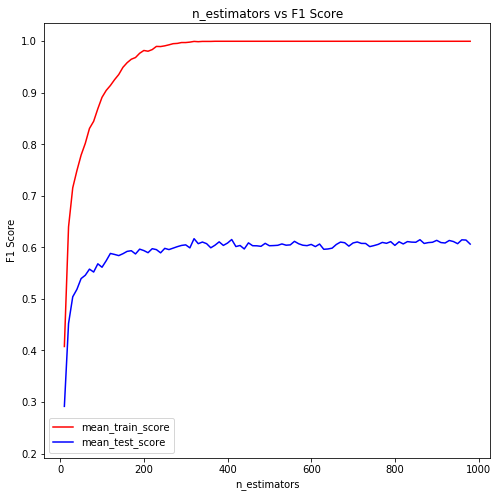

In [256]:
nn_model_grid_search_results = pd.DataFrame(nn_model.cv_results_).sort_values(by='rank_test_score')
plot_model_complexity(nn_model_grid_search_results, 'n_estimators')

In [257]:
import datetime
a = datetime.datetime.now()
nn_clf.best_estimator_.fit(x_train, y_train)
b =datetime.datetime.now()
print(b-a)

0:00:02.321689


In [258]:
a = datetime.datetime.now()
gbm_clf.best_estimator_.fit(x_train, y_train)
b =datetime.datetime.now()
print(b-a)

      Iter       Train Loss   Remaining Time 
         1           0.8793            5.62s
         2           0.7865            5.94s
         3           0.7112            6.24s
         4           0.6485            6.47s
         5           0.5967            7.12s
         6           0.5432            7.42s
         7           0.5001            7.48s
         8           0.4675            7.46s
         9           0.4349            7.56s
        10           0.4062            7.54s
        20           0.2110            7.46s
        30           0.1216            7.44s
        40           0.0799            7.04s
        50           0.0541            6.53s
        60           0.0390            6.11s
        70           0.0315            5.49s
        80           0.0250            4.99s
        90           0.0183            4.63s
       100           0.0138            4.27s
       200           0.0008            1.25s
0:00:05.565008


In [259]:
a = datetime.datetime.now()
dt_clf.best_estimator_.fit(x_train, y_train)
b =datetime.datetime.now()
print(b-a)

0:00:00.030800


In [260]:
a = datetime.datetime.now()
knn_clf.best_estimator_.fit(x_train, y_train)
b =datetime.datetime.now()
print(b-a)

0:00:00.007981


In [261]:
a = datetime.datetime.now()
svm_clf.best_estimator_.fit(x_train, y_train)
b =datetime.datetime.now()
print(b-a)

0:00:00.138092
